## Test Notebook

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from math import radians, sin, cos, sqrt, atan2
import importlib

from data_loader import load_single_day, load_multiple_days
from preprocessing import preprocess_data
import preprocessing_v2
importlib.reload(preprocessing_v2)
from preprocessing_v2 import preprocess_data_v2
import preprocessing_unified
importlib.reload(preprocessing_unified)
from preprocessing_unified import preprocess_data
import test_xgboost
importlib.reload(test_xgboost)
from test_xgboost import train_and_evaluate_xgboost
import test_mlp
importlib.reload(test_mlp)
from test_mlp import train_and_evaluate_mlp

In [505]:
df = pd.read_csv("1to19nov/20251028/IMEI_864454074276084_20251028.csv")

In [506]:
df.head()

Packet Received             IMEI               DateTime   Latitude  \
0  10/28/2025 9:14:14 AM  864454074276084  10/28/2025 9:44:13 AM  13.056126   
1  10/28/2025 9:14:15 AM  864454074276084  10/28/2025 9:44:14 AM  13.056126   
2  10/28/2025 9:14:16 AM  864454074276084  10/28/2025 9:44:15 AM  13.056126   
3  10/28/2025 9:14:17 AM  864454074276084  10/28/2025 9:44:16 AM  13.056126   
4  10/28/2025 9:14:18 AM  864454074276084  10/28/2025 9:44:17 AM  13.056126   

   Longitude  Speed  
0  80.107334      0  
1  80.107334      0  
2  80.107334      0  
3  80.107334      0  
4  80.107334      0

In [507]:
df['Speed'].value_counts()

Speed
0    3042
4      11
5       4
3       4
6       2
2       1
7       1
Name: count, dtype: int64

In [508]:
df[df['Speed']==0]

Packet Received             IMEI               DateTime  \
0     10/28/2025 9:14:14 AM  864454074276084  10/28/2025 9:44:13 AM   
1     10/28/2025 9:14:15 AM  864454074276084  10/28/2025 9:44:14 AM   
2     10/28/2025 9:14:16 AM  864454074276084  10/28/2025 9:44:15 AM   
3     10/28/2025 9:14:17 AM  864454074276084  10/28/2025 9:44:16 AM   
4     10/28/2025 9:14:18 AM  864454074276084  10/28/2025 9:44:17 AM   
...                     ...              ...                    ...   
3060  10/28/2025 3:08:58 PM  864454074276084  10/28/2025 3:08:59 PM   
3061  10/28/2025 3:08:59 PM  864454074276084  10/28/2025 3:09:00 PM   
3062  10/28/2025 3:09:00 PM  864454074276084  10/28/2025 3:09:01 PM   
3063  10/28/2025 3:09:02 PM  864454074276084  10/28/2025 3:09:02 PM   
3064  10/28/2025 3:09:02 PM  864454074276084  10/28/2025 3:09:03 PM   

       Latitude  Longitude  Speed  
0     13.056126  80.107334      0  
1     13.056126  80.107334      0  
2     13.056126  80.107334      0  
3     13.056126  80.107334      0  
4     13.056126  80.107334      0  
...         ...        ...    ...  
3060  13.056125  80.107277      0  
3061  13.056125  80.107277      0  
3062  13.056125  80.107277      0  
3063  13.056125  80.107277      0  
3064  13.056125  80.107277      0  

[3042 rows x 6 columns]

In [509]:
df[df['Speed']==2]

Packet Received             IMEI               DateTime   Latitude  \
233  10/28/2025 9:18:44 AM  864454074276084  10/28/2025 9:18:44 AM  13.056263   

     Longitude  Speed  
233  80.107238      2

In [510]:
df[df['Speed']==3]

Packet Received             IMEI               DateTime  \
1128  10/28/2025 9:55:33 AM  864454074276084  10/28/2025 9:55:35 AM   
1249  10/28/2025 9:57:35 AM  864454074276084  10/28/2025 9:57:37 AM   
1251  10/28/2025 9:57:37 AM  864454074276084  10/28/2025 9:57:39 AM   
1252  10/28/2025 9:57:38 AM  864454074276084  10/28/2025 9:57:40 AM   

       Latitude  Longitude  Speed  
1128  13.056251  80.107264      3  
1249  13.056162  80.107251      3  
1251  13.056152  80.107270      3  
1252  13.056146  80.107283      3

In [511]:
df[df['Speed']==4]

Packet Received             IMEI               DateTime  \
246   10/28/2025 9:18:56 AM  864454074276084  10/28/2025 9:18:57 AM   
247   10/28/2025 9:18:57 AM  864454074276084  10/28/2025 9:18:58 AM   
250   10/28/2025 9:19:00 AM  864454074276084  10/28/2025 9:19:01 AM   
1242  10/28/2025 9:57:28 AM  864454074276084  10/28/2025 9:57:30 AM   
1243  10/28/2025 9:57:29 AM  864454074276084  10/28/2025 9:57:31 AM   
2316  10/28/2025 2:53:39 PM  864454074276084  10/28/2025 2:53:40 PM   
2431  10/28/2025 2:56:22 PM  864454074276084  10/28/2025 2:56:22 PM   
2432  10/28/2025 2:56:23 PM  864454074276084  10/28/2025 2:56:23 PM   
2455  10/28/2025 2:56:47 PM  864454074276084  10/28/2025 2:56:47 PM   
2456  10/28/2025 2:56:48 PM  864454074276084  10/28/2025 2:56:48 PM   
2457  10/28/2025 2:56:48 PM  864454074276084  10/28/2025 2:56:49 PM   

       Latitude  Longitude  Speed  
246   13.056277  80.107238      4  
247   13.056237  80.107277      4  
250   13.056242  80.107302      4  
1242  13.056251  80.107264      4  
1243  13.056246  80.107213      4  
2316  13.056208  80.107418      4  
2431  13.056143  80.107341      4  
2432  13.056197  80.107334      4  
2455  13.056217  80.107322      4  
2456  13.056206  80.107277      4  
2457  13.056206  80.107258      4

In [512]:
df[df['Speed']==5]

Packet Received             IMEI               DateTime  \
248   10/28/2025 9:18:58 AM  864454074276084  10/28/2025 9:18:59 AM   
249   10/28/2025 9:18:59 AM  864454074276084  10/28/2025 9:19:00 AM   
1244  10/28/2025 9:57:30 AM  864454074276084  10/28/2025 9:57:32 AM   
1248  10/28/2025 9:57:34 AM  864454074276084  10/28/2025 9:57:36 AM   

       Latitude  Longitude  Speed  
248   13.056237  80.107283      5  
249   13.056238  80.107296      5  
1244  13.056234  80.107213      5  
1248  13.056170  80.107245      5

In [513]:
df[df['Speed']==6]

Packet Received             IMEI               DateTime  \
1245  10/28/2025 9:57:31 AM  864454074276084  10/28/2025 9:57:33 AM   
1247  10/28/2025 9:57:33 AM  864454074276084  10/28/2025 9:57:35 AM   

       Latitude  Longitude  Speed  
1245  13.056215  80.107213      6  
1247  13.056180  80.107232      6

In [514]:
df[df['Speed']==7]

Packet Received             IMEI               DateTime  \
1246  10/28/2025 9:57:32 AM  864454074276084  10/28/2025 9:57:34 AM   

       Latitude  Longitude  Speed  
1246  13.056197  80.107219      7

In [515]:
df['Latitude'].value_counts()

Latitude
13.056143    879
13.056125    554
13.056251    534
13.056250    434
13.056208    191
13.056126    191
13.056220     87
13.056211     50
13.056186     27
13.056217     22
13.056248     18
13.056277     12
13.056286     10
13.056255      5
13.056197      4
13.056254      3
13.056237      2
13.056263      2
13.056157      2
13.056210      2
13.056215      2
13.056214      2
13.056202      2
13.056206      2
13.056174      1
13.056150      1
13.056205      1
13.056148      1
13.056198      1
13.056145      1
13.056194      1
13.056190      1
13.056183      1
13.056178      1
13.056142      1
13.056168      1
13.056246      1
13.056238      1
13.056242      1
13.056245      1
13.056274      1
13.056258      1
13.056268      1
13.056234      1
13.056163      1
13.056180      1
13.056170      1
13.056162      1
13.056146      1
13.056155      1
13.056158      1
13.056152      1
Name: count, dtype: int64

In [516]:
df['Longitude'].value_counts()

Longitude
80.107309    871
80.107277    561
80.107264    536
80.107315    433
80.107334    191
80.107418    189
80.107571     87
80.107238     64
80.107302     27
80.107322     22
80.107373     17
80.107296     13
80.107341     10
80.107270      6
80.107347      3
80.107283      3
80.107565      3
80.107213      3
80.107245      2
80.107251      2
80.107258      2
80.107558      2
80.107520      1
80.107328      1
80.107552      1
80.107546      1
80.107539      1
80.107533      1
80.107494      1
80.107514      1
80.107507      1
80.107469      1
80.107450      1
80.107430      1
80.107405      1
80.107680      1
80.107693      1
80.107232      1
80.107219      1
80.107392      1
Name: count, dtype: int64

In [517]:
# 13.006247903119977, 80.24186269077323
df[(df['Latitude'] == 13.006247903119977) & (df['Longitude'] == 80.24186269077323)]

Empty DataFrame
Columns: [Packet Received, IMEI, DateTime, Latitude, Longitude, Speed]
Index: []

## EDA


In [ ]:
# df_nov3_25 = load_single_day('20251103')

dates = [
    '20251103',
    '20251104', 
    '20251105',
    '20251106',
    '20251107',
    '20251108',
    '20251109'
]
print(f"Loading {len(dates)} days of data...")
df_nov3_25 = load_multiple_days(dates)
print(f"\n✓ Loaded {len(df_nov3_25):,} GPS records")
print(f"  Date range: {df_nov3_25['DateTime'].min()} to {df_nov3_25['DateTime'].max()}")
print(f"  Unique buses: {df_nov3_25['IMEI'].nunique()}")

Loading 18 days of data (Nov 1-19, 2025)...


Loading dates:   0%|          | 0/18 [00:00<?, ?it/s]

✓ Loaded 1 buses for 20251101
  Total records: 10,794
  Unique IMEI: 1
  Memory usage: 3.64 MB


Loading dates:  11%|█         | 2/18 [00:00<00:01, 10.03it/s]

  ⚠ Removed 14 duplicates from IMEI_864454076846470_20251102.csv
✓ Loaded 4 buses for 20251102
  Total records: 34,820
  Unique IMEI: 4
  Memory usage: 11.75 MB


  ⚠ Removed 12 duplicates from IMEI_863738070811410_20251103.csv
  ⚠ Removed 21 duplicates from IMEI_864454070922137_20251103.csv


  ⚠ Removed 33 duplicates from IMEI_863738070627303_20251103.csv


  ⚠ Removed 15 duplicates from IMEI_864454076846413_20251103.csv
  ⚠ Removed 21 duplicates from IMEI_866069068910213_20251103.csv


  ⚠ Removed 17 duplicates from IMEI_863738070458055_20251103.csv
  ⚠ Removed 40 duplicates from IMEI_864454074240254_20251103.csv


  ⚠ Removed 12 duplicates from IMEI_864454076837016_20251103.csv


  ⚠ Removed 57 duplicates from IMEI_864454076983182_20251103.csv
  ⚠ Removed 25 duplicates from IMEI_864454074195425_20251103.csv


  ⚠ Removed 18 duplicates from IMEI_866069068703907_20251103.csv


  ⚠ Removed 12 duplicates from IMEI_864454076782642_20251103.csv


Loading dates:  11%|█         | 2/18 [00:15<00:01, 10.03it/s]

  ⚠ Removed 17 duplicates from IMEI_866069068697919_20251103.csv


  ⚠ Removed 25 duplicates from IMEI_864454078004284_20251103.csv
  ⚠ Removed 27 duplicates from IMEI_864454074309315_20251103.csv


  ⚠ Removed 40 duplicates from IMEI_864454070936426_20251103.csv


  ⚠ Removed 23 duplicates from IMEI_864454070814060_20251103.csv


  ⚠ Removed 26 duplicates from IMEI_864454077980401_20251103.csv
  ⚠ Removed 25 duplicates from IMEI_864454070799683_20251103.csv


  ⚠ Removed 20 duplicates from IMEI_864454076983174_20251103.csv


  ⚠ Removed 11 duplicates from IMEI_864454076689516_20251103.csv


  ⚠ Removed 12 duplicates from IMEI_866069068704087_20251103.csv


  ⚠ Removed 15 duplicates from IMEI_866069069062493_20251103.csv


  ⚠ Removed 14 duplicates from IMEI_863738070456042_20251103.csv


  ⚠ Removed 12 duplicates from IMEI_866069068698057_20251103.csv
  ⚠ Removed 19 duplicates from IMEI_864454074309208_20251103.csv


  ⚠ Removed 37 duplicates from IMEI_866069068697810_20251103.csv


  ⚠ Removed 17 duplicates from IMEI_864454076663446_20251103.csv


  ⚠ Removed 18 duplicates from IMEI_864454076821747_20251103.csv


  ⚠ Removed 44 duplicates from IMEI_864454076961824_20251103.csv
✓ Loaded 86 buses for 20251103
  Total records: 3,398,572
  Unique IMEI: 86


Loading dates:  17%|█▋        | 3/18 [00:45<04:45, 19.03s/it]

  Memory usage: 1145.63 MB


  ⚠ Removed 27 duplicates from IMEI_866069068697901_20251104.csv


  ⚠ Removed 16 duplicates from IMEI_864454076992191_20251104.csv


  ⚠ Removed 37 duplicates from IMEI_866069068703907_20251104.csv


  ⚠ Removed 16 duplicates from IMEI_864454074195425_20251104.csv


  ⚠ Removed 11 duplicates from IMEI_864454070922137_20251104.csv


  ⚠ Removed 23 duplicates from IMEI_864454076846470_20251104.csv


  ⚠ Removed 11 duplicates from IMEI_866069068910213_20251104.csv


  ⚠ Removed 11 duplicates from IMEI_864454076846413_20251104.csv
  ⚠ Removed 26 duplicates from IMEI_863738070627303_20251104.csv


  ⚠ Removed 25 duplicates from IMEI_864454074309315_20251104.csv


  ⚠ Removed 14 duplicates from IMEI_864454070936426_20251104.csv


  ⚠ Removed 19 duplicates from IMEI_864454076983174_20251104.csv


  ⚠ Removed 15 duplicates from IMEI_864454070738160_20251104.csv


  ⚠ Removed 15 duplicates from IMEI_864454076821747_20251104.csv


  ⚠ Removed 12 duplicates from IMEI_864454076961824_20251104.csv


  ⚠ Removed 17 duplicates from IMEI_866069068698057_20251104.csv


  ⚠ Removed 16 duplicates from IMEI_866069068910205_20251104.csv


  ⚠ Removed 21 duplicates from IMEI_864454076663446_20251104.csv


✓ Loaded 86 buses for 20251104
  Total records: 1,888,627
  Unique IMEI: 86


Loading dates:  22%|██▏       | 4/18 [01:11<05:01, 21.54s/it]

  Memory usage: 636.85 MB


  ⚠ Removed 87 duplicates from IMEI_864454076983182_20251106.csv


  ⚠ Removed 12 duplicates from IMEI_864454074195425_20251106.csv


  ⚠ Removed 21 duplicates from IMEI_866069068703907_20251106.csv


  ⚠ Removed 21 duplicates from IMEI_864454074240254_20251106.csv
  ⚠ Removed 85 duplicates from IMEI_866069068697901_20251106.csv


  ⚠ Removed 12 duplicates from IMEI_863738070627303_20251106.csv


  ⚠ Removed 24 duplicates from IMEI_866069068910213_20251106.csv


  ⚠ Removed 14 duplicates from IMEI_864454070814060_20251106.csv
  ⚠ Removed 18 duplicates from IMEI_864454070799683_20251106.csv


  ⚠ Removed 30 duplicates from IMEI_864454074309315_20251106.csv
  ⚠ Removed 13 duplicates from IMEI_864454078004284_20251106.csv


  ⚠ Removed 12 duplicates from IMEI_864454076782642_20251106.csv


  ⚠ Removed 17 duplicates from IMEI_866069069062493_20251106.csv


  ⚠ Removed 22 duplicates from IMEI_864454076983174_20251106.csv


  ⚠ Removed 22 duplicates from IMEI_864454076689516_20251106.csv


  ⚠ Removed 22 duplicates from IMEI_864454076961824_20251106.csv


  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251106.csv


  ⚠ Removed 36 duplicates from IMEI_864454076663446_20251106.csv


  ⚠ Removed 21 duplicates from IMEI_866069068698057_20251106.csv
  ⚠ Removed 14 duplicates from IMEI_864454074309208_20251106.csv


✓ Loaded 86 buses for 20251106
  Total records: 2,033,300
  Unique IMEI: 86


Loading dates:  28%|██▊       | 5/18 [01:35<04:51, 22.43s/it]

  Memory usage: 685.43 MB


  ⚠ Removed 65 duplicates from IMEI_866069068703907_20251107.csv


  ⚠ Removed 37 duplicates from IMEI_864454074195425_20251107.csv


  ⚠ Removed 81 duplicates from IMEI_864454076983182_20251107.csv
  ⚠ Removed 13 duplicates from IMEI_866069068704723_20251107.csv


  ⚠ Removed 11 duplicates from IMEI_864454076846363_20251107.csv
  ⚠ Removed 14 duplicates from IMEI_864454076837016_20251107.csv


  ⚠ Removed 20 duplicates from IMEI_864454074240254_20251107.csv


  ⚠ Removed 24 duplicates from IMEI_866069068910213_20251107.csv


  ⚠ Removed 31 duplicates from IMEI_864454076846413_20251107.csv


  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251107.csv


  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251107.csv


  ⚠ Removed 16 duplicates from IMEI_864454070814060_20251107.csv


  ⚠ Removed 13 duplicates from IMEI_864454070936426_20251107.csv
  ⚠ Removed 37 duplicates from IMEI_864454078004284_20251107.csv


  ⚠ Removed 19 duplicates from IMEI_864454074309315_20251107.csv


  ⚠ Removed 29 duplicates from IMEI_866069068697919_20251107.csv


  ⚠ Removed 29 duplicates from IMEI_864454076782642_20251107.csv


  ⚠ Removed 18 duplicates from IMEI_864454076962509_20251107.csv


  ⚠ Removed 14 duplicates from IMEI_864454074276084_20251107.csv


  ⚠ Removed 11 duplicates from IMEI_864454076689516_20251107.csv


  ⚠ Removed 31 duplicates from IMEI_864454076983174_20251107.csv


  ⚠ Removed 51 duplicates from IMEI_864454076961824_20251107.csv


  ⚠ Removed 13 duplicates from IMEI_863738070534061_20251107.csv


  ⚠ Removed 13 duplicates from IMEI_866069068910205_20251107.csv


  ⚠ Removed 16 duplicates from IMEI_864454076663446_20251107.csv


  ⚠ Removed 21 duplicates from IMEI_866069068697810_20251107.csv


  ⚠ Removed 26 duplicates from IMEI_864454074309208_20251107.csv


✓ Loaded 88 buses for 20251107
  Total records: 3,345,586
  Unique IMEI: 88


Loading dates:  33%|███▎      | 6/18 [02:21<06:04, 30.37s/it]

  Memory usage: 1127.59 MB


  ⚠ Removed 32 duplicates from IMEI_866069068910205_20251108.csv


  ⚠ Removed 50 duplicates from IMEI_864454076663446_20251108.csv
  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251108.csv


  ⚠ Removed 38 duplicates from IMEI_866069068697810_20251108.csv


  ⚠ Removed 16 duplicates from IMEI_864454074309208_20251108.csv


  ⚠ Removed 37 duplicates from IMEI_866069068698057_20251108.csv


  ⚠ Removed 41 duplicates from IMEI_864454076961824_20251108.csv
  ⚠ Removed 11 duplicates from IMEI_864454070738160_20251108.csv


  ⚠ Removed 12 duplicates from IMEI_864454076821747_20251108.csv


  ⚠ Removed 14 duplicates from IMEI_864454076962509_20251108.csv
  ⚠ Removed 34 duplicates from IMEI_864454074276084_20251108.csv


  ⚠ Removed 15 duplicates from IMEI_864454076689516_20251108.csv
  ⚠ Removed 13 duplicates from IMEI_864454076983174_20251108.csv


  ⚠ Removed 24 duplicates from IMEI_864454076782642_20251108.csv


  ⚠ Removed 14 duplicates from IMEI_864454070814060_20251108.csv


  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251108.csv


  ⚠ Removed 12 duplicates from IMEI_864454078004284_20251108.csv
  ⚠ Removed 16 duplicates from IMEI_864454074309315_20251108.csv


  ⚠ Removed 16 duplicates from IMEI_866069068910213_20251108.csv


  ⚠ Removed 34 duplicates from IMEI_864454076846413_20251108.csv


  ⚠ Removed 16 duplicates from IMEI_864454076689318_20251108.csv
  ⚠ Removed 32 duplicates from IMEI_863738070627303_20251108.csv


  ⚠ Removed 26 duplicates from IMEI_864454070922137_20251108.csv


  ⚠ Removed 14 duplicates from IMEI_864454076977861_20251108.csv


  ⚠ Removed 54 duplicates from IMEI_866069068703907_20251108.csv


  ⚠ Removed 19 duplicates from IMEI_864454074195425_20251108.csv


  ⚠ Removed 154 duplicates from IMEI_864454076983182_20251108.csv


  ⚠ Removed 12 duplicates from IMEI_866069068704723_20251108.csv


  ⚠ Removed 15 duplicates from IMEI_866069068703915_20251108.csv
  ⚠ Removed 13 duplicates from IMEI_864454076846363_20251108.csv


  ⚠ Removed 20 duplicates from IMEI_864454076837016_20251108.csv
  ⚠ Removed 17 duplicates from IMEI_866069068697901_20251108.csv


  ⚠ Removed 51 duplicates from IMEI_864454074240254_20251108.csv


✓ Loaded 87 buses for 20251108
  Total records: 3,693,340
  Unique IMEI: 87


Loading dates:  39%|███▉      | 7/18 [03:16<07:00, 38.24s/it]

  Memory usage: 1245.03 MB


  ⚠ Removed 27 duplicates from IMEI_866069068697810_20251109.csv
  ⚠ Removed 16 duplicates from IMEI_866069068697935_20251109.csv


  ⚠ Removed 31 duplicates from IMEI_866069068910205_20251109.csv


  ⚠ Removed 35 duplicates from IMEI_866069068698057_20251109.csv


  ⚠ Removed 18 duplicates from IMEI_864454076961824_20251109.csv
  ⚠ Removed 24 duplicates from IMEI_864454074234281_20251109.csv


  ⚠ Removed 20 duplicates from IMEI_864454076821747_20251109.csv


  ⚠ Removed 19 duplicates from IMEI_864454070738160_20251109.csv
  ⚠ Removed 18 duplicates from IMEI_864454074276084_20251109.csv


  ⚠ Removed 17 duplicates from IMEI_866069069062493_20251109.csv


  ⚠ Removed 17 duplicates from IMEI_866069068697919_20251109.csv


  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251109.csv


  ⚠ Removed 14 duplicates from IMEI_864454070799683_20251109.csv
  ⚠ Removed 21 duplicates from IMEI_864454074309315_20251109.csv


  ⚠ Removed 44 duplicates from IMEI_864454078004284_20251109.csv


  ⚠ Removed 23 duplicates from IMEI_864454076689318_20251109.csv


  ⚠ Removed 12 duplicates from IMEI_863738070450771_20251109.csv
  ⚠ Removed 12 duplicates from IMEI_864454076846470_20251109.csv


  ⚠ Removed 15 duplicates from IMEI_864454076977861_20251109.csv


  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251109.csv


  ⚠ Removed 21 duplicates from IMEI_864454076846363_20251109.csv


  ⚠ Removed 70 duplicates from IMEI_864454076983182_20251109.csv
  ⚠ Removed 12 duplicates from IMEI_864454074195425_20251109.csv


  ⚠ Removed 28 duplicates from IMEI_866069068703907_20251109.csv


  ⚠ Removed 35 duplicates from IMEI_864454074240254_20251109.csv
  ⚠ Removed 18 duplicates from IMEI_866069068697901_20251109.csv
✓ Loaded 81 buses for 20251109
  Total records: 3,392,124
  Unique IMEI: 81


Loading dates:  44%|████▍     | 8/18 [04:03<06:50, 41.03s/it]

  Memory usage: 1143.27 MB


  ⚠ Removed 28 duplicates from IMEI_864454076837016_20251110.csv


  ⚠ Removed 14 duplicates from IMEI_866069068697901_20251110.csv


  ⚠ Removed 34 duplicates from IMEI_864454074240254_20251110.csv


  ⚠ Removed 25 duplicates from IMEI_866069068703907_20251110.csv
  ⚠ Removed 17 duplicates from IMEI_864454074195425_20251110.csv


  ⚠ Removed 13 duplicates from IMEI_864454070660463_20251110.csv


  ⚠ Removed 70 duplicates from IMEI_864454076983182_20251110.csv


  ⚠ Removed 17 duplicates from IMEI_864454070922137_20251110.csv


  ⚠ Removed 20 duplicates from IMEI_864454076977861_20251110.csv


  ⚠ Removed 11 duplicates from IMEI_863738070450771_20251110.csv


  ⚠ Removed 30 duplicates from IMEI_863738070627303_20251110.csv


  ⚠ Removed 27 duplicates from IMEI_864454078004284_20251110.csv


  ⚠ Removed 22 duplicates from IMEI_864454074309315_20251110.csv


  ⚠ Removed 16 duplicates from IMEI_864454070799683_20251110.csv


  ⚠ Removed 25 duplicates from IMEI_864454070814060_20251110.csv


  ⚠ Removed 40 duplicates from IMEI_864454070936426_20251110.csv


  ⚠ Removed 13 duplicates from IMEI_864454076782642_20251110.csv


  ⚠ Removed 20 duplicates from IMEI_866069068697919_20251110.csv


  ⚠ Removed 12 duplicates from IMEI_864454076983174_20251110.csv
  ⚠ Removed 22 duplicates from IMEI_864454076962509_20251110.csv


  ⚠ Removed 46 duplicates from IMEI_864454074276084_20251110.csv


  ⚠ Removed 26 duplicates from IMEI_864454070738160_20251110.csv


  ⚠ Removed 16 duplicates from IMEI_864454076821747_20251110.csv


  ⚠ Removed 29 duplicates from IMEI_864454076961824_20251110.csv
  ⚠ Removed 15 duplicates from IMEI_864454074310594_20251110.csv


  ⚠ Removed 19 duplicates from IMEI_864454074309208_20251110.csv


  ⚠ Removed 24 duplicates from IMEI_866069068698057_20251110.csv


  ⚠ Removed 19 duplicates from IMEI_866069068910205_20251110.csv


  ⚠ Removed 35 duplicates from IMEI_864454076663446_20251110.csv
  ⚠ Removed 12 duplicates from IMEI_866069068697935_20251110.csv


✓ Loaded 89 buses for 20251110
  Total records: 3,976,303
  Unique IMEI: 89


Loading dates:  50%|█████     | 9/18 [05:07<07:13, 48.14s/it]

  Memory usage: 1344.09 MB


  ⚠ Removed 43 duplicates from IMEI_864454074240254_20251111.csv


  ⚠ Removed 25 duplicates from IMEI_866069068697901_20251111.csv


  ⚠ Removed 13 duplicates from IMEI_864454076846363_20251111.csv


  ⚠ Removed 258 duplicates from IMEI_864454076983182_20251111.csv
  ⚠ Removed 22 duplicates from IMEI_864454074195425_20251111.csv


  ⚠ Removed 20 duplicates from IMEI_866069068703907_20251111.csv


  ⚠ Removed 13 duplicates from IMEI_864454076977861_20251111.csv


  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251111.csv


  ⚠ Removed 23 duplicates from IMEI_863738070627303_20251111.csv


  ⚠ Removed 29 duplicates from IMEI_864454076846413_20251111.csv


  ⚠ Removed 28 duplicates from IMEI_864454074309315_20251111.csv


  ⚠ Removed 25 duplicates from IMEI_864454078004284_20251111.csv


  ⚠ Removed 11 duplicates from IMEI_864454074309331_20251111.csv


  ⚠ Removed 19 duplicates from IMEI_864454070814060_20251111.csv


  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251111.csv


  ⚠ Removed 16 duplicates from IMEI_866069068697919_20251111.csv


  ⚠ Removed 46 duplicates from IMEI_864454074276084_20251111.csv
  ⚠ Removed 13 duplicates from IMEI_864454076962509_20251111.csv


  ⚠ Removed 23 duplicates from IMEI_864454076821747_20251111.csv


  ⚠ Removed 16 duplicates from IMEI_864454076961824_20251111.csv


  ⚠ Removed 12 duplicates from IMEI_866069068698057_20251111.csv


  ⚠ Removed 13 duplicates from IMEI_864454074310594_20251111.csv


  ⚠ Removed 15 duplicates from IMEI_866069068697810_20251111.csv


  ⚠ Removed 16 duplicates from IMEI_864454076663446_20251111.csv


  ⚠ Removed 18 duplicates from IMEI_866069068910205_20251111.csv
✓ Loaded 88 buses for 20251111
  Total records: 3,390,366
  Unique IMEI: 88


Loading dates:  56%|█████▌    | 10/18 [05:56<06:27, 48.39s/it]

  Memory usage: 1146.27 MB


  ⚠ Removed 15 duplicates from IMEI_864454076846363_20251112.csv
  ⚠ Removed 17 duplicates from IMEI_866069068704723_20251112.csv


  ⚠ Removed 86 duplicates from IMEI_864454076983182_20251112.csv


  ⚠ Removed 18 duplicates from IMEI_864454070660463_20251112.csv


  ⚠ Removed 21 duplicates from IMEI_866069068703907_20251112.csv


  ⚠ Removed 44 duplicates from IMEI_864454074240254_20251112.csv


  ⚠ Removed 22 duplicates from IMEI_866069068697901_20251112.csv


  ⚠ Removed 43 duplicates from IMEI_863738070627303_20251112.csv
  ⚠ Removed 12 duplicates from IMEI_863738070810966_20251112.csv
  ⚠ Removed 37 duplicates from IMEI_864454076689318_20251112.csv


  ⚠ Removed 16 duplicates from IMEI_864454076977861_20251112.csv


  ⚠ Removed 24 duplicates from IMEI_864454070922137_20251112.csv


  ⚠ Removed 17 duplicates from IMEI_864454070936426_20251112.csv


  ⚠ Removed 17 duplicates from IMEI_864454070814060_20251112.csv


  ⚠ Removed 16 duplicates from IMEI_864454077980401_20251112.csv
  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251112.csv


  ⚠ Removed 19 duplicates from IMEI_864454078004284_20251112.csv


  ⚠ Removed 18 duplicates from IMEI_866069068697919_20251112.csv


  ⚠ Removed 11 duplicates from IMEI_866069069062493_20251112.csv
  ⚠ Removed 17 duplicates from IMEI_864454074276084_20251112.csv


  ⚠ Removed 13 duplicates from IMEI_864454076689516_20251112.csv


  ⚠ Removed 24 duplicates from IMEI_864454076961824_20251112.csv


  ⚠ Removed 11 duplicates from IMEI_864454076821747_20251112.csv


  ⚠ Removed 14 duplicates from IMEI_863738070534061_20251112.csv


  ⚠ Removed 19 duplicates from IMEI_864454070738160_20251112.csv


  ⚠ Removed 12 duplicates from IMEI_864454076663446_20251112.csv


  ⚠ Removed 13 duplicates from IMEI_866069068697935_20251112.csv


  ⚠ Removed 14 duplicates from IMEI_866069068910205_20251112.csv


  ⚠ Removed 29 duplicates from IMEI_866069068698057_20251112.csv


✓ Loaded 90 buses for 20251112
  Total records: 3,464,990
  Unique IMEI: 90


Loading dates:  61%|██████    | 11/18 [06:49<05:48, 49.80s/it]

  Memory usage: 1171.29 MB


  ⚠ Removed 17 duplicates from IMEI_866069068703907_20251113.csv
  ⚠ Removed 14 duplicates from IMEI_864454074195425_20251113.csv


  ⚠ Removed 177 duplicates from IMEI_864454076983182_20251113.csv


  ⚠ Removed 46 duplicates from IMEI_864454070660463_20251113.csv
  ⚠ Removed 14 duplicates from IMEI_866069068704723_20251113.csv


  ⚠ Removed 11 duplicates from IMEI_864454076846363_20251113.csv


  ⚠ Removed 46 duplicates from IMEI_866069068697901_20251113.csv
  ⚠ Removed 42 duplicates from IMEI_864454074240254_20251113.csv


  ⚠ Removed 15 duplicates from IMEI_864454076846413_20251113.csv
  ⚠ Removed 24 duplicates from IMEI_863738070627303_20251113.csv


  ⚠ Removed 25 duplicates from IMEI_864454070922137_20251113.csv


  ⚠ Removed 27 duplicates from IMEI_864454076977861_20251113.csv


  ⚠ Removed 24 duplicates from IMEI_864454070799683_20251113.csv
  ⚠ Removed 18 duplicates from IMEI_864454077980401_20251113.csv


  ⚠ Removed 21 duplicates from IMEI_864454070814060_20251113.csv


  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251113.csv


  ⚠ Removed 18 duplicates from IMEI_864454078004284_20251113.csv
  ⚠ Removed 24 duplicates from IMEI_864454074309315_20251113.csv


  ⚠ Removed 18 duplicates from IMEI_866069068697919_20251113.csv


  ⚠ Removed 19 duplicates from IMEI_864454076782642_20251113.csv


  ⚠ Removed 13 duplicates from IMEI_866069069062493_20251113.csv


  ⚠ Removed 20 duplicates from IMEI_864454076962509_20251113.csv
  ⚠ Removed 20 duplicates from IMEI_864454074276084_20251113.csv


  ⚠ Removed 17 duplicates from IMEI_864454074234281_20251113.csv
  ⚠ Removed 28 duplicates from IMEI_864454076961824_20251113.csv


  ⚠ Removed 25 duplicates from IMEI_864454070738160_20251113.csv


  ⚠ Removed 19 duplicates from IMEI_866069068910205_20251113.csv


  ⚠ Removed 16 duplicates from IMEI_866069068697935_20251113.csv


  ⚠ Removed 13 duplicates from IMEI_864454076663446_20251113.csv
  ⚠ Removed 33 duplicates from IMEI_866069068697810_20251113.csv


  ⚠ Removed 42 duplicates from IMEI_866069068698057_20251113.csv
✓ Loaded 91 buses for 20251113
  Total records: 3,221,450
  Unique IMEI: 91


Loading dates:  67%|██████▋   | 12/18 [07:36<04:53, 48.92s/it]

  Memory usage: 1088.87 MB


  ⚠ Removed 41 duplicates from IMEI_863738070627303_20251114.csv
  ⚠ Removed 13 duplicates from IMEI_864454076689318_20251114.csv
  ⚠ Removed 14 duplicates from IMEI_864454076846413_20251114.csv


  ⚠ Removed 13 duplicates from IMEI_864454076977861_20251114.csv


  ⚠ Removed 15 duplicates from IMEI_863738070810867_20251114.csv


  ⚠ Removed 42 duplicates from IMEI_864454070922137_20251114.csv


  ⚠ Removed 11 duplicates from IMEI_866069068704723_20251114.csv
  ⚠ Removed 30 duplicates from IMEI_864454076983182_20251114.csv


  ⚠ Removed 40 duplicates from IMEI_864454070660463_20251114.csv


  ⚠ Removed 14 duplicates from IMEI_866069068703907_20251114.csv


  ⚠ Removed 42 duplicates from IMEI_864454074240254_20251114.csv
  ⚠ Removed 43 duplicates from IMEI_866069068697901_20251114.csv
  ⚠ Removed 22 duplicates from IMEI_864454076837016_20251114.csv


  ⚠ Removed 22 duplicates from IMEI_866069068697919_20251114.csv


  ⚠ Removed 15 duplicates from IMEI_864454070936426_20251114.csv


  ⚠ Removed 20 duplicates from IMEI_864454070814060_20251114.csv


  ⚠ Removed 11 duplicates from IMEI_864454077980401_20251114.csv
  ⚠ Removed 30 duplicates from IMEI_864454070799683_20251114.csv
  ⚠ Removed 60 duplicates from IMEI_864454078004284_20251114.csv


  ⚠ Removed 19 duplicates from IMEI_864454076962509_20251114.csv


  ⚠ Removed 13 duplicates from IMEI_864454076689516_20251114.csv


  ⚠ Removed 21 duplicates from IMEI_866069069062493_20251114.csv


  ⚠ Removed 13 duplicates from IMEI_866069068697810_20251114.csv
  ⚠ Removed 25 duplicates from IMEI_866069068697935_20251114.csv
  ⚠ Removed 33 duplicates from IMEI_864454076663446_20251114.csv


  ⚠ Removed 17 duplicates from IMEI_863738070803409_20251114.csv
  ⚠ Removed 26 duplicates from IMEI_866069068910205_20251114.csv


  ⚠ Removed 18 duplicates from IMEI_866069068698057_20251114.csv
  ⚠ Removed 20 duplicates from IMEI_864454074309208_20251114.csv


  ⚠ Removed 14 duplicates from IMEI_864454074310594_20251114.csv
  ⚠ Removed 42 duplicates from IMEI_864454076961824_20251114.csv


  ⚠ Removed 38 duplicates from IMEI_864454076821747_20251114.csv


✓ Loaded 89 buses for 20251114
  Total records: 3,656,302
  Unique IMEI: 90


Loading dates:  72%|███████▏  | 13/18 [08:01<03:28, 41.77s/it]

  Memory usage: 2156.78 MB


  ⚠ Removed 12 duplicates from IMEI_863738070812137_20251115.csv
  ⚠ Removed 33 duplicates from IMEI_866069068910213_20251115.csv
  ⚠ Removed 12 duplicates from IMEI_863738070810966_20251115.csv


  ⚠ Removed 44 duplicates from IMEI_863738070627303_20251115.csv


  ⚠ Removed 87 duplicates from IMEI_864454070922137_20251115.csv


  ⚠ Removed 24 duplicates from IMEI_864454076977861_20251115.csv


  ⚠ Removed 56 duplicates from IMEI_864454076846470_20251115.csv


  ⚠ Removed 16 duplicates from IMEI_863738070450771_20251115.csv


  ⚠ Removed 18 duplicates from IMEI_866069068703907_20251115.csv
  ⚠ Removed 37 duplicates from IMEI_864454074195425_20251115.csv


  ⚠ Removed 17 duplicates from IMEI_864454076983182_20251115.csv


  ⚠ Removed 33 duplicates from IMEI_866069068704723_20251115.csv


  ⚠ Removed 23 duplicates from IMEI_866069068703915_20251115.csv


  ⚠ Removed 24 duplicates from IMEI_864454076846363_20251115.csv
  ⚠ Removed 16 duplicates from IMEI_864454076837016_20251115.csv


  ⚠ Removed 104 duplicates from IMEI_864454074240254_20251115.csv


  ⚠ Removed 19 duplicates from IMEI_866069068697919_20251115.csv


  ⚠ Removed 11 duplicates from IMEI_864454070799683_20251115.csv
  ⚠ Removed 23 duplicates from IMEI_864454077980401_20251115.csv


  ⚠ Removed 20 duplicates from IMEI_864454070814060_20251115.csv


  ⚠ Removed 18 duplicates from IMEI_864454074309331_20251115.csv


  ⚠ Removed 33 duplicates from IMEI_864454070936426_20251115.csv


  ⚠ Removed 39 duplicates from IMEI_864454074309315_20251115.csv


  ⚠ Removed 55 duplicates from IMEI_864454078004284_20251115.csv
  ⚠ Removed 60 duplicates from IMEI_864454074276084_20251115.csv


  ⚠ Removed 40 duplicates from IMEI_864454076962509_20251115.csv


  ⚠ Removed 19 duplicates from IMEI_864454076689516_20251115.csv


  ⚠ Removed 15 duplicates from IMEI_863738070627741_20251115.csv


  ⚠ Removed 69 duplicates from IMEI_866069068910205_20251115.csv


  ⚠ Removed 62 duplicates from IMEI_864454076663446_20251115.csv


  ⚠ Removed 22 duplicates from IMEI_866069068697935_20251115.csv
  ⚠ Removed 25 duplicates from IMEI_866069068697810_20251115.csv


  ⚠ Removed 26 duplicates from IMEI_864454074310594_20251115.csv


  ⚠ Removed 38 duplicates from IMEI_864454074309208_20251115.csv


  ⚠ Removed 55 duplicates from IMEI_864454076961824_20251115.csv


  ⚠ Removed 18 duplicates from IMEI_864454070738160_20251115.csv


✓ Loaded 87 buses for 20251115
  Total records: 4,290,885
  Unique IMEI: 87


Loading dates:  78%|███████▊  | 14/18 [09:02<03:10, 47.56s/it]

  Memory usage: 1450.38 MB


  ⚠ Removed 108 duplicates from IMEI_864454070922137_20251116.csv


  ⚠ Removed 11 duplicates from IMEI_864454076977861_20251116.csv


  ⚠ Removed 19 duplicates from IMEI_864454076846470_20251116.csv


  ⚠ Removed 15 duplicates from IMEI_866069068910213_20251116.csv


  ⚠ Removed 24 duplicates from IMEI_864454076689318_20251116.csv


  ⚠ Removed 23 duplicates from IMEI_864454076837016_20251116.csv
  ⚠ Removed 74 duplicates from IMEI_866069068697901_20251116.csv


  ⚠ Removed 93 duplicates from IMEI_864454074240254_20251116.csv


  ⚠ Removed 66 duplicates from IMEI_866069068703907_20251116.csv
  ⚠ Removed 22 duplicates from IMEI_864454074195425_20251116.csv


  ⚠ Removed 15 duplicates from IMEI_864454070660463_20251116.csv
  ⚠ Removed 396 duplicates from IMEI_864454076983182_20251116.csv


  ⚠ Removed 13 duplicates from IMEI_864454076782642_20251116.csv


  ⚠ Removed 19 duplicates from IMEI_866069068697919_20251116.csv


  ⚠ Removed 27 duplicates from IMEI_864454074309315_20251116.csv


  ⚠ Removed 46 duplicates from IMEI_864454070799683_20251116.csv


  ⚠ Removed 52 duplicates from IMEI_864454070814060_20251116.csv


  ⚠ Removed 11 duplicates from IMEI_864454074309331_20251116.csv


  ⚠ Removed 50 duplicates from IMEI_864454070936426_20251116.csv


  ⚠ Removed 14 duplicates from IMEI_864454076689516_20251116.csv


  ⚠ Removed 16 duplicates from IMEI_864454076983174_20251116.csv
  ⚠ Removed 42 duplicates from IMEI_864454074276084_20251116.csv


  ⚠ Removed 12 duplicates from IMEI_864454070916998_20251116.csv


  ⚠ Removed 19 duplicates from IMEI_864454074310594_20251116.csv


  ⚠ Removed 29 duplicates from IMEI_866069068697935_20251116.csv


  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251116.csv


  ⚠ Removed 36 duplicates from IMEI_863738070534061_20251116.csv


  ⚠ Removed 36 duplicates from IMEI_864454076961824_20251116.csv
✓ Loaded 81 buses for 20251116
  Total records: 3,768,119
  Unique IMEI: 81


Loading dates:  83%|████████▎ | 15/18 [09:57<02:29, 49.81s/it]

  Memory usage: 1273.79 MB


  ⚠ Removed 18 duplicates from IMEI_864454076846470_20251117.csv


  ⚠ Removed 23 duplicates from IMEI_864454070922137_20251117.csv


  ⚠ Removed 40 duplicates from IMEI_863738070627303_20251117.csv
  ⚠ Removed 26 duplicates from IMEI_864454076689318_20251117.csv


  ⚠ Removed 21 duplicates from IMEI_864454076846413_20251117.csv


  ⚠ Removed 11 duplicates from IMEI_866069068910213_20251117.csv


  ⚠ Removed 25 duplicates from IMEI_863738070812137_20251117.csv


  ⚠ Removed 38 duplicates from IMEI_864454074240254_20251117.csv


  ⚠ Removed 64 duplicates from IMEI_866069068697901_20251117.csv


  ⚠ Removed 11 duplicates from IMEI_864454076837016_20251117.csv


  ⚠ Removed 19 duplicates from IMEI_866069068703915_20251117.csv
  ⚠ Removed 39 duplicates from IMEI_864454076846363_20251117.csv


  ⚠ Removed 30 duplicates from IMEI_866069068704723_20251117.csv


  ⚠ Removed 26 duplicates from IMEI_864454070660463_20251117.csv


  ⚠ Removed 284 duplicates from IMEI_864454076983182_20251117.csv
  ⚠ Removed 25 duplicates from IMEI_864454074195425_20251117.csv


  ⚠ Removed 12 duplicates from IMEI_866069068703907_20251117.csv


  ⚠ Removed 18 duplicates from IMEI_864454076992191_20251117.csv


  ⚠ Removed 11 duplicates from IMEI_863738070513826_20251117.csv


  ⚠ Removed 22 duplicates from IMEI_866069068697919_20251117.csv


  ⚠ Removed 20 duplicates from IMEI_864454078004284_20251117.csv


  ⚠ Removed 59 duplicates from IMEI_864454074309315_20251117.csv


  ⚠ Removed 52 duplicates from IMEI_864454070936426_20251117.csv


  ⚠ Removed 22 duplicates from IMEI_864454070814060_20251117.csv
  ⚠ Removed 23 duplicates from IMEI_864454077980401_20251117.csv
  ⚠ Removed 37 duplicates from IMEI_864454070799683_20251117.csv


  ⚠ Removed 30 duplicates from IMEI_864454076689516_20251117.csv


  ⚠ Removed 26 duplicates from IMEI_864454076962509_20251117.csv
  ⚠ Removed 43 duplicates from IMEI_864454074276084_20251117.csv


  ⚠ Removed 36 duplicates from IMEI_866069069062493_20251117.csv


  ⚠ Removed 20 duplicates from IMEI_866069068698057_20251117.csv
  ⚠ Removed 44 duplicates from IMEI_864454074309208_20251117.csv


  ⚠ Removed 16 duplicates from IMEI_864454074310594_20251117.csv


  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251117.csv
  ⚠ Removed 19 duplicates from IMEI_864454076663446_20251117.csv


  ⚠ Removed 30 duplicates from IMEI_866069068697935_20251117.csv


  ⚠ Removed 22 duplicates from IMEI_863738070803409_20251117.csv


  ⚠ Removed 46 duplicates from IMEI_866069068910205_20251117.csv


  ⚠ Removed 47 duplicates from IMEI_864454076821747_20251117.csv


  ⚠ Removed 30 duplicates from IMEI_863738070534061_20251117.csv


  ⚠ Removed 15 duplicates from IMEI_864454070738160_20251117.csv


  ⚠ Removed 22 duplicates from IMEI_864454076961824_20251117.csv


  ⚠ Removed 73 duplicates from IMEI_864454074234281_20251117.csv
✓ Loaded 91 buses for 20251117
  Total records: 4,660,967
  Unique IMEI: 91


Loading dates:  89%|████████▉ | 16/18 [11:08<01:51, 55.92s/it]

  Memory usage: 1575.52 MB


  ⚠ Removed 13 duplicates from IMEI_864454076821747_20251118.csv


  ⚠ Removed 27 duplicates from IMEI_864454070738160_20251118.csv


  ⚠ Removed 17 duplicates from IMEI_866069068698057_20251118.csv


  ⚠ Removed 18 duplicates from IMEI_864454074309208_20251118.csv


  ⚠ Removed 21 duplicates from IMEI_864454074310594_20251118.csv


  ⚠ Removed 28 duplicates from IMEI_866069068697810_20251118.csv


  ⚠ Removed 58 duplicates from IMEI_864454076663446_20251118.csv
  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251118.csv


  ⚠ Removed 12 duplicates from IMEI_864454070916998_20251118.csv


  ⚠ Removed 20 duplicates from IMEI_866069069062493_20251118.csv


  ⚠ Removed 29 duplicates from IMEI_864454076689516_20251118.csv


  ⚠ Removed 36 duplicates from IMEI_864454076962509_20251118.csv


  ⚠ Removed 34 duplicates from IMEI_864454074309315_20251118.csv


  ⚠ Removed 28 duplicates from IMEI_864454070936426_20251118.csv


  ⚠ Removed 28 duplicates from IMEI_864454070814060_20251118.csv


  ⚠ Removed 13 duplicates from IMEI_864454077980401_20251118.csv


  ⚠ Removed 43 duplicates from IMEI_866069068697919_20251118.csv


  ⚠ Removed 134 duplicates from IMEI_864454074240254_20251118.csv


  ⚠ Removed 53 duplicates from IMEI_866069068697901_20251118.csv
  ⚠ Removed 23 duplicates from IMEI_864454076837016_20251118.csv


  ⚠ Removed 18 duplicates from IMEI_866069068703915_20251118.csv
  ⚠ Removed 26 duplicates from IMEI_864454076846363_20251118.csv


  ⚠ Removed 18 duplicates from IMEI_866069068704723_20251118.csv


  ⚠ Removed 204 duplicates from IMEI_864454076983182_20251118.csv


  ⚠ Removed 66 duplicates from IMEI_864454070660463_20251118.csv
  ⚠ Removed 21 duplicates from IMEI_864454074195425_20251118.csv


  ⚠ Removed 72 duplicates from IMEI_866069068703907_20251118.csv


  ⚠ Removed 17 duplicates from IMEI_864454076846470_20251118.csv


  ⚠ Removed 21 duplicates from IMEI_864454076977861_20251118.csv


  ⚠ Removed 43 duplicates from IMEI_864454070922137_20251118.csv


  ⚠ Removed 108 duplicates from IMEI_863738070627303_20251118.csv
  ⚠ Removed 65 duplicates from IMEI_864454076689318_20251118.csv


  ⚠ Removed 45 duplicates from IMEI_864454076846413_20251118.csv


✓ Loaded 92 buses for 20251118
  Total records: 4,388,491
  Unique IMEI: 92


Loading dates:  94%|█████████▍| 17/18 [12:14<00:58, 58.94s/it]

  Memory usage: 1483.44 MB


  ⚠ Removed 20 duplicates from IMEI_864454074310594_20251119.csv


  ⚠ Removed 14 duplicates from IMEI_866069068698057_20251119.csv


  ⚠ Removed 25 duplicates from IMEI_866069068910205_20251119.csv


  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251119.csv


  ⚠ Removed 14 duplicates from IMEI_866069069062493_20251119.csv


  ⚠ Removed 16 duplicates from IMEI_864454076689516_20251119.csv


  ⚠ Removed 13 duplicates from IMEI_864454074234273_20251119.csv
  ⚠ Removed 19 duplicates from IMEI_864454074276084_20251119.csv


  ⚠ Removed 13 duplicates from IMEI_866069068704087_20251119.csv
  ⚠ Removed 22 duplicates from IMEI_864454074309315_20251119.csv


  ⚠ Removed 14 duplicates from IMEI_864454078004284_20251119.csv


  ⚠ Removed 12 duplicates from IMEI_864454070799683_20251119.csv
  ⚠ Removed 32 duplicates from IMEI_864454077980401_20251119.csv


  ⚠ Removed 17 duplicates from IMEI_864454070936426_20251119.csv


  ⚠ Removed 25 duplicates from IMEI_864454076782642_20251119.csv


  ⚠ Removed 45 duplicates from IMEI_864454074240254_20251119.csv


  ⚠ Removed 11 duplicates from IMEI_866069068703907_20251119.csv
  ⚠ Removed 15 duplicates from IMEI_864454074195425_20251119.csv
  ⚠ Removed 194 duplicates from IMEI_864454076983182_20251119.csv


  ⚠ Removed 37 duplicates from IMEI_864454070660463_20251119.csv
  ⚠ Removed 41 duplicates from IMEI_864454070922137_20251119.csv


  ⚠ Removed 21 duplicates from IMEI_864454076977861_20251119.csv


  ⚠ Removed 37 duplicates from IMEI_866069068910213_20251119.csv
  ⚠ Removed 19 duplicates from IMEI_864454076846413_20251119.csv
  ⚠ Removed 23 duplicates from IMEI_864454076689318_20251119.csv


  ⚠ Removed 40 duplicates from IMEI_863738070627303_20251119.csv
✓ Loaded 91 buses for 20251119
  Total records: 2,698,838
  Unique IMEI: 92


Loading dates: 100%|██████████| 18/18 [12:30<00:00, 41.70s/it]

  Memory usage: 1584.10 MB



SUMMARY: Loaded 18 days
  Total records: 55,313,874
  Unique IMEI: 178
  Date range: 20251101 to 20251119
  Memory usage: 30919.20 MB


✓ Loaded 55,313,874 GPS records


TypeError: '<=' not supported between instances of 'Timestamp' and 'str'

In [ ]:
df_nov3_25.head()

Packet Received             IMEI            DateTime   Latitude  \
0  11/3/2025 12:00:01 AM  863738070450771 2025-11-03 00:00:00  12.990746   
1  11/3/2025 12:00:02 AM  863738070450771 2025-11-03 00:00:01  12.990746   
2  11/3/2025 12:00:02 AM  863738070450771 2025-11-03 00:00:02  12.990746   
3  11/3/2025 12:00:03 AM  863738070450771 2025-11-03 00:00:03  12.990746   
4  11/3/2025 12:00:04 AM  863738070450771 2025-11-03 00:00:04  12.990746   

   Longitude  Speed      date                        source_file  \
0   80.23241      0  20251103  IMEI_863738070450771_20251103.csv   
1   80.23241      0  20251103  IMEI_863738070450771_20251103.csv   
2   80.23241      0  20251103  IMEI_863738070450771_20251103.csv   
3   80.23241      0  20251103  IMEI_863738070450771_20251103.csv   
4   80.23241      0  20251103  IMEI_863738070450771_20251103.csv   

                                           unique_id  
0  863738070450771_2025-11-03 00:00:00_12.9907464...  
1  863738070450771_2025-11-03 00:00:01_12.9907464...  
2  863738070450771_2025-11-03 00:00:02_12.9907464...  
3  863738070450771_2025-11-03 00:00:03_12.9907464...  
4  863738070450771_2025-11-03 00:00:04_12.9907464...

In [ ]:
df_nov3_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751549 entries, 0 to 17751548
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Packet Received  object        
 1   IMEI             int64         
 2   DateTime         datetime64[ns]
 3   Latitude         float64       
 4   Longitude        float64       
 5   Speed            int64         
 6   date             object        
 7   source_file      object        
 8   unique_id        object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.2+ GB


In [ ]:
df_nov3_25.shape

(17751549, 9)

In [ ]:
df_nov3_25.describe()

IMEI                       DateTime      Latitude  \
count  1.775155e+07                       17751549  1.775155e+07   
mean   8.646473e+14  2025-11-06 21:34:39.097089280  1.280597e+01   
min    8.637381e+14            2025-01-11 15:26:55  0.000000e+00   
25%    8.644541e+14            2025-11-04 09:51:39  1.297338e+01   
50%    8.644541e+14            2025-11-07 12:46:47  1.299163e+01   
75%    8.644541e+14            2025-11-08 17:30:19  1.305321e+01   
max    8.660691e+14            2025-11-10 00:25:07  1.333472e+01   
std    8.294009e+11                            NaN  1.598105e+00   

          Longitude         Speed  
count  1.775155e+07  1.775155e+07  
mean   7.896841e+01  1.097568e+01  
min    0.000000e+00  0.000000e+00  
25%    8.016035e+01  0.000000e+00  
50%    8.022071e+01  0.000000e+00  
75%    8.023270e+01  2.100000e+01  
max    8.031350e+01  2.630000e+02  
std    9.842395e+00  1.499985e+01

In [ ]:
df_nov3_25.value_counts()

Packet Received        IMEI             DateTime             Latitude   Longitude  Speed  date      source_file                        unique_id                                                
11/3/2025 10:00:00 AM  863738070450771  2025-11-03 09:59:59  12.990731  80.232576  0      20251103  IMEI_863738070450771_20251103.csv  863738070450771_2025-11-03 09:59:59_12.9907312_80.232576     1
11/8/2025 2:05:21 AM   866069068697810  2025-11-08 02:05:23  12.922740  80.131456  38     20251108  IMEI_866069068697810_20251108.csv  866069068697810_2025-11-08 02:05:23_12.92274_80.131456       1
                       863738070727442  2025-11-08 02:05:20  12.988246  80.223744  0      20251108  IMEI_863738070727442_20251108.csv  863738070727442_2025-11-08 02:05:20_12.9882464_80.223744     1
                       863738070729430  2025-11-08 02:05:22  12.990782  80.232659  0      20251108  IMEI_863738070729430_20251108.csv  863738070729430_2025-11-08 02:05:22_12.9907816_80.2326592    1
               

In [ ]:
df_nov3_25.isnull().sum()

Packet Received    0
IMEI               0
DateTime           0
Latitude           0
Longitude          0
Speed              0
date               0
source_file        0
unique_id          0
dtype: int64

In [ ]:
df_nov3_25['Speed'].value_counts()

Speed
0      9636135
17      247270
18      245142
16      243681
19      239605
        ...   
81           2
86           1
263          1
88           1
82           1
Name: count, Length: 87, dtype: int64

In [ ]:
# Fix: Use double brackets for multiple columns
stationary = df_nov3_25[df_nov3_25['Speed'] == 0][['Latitude', 'Longitude']]
unique_stops = stationary.drop_duplicates()

print(f"Total stationary records: {len(stationary):,}")
print(f"Unique stop locations: {len(unique_stops):,}")
print("\nFirst 10 unique stop locations:")
print(unique_stops)

Total stationary records: 9,636,135
Unique stop locations: 383,884

First 10 unique stop locations:
           Latitude  Longitude
0         12.990746  80.232410
29307     12.990763  80.232563
29321     12.990635  80.232614
29323     12.990628  80.232621
29419     12.986840  80.233594
...             ...        ...
17751237  13.099142  80.240243
17751238  13.099145  80.240243
17751257  13.099242  80.240269
17751258  13.099248  80.240262
17751259  13.099255  80.240262

[383884 rows x 2 columns]


In [ ]:
# Define IITM campus boundaries
IITM_LAT_MIN, IITM_LAT_MAX = 12.98, 13.06
IITM_LON_MIN, IITM_LON_MAX = 80.22, 80.29

# ============================================================================
# STEP 1: Filter data to IITM bounds only
# ============================================================================
df_iitm = df_nov3_25[
    (df_nov3_25['Latitude'] >= IITM_LAT_MIN) & 
    (df_nov3_25['Latitude'] <= IITM_LAT_MAX) &
    (df_nov3_25['Longitude'] >= IITM_LON_MIN) & 
    (df_nov3_25['Longitude'] <= IITM_LON_MAX)
].copy()

print(f"Original records: {len(df_nov3_25):,}")
print(f"Within IITM bounds: {len(df_iitm):,}")
print(f"Out of bounds: {len(df_nov3_25) - len(df_iitm):,} ({(len(df_nov3_25)-len(df_iitm))/len(df_nov3_25)*100:.2f}%)")

Original records: 17,751,549
Within IITM bounds: 5,799,957
Out of bounds: 11,951,592 (67.33%)


In [ ]:
# ============================================================================
# STEP 2: Identify stationary periods with dwell time
# ============================================================================
df_sorted = df_iitm.sort_values(['IMEI', 'DateTime']).reset_index(drop=True).copy()

# Mark stationary records
df_sorted['is_stationary'] = (df_sorted['Speed'] == 0).astype(int)

# Group consecutive stationary records - FIXED VERSION
df_sorted['stationary_group'] = 0
for imei in df_sorted['IMEI'].unique():
    mask = df_sorted['IMEI'] == imei
    df_sorted.loc[mask, 'stationary_group'] = (
        df_sorted.loc[mask, 'is_stationary'] != 
        df_sorted.loc[mask, 'is_stationary'].shift()
    ).cumsum()

# Calculate dwell time for each stationary period
stationary_periods = df_sorted[df_sorted['is_stationary'] == 1].groupby(
    ['IMEI', 'stationary_group']
).agg({
    'DateTime': ['min', 'max', 'count'],
    'Latitude': 'mean',
    'Longitude': 'mean'
}).reset_index()

stationary_periods.columns = ['IMEI', 'group', 'start_time', 'end_time', 'record_count', 'lat', 'lon']
stationary_periods['dwell_seconds'] = (
    stationary_periods['end_time'] - stationary_periods['start_time']
).dt.total_seconds()

print(f"\n{'='*60}")
print(f"Total stationary periods: {len(stationary_periods):,}")
print(f"Average dwell time: {stationary_periods['dwell_seconds'].mean():.1f} seconds")


Total stationary periods: 42,075
Average dwell time: 785.4 seconds


In [ ]:
# ============================================================================
# STEP 3: Filter by minimum dwell time (actual stops)
# ============================================================================
MIN_DWELL_TIME = 30  # seconds - adjust as needed

actual_stops = stationary_periods[stationary_periods['dwell_seconds'] >= MIN_DWELL_TIME].copy()

print(f"\nStationary periods >= {MIN_DWELL_TIME}s: {len(actual_stops):,}")
print(f"Average dwell time: {actual_stops['dwell_seconds'].mean():.1f} seconds")
print(f"Max dwell time: {actual_stops['dwell_seconds'].max():.1f} seconds ({actual_stops['dwell_seconds'].max()/60:.1f} minutes)")


Stationary periods >= 30s: 6,378
Average dwell time: 5136.3 seconds
Max dwell time: 21915562.0 seconds (365259.4 minutes)


In [ ]:
# ============================================================================
# STEP 4: Cluster nearby stops (within ~20 meters)
# ============================================================================
# DBSCAN eps in degrees: ~20m ≈ 0.0002 degrees at this latitude
coords = actual_stops[['lat', 'lon']].values
clustering = DBSCAN(eps=0.0002, min_samples=3).fit(coords)

actual_stops['stop_id'] = clustering.labels_

# Remove noise points (label = -1)
valid_stops = actual_stops[actual_stops['stop_id'] != -1].copy()

print(f"\n{'='*60}")
print(f"Clustered into {valid_stops['stop_id'].nunique()} distinct bus stops")


Clustered into 178 distinct bus stops


In [ ]:
# ============================================================================
# STEP 5: Calculate stop statistics
# ============================================================================
stop_summary = valid_stops.groupby('stop_id').agg({
    'lat': 'mean',
    'lon': 'mean',
    'dwell_seconds': ['count', 'mean', 'sum'],
    'IMEI': 'nunique'
}).reset_index()

stop_summary.columns = ['stop_id', 'latitude', 'longitude', 'visit_count', 
                        'avg_dwell_time', 'total_dwell_time', 'num_buses']

# Convert all numeric columns to appropriate types (FIX)
stop_summary['stop_id'] = stop_summary['stop_id'].astype(int)
stop_summary['visit_count'] = stop_summary['visit_count'].astype(int)
stop_summary['num_buses'] = stop_summary['num_buses'].astype(int)

# Sort by visit frequency
stop_summary = stop_summary.sort_values('visit_count', ascending=False).reset_index(drop=True)

print(f"\n{'='*60}")
print("TOP 15 BUS STOPS (by visit frequency):")
print("="*60)
for idx, row in stop_summary.head(15).iterrows():
    print(f"Stop {row['stop_id']}: "
          f"Lat={row['latitude']:.6f}, Lon={row['longitude']:.6f} | "
          f"Visits={row['visit_count']} | "
          f"Avg dwell={row['avg_dwell_time']:5.1f}s | "
          f"Buses={row['num_buses']}")


TOP 15 BUS STOPS (by visit frequency):
Stop 7.0: Lat=12.988359, Lon=80.223544 | Visits=1085.0 | Avg dwell=5277.6s | Buses=19.0
Stop 40.0: Lat=13.040733, Lon=80.247269 | Visits=387.0 | Avg dwell= 93.1s | Buses=18.0
Stop 12.0: Lat=13.006024, Lon=80.241854 | Visits=352.0 | Avg dwell=739.8s | Buses=17.0
Stop 10.0: Lat=12.986574, Lon=80.238499 | Visits=349.0 | Avg dwell=761.7s | Buses=12.0
Stop 44.0: Lat=12.986949, Lon=80.259054 | Visits=329.0 | Avg dwell=336.4s | Buses=11.0
Stop 0.0: Lat=12.991132, Lon=80.232388 | Visits=312.0 | Avg dwell=6685.0s | Buses=20.0
Stop 6.0: Lat=12.990311, Lon=80.242188 | Visits=209.0 | Avg dwell=497.1s | Buses=6.0
Stop 11.0: Lat=12.998899, Lon=80.239277 | Visits=185.0 | Avg dwell=275.8s | Buses=12.0
Stop 16.0: Lat=12.990057, Lon=80.226549 | Visits=165.0 | Avg dwell=424.1s | Buses=12.0
Stop 45.0: Lat=12.987715, Lon=80.255377 | Visits=138.0 | Avg dwell= 96.2s | Buses=8.0
Stop 63.0: Lat=13.034337, Lon=80.230087 | Visits=136.0 | Avg dwell=309.8s | Buses=6.0
Stop 6

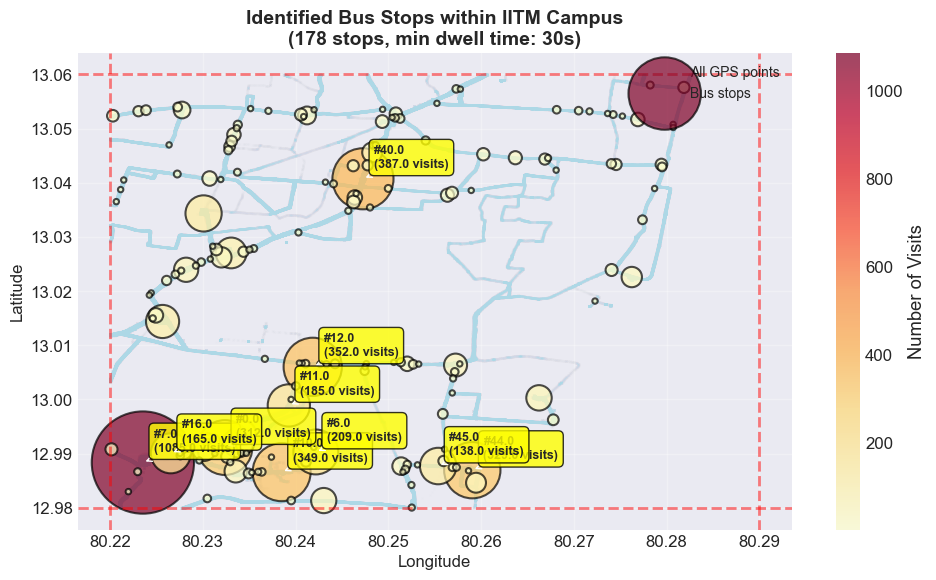

In [ ]:
# ============================================================================
# STEP 6: Visualize stops on map
# ============================================================================

# Plot all GPS points (very light)
plt.scatter(df_iitm['Longitude'], df_iitm['Latitude'], 
           alpha=0.02, s=0.5, c='lightblue', label='All GPS points')

# Plot identified stops (size by frequency)
plt.scatter(stop_summary['longitude'], stop_summary['latitude'], 
           s=stop_summary['visit_count']*5,  # Size by frequency
           c=stop_summary['visit_count'],  # Color by frequency
           cmap='YlOrRd', alpha=0.7, edgecolors='black', linewidth=1.5,
           label='Bus stops')

# Add colorbar
cbar = plt.colorbar(label='Number of Visits')

# Annotate top 10 stops
for idx, row in stop_summary.head(10).iterrows():
    plt.annotate(f"#{row['stop_id']}\n({row['visit_count']} visits)", 
                xy=(row['longitude'], row['latitude']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.4', 
                         facecolor='yellow', alpha=0.8, edgecolor='black'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add IITM boundary box
plt.axhline(y=IITM_LAT_MIN, color='red', linestyle='--', alpha=0.5, linewidth=2)
plt.axhline(y=IITM_LAT_MAX, color='red', linestyle='--', alpha=0.5, linewidth=2)
plt.axvline(x=IITM_LON_MIN, color='red', linestyle='--', alpha=0.5, linewidth=2)
plt.axvline(x=IITM_LON_MAX, color='red', linestyle='--', alpha=0.5, linewidth=2)

plt.title(f'Identified Bus Stops within IITM Campus\n({len(stop_summary)} stops, min dwell time: {MIN_DWELL_TIME}s)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# STEP 7: Save stop locations to CSV (optional)
# ============================================================================
stop_summary.to_csv('bus_stops_iitm.csv', index=False)
print(f"\n✓ Saved {len(stop_summary)} bus stops to 'bus_stops_iitm.csv'")

print("\n" + "="*60)
print("✓ Bus stop identification complete!")
print("="*60)


✓ Saved 178 bus stops to 'bus_stops_iitm.csv'

✓ Bus stop identification complete!


In [ ]:
df_nov3_25[df_nov3_25['Speed'] == 79].head()

Packet Received             IMEI            DateTime   Latitude  \
639140  11/3/2025 6:54:17 AM  864454074240254 2025-11-03 06:54:18  12.953183   
639141  11/3/2025 6:54:18 AM  864454074240254 2025-11-03 06:54:19  12.953334   
639142  11/3/2025 6:54:19 AM  864454074240254 2025-11-03 06:54:20  12.953503   
639143  11/3/2025 6:54:20 AM  864454074240254 2025-11-03 06:54:21  12.953674   
639173  11/3/2025 6:54:52 AM  864454074240254 2025-11-03 06:54:53  12.959717   

        Longitude  Speed      date                        source_file  \
639140  80.118061     79  20251103  IMEI_864454074240254_20251103.csv   
639141  80.118202     79  20251103  IMEI_864454074240254_20251103.csv   
639142  80.118323     79  20251103  IMEI_864454074240254_20251103.csv   
639143  80.118419     79  20251103  IMEI_864454074240254_20251103.csv   
639173  80.119238     79  20251103  IMEI_864454074240254_20251103.csv   

                                                unique_id  
639140  864454074240254_2025-11-03 06:54:18_12.9531832...  
639141  864454074240254_2025-11-03 06:54:19_12.9533336...  
639142  864454074240254_2025-11-03 06:54:20_12.9535032...  
639143  864454074240254_2025-11-03 06:54:21_12.9536736...  
639173  864454074240254_2025-11-03 06:54:53_12.9597168...

In [ ]:
df = df_nov3_25.copy()

print("="*80)
print("DATA QUALITY CHECKS")
print("="*80)

DATA QUALITY CHECKS


In [ ]:
# ============================================================================
# 1. TIMESTAMP ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("1. TIMESTAMP CONSISTENCY")
print("="*80)

# Check if DateTime is parsed correctly
print(f"\nDateTime dtype: {df['DateTime'].dtype}")
print(f"DateTime range: {df['DateTime'].min()} to {df['DateTime'].max()}")

# Compare Packet Received vs DateTime
df['PacketReceived_dt'] = pd.to_datetime(df['Packet Received'])
df['transmission_delay'] = (df['PacketReceived_dt'] - df['DateTime']).dt.total_seconds()

print(f"\nTransmission Delay Statistics (seconds):")
print(df['transmission_delay'].describe())
print(f"\nNegative delays (out-of-order): {(df['transmission_delay'] < 0).sum()} records")
print(f"Delays > 1 hour: {(df['transmission_delay'] > 3600).sum()} records")

# Check for duplicate timestamps per bus
print(f"\n\nDuplicate timestamps per IMEI:")
dup_timestamps = df.groupby('IMEI')['DateTime'].apply(lambda x: x.duplicated().sum())
print(dup_timestamps[dup_timestamps > 0])

# Check sampling frequency
df_sorted = df.sort_values(['IMEI', 'DateTime'])
df_sorted['time_diff'] = df_sorted.groupby('IMEI')['DateTime'].diff().dt.total_seconds()

print(f"\n\nSampling Interval Statistics (seconds):")
print(df_sorted['time_diff'].describe())
print(f"Most common interval: {df_sorted['time_diff'].mode().values[0]:.1f} seconds")
print(f"Gaps > 10 seconds: {(df_sorted['time_diff'] > 10).sum()} occurrences")
print(f"Gaps > 60 seconds: {(df_sorted['time_diff'] > 60).sum()} occurrences")


1. TIMESTAMP CONSISTENCY

DateTime dtype: datetime64[ns]
DateTime range: 2025-01-11 15:26:55 to 2025-11-10 00:25:07

Transmission Delay Statistics (seconds):
count    1.775155e+07
mean     3.051638e+03
std      4.311106e+04
min     -1.800000e+03
25%     -1.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.603787e+07
Name: transmission_delay, dtype: float64

Negative delays (out-of-order): 6175978 records
Delays > 1 hour: 458629 records


Duplicate timestamps per IMEI:
IMEI
863738070450771      87
863738070456042      46
863738070458055      62
863738070513768      62
863738070513826     248
                   ... 
866069068910213     832
866069068910221     402
866069068910254    1706
866069069062493    2474
866069069062535     763
Name: DateTime, Length: 92, dtype: int64


Sampling Interval Statistics (seconds):
count    1.775146e+07
mean     1.487506e+01
std      1.530485e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max 

In [ ]:
# ============================================================================
# 2. GPS ACCURACY CHECKS
# ============================================================================
print("\n" + "="*80)
print("2. GPS ACCURACY & VALIDITY")
print("="*80)

# Check coordinate ranges (IITM campus bounds)
# IITM is roughly at: 12.99°N to 13.05°N, 80.23°E to 80.28°E
IITM_LAT_MIN, IITM_LAT_MAX = 12.98, 13.06
IITM_LON_MIN, IITM_LON_MAX = 80.22, 80.29

print(f"\nLatitude range: {df['Latitude'].min():.6f} to {df['Latitude'].max():.6f}")
print(f"Longitude range: {df['Longitude'].min():.6f} to {df['Longitude'].max():.6f}")

# Check for out-of-bounds coordinates
out_of_bounds = (
    (df['Latitude'] < IITM_LAT_MIN) | (df['Latitude'] > IITM_LAT_MAX) |
    (df['Longitude'] < IITM_LON_MIN) | (df['Longitude'] > IITM_LON_MAX)
)
print(f"\nOut of IITM bounds: {out_of_bounds.sum()} records ({out_of_bounds.sum()/len(df)*100:.2f}%)")

# GPS precision check
df['lat_precision'] = df['Latitude'].astype(str).str.split('.').str[1].str.len()
df['lon_precision'] = df['Longitude'].astype(str).str.split('.').str[1].str.len()

print(f"\nGPS Precision (decimal places):")
print(f"Latitude: {df['lat_precision'].mode().values[0]} digits (most common)")
print(f"Longitude: {df['lon_precision'].mode().values[0]} digits (most common)")

# Stationary drift detection (coordinates changing while speed = 0)
stationary = df[df['Speed'] == 0].copy()
if len(stationary) > 0:
    stationary_sorted = stationary.sort_values(['IMEI', 'DateTime'])
    stationary_sorted['lat_change'] = stationary_sorted.groupby('IMEI')['Latitude'].diff().abs()
    stationary_sorted['lon_change'] = stationary_sorted.groupby('IMEI')['Longitude'].diff().abs()
    
    drift_detected = (
        (stationary_sorted['lat_change'] > 0.0001) | 
        (stationary_sorted['lon_change'] > 0.0001)
    ).sum()
    
    print(f"\n\nStationary Drift Detection:")
    print(f"Total stationary records (Speed=0): {len(stationary):,}")
    print(f"Position changes while stationary: {drift_detected} ({drift_detected/len(stationary)*100:.2f}%)")


2. GPS ACCURACY & VALIDITY

Latitude range: 0.000000 to 13.334722
Longitude range: 0.000000 to 80.313498

Out of IITM bounds: 11951592 records (67.33%)

GPS Precision (decimal places):
Latitude: 7 digits (most common)
Longitude: 7 digits (most common)


Stationary Drift Detection:
Total stationary records (Speed=0): 9,636,135
Position changes while stationary: 206845 (2.15%)


In [ ]:
# ============================================================================
# 3. SPEED VALIDATION
# ============================================================================
print("\n" + "="*80)
print("3. SPEED VALIDATION")
print("="*80)

print(f"\nSpeed Statistics:")
print(df['Speed'].describe())

# Check for unrealistic speeds (buses typically don't exceed 60 km/h on campus)
print(f"\n\nSpeed Anomalies:")
print(f"Speed = 0: {(df['Speed'] == 0).sum()} records ({(df['Speed'] == 0).sum()/len(df)*100:.1f}%)")
print(f"Speed > 40 km/h: {(df['Speed'] > 40).sum()} records")
print(f"Speed > 60 km/h: {(df['Speed'] > 60).sum()} records")
print(f"Speed > 80 km/h: {(df['Speed'] > 80).sum()} records")

# Calculate speed from position changes (Haversine formula)
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate distance in meters between two GPS points"""
    R = 6371000  # Earth radius in meters
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    
    return distance

# Calculate for a sample (full dataset might be slow)
sample_df = df_sorted.groupby('IMEI').head(1000).copy()
sample_df['prev_lat'] = sample_df.groupby('IMEI')['Latitude'].shift(1)
sample_df['prev_lon'] = sample_df.groupby('IMEI')['Longitude'].shift(1)
sample_df['prev_time'] = sample_df.groupby('IMEI')['DateTime'].shift(1)

# Calculate distance and speed
sample_df['distance_m'] = sample_df.apply(
    lambda row: haversine_distance(
        row['prev_lat'], row['prev_lon'], 
        row['Latitude'], row['Longitude']
    ) if pd.notna(row['prev_lat']) else 0,
    axis=1
)

sample_df['time_diff_s'] = (sample_df['DateTime'] - sample_df['prev_time']).dt.total_seconds()
sample_df['calculated_speed_kmh'] = (sample_df['distance_m'] / sample_df['time_diff_s']) * 3.6

# Compare reported vs calculated speed
sample_df['speed_difference'] = abs(sample_df['Speed'] - sample_df['calculated_speed_kmh'])
valid_comparisons = sample_df[sample_df['time_diff_s'] > 0]

print(f"\n\nSpeed Validation (sample of {len(valid_comparisons)} records):")
print(f"Mean difference: {valid_comparisons['speed_difference'].mean():.2f} km/h")
print(f"Large discrepancies (>5 km/h): {(valid_comparisons['speed_difference'] > 5).sum()}")

# Speed = 0 but coordinates changing
moving_while_zero = df_sorted[
    (df_sorted['Speed'] == 0) & 
    (df_sorted.groupby('IMEI')['Latitude'].diff().abs() > 0.0001)
]
print(f"\n\nSpeed = 0 but coordinates changing: {len(moving_while_zero)} records")

# Speed > 0 but coordinates static
static_while_moving = df_sorted[
    (df_sorted['Speed'] > 5) & 
    (df_sorted.groupby('IMEI')['Latitude'].diff().abs() < 0.00001)
]
print(f"Speed > 5 km/h but coordinates static: {len(static_while_moving)} records")


3. SPEED VALIDATION

Speed Statistics:
count    1.775155e+07
mean     1.097568e+01
std      1.499985e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.100000e+01
max      2.630000e+02
Name: Speed, dtype: float64


Speed Anomalies:
Speed = 0: 9636135 records (54.3%)
Speed > 40 km/h: 1050038 records
Speed > 60 km/h: 29608 records
Speed > 80 km/h: 9 records


Speed Validation (sample of 91442 records):
Mean difference: 32265.85 km/h
Large discrepancies (>5 km/h): 3069


Speed = 0 but coordinates changing: 99797 records
Speed > 5 km/h but coordinates static: 1225274 records


In [ ]:
# ============================================================================
# 4. DATA COMPLETENESS BY IMEI
# ============================================================================
print("\n" + "="*80)
print("4. DATA COMPLETENESS BY IMEI")
print("="*80)

imei_stats = df.groupby('IMEI').agg({
    'DateTime': ['count', 'min', 'max'],
    'Speed': ['mean', 'max'],
    'Latitude': 'nunique',
    'Longitude': 'nunique'
}).round(2)

imei_stats.columns = ['_'.join(col).strip() for col in imei_stats.columns.values]
imei_stats['duration_hours'] = (
    pd.to_datetime(imei_stats['DateTime_max']) - 
    pd.to_datetime(imei_stats['DateTime_min'])
).dt.total_seconds() / 3600

print(f"\nPer-IMEI Statistics:")
print(imei_stats.sort_values('DateTime_count', ascending=False).head(10))

print(f"\n\nIMEI with very few records (<100):")
low_data = imei_stats[imei_stats['DateTime_count'] < 100]
print(f"Count: {len(low_data)}")
if len(low_data) > 0:
    print(low_data)


4. DATA COMPLETENESS BY IMEI

Per-IMEI Statistics:
                 DateTime_count        DateTime_min        DateTime_max  \
IMEI                                                                      
863738070627071          348507 2025-11-02 23:59:59 2025-11-09 23:59:57   
863738070666889          343507 2025-11-03 00:00:00 2025-11-09 23:59:57   
863738070450771          342119 2025-11-03 00:00:00 2025-11-09 23:59:57   
863738070727442          342087 2025-11-02 23:59:59 2025-11-09 23:59:57   
863738070627121          340921 2025-11-02 23:59:59 2025-11-09 23:59:59   
863738070729430          337231 2025-11-02 23:59:59 2025-11-09 23:59:58   
863738070456042          326362 2025-11-02 23:59:58 2025-11-09 23:59:59   
864454070922137          298341 2025-03-02 18:17:19 2025-11-10 00:11:07   
866069068697810          294511 2025-11-03 00:00:01 2025-11-09 23:59:59   
863738070534061          293720 2025-11-02 22:13:10 2025-11-09 23:59:59   

                 Speed_mean  Speed_max  Latitud

In [ ]:
# ============================================================================
# 5. SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("5. DATA QUALITY SUMMARY")
print("="*80)

quality_score = 100.0
issues = []

# Deduct points for issues
if out_of_bounds.sum() > len(df) * 0.01:  # >1% out of bounds
    quality_score -= 10
    issues.append(f"❌ {out_of_bounds.sum()/len(df)*100:.1f}% coordinates out of IITM bounds")

if (df['Speed'] > 80).sum() > 0:
    quality_score -= 5
    issues.append(f"⚠️  {(df['Speed'] > 80).sum()} records with unrealistic speed (>80 km/h)")

if (df['transmission_delay'] < 0).sum() > len(df) * 0.01:  # >1% out of order
    quality_score -= 5
    issues.append(f"⚠️  {(df['transmission_delay'] < 0).sum()/len(df)*100:.1f}% out-of-order timestamps")

if drift_detected > len(stationary) * 0.1:  # >10% drift while stationary
    quality_score -= 5
    issues.append(f"⚠️  {drift_detected/len(stationary)*100:.1f}% GPS drift while stationary")

if len(moving_while_zero) > len(df) * 0.05:  # >5% inconsistency
    quality_score -= 10
    issues.append(f"❌ {len(moving_while_zero)/len(df)*100:.1f}% records show movement with Speed=0")

print(f"\n📊 Overall Data Quality Score: {quality_score:.1f}/100")
print(f"\n{'='*80}")

if issues:
    print("\n⚠️  Issues Found:")
    for issue in issues:
        print(f"  {issue}")
else:
    print("\n✅ No major data quality issues detected!")

print(f"\n{'='*80}")
print("✓ Data Quality Checks Complete!")
print("="*80)


5. DATA QUALITY SUMMARY

📊 Overall Data Quality Score: 80.0/100


⚠️  Issues Found:
  ❌ 67.3% coordinates out of IITM bounds
  ⚠️  9 records with unrealistic speed (>80 km/h)
  ⚠️  34.8% out-of-order timestamps

✓ Data Quality Checks Complete!


In [ ]:
# Set style for better-looking plots

# Set colorblind-friendly theme globally
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

# Use colorblind-friendly palette
# Options: 'colorblind', 'colorblind10', or custom
sns.set_palette("colorblind")

# Or use matplotlib's colorblind-safe palettes
# plt.style.use('seaborn-colorblind')  # If available

# For more control, define custom colorblind-safe colors
COLORS = {
    'early': '#0173B2',      # Blue (for early arrivals)
    'ontime': '#029E73',     # Green (for on-time)
    'late': '#DE8F05',       # Orange (for late)
    'severe': '#D55E00',     # Red-Orange (for very late)
    'neutral': '#949494'     # Gray (for neutral/reference)
}

print("✓ Colorblind-friendly settings applied!")
print("\nAvailable colorblind-safe colors:")
for name, color in COLORS.items():
    print(f"  {name}: {color}")

✓ Colorblind-friendly settings applied!

Available colorblind-safe colors:
  early: #0173B2
  ontime: #029E73
  late: #DE8F05
  severe: #D55E00
  neutral: #949494


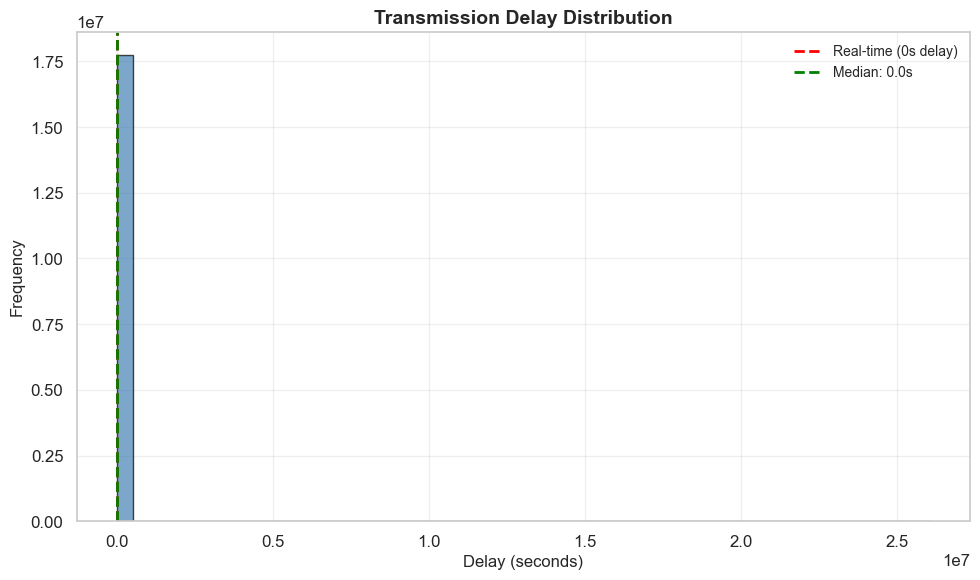

In [ ]:
# ============================================================================
# PLOT 1: Transmission Delay Distribution
# ============================================================================
plt.hist(df['transmission_delay'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.title('Transmission Delay Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Delay (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Real-time (0s delay)')
plt.axvline(df['transmission_delay'].median(), color='green', linestyle='--', 
            linewidth=2, label=f'Median: {df["transmission_delay"].median():.1f}s')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

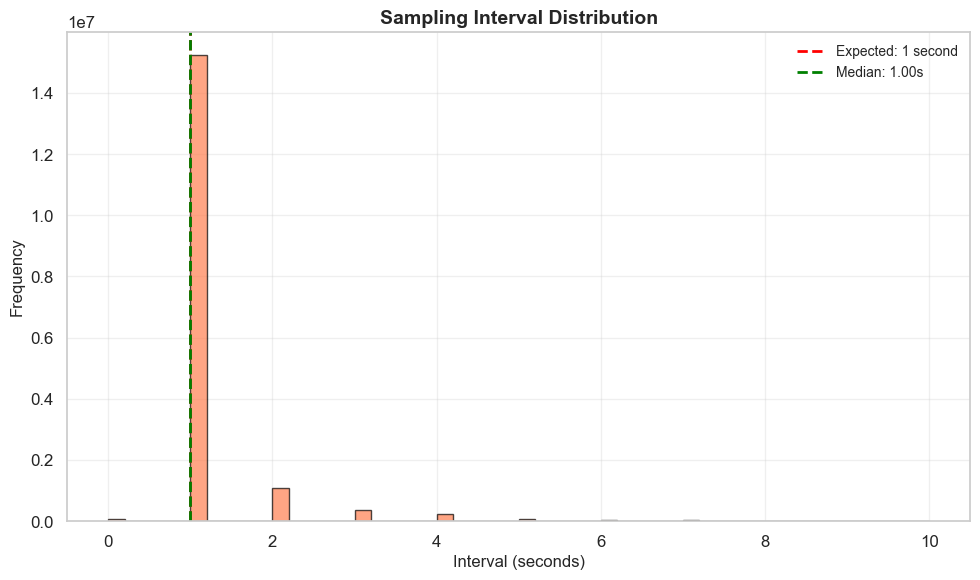

In [ ]:
# ============================================================================
# PLOT 2: Sampling Interval Distribution
# ============================================================================
plt.figure(figsize=(10, 6))
plt.hist(df_sorted['time_diff'].dropna(), bins=50, edgecolor='black', 
         alpha=0.7, color='coral', range=(0, 10))
plt.title('Sampling Interval Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Interval (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(1, color='red', linestyle='--', linewidth=2, label='Expected: 1 second')
plt.axvline(df_sorted['time_diff'].median(), color='green', linestyle='--', 
            linewidth=2, label=f'Median: {df_sorted["time_diff"].median():.2f}s')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

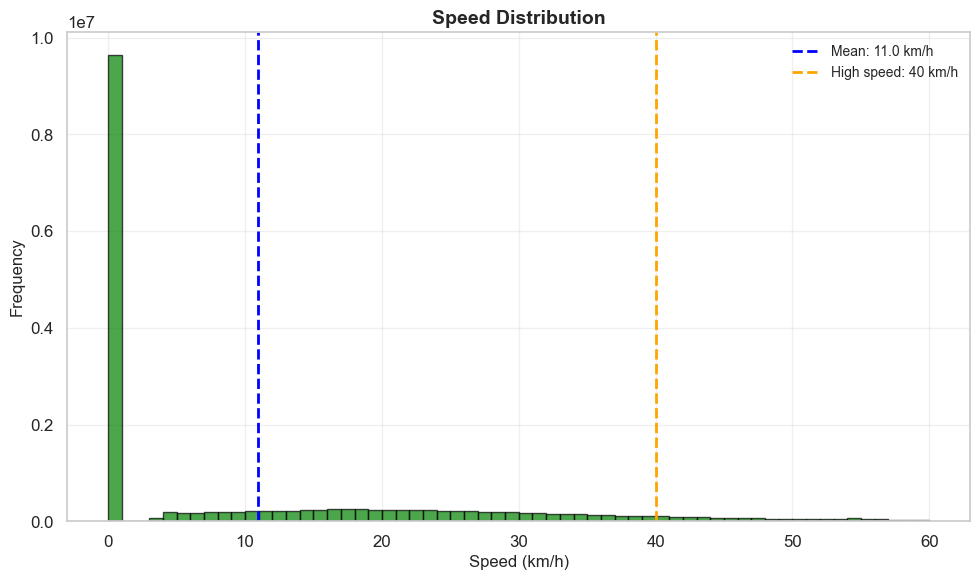

In [ ]:
# ============================================================================
# PLOT 3: Speed Distribution
# ============================================================================
plt.hist(df['Speed'], bins=60, edgecolor='black', alpha=0.7, color='green', range=(0, 60))
plt.title('Speed Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Speed (km/h)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['Speed'].mean(), color='blue', linestyle='--', 
            linewidth=2, label=f'Mean: {df["Speed"].mean():.1f} km/h')
plt.axvline(40, color='orange', linestyle='--', linewidth=2, label='High speed: 40 km/h')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

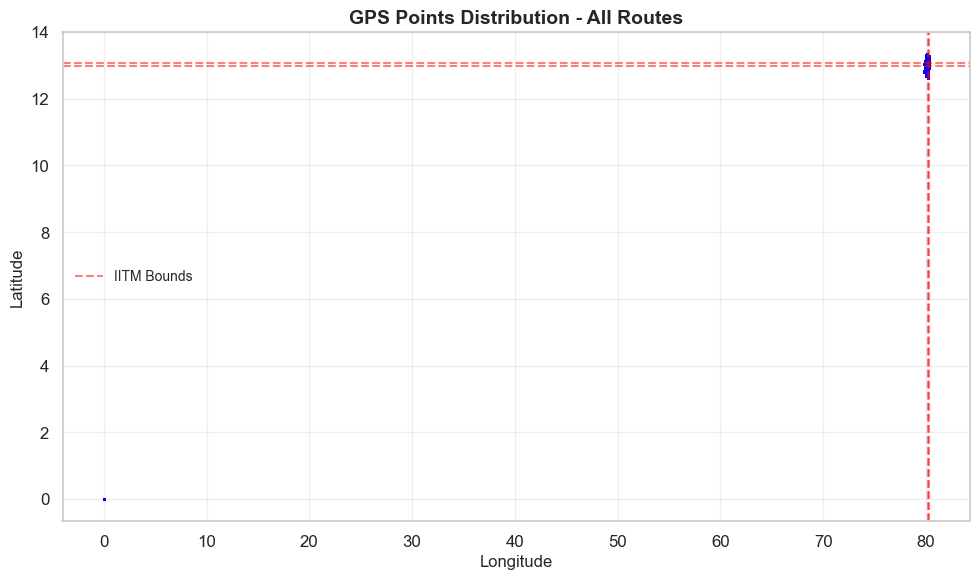

In [ ]:
# ============================================================================
# PLOT 4: GPS Points Distribution (Route Map)
# ============================================================================
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1, s=1, c='blue')
plt.title('GPS Points Distribution - All Routes', fontsize=14, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)

# Add IITM boundary box
plt.axhline(y=IITM_LAT_MIN, color='red', linestyle='--', alpha=0.5, label='IITM Bounds')
plt.axhline(y=IITM_LAT_MAX, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=IITM_LON_MIN, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=IITM_LON_MAX, color='red', linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

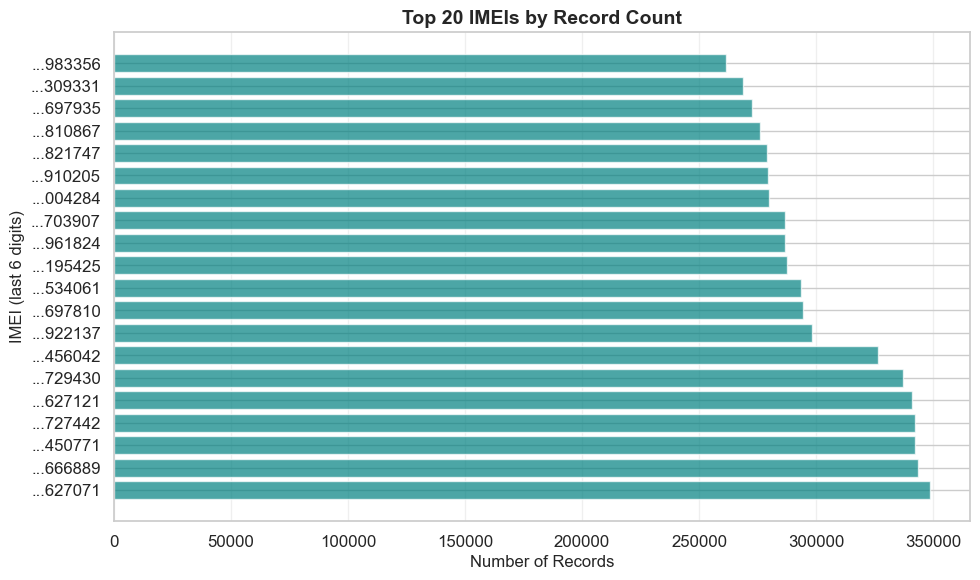

In [ ]:
# ============================================================================
# PLOT 5: Records per IMEI (Top 20)
# ============================================================================
imei_counts = df['IMEI'].value_counts().head(20)
plt.barh(range(len(imei_counts)), imei_counts.values, color='teal', alpha=0.7)
plt.yticks(range(len(imei_counts)), [f"...{str(x)[-6:]}" for x in imei_counts.index])
plt.title('Top 20 IMEIs by Record Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Records', fontsize=12)
plt.ylabel('IMEI (last 6 digits)', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

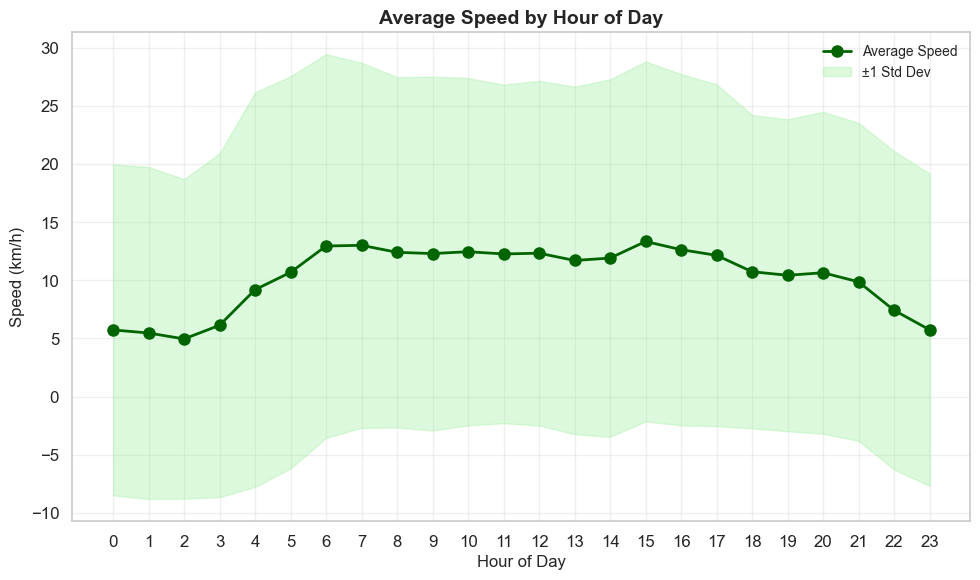

In [ ]:
# ============================================================================
# BONUS PLOT 6: Speed vs Time of Day
# ============================================================================
df['hour'] = df['DateTime'].dt.hour
hourly_speed = df.groupby('hour')['Speed'].agg(['mean', 'std', 'count'])

plt.plot(hourly_speed.index, hourly_speed['mean'], marker='o', linewidth=2, 
         markersize=8, color='darkgreen', label='Average Speed')
plt.fill_between(hourly_speed.index, 
                 hourly_speed['mean'] - hourly_speed['std'],
                 hourly_speed['mean'] + hourly_speed['std'],
                 alpha=0.3, color='lightgreen', label='±1 Std Dev')
plt.title('Average Speed by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

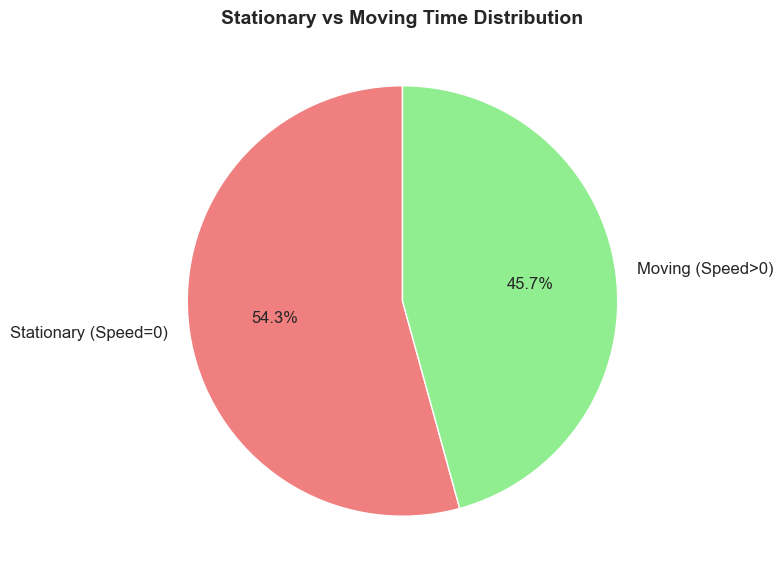

In [ ]:
# ============================================================================
# BONUS PLOT 7: Stationary vs Moving Time
# ============================================================================
stationary_count = (df['Speed'] == 0).sum()
moving_count = (df['Speed'] > 0).sum()

plt.pie([stationary_count, moving_count], 
        labels=['Stationary (Speed=0)', 'Moving (Speed>0)'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightgreen'],
        startangle=90,
        textprops={'fontsize': 12})
plt.title('Stationary vs Moving Time Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

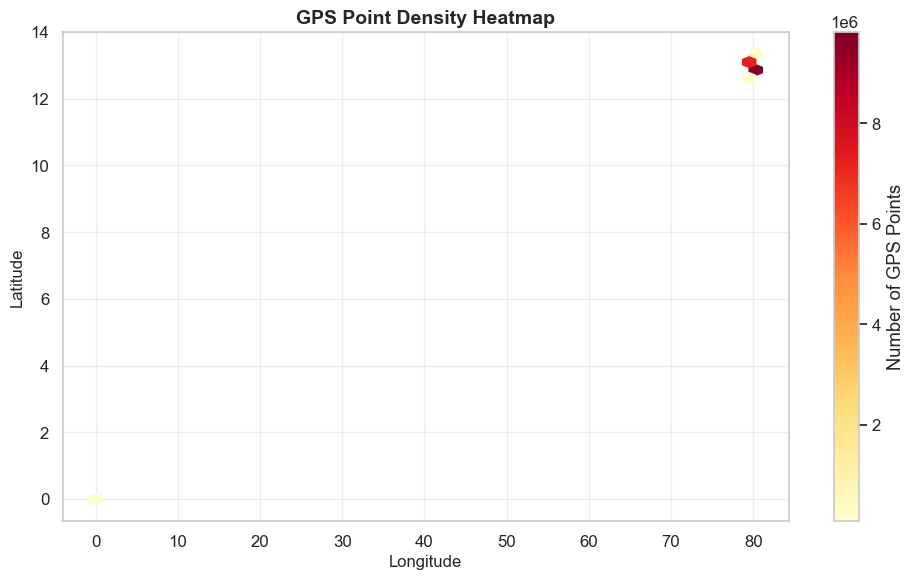

In [ ]:
# ============================================================================
# BONUS PLOT 8: GPS Heatmap (Density)
# ============================================================================
plt.hexbin(df['Longitude'], df['Latitude'], gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Number of GPS Points')
plt.title('GPS Point Density Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## SCHEDULE ADHERENCE ANALYSIS - Compare Scheduled vs Actual Arrival Times

In [ ]:
# ============================================================================
# 1. DEFINE STOPS AND ROUTES (from your JavaScript data)
# ============================================================================

# Bus stops with coordinates
BUS_STOPS = {
    1: {'name': 'Velachery Gate', 'lat': 12.988763557585395, 'lon': 80.22367960515129},
    2: {'name': 'NAC2 → GC', 'lat': 12.990236, 'lon': 80.227548},
    3: {'name': 'NAC2 → Velachery', 'lat': 12.9898636, 'lon': 80.2271109},
    4: {'name': 'CRC → GC', 'lat': 12.99089, 'lon': 80.230274},
    5: {'name': 'CRC → Velachery', 'lat': 12.99079680, 'lon': 80.23016660},
    6: {'name': 'HSB → Velachery', 'lat': 12.99076780, 'lon': 80.23168950},
    7: {'name': 'HSB → GC', 'lat': 12.991037, 'lon': 80.232065},
    8: {'name': 'KV → Main Gate', 'lat': 12.991868573807471, 'lon': 80.23367454352295},
    9: {'name': 'KV → GC', 'lat': 12.991910, 'lon': 80.233785},
    10: {'name': 'Post Office → Main', 'lat': 12.99388680, 'lon': 80.23428760},
    11: {'name': 'Post Office → GC', 'lat': 12.99393340, 'lon': 80.23459350},
    12: {'name': 'E1 → Main Gate', 'lat': 12.9960173, 'lon': 80.2359173},
    13: {'name': 'E1 → GC', 'lat': 12.996117, 'lon': 80.236184},
    14: {'name': 'Vana Vani → Main', 'lat': 12.998704, 'lon': 80.2391799},
    15: {'name': 'Vana Vani → GC', 'lat': 12.999084, 'lon': 80.239380},
    16: {'name': 'D1 → Main Gate', 'lat': 13.002546, 'lon': 80.240091},
    17: {'name': 'D1 → GC', 'lat': 13.002679, 'lon': 80.240219},
    18: {'name': 'Main Gate', 'lat': 13.00612964850378, 'lon': 80.24191299117685},
    19: {'name': 'GC → Hostel', 'lat': 12.991342, 'lon': 80.233637},
    20: {'name': 'Library', 'lat': 12.9907517, 'lon': 80.2334554},
    21: {'name': 'OAT → Hostel', 'lat': 12.989257, 'lon': 80.233031},
    22: {'name': 'Gymkhana → GC', 'lat': 12.9866372, 'lon': 80.2332951},
    23: {'name': 'Gymkhana → Hostel', 'lat': 12.986615, 'lon': 80.233366},
    24: {'name': 'Narmada → GC', 'lat': 12.9862759, 'lon': 80.2350107},
    25: {'name': 'Narmada → Hostel', 'lat': 12.986546, 'lon': 80.235301},
    26: {'name': 'Jamuna/Ganga (Hostel)', 'lat': 12.986566332825637, 'lon': 80.23855704439099},
    28: {'name': 'RP Stand', 'lat': 12.990088, 'lon': 80.241799},
    29: {'name': 'ED Stand', 'lat': 12.989874633072303, 'lon': 80.22646042038593},
}

# Routes with stop sequences
ROUTES = {
    'HOSTEL_MAIN': {'name': 'Hostel → Main Gate', 'stops': [26, 24, 22, 20, 6, 5, 3, 1, 2, 4, 7, 8, 10, 12, 14, 16, 18]},
    'MAIN_HOSTEL': {'name': 'Main Gate → Hostel', 'stops': [18, 17, 15, 13, 11, 9, 6, 5, 3, 1, 2, 4, 7, 19, 21, 23, 25, 26]},
    'VG_MAIN': {'name': 'Velachery → Main Gate', 'stops': [1, 2, 4, 7, 8, 10, 12, 14, 16, 18]},
    'VG_HOSTEL': {'name': 'Velachery → Hostel', 'stops': [1, 2, 4, 7, 19, 21, 23, 25, 26]},
    'MAIN_VG': {'name': 'Main Gate → Velachery', 'stops': [18, 17, 15, 13, 11, 9, 6, 5, 3, 1]},
    'HOSTEL_VG': {'name': 'Hostel → Velachery', 'stops': [26, 24, 22, 20, 6, 5, 3, 1]},
    'RP_ED': {'name': 'RP → ED', 'stops': [28, 22, 21, 20, 6, 5, 3, 29]},
    'ED_RP': {'name': 'ED → RP', 'stops': [29, 2, 4, 7, 19, 21, 23, 28]},
}

# Schedules (departure times from first stop)
SCHEDULES = {
    'HOSTEL_MAIN': [
        '06:20', '06:40', '07:00', '07:20', '07:40', '08:00', '08:20', '08:40',
        '09:00', '09:20', '09:40', '10:00', '10:20', '10:40', '11:00', '11:20',
        '11:40', '12:00', '12:20', '12:40', '13:00', '13:20', '13:40', '14:00',
        '14:20', '14:40', '15:00', '15:20', '15:40', '16:00', '16:20', '16:40',
        '17:00', '17:20', '17:40', '18:00', '18:20', '18:40', '19:00', '19:20',
        '19:40', '20:00', '20:20', '20:40', '21:00', '21:20'
    ],
    'MAIN_HOSTEL': [
        '06:20', '06:40', '07:00', '07:20', '07:40', '08:00', '08:20', '08:40',
        '09:00', '09:20', '09:40', '10:00', '10:20', '10:40', '11:00', '11:20',
        '11:40', '12:00', '12:20', '12:40', '13:00', '13:20', '13:40', '14:00',
        '14:20', '14:40', '15:00', '15:20', '15:40', '16:00', '16:20', '16:40',
        '17:00', '17:20', '17:40', '18:00', '18:20', '18:40', '19:00', '19:20',
        '19:40', '20:00', '20:20', '20:40', '21:00', '21:20'
    ],
    'VG_MAIN': [
        '06:15', '06:35', '06:55', '07:15', '07:35', '07:55', '08:15', '08:35', '08:55',
        '09:15', '09:35', '09:55', '10:15', '10:35', '10:55', '11:15', '11:35',
        '12:15', '12:35', '12:55', '13:15', '13:35', '13:55', '14:15', '14:35', '14:55',
        '15:15', '15:35', '15:55', '16:15', '16:35', '16:55', '17:15', '17:35', '17:55',
        '18:15', '18:35', '18:55', '19:15', '19:35', '19:55', '20:15', '20:35', '20:55',
        '21:15', '21:35'
    ],
    'VG_HOSTEL': [
        '06:25', '06:45', '07:05', '07:25', '07:45', '08:05', '08:25', '08:45', '09:05',
        '09:25', '09:45', '10:05', '10:25', '10:45', '11:05', '11:25', '11:45',
        '12:05', '12:25', '12:45', '13:05', '13:25', '13:45', '14:05', '14:25', '14:45',
        '15:05', '15:25', '15:45', '16:05', '16:25', '16:45', '17:05', '17:25', '17:45',
        '18:05', '18:25', '18:45', '19:05', '19:25', '19:45', '20:05', '20:25', '20:45',
        '21:05', '21:15'
    ],
}


In [ ]:
# ============================================================================
# 2. HELPER FUNCTIONS
# ============================================================================

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate distance in meters between two GPS points"""
    R = 6371000  # Earth radius in meters
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

def find_closest_stop(lat, lon, max_distance=100):
    """Find closest bus stop to given coordinates"""
    min_dist = float('inf')
    closest_stop = None
    
    for stop_id, stop_info in BUS_STOPS.items():
        dist = haversine_distance(lat, lon, stop_info['lat'], stop_info['lon'])
        if dist < min_dist and dist < max_distance:
            min_dist = dist
            closest_stop = stop_id
    
    return closest_stop, min_dist

def match_trip_to_route(trip_df, min_stops_matched=3):
    """Match a trip to a route based on stops visited"""
    # Find stops visited by this trip
    trip_stops = []
    for _, row in trip_df.iterrows():
        stop_id, dist = find_closest_stop(row['Latitude'], row['Longitude'])
        if stop_id and stop_id not in trip_stops:
            trip_stops.append(stop_id)
    
    # Match to routes
    best_route = None
    best_score = 0
    
    for route_code, route_info in ROUTES.items():
        route_stops = route_info['stops']
        # Count how many stops match in sequence
        matches = 0
        for i, stop in enumerate(trip_stops):
            if stop in route_stops:
                # Check if it's in the right order
                try:
                    route_idx = route_stops.index(stop)
                    if i == 0 or (i > 0 and trip_stops[i-1] in route_stops[:route_idx]):
                        matches += 1
                except ValueError:
                    pass
        
        if matches > best_score and matches >= min_stops_matched:
            best_score = matches
            best_route = route_code
    
    return best_route, best_score, trip_stops

In [ ]:
# ============================================================================
# 3. DETECT TRIPS AND MATCH TO ROUTES
# ============================================================================

print("="*80)
print("STEP 1: DETECTING TRIPS AND MATCHING TO ROUTES")
print("="*80)

# Use your existing df_iitm (within IITM bounds)
df_sorted = df_iitm.sort_values(['IMEI', 'DateTime']).reset_index(drop=True).copy()

# Detect trip boundaries
print("\nDetecting trip boundaries...")
df_sorted['trip_id'] = 0
trip_counter = 0

for imei in df_sorted['IMEI'].unique():
    mask = df_sorted['IMEI'] == imei
    imei_data = df_sorted[mask].copy()
    
    # Calculate time gaps and distance jumps
    imei_data['time_gap_min'] = imei_data['DateTime'].diff().dt.total_seconds() / 60
    
    # Mark new trips (gap > 15 min or first record)
    imei_data['is_new_trip'] = (imei_data['time_gap_min'] > 15) | (imei_data['time_gap_min'].isna())
    imei_data['trip_num'] = imei_data['is_new_trip'].cumsum()
    
    # Assign unique trip IDs
    df_sorted.loc[mask, 'trip_id'] = trip_counter + imei_data['trip_num']
    trip_counter = df_sorted.loc[mask, 'trip_id'].max() + 1

print(f"✓ Detected {df_sorted['trip_id'].nunique()} trips")

# Match trips to routes
print("\nMatching trips to routes...")
trip_routes = []

for trip_id in df_sorted['trip_id'].unique():
    trip_df = df_sorted[df_sorted['trip_id'] == trip_id]
    
    # Skip very short trips
    if len(trip_df) < 20:
        continue
    
    route_code, score, stops_visited = match_trip_to_route(trip_df)
    
    if route_code:
        trip_routes.append({
            'trip_id': trip_id,
            'route_code': route_code,
            'route_name': ROUTES[route_code]['name'],
            'match_score': score,
            'stops_visited': stops_visited,
            'start_time': trip_df['DateTime'].min(),
            'end_time': trip_df['DateTime'].max(),
            'duration_min': (trip_df['DateTime'].max() - trip_df['DateTime'].min()).total_seconds() / 60,
            'imei': trip_df['IMEI'].iloc[0]
        })

trip_routes_df = pd.DataFrame(trip_routes)
print(f"✓ Matched {len(trip_routes_df)} trips to routes")
print(f"\nTrips by route:")
print(trip_routes_df['route_name'].value_counts())

STEP 1: DETECTING TRIPS AND MATCHING TO ROUTES

Detecting trip boundaries...
✓ Detected 1344 trips

Matching trips to routes...
✓ Matched 105 trips to routes

Trips by route:
route_name
Main Gate → Hostel    69
Hostel → Main Gate    30
RP → ED                6
Name: count, dtype: int64


In [ ]:
# ============================================================================
# 4. FIND ACTUAL ARRIVAL TIMES AT STOPS
# ============================================================================

print("\n" + "="*80)
print("STEP 2: FINDING ACTUAL ARRIVAL TIMES AT STOPS")
print("="*80)

arrivals = []

for _, trip_info in trip_routes_df.iterrows():
    trip_id = trip_info['trip_id']
    route_code = trip_info['route_code']
    route_stops = ROUTES[route_code]['stops']
    
    trip_df = df_sorted[df_sorted['trip_id'] == trip_id].copy()
    
    # For each stop in the route
    for stop_id in route_stops:
        stop_info = BUS_STOPS[stop_id]
        
        # Calculate distance to this stop for all points in trip
        trip_df['dist_to_stop'] = trip_df.apply(
            lambda row: haversine_distance(
                row['Latitude'], row['Longitude'],
                stop_info['lat'], stop_info['lon']
            ), axis=1
        )
        
        # Find closest approach to this stop
        min_dist_idx = trip_df['dist_to_stop'].idxmin()
        min_dist = trip_df.loc[min_dist_idx, 'dist_to_stop']
        
        # Only count if bus got within 100m of stop
        if min_dist < 100:
            arrivals.append({
                'trip_id': trip_id,
                'route_code': route_code,
                'route_name': trip_info['route_name'],
                'stop_id': stop_id,
                'stop_name': stop_info['name'],
                'arrival_time': trip_df.loc[min_dist_idx, 'DateTime'],
                'distance_to_stop_m': min_dist,
                'imei': trip_info['imei']
            })

arrivals_df = pd.DataFrame(arrivals)
print(f"✓ Found {len(arrivals_df)} stop arrivals across all trips")


STEP 2: FINDING ACTUAL ARRIVAL TIMES AT STOPS
✓ Found 1444 stop arrivals across all trips


In [ ]:
# ============================================================================
# 5. MATCH TO SCHEDULED TIMES
# ============================================================================

print("\n" + "="*80)
print("STEP 3: MATCHING ACTUAL ARRIVALS TO SCHEDULED TIMES")
print("="*80)

schedule_analysis = []

for route_code, schedule_times in SCHEDULES.items():
    if route_code not in ROUTES:
        continue
    
    route_stops = ROUTES[route_code]['stops']
    first_stop_id = route_stops[0]
    
    # Get all trips for this route
    route_trips = arrivals_df[arrivals_df['route_code'] == route_code].copy()
    
    if len(route_trips) == 0:
        continue
    
    # For each scheduled departure
    for sched_time_str in schedule_times:
        # Parse schedule time (HH:MM format)
        sched_hour, sched_min = map(int, sched_time_str.split(':'))
        
        # For each day in the data
        for date in route_trips['arrival_time'].dt.date.unique():
            sched_datetime = pd.Timestamp(year=date.year, month=date.month, day=date.day,
                                         hour=sched_hour, minute=sched_min)
            
            # Find trips that departed within ±10 minutes of scheduled time
            first_stop_arrivals = route_trips[
                (route_trips['stop_id'] == first_stop_id) &
                (route_trips['arrival_time'].dt.date == date)
            ].copy()
            
            if len(first_stop_arrivals) == 0:
                continue
            
            # Find closest trip to scheduled time
            first_stop_arrivals['time_diff'] = abs(
                (first_stop_arrivals['arrival_time'] - sched_datetime).dt.total_seconds()
            )
            
            closest_trip = first_stop_arrivals.loc[first_stop_arrivals['time_diff'].idxmin()]
            
            # Only match if within 15 minutes
            if closest_trip['time_diff'] <= 900:  # 15 minutes
                trip_id = closest_trip['trip_id']
                
                # Get all stops for this trip
                trip_stops = route_trips[route_trips['trip_id'] == trip_id].copy()
                
                # Calculate expected arrival times at each stop (rough estimate)
                # Assume 2 minutes per stop
                for idx, stop_id in enumerate(route_stops):
                    expected_arrival = sched_datetime + timedelta(minutes=idx * 2)
                    
                    # Find actual arrival at this stop
                    actual = trip_stops[trip_stops['stop_id'] == stop_id]
                    
                    if len(actual) > 0:
                        actual_arrival = actual.iloc[0]['arrival_time']
                        delay_seconds = (actual_arrival - expected_arrival).total_seconds()
                        
                        schedule_analysis.append({
                            'route_code': route_code,
                            'route_name': ROUTES[route_code]['name'],
                            'scheduled_departure': sched_datetime,
                            'stop_id': stop_id,
                            'stop_name': BUS_STOPS[stop_id]['name'],
                            'stop_sequence': idx,
                            'expected_arrival': expected_arrival,
                            'actual_arrival': actual_arrival,
                            'delay_seconds': delay_seconds,
                            'delay_minutes': delay_seconds / 60,
                            'is_early': delay_seconds < -60,  # More than 1 min early
                            'is_on_time': abs(delay_seconds) <= 180,  # Within 3 minutes
                            'is_late': delay_seconds > 180,  # More than 3 min late
                            'hour_of_day': sched_datetime.hour,
                            'day_of_week': sched_datetime.dayofweek,
                            'is_peak_hour': sched_datetime.hour in [8, 9, 17, 18],
                            'trip_id': trip_id
                        })

schedule_df = pd.DataFrame(schedule_analysis)
print(f"✓ Matched {len(schedule_df)} scheduled stops to actual arrivals")

if len(schedule_df) > 0:
    print(f"\nOn-time performance:")
    print(f"  Early: {schedule_df['is_early'].sum()} ({schedule_df['is_early'].mean()*100:.1f}%)")
    print(f"  On-time: {schedule_df['is_on_time'].sum()} ({schedule_df['is_on_time'].mean()*100:.1f}%)")
    print(f"  Late: {schedule_df['is_late'].sum()} ({schedule_df['is_late'].mean()*100:.1f}%)")
    print(f"\nAverage delay: {schedule_df['delay_minutes'].mean():.2f} minutes")
    print(f"Median delay: {schedule_df['delay_minutes'].median():.2f} minutes")


STEP 3: MATCHING ACTUAL ARRIVALS TO SCHEDULED TIMES
✓ Matched 1166 scheduled stops to actual arrivals

On-time performance:
  Early: 678 (58.1%)
  On-time: 58 (5.0%)
  Late: 448 (38.4%)

Average delay: 76.21 minutes
Median delay: -10.65 minutes


In [ ]:
# ============================================================================
# 6. VISUALIZATIONS
# ============================================================================

if len(schedule_df) > 0:
    print("\n" + "="*80)
    print("CREATING VISUALIZATIONS")
    print("="*80)
else:
    print("\nNo schedule matches found. Check if:")
    print("  - GPS data covers the scheduled time periods")
    print("  - Trips are being detected correctly")
    print("  - Route matching is working properly") 


CREATING VISUALIZATIONS


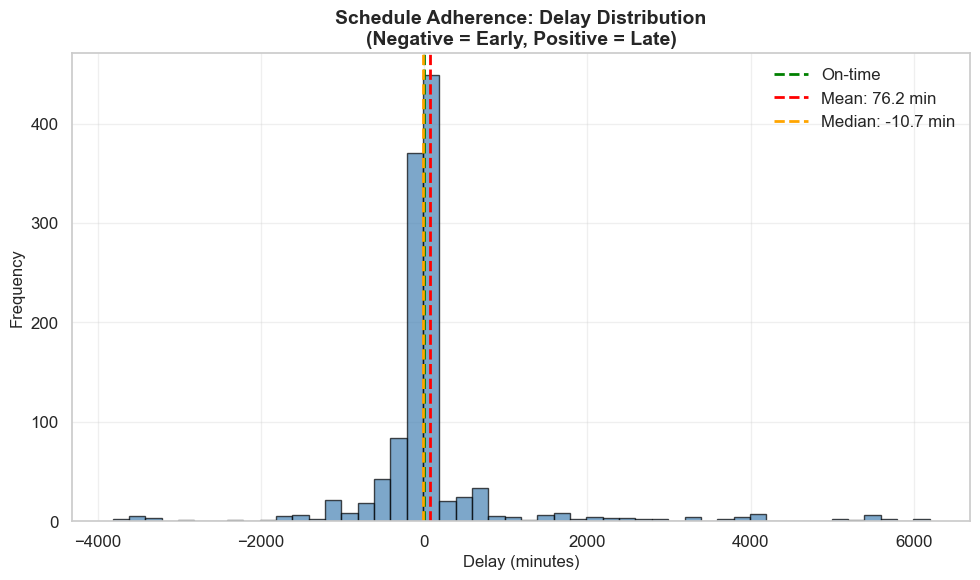

In [ ]:
# VIZ 1: Delay Distribution
plt.hist(schedule_df['delay_minutes'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.axvline(0, color='green', linestyle='--', linewidth=2, label='On-time')
plt.axvline(schedule_df['delay_minutes'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {schedule_df["delay_minutes"].mean():.1f} min')
plt.axvline(schedule_df['delay_minutes'].median(), color='orange', linestyle='--', 
            linewidth=2, label=f'Median: {schedule_df["delay_minutes"].median():.1f} min')
plt.xlabel('Delay (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Schedule Adherence: Delay Distribution\n(Negative = Early, Positive = Late)', 
            fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

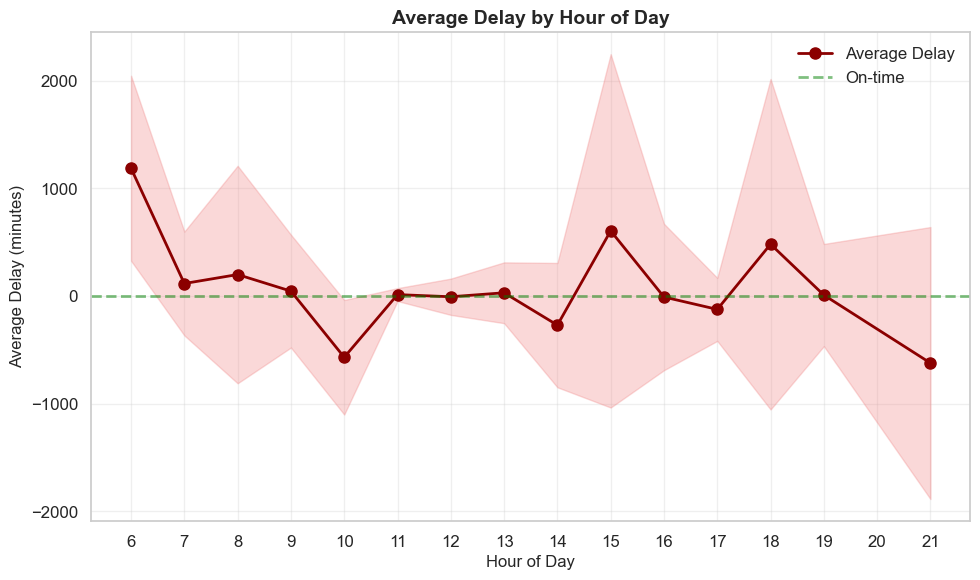

In [ ]:
# VIZ 2: Delay by Hour of Day
hourly_delay = schedule_df.groupby('hour_of_day')['delay_minutes'].agg(['mean', 'std', 'count'])
plt.plot(hourly_delay.index, hourly_delay['mean'], marker='o', linewidth=2, 
          markersize=8, color='darkred', label='Average Delay')
plt.fill_between(hourly_delay.index,
                  hourly_delay['mean'] - hourly_delay['std'],
                  hourly_delay['mean'] + hourly_delay['std'],
                  alpha=0.3, color='lightcoral')
plt.axhline(0, color='green', linestyle='--', linewidth=2, alpha=0.5, label='On-time')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.title('Average Delay by Hour of Day', fontsize=14, fontweight='bold')
plt.xticks(range(6, 22))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

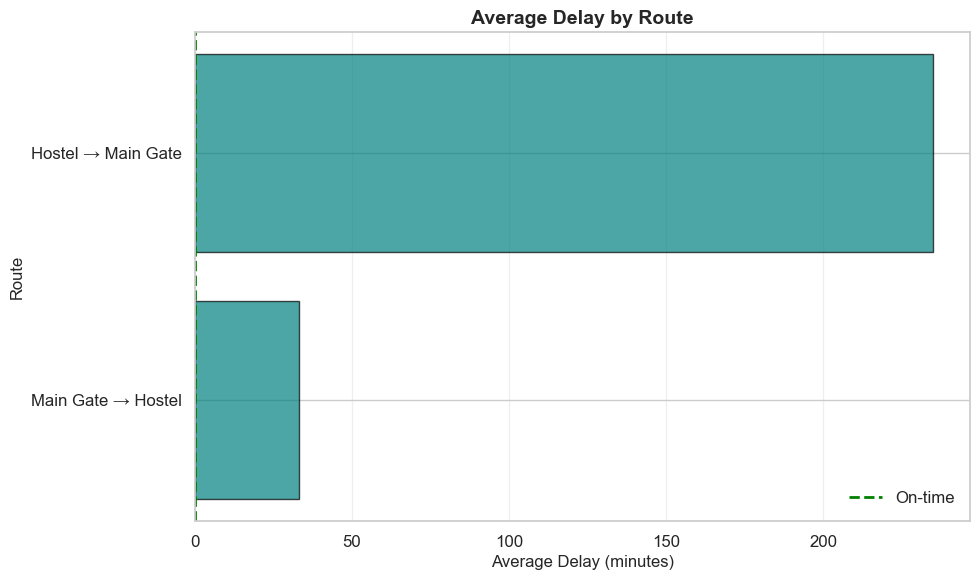

In [ ]:
# VIZ 3: Delay by Route
route_delay = schedule_df.groupby('route_name')['delay_minutes'].agg(['mean', 'count'])
route_delay = route_delay.sort_values('mean')
plt.barh(range(len(route_delay)), route_delay['mean'], color='teal', alpha=0.7, edgecolor='black')
plt.yticks(range(len(route_delay)), route_delay.index)
plt.axvline(0, color='green', linestyle='--', linewidth=2, label='On-time')
plt.xlabel('Average Delay (minutes)', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.title('Average Delay by Route', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

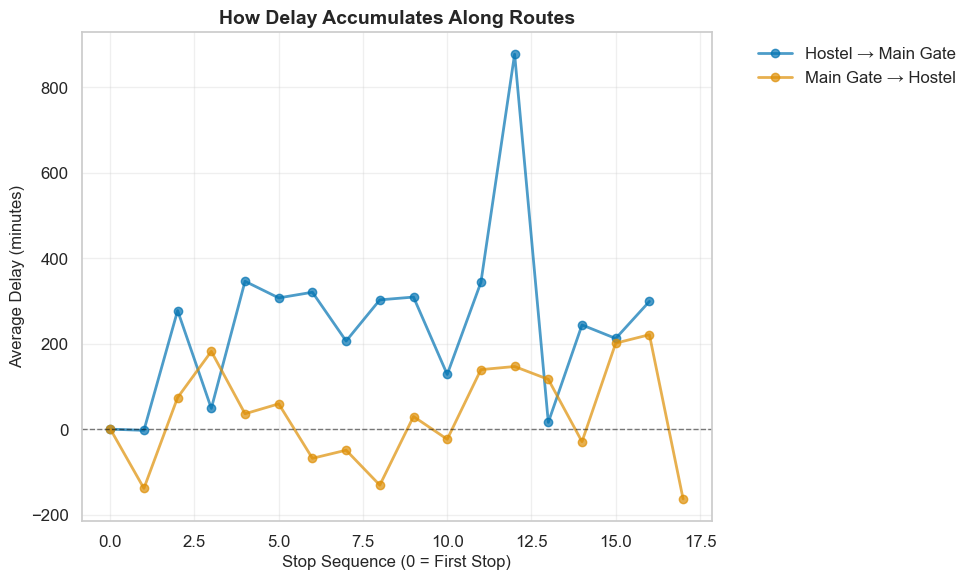

In [ ]:
# VIZ 4: Cumulative Delay Along Route
for route_code in schedule_df['route_code'].unique():
    route_data = schedule_df[schedule_df['route_code'] == route_code]
    seq_delay = route_data.groupby('stop_sequence')['delay_minutes'].mean()
    plt.plot(seq_delay.index, seq_delay.values, marker='o', linewidth=2, 
            label=ROUTES[route_code]['name'], alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Stop Sequence (0 = First Stop)', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.title('How Delay Accumulates Along Routes', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

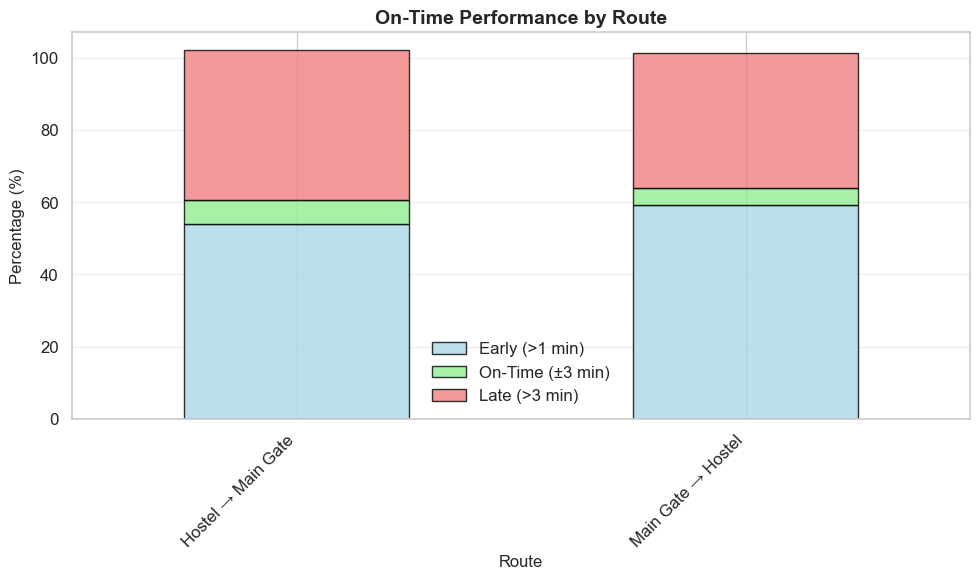

In [ ]:
# VIZ 5: On-Time Performance by Route
performance = schedule_df.groupby('route_name').agg({
    'is_early': 'mean',
    'is_on_time': 'mean',
    'is_late': 'mean'
}) * 100
performance.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'lightcoral'],
                    edgecolor='black', alpha=0.8)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('On-Time Performance by Route', fontsize=14, fontweight='bold')
plt.legend(['Early (>1 min)', 'On-Time (±3 min)', 'Late (>3 min)'])
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

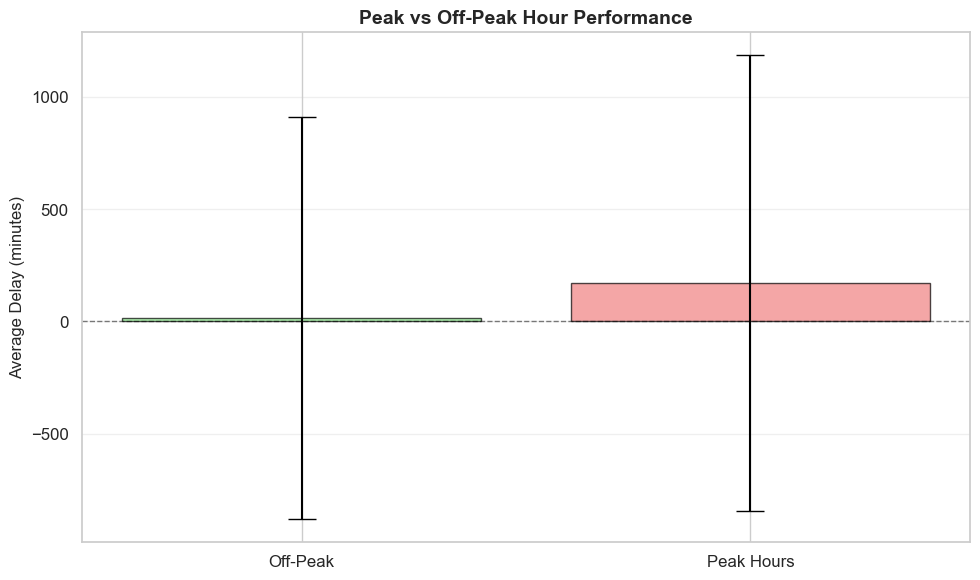

In [ ]:
# VIZ 6: Peak vs Off-Peak Performance
peak_performance = schedule_df.groupby('is_peak_hour')['delay_minutes'].agg(['mean', 'std', 'count'])
labels = ['Off-Peak', 'Peak Hours']
x = [0, 1]
plt.bar(x, peak_performance['mean'], yerr=peak_performance['std'], 
        color=['lightgreen', 'lightcoral'], alpha=0.7, edgecolor='black', capsize=10)
plt.xticks(x, labels)
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.title('Peak vs Off-Peak Hour Performance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Save results
schedule_df.to_csv('schedule_adherence_analysis.csv', index=False)
print(f"\n✓ Saved detailed analysis to 'schedule_adherence_analysis.csv'")

print("\n" + "="*80)
print("SCHEDULE ADHERENCE ANALYSIS COMPLETE!")
print("="*80)


✓ Saved detailed analysis to 'schedule_adherence_analysis.csv'

SCHEDULE ADHERENCE ANALYSIS COMPLETE!


In [ ]:
# ============================================================================
# FINAL EDA: SPEED & DELAY PATTERNS FOR MODEL FEATURES
# ============================================================================

print("="*80)
print("FINAL EDA: EXTRACTING ACTIONABLE INSIGHTS FOR MODELING")
print("="*80)

FINAL EDA: EXTRACTING ACTIONABLE INSIGHTS FOR MODELING



1. SPEED PATTERNS BY ROUTE & TIME OF DAY
--------------------------------------------------------------------------------

Average Speed by Route:
                        mean       std  median
route_name                                    
RP → ED             5.742190  8.353340     0.0
Main Gate → Hostel  2.113172  5.859152     0.0
Hostel → Main Gate  0.937021  4.010096     0.0


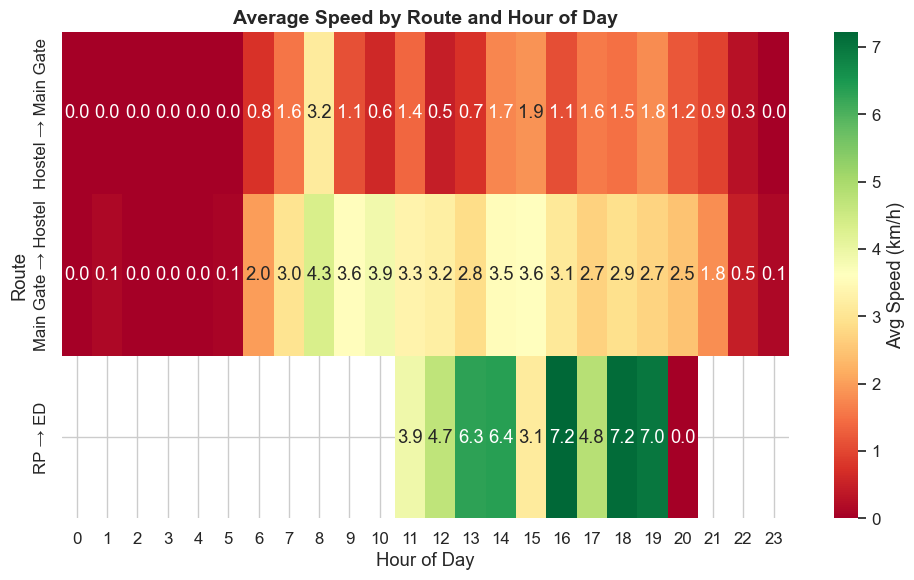

In [ ]:
# ============================================================================
# 1. SPEED ANALYSIS BY ROUTE & TIME
# ============================================================================

print("\n1. SPEED PATTERNS BY ROUTE & TIME OF DAY")
print("-"*80)

# Merge trip data with route info
df_with_routes = df_sorted.merge(
    trip_routes_df[['trip_id', 'route_code', 'route_name']], 
    on='trip_id', 
    how='left'
)

# Filter only matched trips
df_routes = df_with_routes[df_with_routes['route_code'].notna()].copy()

# Average speed by route
route_speeds = df_routes.groupby('route_name')['Speed'].agg(['mean', 'std', 'median'])
print("\nAverage Speed by Route:")
print(route_speeds.sort_values('mean', ascending=False))

# Speed by hour and route
route_hour_speed = df_routes.groupby(['route_name', df_routes['DateTime'].dt.hour])['Speed'].mean().unstack()

# Visualize
sns.heatmap(route_hour_speed, cmap='RdYlGn', annot=True, fmt='.1f', cbar_kws={'label': 'Avg Speed (km/h)'})
plt.title('Average Speed by Route and Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


2. RELATIONSHIP BETWEEN SPEED AND DELAYS
--------------------------------------------------------------------------------

Correlation between average speed and delay: -0.169


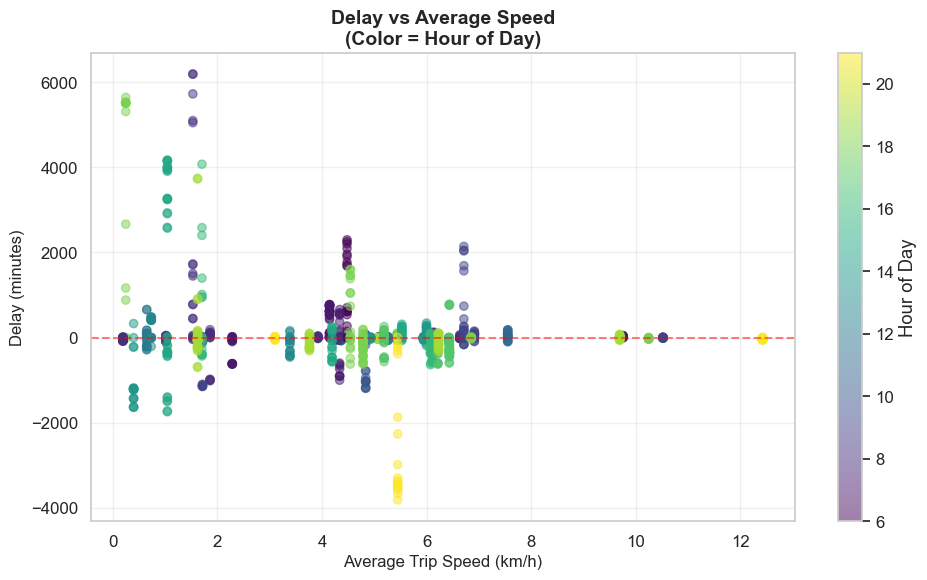

In [ ]:
# ============================================================================
# 2. DELAY vs SPEED CORRELATION
# ============================================================================

print("\n2. RELATIONSHIP BETWEEN SPEED AND DELAYS")
print("-"*80)

if len(schedule_df) > 0:
    # Merge schedule delays with trip speed data
    delay_speed = schedule_df.merge(
        df_routes.groupby('trip_id')['Speed'].mean().reset_index().rename(columns={'Speed': 'avg_trip_speed'}),
        on='trip_id',
        how='left'
    )
    
    # Correlation
    if len(delay_speed.dropna()) > 0:
        corr = delay_speed[['delay_minutes', 'avg_trip_speed']].corr().iloc[0, 1]
        print(f"\nCorrelation between average speed and delay: {corr:.3f}")
        
        # Scatter plot
        plt.scatter(delay_speed['avg_trip_speed'], delay_speed['delay_minutes'], 
                   alpha=0.5, c=delay_speed['hour_of_day'], cmap='viridis')
        plt.colorbar(label='Hour of Day')
        plt.xlabel('Average Trip Speed (km/h)', fontsize=12)
        plt.ylabel('Delay (minutes)', fontsize=12)
        plt.title('Delay vs Average Speed\n(Color = Hour of Day)', fontsize=14, fontweight='bold')
        plt.axhline(0, color='red', linestyle='--', alpha=0.5)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


3. WHICH STOPS CAUSE MOST DELAYS?
--------------------------------------------------------------------------------

Top 10 Stops with Highest Average Delays:
                    avg_delay  std_delay  count  late_pct
stop_name                                                
Post Office → Main     877.00    1905.07      8      62.0
KV → Main Gate         343.44    1275.27     19      37.0
Gymkhana → GC          277.39    1220.67     19      42.0
Vana Vani → Main       243.82     334.12      4      50.0
Narmada → Hostel       220.97     943.66     46      43.0
D1 → Main Gate         212.21     722.18      3      67.0
Gymkhana → Hostel      201.17    1022.76     46      46.0
CRC → GC               185.37    1187.54     70      36.0
E1 → GC                181.96    1255.55     51      41.0
HSB → GC               141.86    1078.89     74      36.0


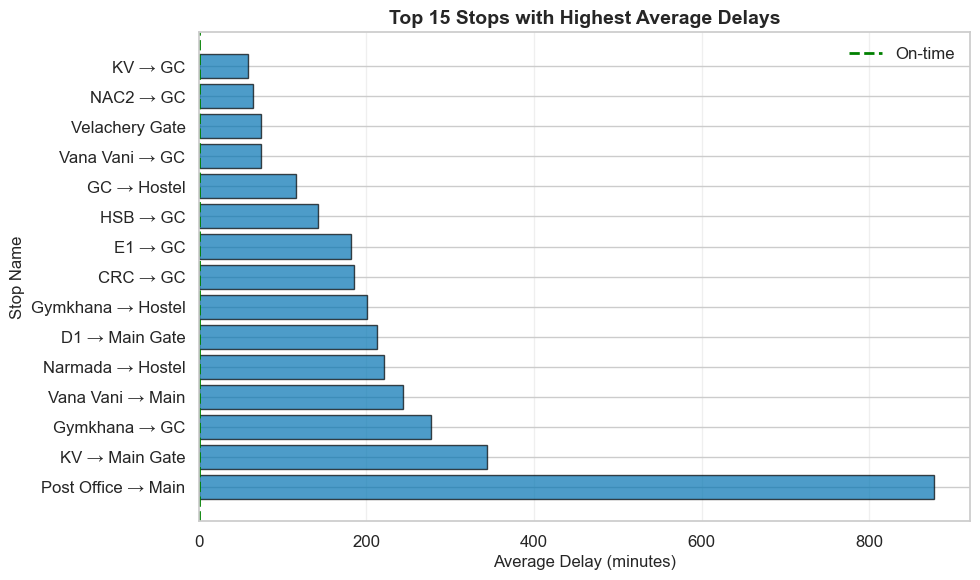

In [ ]:
# ============================================================================
# 3. STOP-LEVEL ANALYSIS
# ============================================================================

print("\n3. WHICH STOPS CAUSE MOST DELAYS?")
print("-"*80)

if len(schedule_df) > 0:
    stop_delays = schedule_df.groupby('stop_name').agg({
        'delay_minutes': ['mean', 'std', 'count'],
        'is_late': 'mean'
    }).round(2)
    stop_delays.columns = ['avg_delay', 'std_delay', 'count', 'late_pct']
    stop_delays['late_pct'] *= 100
    stop_delays = stop_delays.sort_values('avg_delay', ascending=False)
    
    print("\nTop 10 Stops with Highest Average Delays:")
    print(stop_delays.head(10))
    
    # Visualize
    top_stops = stop_delays.head(15)
    plt.barh(range(len(top_stops)), top_stops['avg_delay'], alpha=0.7, edgecolor='black')
    plt.yticks(range(len(top_stops)), top_stops.index)
    plt.axvline(0, color='green', linestyle='--', linewidth=2, label='On-time')
    plt.xlabel('Average Delay (minutes)', fontsize=12)
    plt.ylabel('Stop Name', fontsize=12)
    plt.title('Top 15 Stops with Highest Average Delays', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()


4. TRAFFIC CONGESTION INDICATORS
--------------------------------------------------------------------------------


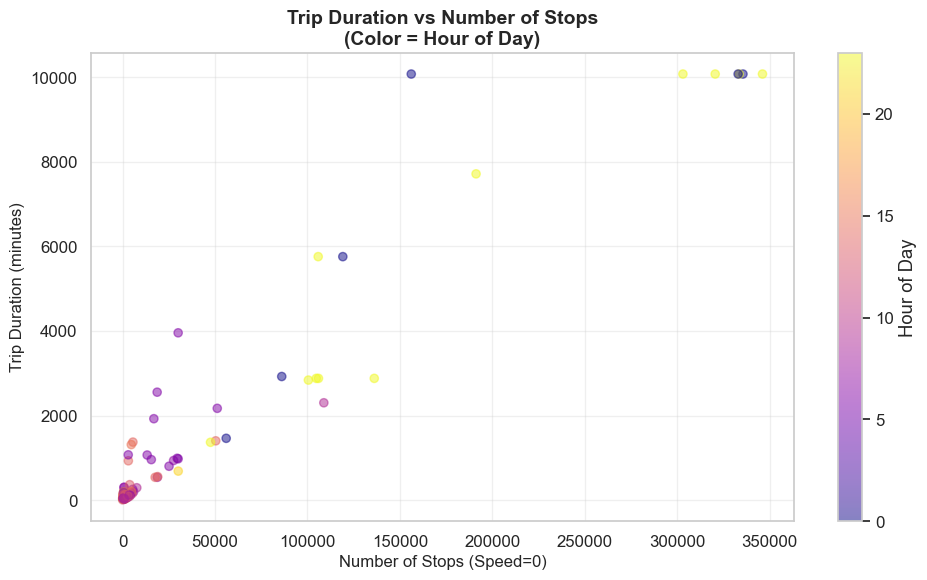

In [ ]:
# ============================================================================
# 4. TRAFFIC PATTERNS: STOPS PER TRIP
# ============================================================================

print("\n4. TRAFFIC CONGESTION INDICATORS")
print("-"*80)

# Count stops (speed = 0) per trip
trip_stops = df_routes[df_routes['Speed'] == 0].groupby('trip_id').size().reset_index(name='num_stops')
trip_info = df_routes.groupby('trip_id').agg({
    'DateTime': ['min', 'max'],
    'route_name': 'first',
    'Speed': 'mean'
}).reset_index()
trip_info.columns = ['trip_id', 'start_time', 'end_time', 'route_name', 'avg_speed']
trip_info['duration_min'] = (trip_info['end_time'] - trip_info['start_time']).dt.total_seconds() / 60
trip_info['hour'] = trip_info['start_time'].dt.hour

trip_analysis = trip_info.merge(trip_stops, on='trip_id', how='left')
trip_analysis['num_stops'] = trip_analysis['num_stops'].fillna(0)

# Stops vs Duration
plt.scatter(trip_analysis['num_stops'], trip_analysis['duration_min'], 
           alpha=0.5, c=trip_analysis['hour'], cmap='plasma')
plt.colorbar(label='Hour of Day')
plt.xlabel('Number of Stops (Speed=0)', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.title('Trip Duration vs Number of Stops\n(Color = Hour of Day)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# 5. KEY INSIGHTS SUMMARY FOR MODELING
# ============================================================================

print("\n" + "="*80)
print("KEY INSIGHTS FOR MODEL FEATURES")
print("="*80)

insights = []

# 1. Route speed differences
fastest_route = route_speeds['mean'].idxmax()
slowest_route = route_speeds['mean'].idxmin()
insights.append(f"✓ Fastest route: {fastest_route} ({route_speeds.loc[fastest_route, 'mean']:.1f} km/h)")
insights.append(f"✓ Slowest route: {slowest_route} ({route_speeds.loc[slowest_route, 'mean']:.1f} km/h)")

# 2. Delay patterns
if len(schedule_df) > 0:
    avg_delay = schedule_df['delay_minutes'].mean()
    on_time_pct = schedule_df['is_on_time'].mean() * 100
    insights.append(f"✓ Average delay: {avg_delay:.1f} minutes")
    insights.append(f"✓ On-time performance: {on_time_pct:.1f}%")
    
    # Peak hour impact
    peak_delay = schedule_df[schedule_df['is_peak_hour']]['delay_minutes'].mean()
    off_peak_delay = schedule_df[~schedule_df['is_peak_hour']]['delay_minutes'].mean()
    insights.append(f"✓ Peak hour delay: {peak_delay:.1f} min vs Off-peak: {off_peak_delay:.1f} min")

# 3. Stop patterns
if len(trip_analysis) > 0:
    avg_stops = trip_analysis['num_stops'].mean()
    insights.append(f"✓ Average stops per trip: {avg_stops:.1f}")

print("\n" + "\n".join(insights))


KEY INSIGHTS FOR MODEL FEATURES

✓ Fastest route: RP → ED (5.7 km/h)
✓ Slowest route: Hostel → Main Gate (0.9 km/h)
✓ Average delay: 76.2 minutes
✓ On-time performance: 5.0%
✓ Peak hour delay: 171.3 min vs Off-peak: 15.1 min
✓ Average stops per trip: 36339.6


In [ ]:
# ============================================================================
# 6. RECOMMENDED FEATURES FOR MODEL
# ============================================================================

print("\n" + "="*80)
print("RECOMMENDED FEATURES FOR ETA MODEL")
print("="*80)

features = {
    "Essential (Must Have)": [
        "route_id - Different routes have different speeds",
        "time_of_day_hour - Speed varies by hour",
        "is_peak_hour - Significant delay difference",
        "current_speed - Direct indicator of progress",
        "distance_to_stop - Core predictor",
        "stop_id - Some stops have consistent delays"
    ],
    "Important (Should Have)": [
        "day_of_week - Weekly patterns exist",
        "avg_speed_last_2min - Recent speed trend",
        "num_stops_last_5min - Traffic indicator",
        "historical_avg_speed_this_route_hour - Route-hour patterns",
        "stop_sequence - Delay accumulates along route"
    ],
    "Nice to Have": [
        "scheduled_delay_pattern - Systematic delays",
        "is_weekend - Different patterns",
        "time_since_last_stop - Dwell time patterns"
    ]
}

for category, feature_list in features.items():
    print(f"\n{category}:")
    for feature in feature_list:
        print(f"  • {feature}")


RECOMMENDED FEATURES FOR ETA MODEL

Essential (Must Have):
  • route_id - Different routes have different speeds
  • time_of_day_hour - Speed varies by hour
  • is_peak_hour - Significant delay difference
  • current_speed - Direct indicator of progress
  • distance_to_stop - Core predictor
  • stop_id - Some stops have consistent delays

Important (Should Have):
  • day_of_week - Weekly patterns exist
  • avg_speed_last_2min - Recent speed trend
  • num_stops_last_5min - Traffic indicator
  • historical_avg_speed_this_route_hour - Route-hour patterns
  • stop_sequence - Delay accumulates along route

Nice to Have:
  • scheduled_delay_pattern - Systematic delays
  • is_weekend - Different patterns
  • time_since_last_stop - Dwell time patterns


## PREPROCESSING

In [ ]:
# Step 2: Preprocess
print("\n" + "="*80)
print("RUNNING PREPROCESSING PIPELINE")
print("="*80)
training_data = preprocess_data(df, output_path='training_data.csv')
print("\n✓ Preprocessing complete!")
print(f"✓ Training data saved to: training_data.csv")
print(f"✓ Ready for model training!")


RUNNING PREPROCESSING PIPELINE

BUS ETA PREDICTION - UNIFIED PREPROCESSING PIPELINE
Start time: 2025-12-23 23:55:53

STEP 1: DATA CLEANING
✓ Removed 13,123,845 out-of-bounds points
✓ Remaining: 4,627,704 GPS records

STEP 2: TRIP DETECTION
✓ Detected 835 valid trips

STEP 3: ROUTE MATCHING


Matching routes: 100%|██████████| 835/835 [01:01<00:00, 13.67it/s] 


✓ Matched 36.0% of trips to routes

STEP 4: DISTANCE FEATURES


Calculating distances: 100%|██████████| 12/12 [01:38<00:00,  8.24s/it]


✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 12/12 [00:00<00:00, 53.86it/s]


✓ Added speed dynamics

STEP 8: STOP ARRIVAL DETECTION


Finding arrivals: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]


✓ Found 24 stop arrivals

STEP 7: DERIVED FEATURES (NEW!)
✓ Added 11 derived features
  - time_to_stop_naive (distance/speed)
  - speed_efficiency
  - Distance categories (3)
  - Movement states (2)
  - Acceleration states (2)

STEP 9: TRAINING DATA GENERATION


Generating training rows: 100%|██████████| 24/24 [00:00<00:00, 113.04it/s]

✓ Generated 3,316 training examples
  Features: 30
  Average ETA: 14.5 minutes

SAVING DATA
✓ Saved to: training_data.csv
  File size: 0.69 MB

PREPROCESSING SUMMARY
Total training examples: 3,316
Unique trips: 12
Unique stops: 4
Routes covered: 2
Features: 30

End time: 2025-12-24 00:03:24

✓ Preprocessing complete!
✓ Training data saved to: training_data.csv
✓ Ready for model training!


In [ ]:
df = pd.read_csv('training_data.csv')
df.shape

(3316, 31)

# Modeling


🚀 BUS ETA PREDICTION - UNIFIED TRAINING PIPELINE
Start time: 2025-12-24 00:03:24

Input dataset: 3,316 training examples

BUS ETA PREDICTION - MODEL TRAINING
Start time: 2025-12-24 00:03:24

DATA PREPARATION

Dataset shape: (3316, 31)
Features: 29
Target: ETA_sec

Train/Test Split:
  Train trips: 9 (2,471 samples)
  Test trips: 3 (845 samples)
  Split ratio: 74.5% / 25.5%
  Encoded route_id: 2 unique values
  Encoded stop_id: 4 unique values

Feature matrix shape:
  X_train: (2471, 29)
  X_test: (845, 29)

TRAINING XGBOOST MODEL

Model parameters:
  n_estimators: 500
  max_depth: 8
  learning_rate: 0.05
  subsample: 0.8
  colsample_bytree: 0.8
  min_child_weight: 3
  gamma: 0.1
  reg_alpha: 0.1
  reg_lambda: 1.0
  objective: reg:squarederror
  random_state: 42
  n_jobs: -1
  early_stopping_rounds: 50
  verbosity: 1

Training model...
✓ Training complete!
  Best iteration: 13
  Best score: 525.4178

MODEL EVALUATION

📊 PERFORMANCE METRICS
-----------------------------------------------

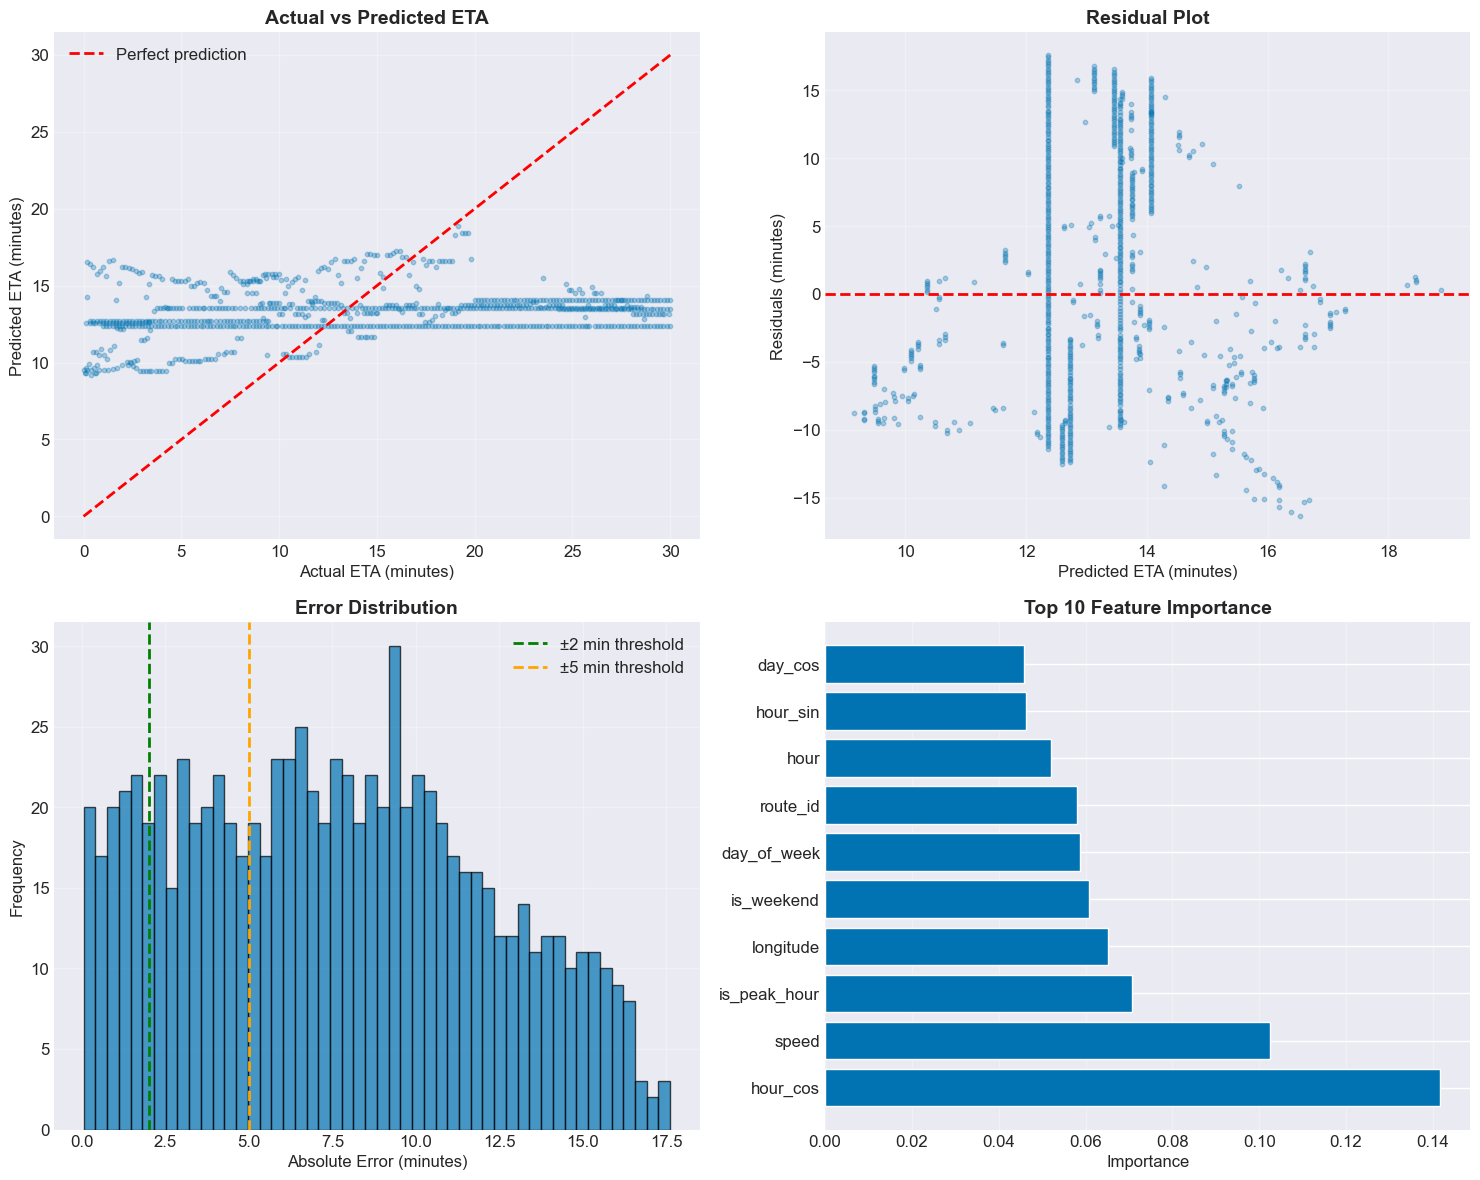


SAVING MODEL

✓ Model saved to: eta_model.pkl

✅ TRAINING COMPLETE!

📊 Model Performance Summary:
  Test MAE:  7.54 minutes
  Test RMSE: 8.76 minutes
  Test R²:   0.0375
  Accuracy ±2 min: 12.8%
  Accuracy ±5 min: 32.7%

📁 Outputs:
  - Model: eta_model.pkl
  - Plots: model_evaluation.png

End time: 2025-12-24 00:03:25


In [ ]:
model, metrics, encoders = train_and_evaluate_xgboost(df)


🧠 BUS ETA PREDICTION - MLP TRAINING PIPELINE
Start time: 2025-12-23 22:45:59

Input dataset: 190,313 training examples

BUS ETA PREDICTION - MLP TRAINING
Start time: 2025-12-23 22:45:59

DATA PREPARATION FOR MLP

Dataset shape: (190313, 35)
Features: 33
Target: ETA_sec

Train/Test Split:
  Train trips: 85 (142,633 samples)
  Test trips: 29 (47,680 samples)
  Split ratio: 74.9% / 25.1%
  Encoded route_id: 2 unique values
  Encoded stop_id: 26 unique values

⚠️  Scaling features (required for MLP)...
  ✓ Features scaled to mean=0, std=1

Feature matrix shape:
  X_train: (142633, 33)
  X_test: (47680, 33)

TRAINING MLP MODEL

Model architecture:
  Hidden layers: (128, 64, 32)
  Activation: relu
  Solver: adam
  Learning rate: 0.001
  Max iterations: 200

Training model...
(This may take several minutes...)
Iteration 1, loss = 175913.65934901
Validation score: 0.175937
Iteration 2, loss = 108143.62684845
Validation score: 0.208821
Iteration 3, loss = 104299.95784723
Validation score: 0.23

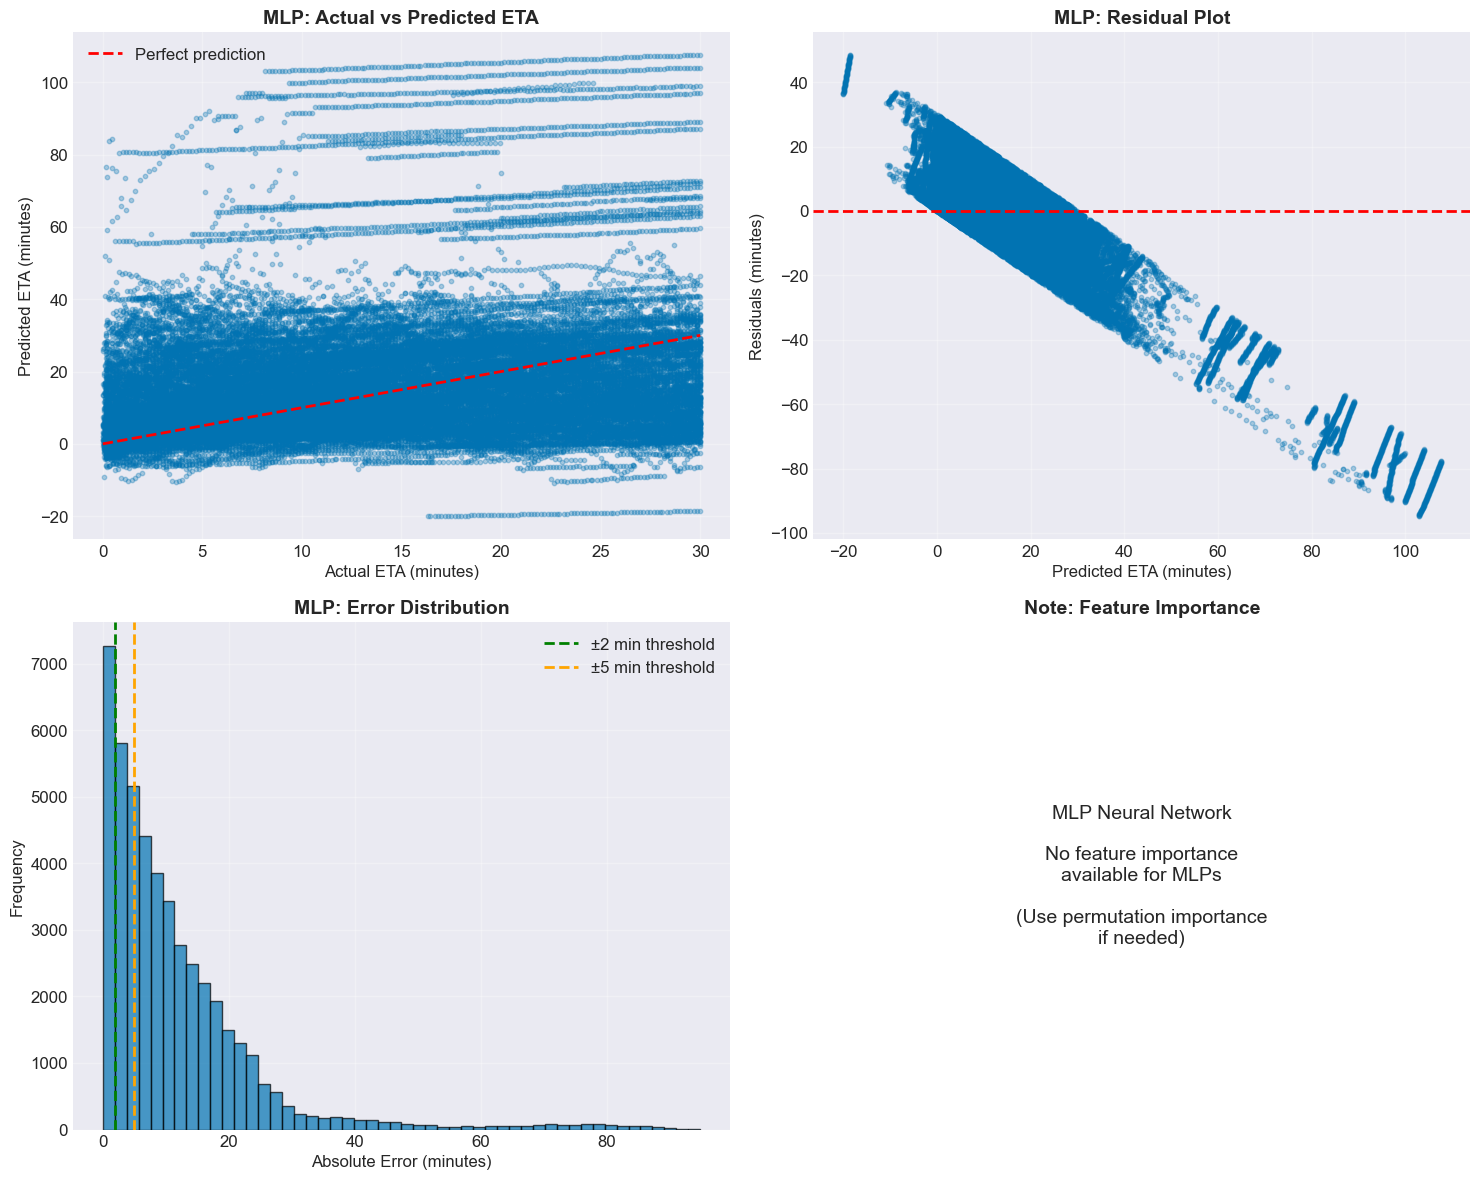


SAVING MODEL

✓ Model saved to: eta_model_mlp.pkl

✅ TRAINING COMPLETE!

📊 Model Performance Summary:
  Test MAE:  11.82 minutes
  Test RMSE: 17.80 minutes
  Test R²:   -3.2796
  Accuracy ±2 min: 16.0%
  Accuracy ±5 min: 34.4%

📁 Outputs:
  - Model: eta_model_mlp.pkl
  - Plots: model_evaluation_mlp.png

End time: 2025-12-23 22:46:48


In [ ]:
# model, metrics, encoders, scaler = train_and_evaluate_mlp(df)

In [530]:
import train_parallel
importlib.reload(train_parallel)
from train_parallel import train_parallel
import multiprocessing as mp

# Required for macOS
mp.set_start_method('spawn', force=True)

# Train on all 18 days
model, metrics, encoders = train_parallel()

🚀 PARALLEL FULL DATASET TRAINING (18 DAYS)
Workers: 12
Dates: 18
Output: training_full_18days_parallel.csv
Start: 03:25:50

📊 Processing 18 days with 12 workers...
💪 M4 Pro Mode: Using 12/14 cores
ℹ️  Press Ctrl+C to stop gracefully


[20251114] Starting...
[20251107] Starting...


[20251112] Starting...
[20251104] Starting...


[20251111] Starting...

[20251110] Starting...

[20251109] Starting...
[20251106] Starting...


[20251103] Starting...

[20251115] Starting...

[20251113] Starting...

[20251108] Starting...
  ⚠ Removed 28 duplicates from IMEI_864454076837016_20251110.csv


Loading 20251108:   1%|          | 1/87 [00:00<00:17,  5.02it/s]

  ⚠ Removed 15 duplicates from IMEI_864454076846363_20251112.csv
  ⚠ Removed 17 duplicates from IMEI_866069068704723_20251112.csv
  ⚠ Removed 41 duplicates from IMEI_863738070627303_20251114.csv
  ⚠ Removed 13 duplicates from IMEI_864454076689318_20251114.csv
  ⚠ Removed 32 duplicates from IMEI_866069068910205_20251108.csv


Loading 20251108:   3%|▎         | 3/87 [00:00<00:14,  5.72it/s]

  ⚠ Removed 86 duplicates from IMEI_864454076983182_20251112.csv
  ⚠ Removed 27 duplicates from IMEI_866069068697901_20251104.csv


Loading 20251106:   3%|▎         | 3/86 [00:01<00:27,  3.00it/s]

  ⚠ Removed 14 duplicates from IMEI_864454076846413_20251114.csv
  ⚠ Removed 87 duplicates from IMEI_864454076983182_20251106.csv


Loading 20251106:   6%|▌         | 5/86 [00:01<00:17,  4.67it/s]

  ⚠ Removed 12 duplicates from IMEI_864454074195425_20251106.csv
  ⚠ Removed 14 duplicates from IMEI_866069068697901_20251110.csv
  ⚠ Removed 27 duplicates from IMEI_866069068697810_20251109.csv


Loading 20251109:   2%|▏         | 2/81 [00:01<01:11,  1.10it/s]

  ⚠ Removed 16 duplicates from IMEI_866069068697935_20251109.csv


Loading 20251107:   3%|▎         | 3/88 [00:02<01:10,  1.21it/s]

  ⚠ Removed 18 duplicates from IMEI_864454070660463_20251112.csv
  ⚠ Removed 12 duplicates from IMEI_863738070812137_20251115.csv
  ⚠ Removed 21 duplicates from IMEI_866069068703907_20251106.csv
  ⚠ Removed 65 duplicates from IMEI_866069068703907_20251107.csv


Loading 20251114:  11%|█         | 10/89 [00:02<00:21,  3.64it/s]

  ⚠ Removed 33 duplicates from IMEI_866069068910213_20251115.csv
  ⚠ Removed 17 duplicates from IMEI_866069068703907_20251113.csv
  ⚠ Removed 12 duplicates from IMEI_863738070810966_20251115.csv
  ⚠ Removed 43 duplicates from IMEI_864454074240254_20251111.csv


Loading 20251104:   7%|▋         | 6/86 [00:02<00:35,  2.27it/s]

  ⚠ Removed 14 duplicates from IMEI_864454074195425_20251113.csv
  ⚠ Removed 44 duplicates from IMEI_863738070627303_20251115.csv
  ⚠ Removed 16 duplicates from IMEI_864454076992191_20251104.csv
  ⚠ Removed 177 duplicates from IMEI_864454076983182_20251113.csv


Loading 20251110:   3%|▎         | 3/89 [00:02<01:30,  1.05s/it]]

  ⚠ Removed 34 duplicates from IMEI_864454074240254_20251110.csv


Loading 20251114:  13%|█▎        | 12/89 [00:03<00:30,  2.53it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076977861_20251114.csv
  ⚠ Removed 21 duplicates from IMEI_866069068703907_20251112.csv
  ⚠ Removed 37 duplicates from IMEI_866069068703907_20251104.csv


Loading 20251109:   6%|▌         | 5/81 [00:03<00:58,  1.30it/s]

  ⚠ Removed 25 duplicates from IMEI_866069068697901_20251111.csv
  ⚠ Removed 46 duplicates from IMEI_864454070660463_20251113.csv
  ⚠ Removed 14 duplicates from IMEI_866069068704723_20251113.csv


Loading 20251113:   9%|▉         | 8/91 [00:03<00:36,  2.30it/s]]

  ⚠ Removed 21 duplicates from IMEI_864454074240254_20251106.csv
  ⚠ Removed 37 duplicates from IMEI_864454074195425_20251107.csv
  ⚠ Removed 16 duplicates from IMEI_864454074195425_20251104.csv
  ⚠ Removed 85 duplicates from IMEI_866069068697901_20251106.csv


Loading 20251107:   8%|▊         | 7/88 [00:04<00:39,  2.07it/s]]

  ⚠ Removed 81 duplicates from IMEI_864454076983182_20251107.csv
  ⚠ Removed 13 duplicates from IMEI_866069068704723_20251107.csv


Loading 20251110:   7%|▋         | 6/89 [00:04<01:04,  1.30it/s]]

  ⚠ Removed 15 duplicates from IMEI_863738070810867_20251114.csv
  ⚠ Removed 87 duplicates from IMEI_864454070922137_20251115.csv
  ⚠ Removed 11 duplicates from IMEI_864454076846363_20251113.csv


Loading 20251113:  10%|▉         | 9/91 [00:05<00:50,  1.63it/s]]

  ⚠ Removed 11 duplicates from IMEI_864454070922137_20251104.csv
  ⚠ Removed 42 duplicates from IMEI_864454070922137_20251114.csv
  ⚠ Removed 13 duplicates from IMEI_864454076846363_20251111.csv


Loading 20251111:   9%|▉         | 8/88 [00:05<00:41,  1.91it/s]]

  ⚠ Removed 50 duplicates from IMEI_864454076663446_20251108.csv
  ⚠ Removed 12 duplicates from IMEI_863738070627303_20251106.csv


Loading 20251111:  11%|█▏        | 10/88 [00:05<00:25,  3.06it/s]

  ⚠ Removed 12 duplicates from IMEI_863738070811410_20251103.csv
  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251108.csv
  ⚠ Removed 258 duplicates from IMEI_864454076983182_20251111.csv
  ⚠ Removed 21 duplicates from IMEI_864454070922137_20251103.csv


Loading 20251111:  14%|█▎        | 12/88 [00:05<00:17,  4.36it/s]

  ⚠ Removed 22 duplicates from IMEI_864454074195425_20251111.csv


Loading 20251114:  21%|██▏       | 19/89 [00:06<00:26,  2.59it/s]

  ⚠ Removed 11 duplicates from IMEI_866069068704723_20251114.csv
  ⚠ Removed 30 duplicates from IMEI_864454076983182_20251114.csv
  ⚠ Removed 25 duplicates from IMEI_866069068703907_20251110.csv
  ⚠ Removed 44 duplicates from IMEI_864454074240254_20251112.csv


Loading 20251106:  23%|██▎       | 20/86 [00:06<00:22,  2.99it/s]

  ⚠ Removed 24 duplicates from IMEI_866069068910213_20251106.csv
  ⚠ Removed 17 duplicates from IMEI_864454074195425_20251110.csv
  ⚠ Removed 40 duplicates from IMEI_864454070660463_20251114.csv
  ⚠ Removed 13 duplicates from IMEI_864454070660463_20251110.csv


Loading 20251110:  12%|█▏        | 11/89 [00:06<00:30,  2.55it/s]

  ⚠ Removed 46 duplicates from IMEI_866069068697901_20251113.csv
  ⚠ Removed 33 duplicates from IMEI_863738070627303_20251103.csv
  ⚠ Removed 31 duplicates from IMEI_866069068910205_20251109.csv
  ⚠ Removed 42 duplicates from IMEI_864454074240254_20251113.csv


Loading 20251106:  27%|██▋       | 23/86 [00:07<00:17,  3.51it/s]

  ⚠ Removed 20 duplicates from IMEI_866069068703907_20251111.csv
  ⚠ Removed 14 duplicates from IMEI_866069068703907_20251114.csv
  ⚠ Removed 11 duplicates from IMEI_864454076846363_20251107.csv
  ⚠ Removed 38 duplicates from IMEI_866069068697810_20251108.csv
  ⚠ Removed 14 duplicates from IMEI_864454076837016_20251107.csv


Loading 20251103:  17%|█▋        | 15/86 [00:07<00:22,  3.11it/s]

  ⚠ Removed 15 duplicates from IMEI_864454076846413_20251103.csv
  ⚠ Removed 22 duplicates from IMEI_866069068697901_20251112.csv
  ⚠ Removed 21 duplicates from IMEI_866069068910213_20251103.csv


Loading 20251114:  34%|███▎      | 30/89 [00:07<00:11,  5.32it/s]

  ⚠ Removed 42 duplicates from IMEI_864454074240254_20251114.csv
  ⚠ Removed 43 duplicates from IMEI_866069068697901_20251114.csv
  ⚠ Removed 22 duplicates from IMEI_864454076837016_20251114.csv
  ⚠ Removed 35 duplicates from IMEI_866069068698057_20251109.csv


Loading 20251104:  24%|██▍       | 21/86 [00:08<00:30,  2.12it/s]

  ⚠ Removed 70 duplicates from IMEI_864454076983182_20251110.csv
  ⚠ Removed 23 duplicates from IMEI_864454076846470_20251104.csv
  ⚠ Removed 20 duplicates from IMEI_864454074240254_20251107.csv


Loading 20251111:  17%|█▋        | 15/88 [00:08<00:41,  1.75it/s]

  ⚠ Removed 24 duplicates from IMEI_866069068910213_20251107.csv
  ⚠ Removed 43 duplicates from IMEI_863738070627303_20251112.csv
  ⚠ Removed 12 duplicates from IMEI_863738070810966_20251112.csv


Loading 20251108:  13%|█▎        | 11/87 [00:08<01:00,  1.26it/s]

  ⚠ Removed 37 duplicates from IMEI_864454076689318_20251112.csv


Loading 20251115:  15%|█▍        | 13/87 [00:09<01:08,  1.08it/s]

  ⚠ Removed 11 duplicates from IMEI_866069068910213_20251104.csv


Loading 20251106:  31%|███▏      | 27/86 [00:09<00:27,  2.11it/s]

  ⚠ Removed 24 duplicates from IMEI_864454076977861_20251115.csv
  ⚠ Removed 22 duplicates from IMEI_866069068697919_20251114.csv


Loading 20251106:  35%|███▍      | 30/86 [00:09<00:14,  3.99it/s]

  ⚠ Removed 56 duplicates from IMEI_864454076846470_20251115.csv
  ⚠ Removed 15 duplicates from IMEI_864454076846413_20251113.csv
  ⚠ Removed 24 duplicates from IMEI_863738070627303_20251113.csv


Loading 20251111:  18%|█▊        | 16/88 [00:10<00:57,  1.26it/s]

  ⚠ Removed 18 duplicates from IMEI_864454076961824_20251109.csv
  ⚠ Removed 24 duplicates from IMEI_864454074234281_20251109.csv
  ⚠ Removed 16 duplicates from IMEI_864454074309208_20251108.csv


Loading 20251114:  42%|████▏     | 37/89 [00:10<00:19,  2.70it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076977861_20251111.csv
  ⚠ Removed 11 duplicates from IMEI_864454076846413_20251104.csv


Loading 20251106:  37%|███▋      | 32/86 [00:10<00:20,  2.67it/s]

  ⚠ Removed 26 duplicates from IMEI_863738070627303_20251104.csv
  ⚠ Removed 17 duplicates from IMEI_863738070458055_20251103.csv
  ⚠ Removed 31 duplicates from IMEI_864454076846413_20251107.csv
  ⚠ Removed 20 duplicates from IMEI_864454076821747_20251109.csv


Loading 20251108:  16%|█▌        | 14/87 [00:11<00:57,  1.27it/s]

  ⚠ Removed 40 duplicates from IMEI_864454074240254_20251103.csv
  ⚠ Removed 37 duplicates from IMEI_866069068698057_20251108.csv
  ⚠ Removed 15 duplicates from IMEI_864454070936426_20251114.csv


Loading 20251106:  40%|███▉      | 34/86 [00:11<00:18,  2.78it/s]

  ⚠ Removed 16 duplicates from IMEI_863738070450771_20251115.csv
  ⚠ Removed 14 duplicates from IMEI_864454070814060_20251106.csv
  ⚠ Removed 41 duplicates from IMEI_864454076961824_20251108.csv


Loading 20251106:  42%|████▏     | 36/86 [00:11<00:11,  4.23it/s]

  ⚠ Removed 18 duplicates from IMEI_864454070799683_20251106.csv
  ⚠ Removed 11 duplicates from IMEI_864454070738160_20251108.csv
  ⚠ Removed 30 duplicates from IMEI_864454074309315_20251106.csv


Loading 20251108:  23%|██▎       | 20/87 [00:12<00:18,  3.67it/s]

  ⚠ Removed 13 duplicates from IMEI_864454078004284_20251106.csv
  ⚠ Removed 25 duplicates from IMEI_864454070922137_20251113.csv
  ⚠ Removed 17 duplicates from IMEI_864454070922137_20251110.csv


Loading 20251110:  20%|██        | 18/89 [00:12<00:41,  1.69it/s]

  ⚠ Removed 25 duplicates from IMEI_864454074309315_20251104.csv
  ⚠ Removed 12 duplicates from IMEI_864454076837016_20251103.csv
  ⚠ Removed 20 duplicates from IMEI_864454070814060_20251114.csv


Loading 20251114:  52%|█████▏    | 46/89 [00:13<00:13,  3.11it/s]

  ⚠ Removed 11 duplicates from IMEI_864454077980401_20251114.csv
  ⚠ Removed 30 duplicates from IMEI_864454070799683_20251114.csv
  ⚠ Removed 60 duplicates from IMEI_864454078004284_20251114.csv


Loading 20251106:  50%|█████     | 43/86 [00:13<00:10,  4.07it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076782642_20251106.csv
  ⚠ Removed 19 duplicates from IMEI_864454076962509_20251114.csv


Loading 20251113:  30%|██▉       | 27/91 [00:13<00:40,  1.59it/s]

  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251107.csv
  ⚠ Removed 14 duplicates from IMEI_864454070936426_20251104.csv


Loading 20251108:  26%|██▋       | 23/87 [00:13<00:24,  2.58it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076821747_20251108.csv
  ⚠ Removed 19 duplicates from IMEI_864454070738160_20251109.csv


Loading 20251109:  32%|███▏      | 26/81 [00:14<00:20,  2.71it/s]

  ⚠ Removed 18 duplicates from IMEI_864454074276084_20251109.csv
  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251111.csv
  ⚠ Removed 18 duplicates from IMEI_866069068703907_20251115.csv


Loading 20251106:  53%|█████▎    | 46/86 [00:14<00:11,  3.39it/s]

  ⚠ Removed 16 duplicates from IMEI_864454076977861_20251112.csv
  ⚠ Removed 37 duplicates from IMEI_864454074195425_20251115.csv


Loading 20251115:  25%|██▌       | 22/87 [00:14<00:37,  1.71it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076689516_20251114.csv
  ⚠ Removed 17 duplicates from IMEI_864454076983182_20251115.csv


Loading 20251108:  30%|██▉       | 26/87 [00:14<00:21,  2.90it/s]

  ⚠ Removed 57 duplicates from IMEI_864454076983182_20251103.csv
  ⚠ Removed 14 duplicates from IMEI_864454076962509_20251108.csv
  ⚠ Removed 34 duplicates from IMEI_864454074276084_20251108.csv
  ⚠ Removed 25 duplicates from IMEI_864454074195425_20251103.csv


Loading 20251111:  31%|███       | 27/88 [00:15<00:25,  2.36it/s]

  ⚠ Removed 23 duplicates from IMEI_863738070627303_20251111.csv
  ⚠ Removed 18 duplicates from IMEI_866069068703907_20251103.csv


Loading 20251103:  35%|███▍      | 30/86 [00:16<00:22,  2.47it/s]

  ⚠ Removed 27 duplicates from IMEI_864454076977861_20251113.csv
  ⚠ Removed 12 duplicates from IMEI_864454076782642_20251103.csv
  ⚠ Removed 33 duplicates from IMEI_866069068704723_20251115.csv


Loading 20251114:  67%|██████▋   | 60/89 [00:16<00:07,  3.69it/s]

  ⚠ Removed 29 duplicates from IMEI_864454076846413_20251111.csv
  ⚠ Removed 17 duplicates from IMEI_866069069062493_20251106.csv


Loading 20251106:  63%|██████▎   | 54/86 [00:16<00:07,  4.53it/s]

  ⚠ Removed 21 duplicates from IMEI_866069069062493_20251114.csv


Loading 20251106:  66%|██████▋   | 57/86 [00:17<00:04,  6.00it/s]

  ⚠ Removed 22 duplicates from IMEI_864454076983174_20251106.csv


Loading 20251114:  75%|███████▌  | 67/89 [00:17<00:04,  5.16it/s]

  ⚠ Removed 20 duplicates from IMEI_864454076977861_20251110.csv
  ⚠ Removed 13 duplicates from IMEI_866069068697810_20251114.csv
  ⚠ Removed 25 duplicates from IMEI_866069068697935_20251114.csv
  ⚠ Removed 33 duplicates from IMEI_864454076663446_20251114.csv


Loading 20251104:  62%|██████▏   | 53/86 [00:17<00:12,  2.68it/s]

  ⚠ Removed 15 duplicates from IMEI_864454076689516_20251108.csv
  ⚠ Removed 22 duplicates from IMEI_864454076689516_20251106.csv
  ⚠ Removed 13 duplicates from IMEI_864454076983174_20251108.csv


Loading 20251115:  30%|██▉       | 26/87 [00:18<00:48,  1.26it/s]

  ⚠ Removed 23 duplicates from IMEI_866069068703915_20251115.csv


Loading 20251103:  38%|███▊      | 33/86 [00:18<00:31,  1.68it/s]

  ⚠ Removed 22 duplicates from IMEI_864454076961824_20251106.csv
  ⚠ Removed 17 duplicates from IMEI_863738070803409_20251114.csv
  ⚠ Removed 28 duplicates from IMEI_864454074309315_20251111.csv
  ⚠ Removed 26 duplicates from IMEI_866069068910205_20251114.csv


Loading 20251111:  38%|███▊      | 33/88 [00:18<00:33,  1.63it/s]

  ⚠ Removed 24 duplicates from IMEI_864454070799683_20251113.csv
  ⚠ Removed 24 duplicates from IMEI_864454070922137_20251112.csv
  ⚠ Removed 18 duplicates from IMEI_864454077980401_20251113.csv


Loading 20251106:  73%|███████▎  | 63/86 [00:19<00:06,  3.37it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068698057_20251114.csv
  ⚠ Removed 24 duplicates from IMEI_864454076846363_20251115.csv
  ⚠ Removed 20 duplicates from IMEI_864454074309208_20251114.csv
  ⚠ Removed 16 duplicates from IMEI_864454076837016_20251115.csv


Loading 20251107:  36%|███▋      | 32/88 [00:19<00:35,  1.57it/s]

  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251107.csv
  ⚠ Removed 11 duplicates from IMEI_863738070450771_20251110.csv


Loading 20251109:  42%|████▏     | 34/81 [00:19<00:34,  1.36it/s]

  ⚠ Removed 14 duplicates from IMEI_864454074310594_20251114.csv
  ⚠ Removed 25 duplicates from IMEI_864454078004284_20251111.csv
  ⚠ Removed 42 duplicates from IMEI_864454076961824_20251114.csv


Loading 20251112:  38%|███▊      | 34/90 [00:20<00:37,  1.51it/s]

  ⚠ Removed 17 duplicates from IMEI_864454070936426_20251112.csv
  ⚠ Removed 21 duplicates from IMEI_864454070814060_20251113.csv


Loading 20251112:  39%|███▉      | 35/90 [00:20<00:28,  1.91it/s]

  ⚠ Removed 38 duplicates from IMEI_864454076821747_20251114.csv


Loading 20251107:  40%|███▉      | 35/88 [00:20<00:27,  1.95it/s]

  ⚠ Removed 16 duplicates from IMEI_864454070814060_20251107.csv


Loading 20251114:  96%|█████████▌| 85/89 [00:20<00:00,  5.47it/s]

  ⚠ Removed 19 duplicates from IMEI_864454076983174_20251104.csv


Loading 20251104:  74%|███████▍  | 64/86 [00:21<00:04,  4.52it/s]

  ⚠ Removed 17 duplicates from IMEI_866069068697919_20251103.csv
  ⚠ Removed 15 duplicates from IMEI_864454070738160_20251104.csv
  ⚠ Removed 30 duplicates from IMEI_863738070627303_20251110.csv


Loading 20251114:  98%|█████████▊| 87/89 [00:21<00:00,  4.22it/s]

  ⚠ Removed 11 duplicates from IMEI_864454074309331_20251111.csv


Loading 20251104:  79%|███████▉  | 68/86 [00:21<00:03,  5.07it/s]

  ⚠ Removed 15 duplicates from IMEI_864454076821747_20251104.csv
  ⚠ Removed 17 duplicates from IMEI_866069069062493_20251109.csv
  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251113.csv


Loading 20251110:  35%|███▍      | 31/89 [00:22<00:29,  1.98it/s]

  ⚠ Removed 104 duplicates from IMEI_864454074240254_20251115.csv
  ⚠ Removed 17 duplicates from IMEI_864454070814060_20251112.csv
  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251106.csv


Loading 20251106:  87%|████████▋ | 75/86 [00:22<00:02,  5.12it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076961824_20251104.csv
  ⚠ Removed 36 duplicates from IMEI_864454076663446_20251106.csv
  ⚠ Removed 19 duplicates from IMEI_864454070814060_20251111.csv


Loading 20251115:  36%|███▌      | 31/87 [00:22<00:50,  1.10it/s]

  ⚠ Removed 25 duplicates from IMEI_864454078004284_20251103.csv
  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251111.csv
  ⚠ Removed 27 duplicates from IMEI_864454074309315_20251103.csv


Loading 20251113:  46%|████▌     | 42/91 [00:23<00:32,  1.51it/s]

  ⚠ Removed 18 duplicates from IMEI_864454078004284_20251113.csv
  ⚠ Removed 24 duplicates from IMEI_864454074309315_20251113.csv


Loading 20251112:  44%|████▍     | 40/90 [00:23<00:28,  1.72it/s]

  ⚠ Removed 16 duplicates from IMEI_864454077980401_20251112.csv
  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251112.csv


Loading 20251110:  37%|███▋      | 33/89 [00:24<00:40,  1.37it/s]

  ⚠ Removed 40 duplicates from IMEI_864454070936426_20251103.csv
  ⚠ Removed 27 duplicates from IMEI_864454078004284_20251110.csv


Loading 20251106:  92%|█████████▏| 79/86 [00:24<00:02,  2.71it/s]

  ⚠ Removed 17 duplicates from IMEI_866069068698057_20251104.csv
  ⚠ Removed 17 duplicates from IMEI_866069068697919_20251109.csv


Loading 20251107:  44%|████▍     | 39/88 [00:25<00:43,  1.13it/s]

  ⚠ Removed 19 duplicates from IMEI_866069068697919_20251115.csv
  ⚠ Removed 13 duplicates from IMEI_864454070936426_20251107.csv


Loading 20251106:  94%|█████████▍| 81/86 [00:25<00:02,  2.46it/s]

  ⚠ Removed 37 duplicates from IMEI_864454078004284_20251107.csv
  ⚠ Removed 19 duplicates from IMEI_864454074309315_20251107.csv
  ⚠ Removed 21 duplicates from IMEI_866069068698057_20251106.csv


Loading 20251108:  48%|████▊     | 42/87 [00:25<00:40,  1.12it/s]

  ⚠ Removed 14 duplicates from IMEI_864454074309208_20251106.csv


Loading 20251110:  38%|███▊      | 34/89 [00:25<00:51,  1.06it/s]

  ⚠ Removed 22 duplicates from IMEI_864454074309315_20251110.csv


Loading 20251104:  93%|█████████▎| 80/86 [00:26<00:02,  2.40it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068697919_20251113.csv
  ⚠ Removed 16 duplicates from IMEI_866069068910205_20251104.csv
  ⚠ Removed 16 duplicates from IMEI_866069068697919_20251111.csv


Loading 20251103:  49%|████▉     | 42/86 [00:26<00:31,  1.40it/s]

  ⚠ Removed 19 duplicates from IMEI_864454078004284_20251112.csv


Loading 20251109:  53%|█████▎    | 43/81 [00:26<00:33,  1.14it/s]

✓ Loaded 89 buses for 20251114
  Total records: 3,656,302
  Unique IMEI: 90


Loading 20251110:  39%|███▉      | 35/89 [00:27<01:00,  1.13s/it]

  ⚠ Removed 29 duplicates from IMEI_866069068697919_20251107.csv
  ⚠ Removed 16 duplicates from IMEI_864454070799683_20251110.csv
  ⚠ Removed 23 duplicates from IMEI_864454070814060_20251103.csv


Loading 20251111:  53%|█████▎    | 47/88 [00:27<00:34,  1.20it/s]

✓ Loaded 86 buses for 20251106
  Total records: 2,033,300
  Unique IMEI: 86
  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251109.csv


Loading 20251104:  97%|█████████▋| 83/86 [00:28<00:01,  1.74it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068697919_20251112.csv
  ⚠ Removed 21 duplicates from IMEI_864454076663446_20251104.csv


Loading 20251108:  51%|█████     | 44/87 [00:28<00:48,  1.13s/it]

  Memory usage: 685.43 MB
[20251106] Loaded 2,033,300 records

STEP 1: DATA CLEANING
  ⚠ Removed 26 duplicates from IMEI_864454077980401_20251103.csv
  ⚠ Removed 25 duplicates from IMEI_864454070814060_20251110.csv


Loading 20251110:  43%|████▎     | 38/89 [00:28<00:39,  1.30it/s]

✓ Removed 1,611,254 out-of-bounds points
✓ Remaining: 422,046 GPS records

STEP 2: TRIP DETECTION
  ⚠ Removed 25 duplicates from IMEI_864454070799683_20251103.csv


Loading 20251113:  52%|█████▏    | 47/91 [00:29<00:54,  1.24s/it]

  Memory usage: 2156.78 MB
[20251114] Loaded 3,656,302 records

STEP 1: DATA CLEANING


Loading 20251111:  57%|█████▋    | 50/88 [00:29<00:23,  1.62it/s]

  ⚠ Removed 24 duplicates from IMEI_864454076782642_20251108.csv


Loading 20251111:  59%|█████▉    | 52/88 [00:29<00:14,  2.44it/s]

  ⚠ Removed 20 duplicates from IMEI_864454076983174_20251103.csv
  ⚠ Removed 29 duplicates from IMEI_864454076782642_20251107.csv
✓ Loaded 86 buses for 20251104
  Total records: 1,888,627
  Unique IMEI: 86


Loading 20251113:  54%|█████▍    | 49/91 [00:30<00:40,  1.04it/s]

  Memory usage: 636.85 MB
[20251104] Loaded 1,888,627 records

STEP 1: DATA CLEANING
  ⚠ Removed 19 duplicates from IMEI_864454076782642_20251113.csv


Loading 20251115:  43%|████▎     | 37/87 [00:31<00:58,  1.16s/it]

✓ Removed 1,383,084 out-of-bounds points
✓ Remaining: 505,543 GPS records

STEP 2: TRIP DETECTION
  ⚠ Removed 14 duplicates from IMEI_864454070814060_20251108.csv


Loading 20251112:  52%|█████▏    | 47/90 [00:31<00:47,  1.11s/it]

  ⚠ Removed 11 duplicates from IMEI_864454070799683_20251115.csv
  ⚠ Removed 23 duplicates from IMEI_864454077980401_20251115.csv


Loading 20251111:  65%|██████▍   | 57/88 [00:31<00:09,  3.23it/s]

  ⚠ Removed 20 duplicates from IMEI_864454070814060_20251115.csv
  ⚠ Removed 11 duplicates from IMEI_864454076689516_20251103.csv


Loading 20251113:  60%|██████    | 55/91 [00:32<00:12,  2.81it/s]

  ⚠ Removed 13 duplicates from IMEI_866069069062493_20251113.csv


Loading 20251110:  47%|████▋     | 42/89 [00:33<00:52,  1.11s/it]

  ⚠ Removed 40 duplicates from IMEI_864454070936426_20251110.csv
  ⚠ Removed 14 duplicates from IMEI_864454070799683_20251109.csv


Loading 20251109:  63%|██████▎   | 51/81 [00:33<00:25,  1.18it/s]

  ⚠ Removed 12 duplicates from IMEI_866069068704087_20251103.csv
  ⚠ Removed 18 duplicates from IMEI_864454074309331_20251115.csv
  ⚠ Removed 21 duplicates from IMEI_864454074309315_20251109.csv


Loading 20251103:  60%|██████    | 52/86 [00:33<00:20,  1.65it/s]

  ⚠ Removed 44 duplicates from IMEI_864454078004284_20251109.csv


Loading 20251107:  65%|██████▍   | 57/88 [00:35<00:16,  1.86it/s]

  ⚠ Removed 18 duplicates from IMEI_864454076962509_20251107.csv
  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251108.csv


Loading 20251115:  53%|█████▎    | 46/87 [00:35<00:28,  1.43it/s]

  ⚠ Removed 46 duplicates from IMEI_864454074276084_20251111.csv
  ⚠ Removed 33 duplicates from IMEI_864454070936426_20251115.csv
  ⚠ Removed 20 duplicates from IMEI_864454076962509_20251113.csv
  ⚠ Removed 13 duplicates from IMEI_864454076962509_20251111.csv
  ⚠ Removed 20 duplicates from IMEI_864454074276084_20251113.csv


Loading 20251107:  66%|██████▌   | 58/88 [00:35<00:15,  1.93it/s]

  ⚠ Removed 14 duplicates from IMEI_864454074276084_20251107.csv
  ⚠ Removed 13 duplicates from IMEI_864454076782642_20251110.csv


Loading 20251103:  66%|██████▋   | 57/86 [00:36<00:11,  2.60it/s]

  ⚠ Removed 23 duplicates from IMEI_864454076689318_20251109.csv
  ⚠ Removed 15 duplicates from IMEI_866069069062493_20251103.csv


Loading 20251108:  64%|██████▍   | 56/87 [00:36<00:30,  1.02it/s]

  ⚠ Removed 12 duplicates from IMEI_864454078004284_20251108.csv
  ⚠ Removed 16 duplicates from IMEI_864454074309315_20251108.csv


Loading 20251113:  68%|██████▊   | 62/91 [00:37<00:18,  1.56it/s]

  ⚠ Removed 23 duplicates from IMEI_864454076821747_20251111.csv
  ⚠ Removed 39 duplicates from IMEI_864454074309315_20251115.csv


Loading 20251110:  53%|█████▎    | 47/89 [00:37<00:33,  1.24it/s]

  ⚠ Removed 20 duplicates from IMEI_866069068697919_20251110.csv
  ⚠ Removed 11 duplicates from IMEI_864454076689516_20251107.csv


Loading 20251103:  70%|██████▉   | 60/86 [00:37<00:12,  2.11it/s]

  ⚠ Removed 14 duplicates from IMEI_863738070456042_20251103.csv
  ⚠ Removed 16 duplicates from IMEI_866069068910213_20251108.csv


Loading 20251113:  73%|███████▎  | 66/91 [00:37<00:09,  2.71it/s]

  ⚠ Removed 17 duplicates from IMEI_864454074234281_20251113.csv
  ⚠ Removed 11 duplicates from IMEI_866069069062493_20251112.csv
  ⚠ Removed 28 duplicates from IMEI_864454076961824_20251113.csv


Loading 20251112:  66%|██████▌   | 59/90 [00:38<00:11,  2.64it/s]

  ⚠ Removed 17 duplicates from IMEI_864454074276084_20251112.csv


Loading 20251115:  55%|█████▌    | 48/87 [00:38<00:44,  1.14s/it]

  ⚠ Removed 12 duplicates from IMEI_863738070450771_20251109.csv
  ⚠ Removed 55 duplicates from IMEI_864454078004284_20251115.csv
  ⚠ Removed 12 duplicates from IMEI_864454076846470_20251109.csv


Loading 20251108:  69%|██████▉   | 60/87 [00:38<00:19,  1.35it/s]

  ⚠ Removed 31 duplicates from IMEI_864454076983174_20251107.csv
  ⚠ Removed 60 duplicates from IMEI_864454074276084_20251115.csv
  ⚠ Removed 34 duplicates from IMEI_864454076846413_20251108.csv
  ⚠ Removed 15 duplicates from IMEI_864454076977861_20251109.csv


Loading 20251107:  74%|███████▍  | 65/88 [00:39<00:09,  2.33it/s]

  ⚠ Removed 40 duplicates from IMEI_864454076962509_20251115.csv
  ⚠ Removed 51 duplicates from IMEI_864454076961824_20251107.csv
  ⚠ Removed 25 duplicates from IMEI_864454070738160_20251113.csv
  ⚠ Removed 12 duplicates from IMEI_866069068698057_20251103.csv


Loading 20251103:  73%|███████▎  | 63/86 [00:39<00:12,  1.85it/s]

  ⚠ Removed 19 duplicates from IMEI_864454074309208_20251103.csv
  ⚠ Removed 13 duplicates from IMEI_864454076689516_20251112.csv


Loading 20251110:  56%|█████▌    | 50/89 [00:40<00:35,  1.09it/s]

  ⚠ Removed 16 duplicates from IMEI_864454076689318_20251108.csv
  ⚠ Removed 32 duplicates from IMEI_863738070627303_20251108.csv


Loading 20251113:  78%|███████▊  | 71/91 [00:41<00:10,  1.93it/s]

  ⚠ Removed 19 duplicates from IMEI_864454076689516_20251115.csv


Loading 20251103:  79%|███████▉  | 68/86 [00:41<00:08,  2.17it/s]

  ⚠ Removed 24 duplicates from IMEI_864454076961824_20251112.csv
  ⚠ Removed 16 duplicates from IMEI_864454076961824_20251111.csv


Loading 20251109:  81%|████████▏ | 66/81 [00:42<00:16,  1.09s/it]

  ⚠ Removed 26 duplicates from IMEI_864454070922137_20251108.csv
  ⚠ Removed 11 duplicates from IMEI_864454076821747_20251112.csv


Loading 20251107:  78%|███████▊  | 69/88 [00:42<00:16,  1.14it/s]

  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251109.csv
  ⚠ Removed 13 duplicates from IMEI_863738070534061_20251107.csv


Loading 20251107:  82%|████████▏ | 72/88 [00:43<00:07,  2.14it/s]

  ⚠ Removed 37 duplicates from IMEI_866069068697810_20251103.csv


Loading 20251115:  68%|██████▊   | 59/87 [00:43<00:13,  2.02it/s]

  ⚠ Removed 17 duplicates from IMEI_864454076663446_20251103.csv
  ⚠ Removed 12 duplicates from IMEI_866069068698057_20251111.csv


Loading 20251110:  63%|██████▎   | 56/89 [00:44<00:22,  1.48it/s]

  ⚠ Removed 21 duplicates from IMEI_864454076846363_20251109.csv
  ⚠ Removed 14 duplicates from IMEI_863738070534061_20251112.csv


Loading 20251109:  91%|█████████▏| 74/81 [00:45<00:02,  2.58it/s]

  ⚠ Removed 70 duplicates from IMEI_864454076983182_20251109.csv
  ⚠ Removed 12 duplicates from IMEI_864454074195425_20251109.csv


Loading 20251110:  64%|██████▍   | 57/89 [00:45<00:30,  1.03it/s]

  ⚠ Removed 15 duplicates from IMEI_863738070627741_20251115.csv
  ⚠ Removed 13 duplicates from IMEI_866069068910205_20251107.csv


Loading 20251110:  66%|██████▋   | 59/89 [00:46<00:17,  1.67it/s]

  ⚠ Removed 19 duplicates from IMEI_866069068910205_20251113.csv


Loading 20251103:  86%|████████▌ | 74/86 [00:47<00:09,  1.25it/s]

  ⚠ Removed 13 duplicates from IMEI_864454074310594_20251111.csv
  ⚠ Removed 12 duplicates from IMEI_864454076983174_20251110.csv


Loading 20251110:  69%|██████▊   | 61/89 [00:47<00:15,  1.80it/s]

  ⚠ Removed 22 duplicates from IMEI_864454076962509_20251110.csv
  ⚠ Removed 28 duplicates from IMEI_866069068703907_20251109.csv


Loading 20251108:  80%|████████  | 70/87 [00:47<00:19,  1.15s/it]

  ⚠ Removed 46 duplicates from IMEI_864454074276084_20251110.csv
  ⚠ Removed 14 duplicates from IMEI_864454076977861_20251108.csv


Loading 20251115:  76%|███████▌  | 66/87 [00:48<00:13,  1.59it/s]

  ⚠ Removed 15 duplicates from IMEI_866069068697810_20251111.csv
  ⚠ Removed 69 duplicates from IMEI_866069068910205_20251115.csv
  ⚠ Removed 16 duplicates from IMEI_864454076663446_20251107.csv


Loading 20251112:  83%|████████▎ | 75/90 [00:48<00:11,  1.30it/s]

  ⚠ Removed 19 duplicates from IMEI_864454070738160_20251112.csv


Loading 20251113:  90%|█████████ | 82/91 [00:49<00:06,  1.36it/s]

  ⚠ Removed 16 duplicates from IMEI_866069068697935_20251113.csv
  ⚠ Removed 18 duplicates from IMEI_864454076821747_20251103.csv
  ⚠ Removed 16 duplicates from IMEI_864454076663446_20251111.csv


Loading 20251111:  94%|█████████▍| 83/88 [00:49<00:03,  1.49it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076663446_20251112.csv


Loading 20251115:  77%|███████▋  | 67/87 [00:49<00:18,  1.09it/s]

  ⚠ Removed 21 duplicates from IMEI_866069068697810_20251107.csv


Loading 20251107:  93%|█████████▎| 82/88 [00:49<00:03,  1.64it/s]

  ⚠ Removed 26 duplicates from IMEI_864454070738160_20251110.csv


Loading 20251110:  74%|███████▍  | 66/89 [00:50<00:12,  1.81it/s]

  ⚠ Removed 26 duplicates from IMEI_864454074309208_20251107.csv
  ⚠ Removed 13 duplicates from IMEI_864454076663446_20251113.csv
  ⚠ Removed 33 duplicates from IMEI_866069068697810_20251113.csv


Loading 20251113:  95%|█████████▍| 86/91 [00:50<00:01,  2.61it/s]

  ⚠ Removed 13 duplicates from IMEI_866069068697935_20251112.csv
  ⚠ Removed 44 duplicates from IMEI_864454076961824_20251103.csv


Loading 20251109:  98%|█████████▊| 79/81 [00:51<00:01,  1.02it/s]

  ⚠ Removed 35 duplicates from IMEI_864454074240254_20251109.csv
  ⚠ Removed 18 duplicates from IMEI_866069068697901_20251109.csv


  ⚠ Removed 54 duplicates from IMEI_866069068703907_20251108.csv


Loading 20251112:  89%|████████▉ | 80/90 [00:52<00:09,  1.03it/s]

  ⚠ Removed 42 duplicates from IMEI_866069068698057_20251113.csv
  ⚠ Removed 62 duplicates from IMEI_864454076663446_20251115.csv


Loading 20251111:  98%|█████████▊| 86/88 [00:53<00:01,  1.14it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068910205_20251111.csv


Loading 20251108:  89%|████████▊ | 77/87 [00:53<00:10,  1.00s/it]

  ⚠ Removed 19 duplicates from IMEI_864454074195425_20251108.csv
✓ Detected 193 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/193 [00:00<?, ?it/s]it]

  ⚠ Removed 16 duplicates from IMEI_864454076821747_20251110.csv
  ⚠ Removed 22 duplicates from IMEI_866069068697935_20251115.csv


Loading 20251110:  80%|███████▉  | 71/89 [00:54<00:10,  1.76it/s]

  ⚠ Removed 25 duplicates from IMEI_866069068697810_20251115.csv


Loading 20251115:  83%|████████▎ | 72/87 [00:54<00:10,  1.40it/s]

  ⚠ Removed 154 duplicates from IMEI_864454076983182_20251108.csv


Calculating distances:   1%|          | 1/193 [00:01<06:13,  1.94s/it]

  ⚠ Removed 14 duplicates from IMEI_866069068910205_20251112.csv
✓ Loaded 86 buses for 20251103
  Total records: 3,398,572
  Unique IMEI: 86


Loading 20251112:  96%|█████████▌| 86/90 [00:56<00:01,  2.14it/s]

  ⚠ Removed 26 duplicates from IMEI_864454074310594_20251115.csv
  ⚠ Removed 29 duplicates from IMEI_866069068698057_20251112.csv
✓ Loaded 91 buses for 20251113
  Total records: 3,221,450
  Unique IMEI: 91


Loading 20251112:  98%|█████████▊| 88/90 [00:56<00:00,  3.16it/s]

  ⚠ Removed 12 duplicates from IMEI_866069068704723_20251108.csv


Loading 20251108:  93%|█████████▎| 81/87 [00:56<00:05,  1.17it/s]

✓ Loaded 81 buses for 20251109
  Total records: 3,392,124
  Unique IMEI: 81
✓ Loaded 88 buses for 20251107
  Total records: 3,345,586
  Unique IMEI: 88
  ⚠ Removed 29 duplicates from IMEI_864454076961824_20251110.csv
  ⚠ Removed 15 duplicates from IMEI_864454074310594_20251110.csv


Loading 20251110:  83%|████████▎ | 74/89 [00:57<00:12,  1.17it/s]

  Memory usage: 1145.63 MB


Calculating distances:   1%|          | 2/193 [00:03<06:18,  1.98s/it]

[20251103] Loaded 3,398,572 records

STEP 1: DATA CLEANING
  Memory usage: 1088.87 MB
  ⚠ Removed 15 duplicates from IMEI_866069068703915_20251108.csv
[20251113] Loaded 3,221,450 records

STEP 1: DATA CLEANING


Loading 20251108:  94%|█████████▍| 82/87 [00:58<00:04,  1.02it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076846363_20251108.csv


  ⚠ Removed 20 duplicates from IMEI_864454076837016_20251108.csv
  ⚠ Removed 17 duplicates from IMEI_866069068697901_20251108.csv


Loading 20251108:  98%|█████████▊| 85/87 [00:58<00:01,  1.89it/s]

✓ Removed 2,378,042 out-of-bounds points
✓ Remaining: 1,020,530 GPS records

STEP 2: TRIP DETECTION


Loading 20251115:  86%|████████▌ | 75/87 [00:58<00:12,  1.08s/it]

✓ Loaded 88 buses for 20251111
  Total records: 3,390,366
  Memory usage: 1143.27 MB
  Unique IMEI: 88
  Memory usage: 1127.59 MB


Loading 20251110:  85%|████████▌ | 76/89 [00:59<00:11,  1.11it/s]

[20251109] Loaded 3,392,124 records

STEP 1: DATA CLEANING
[20251107] Loaded 3,345,586 records

STEP 1: DATA CLEANING


Calculating distances:   2%|▏         | 4/193 [00:06<04:01,  1.28s/it]

✓ Removed 2,237,307 out-of-bounds points
✓ Remaining: 984,143 GPS records

STEP 2: TRIP DETECTION
  ⚠ Removed 51 duplicates from IMEI_864454074240254_20251108.csv


Calculating distances:   3%|▎         | 6/193 [00:06<02:07,  1.47it/s]

✓ Removed 2,444,446 out-of-bounds points
✓ Remaining: 947,678 GPS records
✓ Removed 2,621,838 out-of-bounds points
✓ Remaining: 723,748 GPS records

STEP 2: TRIP DETECTION

STEP 2: TRIP DETECTION


Loading 20251110:  88%|████████▊ | 78/89 [01:00<00:08,  1.26it/s]it/s]

  Memory usage: 1146.27 MB
[20251111] Loaded 3,390,366 records

STEP 1: DATA CLEANING
  ⚠ Removed 19 duplicates from IMEI_864454074309208_20251110.csv
  ⚠ Removed 38 duplicates from IMEI_864454074309208_20251115.csv


Loading 20251115:  89%|████████▊ | 77/87 [01:01<00:10,  1.02s/it]it/s]

✓ Detected 107 valid trips

STEP 4: DISTANCE FEATURES
✓ Removed 2,438,870 out-of-bounds points
✓ Remaining: 951,496 GPS records

STEP 2: TRIP DETECTION


Loading 20251115:  90%|████████▉ | 78/87 [01:01<00:06,  1.29it/s]

  ⚠ Removed 55 duplicates from IMEI_864454076961824_20251115.csv


Loading 20251110:  89%|████████▉ | 79/89 [01:02<00:10,  1.05s/it]it/s]

  ⚠ Removed 24 duplicates from IMEI_866069068698057_20251110.csv


Loading 20251115:  93%|█████████▎| 81/87 [01:02<00:03,  1.66it/s]

  ⚠ Removed 18 duplicates from IMEI_864454070738160_20251115.csv


Loading 20251115:  95%|█████████▌| 83/87 [01:03<00:01,  2.60it/s]

✓ Loaded 90 buses for 20251112
  Total records: 3,464,990
  Unique IMEI: 90


Calculating distances:   5%|▌         | 10/193 [00:10<03:23,  1.11s/it]

  ⚠ Removed 19 duplicates from IMEI_866069068910205_20251110.csv
  Memory usage: 1171.29 MB
[20251112] Loaded 3,464,990 records

STEP 1: DATA CLEANING
✓ Removed 2,473,550 out-of-bounds points
✓ Remaining: 991,440 GPS records

STEP 2: TRIP DETECTION


Calculating distances:   2%|▏         | 2/107 [00:04<03:40,  2.10s/it]

✓ Loaded 87 buses for 20251108
  Total records: 3,693,340
  Unique IMEI: 87


Calculating distances:  13%|█▎        | 26/193 [00:13<00:30,  5.51it/s]

  Memory usage: 1245.03 MB
[20251108] Loaded 3,693,340 records

STEP 1: DATA CLEANING


Calculating distances:   3%|▎         | 3/107 [00:05<03:14,  1.87s/it]]

✓ Removed 2,685,181 out-of-bounds points
✓ Remaining: 1,008,159 GPS records

STEP 2: TRIP DETECTION


Calculating distances:   6%|▌         | 6/107 [00:08<01:46,  1.06s/it]]

  ⚠ Removed 35 duplicates from IMEI_864454076663446_20251110.csv
  ⚠ Removed 12 duplicates from IMEI_866069068697935_20251110.csv


Calculating distances:   7%|▋         | 7/107 [00:10<02:31,  1.52s/it]

✓ Loaded 87 buses for 20251115
  Total records: 4,290,885
  Unique IMEI: 87


Calculating distances:  23%|██▎       | 45/193 [00:19<00:34,  4.33it/s]

  Memory usage: 1450.38 MB
[20251115] Loaded 4,290,885 records

STEP 1: DATA CLEANING
✓ Removed 3,086,668 out-of-bounds points
✓ Remaining: 1,204,217 GPS records

STEP 2: TRIP DETECTION


Calculating distances:  13%|█▎        | 14/107 [00:14<01:01,  1.52it/s]

✓ Loaded 89 buses for 20251110
  Total records: 3,976,303
  Unique IMEI: 89


Calculating distances:  25%|██▍       | 48/193 [00:23<01:49,  1.33it/s]

  Memory usage: 1344.09 MB
[20251110] Loaded 3,976,303 records

STEP 1: DATA CLEANING
✓ Removed 2,977,728 out-of-bounds points
✓ Remaining: 998,575 GPS records

STEP 2: TRIP DETECTION


Calculating speed dynamics:   0%|          | 0/193 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 193/193 [00:00<00:00, 396.13it/s]


✓ Added speed dynamics


Loading 20251116:   0%|          | 0/81 [00:00<?, ?it/s]:14,  1.11it/s]

[20251106] ✓ Generated 72,801 examples

[20251116] Starting...
  ⚠ Removed 108 duplicates from IMEI_864454070922137_20251116.csv


Loading 20251116:   5%|▍         | 4/81 [00:04<01:44,  1.36s/it]86it/s]

  ⚠ Removed 11 duplicates from IMEI_864454076977861_20251116.csv


Calculating distances:  38%|███▊      | 41/107 [00:34<00:18,  3.57it/s]

  ⚠ Removed 19 duplicates from IMEI_864454076846470_20251116.csv


Calculating speed dynamics:   0%|          | 0/107 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 107/107 [00:00<00:00, 316.17it/s]


✓ Added speed dynamics


Loading 20251116:  11%|█         | 9/81 [00:11<01:40,  1.40s/it]

[20251104] ✓ Generated 57,620 examples

[20251117] Starting...


Loading 20251117:   0%|          | 0/91 [00:00<?, ?it/s]

  ⚠ Removed 15 duplicates from IMEI_866069068910213_20251116.csv


Loading 20251116:  14%|█▎        | 11/81 [00:12<01:05,  1.07it/s]

  ⚠ Removed 24 duplicates from IMEI_864454076689318_20251116.csv


Loading 20251116:  20%|█▉        | 16/81 [00:13<00:24,  2.63it/s]

  ⚠ Removed 23 duplicates from IMEI_864454076837016_20251116.csv
  ⚠ Removed 74 duplicates from IMEI_866069068697901_20251116.csv


Loading 20251116:  21%|██        | 17/81 [00:13<00:21,  3.04it/s]

  ⚠ Removed 93 duplicates from IMEI_864454074240254_20251116.csv


Calculating distances:   0%|          | 0/142 [00:00<?, ?it/s]t]]

✓ Detected 142 valid trips
  ⚠ Removed 18 duplicates from IMEI_864454076846470_20251117.csv

STEP 4: DISTANCE FEATURES


Loading 20251116:  26%|██▌       | 21/81 [00:16<00:39,  1.50it/s]

  ⚠ Removed 66 duplicates from IMEI_866069068703907_20251116.csv


Loading 20251117:   5%|▌         | 5/91 [00:06<01:49,  1.28s/it]]

  ⚠ Removed 22 duplicates from IMEI_864454074195425_20251116.csv
  ⚠ Removed 15 duplicates from IMEI_864454070660463_20251116.csv


Loading 20251117:   7%|▋         | 6/91 [00:06<01:16,  1.10it/s]]

  ⚠ Removed 396 duplicates from IMEI_864454076983182_20251116.csv


Loading 20251117:   9%|▉         | 8/91 [00:08<01:26,  1.04s/it]]s/it]

  ⚠ Removed 23 duplicates from IMEI_864454070922137_20251117.csv


Loading 20251117:  12%|█▏        | 11/91 [00:09<00:43,  1.83it/s]

  ⚠ Removed 40 duplicates from IMEI_863738070627303_20251117.csv
  ⚠ Removed 26 duplicates from IMEI_864454076689318_20251117.csv


Loading 20251116:  38%|███▊      | 31/81 [00:22<00:30,  1.62it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076782642_20251116.csv
  ⚠ Removed 21 duplicates from IMEI_864454076846413_20251117.csv


Calculating distances:   2%|▏         | 3/142 [00:09<06:21,  2.75s/it]

  ⚠ Removed 11 duplicates from IMEI_866069068910213_20251117.csv


Loading 20251117:  16%|█▋        | 15/91 [00:13<01:07,  1.13it/s]

  ⚠ Removed 19 duplicates from IMEI_866069068697919_20251116.csv


Calculating distances:   4%|▎         | 5/142 [00:11<03:38,  1.60s/it]

  ⚠ Removed 25 duplicates from IMEI_863738070812137_20251117.csv


Loading 20251117:  20%|█▉        | 18/91 [00:15<00:55,  1.31it/s]

✓ Detected 148 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/148 [00:00<?, ?it/s]

  ⚠ Removed 38 duplicates from IMEI_864454074240254_20251117.csv


Loading 20251117:  21%|██        | 19/91 [00:16<00:58,  1.23it/s]

✓ Detected 163 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/172 [00:00<?, ?it/s]it]s/it]

  ⚠ Removed 64 duplicates from IMEI_866069068697901_20251117.csv
✓ Detected 172 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   6%|▋         | 9/142 [00:16<02:24,  1.09s/it]

  ⚠ Removed 27 duplicates from IMEI_864454074309315_20251116.csv
✓ Detected 155 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/155 [00:00<?, ?it/s]it]

  ⚠ Removed 11 duplicates from IMEI_864454076837016_20251117.csv


Loading 20251117:  23%|██▎       | 21/91 [00:19<01:30,  1.29s/it]

✓ Removed 2,605,807 out-of-bounds points
✓ Remaining: 1,050,495 GPS records

STEP 2: TRIP DETECTION


Calculating distances:   1%|          | 1/148 [00:05<12:52,  5.26s/it]

  ⚠ Removed 19 duplicates from IMEI_866069068703915_20251117.csv
  ⚠ Removed 46 duplicates from IMEI_864454070799683_20251116.csv


Calculating distances:   1%|          | 1/163 [00:04<12:47,  4.74s/it]

  ⚠ Removed 39 duplicates from IMEI_864454076846363_20251117.csv


Loading 20251117:  25%|██▌       | 23/91 [00:21<01:09,  1.02s/it]

  ⚠ Removed 30 duplicates from IMEI_866069068704723_20251117.csv


Loading 20251117:  26%|██▋       | 24/91 [00:21<00:52,  1.28it/s]

  ⚠ Removed 26 duplicates from IMEI_864454070660463_20251117.csv


Calculating distances:   1%|          | 1/172 [00:04<12:22,  4.34s/it]

✓ Detected 160 valid trips

STEP 4: DISTANCE FEATURES
  ⚠ Removed 52 duplicates from IMEI_864454070814060_20251116.csv


Loading 20251117:  30%|██▉       | 27/91 [00:23<00:49,  1.30it/s]

  ⚠ Removed 284 duplicates from IMEI_864454076983182_20251117.csv


Loading 20251117:  31%|███       | 28/91 [00:24<00:39,  1.58it/s]

  ⚠ Removed 25 duplicates from IMEI_864454074195425_20251117.csv
  ⚠ Removed 11 duplicates from IMEI_864454074309331_20251116.csv


Loading 20251116:  53%|█████▎    | 43/81 [00:37<00:38,  1.00s/it]s/it]]

  ⚠ Removed 50 duplicates from IMEI_864454070936426_20251116.csv
  ⚠ Removed 12 duplicates from IMEI_866069068703907_20251117.csv


Loading 20251117:  33%|███▎      | 30/91 [00:26<00:45,  1.35it/s]s/it]

✓ Detected 154 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/154 [00:00<?, ?it/s]

  ⚠ Removed 18 duplicates from IMEI_864454076992191_20251117.csv


Calculating distances:   2%|▏         | 3/163 [00:11<09:29,  3.56s/it]

  ⚠ Removed 11 duplicates from IMEI_863738070513826_20251117.csv


Calculating distances:   8%|▊         | 12/142 [00:26<04:31,  2.09s/it]

  ⚠ Removed 14 duplicates from IMEI_864454076689516_20251116.csv


Calculating distances:  12%|█▏        | 17/142 [00:27<01:06,  1.89it/s]

  ⚠ Removed 16 duplicates from IMEI_864454076983174_20251116.csv


Loading 20251116:  58%|█████▊    | 47/81 [00:42<00:30,  1.11it/s]

  ⚠ Removed 42 duplicates from IMEI_864454074276084_20251116.csv


Loading 20251116:  63%|██████▎   | 51/81 [00:42<00:09,  3.07it/s]

  ⚠ Removed 12 duplicates from IMEI_864454070916998_20251116.csv


Loading 20251117:  41%|████      | 37/91 [00:33<00:53,  1.00it/s]s/it]

  ⚠ Removed 22 duplicates from IMEI_866069068697919_20251117.csv


Loading 20251116:  72%|███████▏  | 58/81 [00:46<00:12,  1.89it/s]9s/it]

  ⚠ Removed 19 duplicates from IMEI_864454074310594_20251116.csv
✓ Detected 157 valid trips

STEP 4: DISTANCE FEATURES


Loading 20251116:  77%|███████▋  | 62/81 [00:49<00:08,  2.19it/s]s/it]

  ⚠ Removed 20 duplicates from IMEI_864454078004284_20251117.csv


Calculating distances:   2%|▎         | 4/160 [00:15<10:11,  3.92s/it]

  ⚠ Removed 59 duplicates from IMEI_864454074309315_20251117.csv


Loading 20251117:  46%|████▌     | 42/91 [00:39<00:39,  1.24it/s]

  ⚠ Removed 52 duplicates from IMEI_864454070936426_20251117.csv


Calculating distances:   4%|▍         | 6/160 [00:19<07:17,  2.84s/it]]

  ⚠ Removed 29 duplicates from IMEI_866069068697935_20251116.csv


Loading 20251116:  84%|████████▍ | 68/81 [00:55<00:10,  1.23it/s]

✓ Detected 161 valid trips

STEP 4: DISTANCE FEATURES


Loading 20251117:  51%|█████     | 46/91 [00:44<00:53,  1.19s/it]s/it]

  ⚠ Removed 22 duplicates from IMEI_864454070814060_20251117.csv
  ⚠ Removed 23 duplicates from IMEI_864454077980401_20251117.csv


Calculating distances:   4%|▍         | 6/155 [00:24<09:52,  3.97s/it]]

  ⚠ Removed 37 duplicates from IMEI_864454070799683_20251117.csv


Calculating distances:   1%|▏         | 2/157 [00:09<11:58,  4.64s/it]]

  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251116.csv


Loading 20251116:  95%|█████████▌| 77/81 [00:59<00:02,  1.59it/s]s/it]]

  ⚠ Removed 36 duplicates from IMEI_863738070534061_20251116.csv


Calculating distances:   9%|▉         | 15/163 [00:31<02:03,  1.20it/s]

  ⚠ Removed 30 duplicates from IMEI_864454076689516_20251117.csv


Calculating distances:   6%|▋         | 10/155 [00:29<04:07,  1.71s/it]

  ⚠ Removed 36 duplicates from IMEI_864454076961824_20251116.csv


Calculating distances:  11%|█         | 17/155 [00:31<01:02,  2.21it/s]

  ⚠ Removed 26 duplicates from IMEI_864454076962509_20251117.csv
  ⚠ Removed 43 duplicates from IMEI_864454074276084_20251117.csv


Calculating distances:  70%|███████   | 100/142 [00:50<00:01, 25.70it/s]

✓ Loaded 81 buses for 20251116
  Total records: 3,768,119
  Unique IMEI: 81


Calculating distances:   3%|▎         | 5/161 [00:10<03:31,  1.36s/it]s]

  Memory usage: 1273.79 MB
[20251116] Loaded 3,768,119 records

STEP 1: DATA CLEANING


Calculating distances:  94%|█████████▎| 133/142 [00:51<00:00, 17.97it/s]

✓ Removed 2,646,948 out-of-bounds points
✓ Remaining: 1,121,171 GPS records

STEP 2: TRIP DETECTION


Calculating speed dynamics:   0%|          | 0/142 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 142/142 [00:00<00:00, 267.02it/s]


✓ Added speed dynamics


Loading 20251117:  67%|██████▋   | 61/91 [00:56<00:32,  1.07s/it]1s/it]

  ⚠ Removed 36 duplicates from IMEI_866069069062493_20251117.csv


Calculating distances:   7%|▋         | 11/154 [00:30<08:08,  3.42s/it]

[20251107] ✓ Generated 59,340 examples

[20251118] Starting...


Loading 20251118:   1%|          | 1/92 [00:00<00:16,  5.48it/s]44s/it]

  ⚠ Removed 13 duplicates from IMEI_864454076821747_20251118.csv


Loading 20251117:  73%|███████▎  | 66/91 [00:59<00:22,  1.12it/s]2it/s]

  ⚠ Removed 20 duplicates from IMEI_866069068698057_20251117.csv
  ⚠ Removed 44 duplicates from IMEI_864454074309208_20251117.csv


Loading 20251117:  78%|███████▊  | 71/91 [01:02<00:13,  1.45it/s]8it/s]

  ⚠ Removed 16 duplicates from IMEI_864454074310594_20251117.csv
  ⚠ Removed 27 duplicates from IMEI_864454070738160_20251118.csv


Calculating distances:  16%|█▌        | 26/163 [00:45<01:55,  1.19it/s]

  ⚠ Removed 17 duplicates from IMEI_866069068698057_20251118.csv


Loading 20251118:  16%|█▋        | 15/92 [00:07<00:34,  2.22it/s]0s/it]

  ⚠ Removed 18 duplicates from IMEI_864454074309208_20251118.csv


Calculating distances:  10%|▉         | 15/157 [00:30<03:17,  1.39s/it]

  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251117.csv
  ⚠ Removed 19 duplicates from IMEI_864454076663446_20251117.csv


Loading 20251117:  82%|████████▏ | 75/91 [01:06<00:11,  1.44it/s]1s/it]

  ⚠ Removed 30 duplicates from IMEI_866069068697935_20251117.csv


Calculating distances:  11%|█▏        | 18/157 [00:30<01:42,  1.36it/s]

  ⚠ Removed 21 duplicates from IMEI_864454074310594_20251118.csv


Calculating distances:  13%|█▎        | 21/157 [00:31<00:54,  2.50it/s]

  ⚠ Removed 22 duplicates from IMEI_863738070803409_20251117.csv


Calculating distances:   6%|▌         | 10/161 [00:24<08:06,  3.22s/it]

  ⚠ Removed 28 duplicates from IMEI_866069068697810_20251118.csv


Loading 20251118:  22%|██▏       | 20/92 [00:12<01:14,  1.03s/it]6s/it]

  ⚠ Removed 58 duplicates from IMEI_864454076663446_20251118.csv
  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251118.csv


Calculating distances:  14%|█▍        | 23/160 [00:47<02:39,  1.17s/it]

  ⚠ Removed 46 duplicates from IMEI_866069068910205_20251117.csv


Loading 20251117:  89%|████████▉ | 81/91 [01:11<00:04,  2.01it/s]

  ⚠ Removed 47 duplicates from IMEI_864454076821747_20251117.csv


Calculating distances:  16%|█▌        | 25/160 [00:49<02:39,  1.18s/it]

  ⚠ Removed 30 duplicates from IMEI_863738070534061_20251117.csv


Loading 20251118:  28%|██▊       | 26/92 [00:18<00:52,  1.25it/s]7it/s]

  ⚠ Removed 15 duplicates from IMEI_864454070738160_20251117.csv


Calculating distances:  14%|█▍        | 23/161 [00:33<00:58,  2.34it/s]

  ⚠ Removed 22 duplicates from IMEI_864454076961824_20251117.csv


Loading 20251118:  30%|███       | 28/92 [00:21<01:10,  1.09s/it]

  ⚠ Removed 12 duplicates from IMEI_864454070916998_20251118.csv
  ⚠ Removed 73 duplicates from IMEI_864454074234281_20251117.csv


Calculating distances:  20%|██        | 30/148 [01:03<01:11,  1.65it/s]

  ⚠ Removed 20 duplicates from IMEI_866069069062493_20251118.csv


Calculating distances:   0%|          | 0/167 [00:00<?, ?it/s]8.43it/s]

✓ Detected 167 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:  53%|█████▎    | 87/163 [01:04<00:04, 16.59it/s]]

  ⚠ Removed 29 duplicates from IMEI_864454076689516_20251118.csv


Calculating distances:  71%|███████   | 115/163 [01:05<00:01, 26.24it/s]

✓ Loaded 91 buses for 20251117
  Total records: 4,660,967
  Unique IMEI: 91


Calculating distances: 100%|██████████| 148/148 [01:07<00:00,  2.19it/s]


✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics:  83%|████████▎ | 123/148 [00:00<00:00, 243.27it/s]

  Memory usage: 1575.52 MB
[20251117] Loaded 4,660,967 records

STEP 1: DATA CLEANING
✓ Added speed dynamics
  ⚠ Removed 36 duplicates from IMEI_864454076962509_20251118.csv


Calculating distances: 100%|██████████| 163/163 [01:07<00:00,  2.42it/s]


✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Removed 3,397,510 out-of-bounds points
✓ Remaining: 1,263,457 GPS records
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS

STEP 2: TRIP DETECTION


Calculating distances:  41%|████▏     | 71/172 [01:06<00:11,  9.06it/s]

✓ Added speed dynamics


Calculating distances:   2%|▏         | 3/167 [00:05<05:04,  1.86s/it]]

[20251109] ✓ Generated 43,955 examples

[20251119] Starting...


Loading 20251118:  48%|████▊     | 44/92 [00:28<00:29,  1.65it/s]6s/it]

  ⚠ Removed 34 duplicates from IMEI_864454074309315_20251118.csv


Loading 20251119:   2%|▏         | 2/91 [00:01<00:57,  1.55it/s]]60it/s]

  ⚠ Removed 28 duplicates from IMEI_864454070936426_20251118.csv


Loading 20251119:  10%|▉         | 9/91 [00:01<00:09,  9.09it/s].51it/s]

  ⚠ Removed 20 duplicates from IMEI_864454074310594_20251119.csv


Loading 20251119:  13%|█▎        | 12/91 [00:02<00:11,  6.77it/s]4it/s]]

  ⚠ Removed 14 duplicates from IMEI_866069068698057_20251119.csv


Calculating distances:  30%|███       | 47/155 [01:08<01:16,  1.40it/s]

  ⚠ Removed 25 duplicates from IMEI_866069068910205_20251119.csv


Calculating distances:  41%|████      | 63/155 [01:08<00:16,  5.60it/s]

[20251111] ✓ Generated 104,176 examples

[20251120] Starting...


Calculating distances:  95%|█████████▍| 163/172 [01:11<00:00, 13.01it/s]

  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251119.csv


Calculating distances:  61%|██████    | 94/155 [01:10<00:03, 20.27it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Loading 20251119:  27%|██▋       | 25/91 [00:04<00:16,  3.98it/s]49it/s]it/s]

  ⚠ Removed 35 duplicates from IMEI_866069068910205_20251120.csv
  ⚠ Removed 14 duplicates from IMEI_866069069062493_20251119.csv


Calculating distances:  79%|███████▊  | 122/155 [01:11<00:01, 26.26it/s]

✓ Added speed dynamics
  ⚠ Removed 28 duplicates from IMEI_864454070814060_20251118.csv


Calculating distances:  95%|█████████▌| 148/155 [01:12<00:00, 18.71it/s]

  ⚠ Removed 16 duplicates from IMEI_864454076689516_20251119.csv
✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating distances:  70%|███████   | 112/160 [01:09<00:01, 37.64it/s]

  ⚠ Removed 11 duplicates from IMEI_863738070666889_20251120.csv
  ⚠ Removed 13 duplicates from IMEI_864454074234273_20251119.csv
  ⚠ Removed 19 duplicates from IMEI_864454074276084_20251119.csv


Loading 20251118:  58%|█████▊    | 53/92 [00:35<00:34,  1.12it/s]97it/s]it/s]

  ⚠ Removed 13 duplicates from IMEI_864454077980401_20251118.csv


Calculating speed dynamics: 100%|██████████| 155/155 [00:00<00:00, 188.10it/s]


✓ Added speed dynamics
  ⚠ Removed 13 duplicates from IMEI_866069068704087_20251119.csv


Calculating distances:  89%|████████▉ | 143/160 [01:10<00:00, 28.84it/s]

  ⚠ Removed 22 duplicates from IMEI_864454074309315_20251119.csv
  ⚠ Removed 14 duplicates from IMEI_864454078004284_20251119.csv


Calculating speed dynamics:   4%|▍         | 7/160 [00:00<00:02, 63.09it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
  ⚠ Removed 30 duplicates from IMEI_866069068697935_20251120.csv
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS
  ⚠ Removed 12 duplicates from IMEI_864454070799683_20251119.csv
  ⚠ Removed 32 duplicates from IMEI_864454077980401_20251119.csv


Calculating speed dynamics:  22%|██▏       | 35/160 [00:00<00:01, 119.14it/s]

  ⚠ Removed 48 duplicates from IMEI_864454076663446_20251120.csv
[20251113] ✓ Generated 105,242 examples


Loading 20251119:  55%|█████▍    | 50/91 [00:08<00:06,  6.31it/s] 206.39it/s]


[20251121] Starting...


Calculating speed dynamics: 100%|██████████| 160/160 [00:00<00:00, 200.28it/s]


✓ Added speed dynamics


Calculating distances:  17%|█▋        | 27/161 [00:51<06:44,  3.02s/it]

  ⚠ Removed 17 duplicates from IMEI_864454070936426_20251119.csv


Loading 20251119:  60%|██████    | 55/91 [00:09<00:05,  7.03it/s]5it/s]

  ⚠ Removed 25 duplicates from IMEI_864454076782642_20251119.csv


Calculating distances:  49%|████▉     | 76/154 [01:08<00:03, 20.92it/s]

  ⚠ Removed 24 duplicates from IMEI_866069068697810_20251120.csv


Calculating distances:  70%|███████   | 108/154 [01:09<00:01, 35.46it/s]

[20251103] ✓ Generated 106,300 examples


Calculating distances:  84%|████████▍ | 130/154 [01:10<00:00, 36.58it/s]

  ⚠ Removed 41 duplicates from IMEI_864454074310594_20251120.csv


Loading 20251121:   2%|▏         | 2/90 [00:03<02:13,  1.52s/it]]

  ⚠ Removed 45 duplicates from IMEI_864454074240254_20251119.csv
  ⚠ Removed 43 duplicates from IMEI_866069068697810_20251121.csv


Calculating distances:  90%|█████████ | 139/154 [01:10<00:00, 27.46it/s]

  ⚠ Removed 44 duplicates from IMEI_864454076663446_20251121.csv
  ⚠ Removed 11 duplicates from IMEI_866069068703907_20251119.csv


Calculating distances:  93%|█████████▎| 143/154 [01:11<00:00, 23.94it/s]

  ⚠ Removed 15 duplicates from IMEI_864454074195425_20251119.csv
  ⚠ Removed 194 duplicates from IMEI_864454076983182_20251119.csv
  ⚠ Removed 37 duplicates from IMEI_864454070660463_20251119.csv


Calculating distances:  97%|█████████▋| 149/154 [01:11<00:00, 22.16it/s]

[20251112] ✓ Generated 107,107 examples
  ⚠ Removed 41 duplicates from IMEI_864454070922137_20251119.csv
✓ Added distance features

STEP 5: TEMPORAL FEATURES


Calculating speed dynamics:   6%|▋         | 10/154 [00:00<00:01, 96.99it/s]

✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Loading 20251120:  14%|█▍        | 13/90 [00:10<00:48,  1.59it/s]

✓ Added speed dynamics
  ⚠ Removed 11 duplicates from IMEI_866069068698057_20251120.csv


Loading 20251118:  64%|██████▍   | 59/92 [00:42<00:40,  1.24s/it]

  ⚠ Removed 21 duplicates from IMEI_864454076977861_20251119.csv
  ⚠ Removed 100 duplicates from IMEI_864454074234281_20251120.csv
  ⚠ Removed 21 duplicates from IMEI_864454076961824_20251120.csv


Loading 20251121:   6%|▌         | 5/90 [00:05<01:32,  1.09s/it]]

  ⚠ Removed 13 duplicates from IMEI_863738070803409_20251121.csv


Loading 20251119:  92%|█████████▏| 84/91 [00:14<00:01,  6.41it/s]

  ⚠ Removed 37 duplicates from IMEI_866069068910213_20251119.csv
  ⚠ Removed 19 duplicates from IMEI_864454076846413_20251119.csv
  ⚠ Removed 23 duplicates from IMEI_864454076689318_20251119.csv


Calculating distances:  17%|█▋        | 28/161 [00:56<07:55,  3.57s/it]

  ⚠ Removed 40 duplicates from IMEI_863738070627303_20251119.csv


  ⚠ Removed 43 duplicates from IMEI_866069068697919_20251118.csv
  ⚠ Removed 31 duplicates from IMEI_864454070738160_20251120.csv


Loading 20251120:  20%|██        | 18/90 [00:12<00:36,  1.97it/s]

[20251108] ✓ Generated 80,408 examples


Loading 20251120:  21%|██        | 19/90 [00:13<00:54,  1.31it/s]5it/s]

  ⚠ Removed 11 duplicates from IMEI_863738070513768_20251120.csv
  ⚠ Removed 13 duplicates from IMEI_866069068910205_20251121.csv


Calculating distances:  43%|████▎     | 67/157 [01:07<00:11,  8.05it/s]

✓ Loaded 91 buses for 20251119
  Total records: 2,698,838
  Unique IMEI: 92


Calculating distances:  73%|███████▎  | 114/157 [01:08<00:01, 29.82it/s]

  Memory usage: 1584.10 MB
[20251119] Loaded 2,698,838 records

STEP 1: DATA CLEANING


Calculating distances:  85%|████████▍ | 133/157 [01:09<00:00, 45.32it/s]

  ⚠ Removed 134 duplicates from IMEI_864454074240254_20251118.csv


Loading 20251121:  12%|█▏        | 11/90 [00:11<01:13,  1.07it/s]83it/s]

  ⚠ Removed 80 duplicates from IMEI_866069068698057_20251121.csv


Calculating speed dynamics:   0%|          | 0/157 [00:00<?, ?it/s]/it]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Loading 20251120:  26%|██▌       | 23/90 [00:17<01:07,  1.01s/it] 224.71it/s]

  ⚠ Removed 21 duplicates from IMEI_863738070534061_20251120.csv
  ⚠ Removed 22 duplicates from IMEI_864454076821747_20251120.csv
✓ Added speed dynamics


Calculating speed dynamics: 100%|██████████| 157/157 [00:00<00:00, 236.54it/s]


  ⚠ Removed 53 duplicates from IMEI_866069068697901_20251118.csv
  ⚠ Removed 13 duplicates from IMEI_864454070871953_20251120.csv
  ⚠ Removed 23 duplicates from IMEI_864454076837016_20251118.csv


Loading 20251120:  30%|███       | 27/90 [00:18<00:23,  2.69it/s]

  ⚠ Removed 47 duplicates from IMEI_864454074276084_20251120.csv
  ⚠ Removed 13 duplicates from IMEI_864454076962509_20251120.csv


Loading 20251121:  17%|█▋        | 15/90 [00:13<00:52,  1.44it/s]

  ⚠ Removed 13 duplicates from IMEI_864454074310594_20251121.csv
  ⚠ Removed 45 duplicates from IMEI_864454074234281_20251121.csv


Loading 20251118:  73%|███████▎  | 67/92 [00:50<00:26,  1.07s/it]

  ⚠ Removed 15 duplicates from IMEI_864454070871953_20251121.csv
  ⚠ Removed 18 duplicates from IMEI_866069068703915_20251118.csv
  ⚠ Removed 53 duplicates from IMEI_864454076821747_20251121.csv


Loading 20251118:  74%|███████▍  | 68/92 [00:51<00:19,  1.22it/s]

  ⚠ Removed 26 duplicates from IMEI_864454076846363_20251118.csv


Loading 20251120:  33%|███▎      | 30/90 [00:20<00:33,  1.77it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068704723_20251118.csv
[20251110] ✓ Generated 106,929 examples


Loading 20251118:  75%|███████▌  | 69/92 [00:52<00:20,  1.11it/s]

  ⚠ Removed 11 duplicates from IMEI_863738070534061_20251121.csv


Loading 20251121:  28%|██▊       | 25/90 [00:16<00:19,  3.36it/s]9s/it]

  ⚠ Removed 20 duplicates from IMEI_863738070513768_20251121.csv
  ⚠ Removed 26 duplicates from IMEI_864454070738160_20251121.csv


Calculating distances:  10%|▉         | 16/167 [00:30<03:57,  1.58s/it]

  ⚠ Removed 23 duplicates from IMEI_864454076962509_20251121.csv
  ⚠ Removed 204 duplicates from IMEI_864454076983182_20251118.csv
  ⚠ Removed 36 duplicates from IMEI_864454074276084_20251121.csv


Calculating distances:  10%|█         | 17/167 [00:30<03:14,  1.30s/it]

  ⚠ Removed 15 duplicates from IMEI_864454076689516_20251121.csv


Loading 20251120:  38%|███▊      | 34/90 [00:22<00:30,  1.84it/s]

  ⚠ Removed 66 duplicates from IMEI_864454070660463_20251118.csv
  ⚠ Removed 21 duplicates from IMEI_864454074195425_20251118.csv


Loading 20251120:  42%|████▏     | 38/90 [00:25<00:30,  1.70it/s]

  ⚠ Removed 72 duplicates from IMEI_866069068703907_20251118.csv


Calculating distances:   0%|          | 0/129 [00:00<?, ?it/s]1.02it/s]

✓ Detected 129 valid trips

STEP 4: DISTANCE FEATURES


Loading 20251121:  43%|████▎     | 39/90 [00:23<00:47,  1.07it/s]3s/it]

  ⚠ Removed 17 duplicates from IMEI_864454076846470_20251118.csv
  ⚠ Removed 11 duplicates from IMEI_864454070916998_20251121.csv


Loading 20251118:  87%|████████▋ | 80/92 [01:01<00:06,  1.83it/s]

  ⚠ Removed 21 duplicates from IMEI_864454076977861_20251118.csv
  ⚠ Removed 36 duplicates from IMEI_866069068697919_20251120.csv


Loading 20251120:  47%|████▋     | 42/90 [00:30<00:49,  1.04s/it]

  ⚠ Removed 26 duplicates from IMEI_866069069062493_20251121.csv


Calculating distances:  57%|█████▋    | 91/161 [01:19<00:04, 17.10it/s]

  ⚠ Removed 16 duplicates from IMEI_863738070735353_20251121.csv
  ⚠ Removed 16 duplicates from IMEI_866069068697919_20251121.csv


Calculating distances:  14%|█▍        | 24/167 [00:43<04:43,  1.98s/it]]

  ⚠ Removed 43 duplicates from IMEI_864454070922137_20251118.csv


Loading 20251121:  51%|█████     | 46/90 [00:30<00:37,  1.19it/s]92it/s]

  ⚠ Removed 21 duplicates from IMEI_864454076782642_20251120.csv
  ⚠ Removed 108 duplicates from IMEI_863738070627303_20251118.csv


Calculating speed dynamics:   0%|          | 0/161 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
  ⚠ Removed 65 duplicates from IMEI_864454076689318_20251118.csv
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Loading 20251118:  99%|█████████▉| 91/92 [01:08<00:00,  2.61it/s] 124.26it/s]

  ⚠ Removed 45 duplicates from IMEI_864454076846413_20251118.csv


Calculating speed dynamics: 100%|██████████| 161/161 [00:00<00:00, 203.78it/s]


  ⚠ Removed 11 duplicates from IMEI_863738070513826_20251121.csv
✓ Added speed dynamics


Loading 20251121:  53%|█████▎    | 48/90 [00:32<00:42,  1.02s/it]s/it]

  ⚠ Removed 11 duplicates from IMEI_864454070936426_20251121.csv


Loading 20251120:  57%|█████▋    | 51/90 [00:39<00:32,  1.20it/s]

  ⚠ Removed 37 duplicates from IMEI_864454070814060_20251120.csv


Calculating distances:  18%|█▊        | 30/167 [00:48<02:30,  1.10s/it]

[20251115] ✓ Generated 95,317 examples
  ⚠ Removed 11 duplicates from IMEI_864454074309331_20251121.csv


Loading 20251120:  60%|██████    | 54/90 [00:40<00:23,  1.53it/s]

  ⚠ Removed 23 duplicates from IMEI_864454074309315_20251120.csv
✓ Loaded 92 buses for 20251118
  Total records: 4,388,491
  Unique IMEI: 92


Loading 20251121:  59%|█████▉    | 53/90 [00:36<00:32,  1.13it/s]6s/it]

  Memory usage: 1483.44 MB
[20251118] Loaded 4,388,491 records

STEP 1: DATA CLEANING
  ⚠ Removed 64 duplicates from IMEI_864454078004284_20251120.csv


Loading 20251120:  64%|██████▍   | 58/90 [00:42<00:17,  1.88it/s]

✓ Removed 3,209,805 out-of-bounds points
✓ Remaining: 1,178,686 GPS records

STEP 2: TRIP DETECTION


Loading 20251120:  66%|██████▌   | 59/90 [00:43<00:21,  1.47it/s]1s/it]

  ⚠ Removed 23 duplicates from IMEI_864454070814060_20251121.csv
  ⚠ Removed 16 duplicates from IMEI_864454077980401_20251121.csv
  ⚠ Removed 20 duplicates from IMEI_863738070812137_20251120.csv
  ⚠ Removed 40 duplicates from IMEI_866069068910213_20251120.csv
  ⚠ Removed 81 duplicates from IMEI_864454076846413_20251120.csv
  ⚠ Removed 49 duplicates from IMEI_864454078004284_20251121.csv


Loading 20251121:  64%|██████▍   | 58/90 [00:38<00:13,  2.31it/s]

  ⚠ Removed 21 duplicates from IMEI_864454074309315_20251121.csv
  ⚠ Removed 17 duplicates from IMEI_864454076689318_20251120.csv
  ⚠ Removed 31 duplicates from IMEI_863738070627303_20251120.csv


Loading 20251121:  69%|██████▉   | 62/90 [00:39<00:10,  2.74it/s]

  ⚠ Removed 71 duplicates from IMEI_863738070627303_20251121.csv


Loading 20251120:  74%|███████▍  | 67/90 [00:46<00:09,  2.51it/s]

  ⚠ Removed 36 duplicates from IMEI_864454070922137_20251120.csv
  ⚠ Removed 43 duplicates from IMEI_864454076689318_20251121.csv


Loading 20251121:  71%|███████   | 64/90 [00:40<00:13,  1.93it/s]

  ⚠ Removed 45 duplicates from IMEI_864454076846413_20251121.csv
  ⚠ Removed 30 duplicates from IMEI_866069068910213_20251121.csv


Loading 20251120:  82%|████████▏ | 74/90 [00:51<00:07,  2.19it/s]s/it]]

  ⚠ Removed 13 duplicates from IMEI_864454076846470_20251120.csv


Calculating distances:  20%|██        | 34/167 [00:59<05:32,  2.50s/it]

  ⚠ Removed 21 duplicates from IMEI_864454076846470_20251121.csv


Loading 20251120:  84%|████████▍ | 76/90 [00:53<00:11,  1.24it/s]1s/it]

  ⚠ Removed 43 duplicates from IMEI_864454076977861_20251121.csv


Calculating distances:  37%|███▋      | 62/167 [01:03<00:17,  6.07it/s]

  ⚠ Removed 65 duplicates from IMEI_866069068703907_20251120.csv


Loading 20251121:  81%|████████  | 73/90 [00:50<00:16,  1.03it/s]7it/s]

  ⚠ Removed 12 duplicates from IMEI_864454074195425_20251120.csv
  ⚠ Removed 30 duplicates from IMEI_864454070660463_20251120.csv


Loading 20251120:  92%|█████████▏| 83/90 [00:56<00:02,  3.13it/s]9it/s]

  ⚠ Removed 11 duplicates from IMEI_866069068704723_20251120.csv


Calculating distances:  92%|█████████▏| 154/167 [01:06<00:00, 32.97it/s]

  ⚠ Removed 26 duplicates from IMEI_864454070922137_20251121.csv


Calculating speed dynamics:   0%|          | 0/167 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Loading 20251120:  96%|█████████▌| 86/90 [00:59<00:02,  1.51it/s] 148.98it/s]

  ⚠ Removed 15 duplicates from IMEI_864454076837016_20251120.csv


Calculating speed dynamics: 100%|██████████| 167/167 [00:00<00:00, 241.48it/s]


✓ Added speed dynamics
  ⚠ Removed 19 duplicates from IMEI_864454076846363_20251121.csv
  ⚠ Removed 15 duplicates from IMEI_866069068704723_20251121.csv


Loading 20251121:  90%|█████████ | 81/90 [00:54<00:03,  2.28it/s]

✓ Detected 165 valid trips

STEP 4: DISTANCE FEATURES
  ⚠ Removed 45 duplicates from IMEI_864454070660463_20251121.csv
  ⚠ Removed 42 duplicates from IMEI_864454074195425_20251121.csv
  ⚠ Removed 60 duplicates from IMEI_866069068697901_20251120.csv


Loading 20251120:  97%|█████████▋| 87/90 [01:00<00:02,  1.09it/s]

  ⚠ Removed 60 duplicates from IMEI_866069068703907_20251121.csv
  ⚠ Removed 70 duplicates from IMEI_864454074240254_20251120.csv


Loading 20251120:  98%|█████████▊| 88/90 [01:02<00:02,  1.09s/it]

[20251114] ✓ Generated 118,236 examples


Calculating distances:   1%|          | 1/165 [00:04<13:38,  4.99s/it]]

  ⚠ Removed 51 duplicates from IMEI_864454074240254_20251121.csv
✓ Loaded 90 buses for 20251120
  Total records: 4,346,957
  Unique IMEI: 90


Calculating distances:   1%|          | 2/165 [00:06<07:48,  2.87s/it]

✓ Removed 1,884,261 out-of-bounds points
✓ Remaining: 814,577 GPS records

STEP 2: TRIP DETECTION
  Memory usage: 1469.64 MB
[20251120] Loaded 4,346,957 records

STEP 1: DATA CLEANING
✓ Removed 3,092,984 out-of-bounds points
✓ Remaining: 1,253,973 GPS records
  ⚠ Removed 61 duplicates from IMEI_866069068697901_20251121.csv

STEP 2: TRIP DETECTION
  ⚠ Removed 15 duplicates from IMEI_864454076837016_20251121.csv


Calculating distances:  16%|█▋        | 21/129 [00:44<02:01,  1.13s/it]

✓ Loaded 90 buses for 20251121
  Total records: 4,482,932
  Unique IMEI: 90
  Memory usage: 1515.46 MB
[20251121] Loaded 4,482,932 records

STEP 1: DATA CLEANING
✓ Removed 3,259,918 out-of-bounds points
✓ Remaining: 1,223,014 GPS records

STEP 2: TRIP DETECTION


Calculating speed dynamics:   0%|          | 0/129 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 129/129 [00:00<00:00, 220.95it/s]


✓ Added speed dynamics
[20251116] ✓ Generated 58,234 examples


Calculating distances:  12%|█▏        | 19/165 [00:36<04:59,  2.05s/it]

✓ Detected 141 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/111 [00:00<?, ?it/s].85s/it]]

✓ Detected 111 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:  15%|█▍        | 21/141 [00:28<01:01,  1.95it/s]

✓ Detected 163 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:  45%|████▌     | 75/165 [01:13<00:07, 12.47it/s]

✓ Detected 135 valid trips

STEP 4: DISTANCE FEATURES


Calculating speed dynamics:   0%|          | 0/165 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating distances:  33%|███▎      | 37/111 [00:30<01:21,  1.10s/it]

✓ Added speed dynamics


Calculating distances:  34%|███▍      | 38/111 [00:33<01:48,  1.49s/it]

[20251117] ✓ Generated 148,869 examples


Calculating speed dynamics:   0%|          | 0/111 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 111/111 [00:00<00:00, 288.79it/s]


✓ Added speed dynamics


Calculating distances:   5%|▌         | 7/135 [00:24<08:43,  4.09s/it]

[20251119] ✓ Generated 63,792 examples


Calculating speed dynamics:   0%|          | 0/141 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 141/141 [00:00<00:00, 228.16it/s]


✓ Added speed dynamics


Calculating distances:  14%|█▍        | 19/135 [00:40<03:47,  1.96s/it]

[20251118] ✓ Generated 108,992 examples


Calculating speed dynamics:   0%|          | 0/163 [00:00<?, ?it/s]t/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating distances:  72%|███████▏  | 97/135 [01:12<00:01, 24.68it/s]

✓ Added speed dynamics


Calculating speed dynamics:   0%|          | 0/135 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 135/135 [00:00<00:00, 220.76it/s]


✓ Added speed dynamics
[20251120] ✓ Generated 117,358 examples
[20251121] ✓ Generated 122,958 examples

⏱️  Processing completed in 6.7 minutes

COMBINING RESULTS
✓ Got 18/18 successful days
✓ Total training examples: 1,677,634
  Unique trips: 178
  Date range: 20251103 to 20251121
✓ Saved to training_full_18days_parallel.csv
  File size: 378.5 MB

TRAINING XGBOOST MODEL
⚠️  Model training failed: cannot import name 'train_model' from 'test_xgboost' (/Users/shreeharianbazhagan/Documents/IITM/mint/test_xgboost.py)
✓ Training data saved successfully, you can train manually


In [ ]:
df18 = pd.read_csv('training_full_18days_parallel.csv')
df18.shapedf18 = pd.read_csv('training_full_18days_parallel.csv')
df18.shape

(1677634, 32)


🚀 BUS ETA PREDICTION - UNIFIED TRAINING PIPELINE
Start time: 2025-12-27 03:33:32

Input dataset: 1,677,634 training examples

BUS ETA PREDICTION - MODEL TRAINING
Start time: 2025-12-27 03:33:32

DATA PREPARATION

Dataset shape: (1677634, 32)
Features: 26
Target: ETA_sec

Train/Test Split:
  Train trips: 133 (1,301,677 samples)
  Test trips: 45 (375,957 samples)
  Split ratio: 77.6% / 22.4%

Feature matrix shape:
  X_train: (1301677, 26)
  X_test: (375957, 26)

TRAINING XGBOOST MODEL

Model parameters:
  n_estimators: 500
  max_depth: 8
  learning_rate: 0.05
  subsample: 0.8
  colsample_bytree: 0.8
  min_child_weight: 3
  gamma: 0.1
  reg_alpha: 0.1
  reg_lambda: 1.0
  objective: reg:squarederror
  random_state: 42
  n_jobs: -1
  early_stopping_rounds: 50
  verbosity: 1

Training model...
✓ Training complete!
  Best iteration: 473
  Best score: 416.7184

MODEL EVALUATION

📊 PERFORMANCE METRICS
--------------------------------------------------------------------------------
Metric      

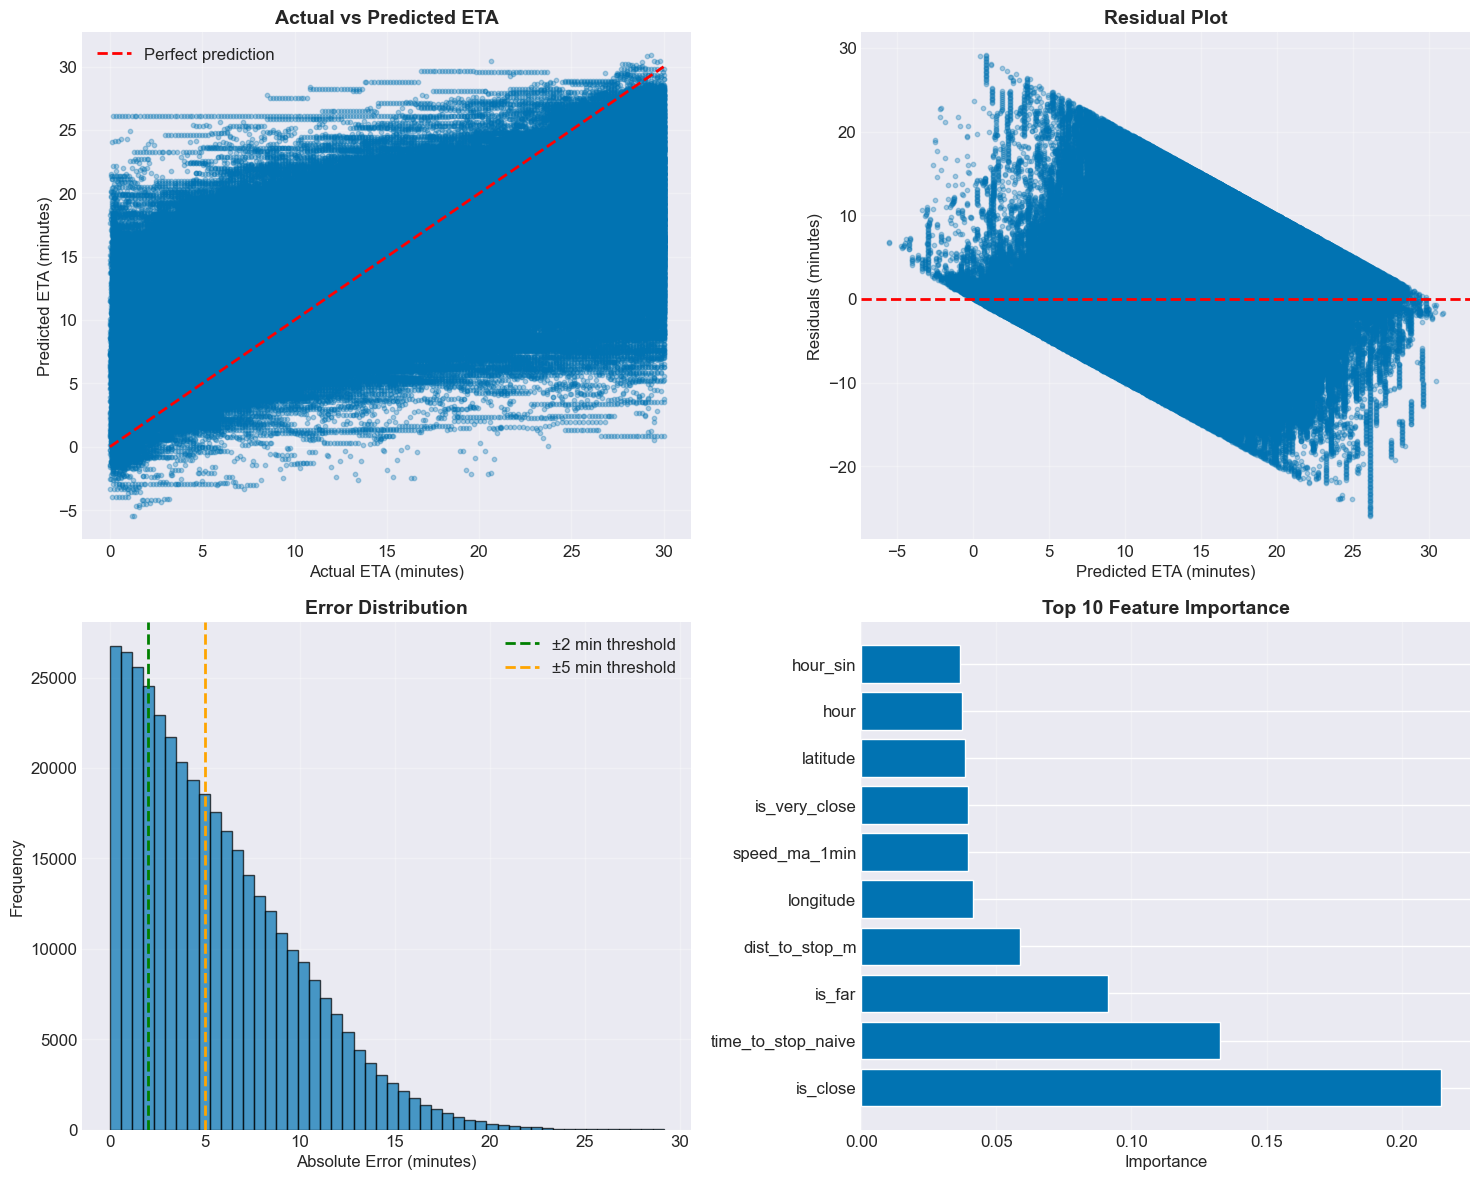


SAVING MODEL

✓ Model saved to: eta_model.pkl

✅ TRAINING COMPLETE!

📊 Model Performance Summary:
  Test MAE:  5.53 minutes
  Test RMSE: 6.95 minutes
  Test R²:   0.3680
  Accuracy ±2 min: 23.8%
  Accuracy ±5 min: 52.8%

📁 Outputs:
  - Model: eta_model.pkl
  - Plots: model_evaluation.png

End time: 2025-12-27 03:33:42


In [534]:
model, metrics, encoders = train_and_evaluate_xgboost(df18)


🚀 BUS ETA PREDICTION - UNIFIED TRAINING PIPELINE
Start time: 2025-12-27 03:55:07

Input dataset: 1,677,634 training examples

BUS ETA PREDICTION - MODEL TRAINING
Start time: 2025-12-27 03:55:07

DATA PREPARATION

Dataset shape: (1677634, 32)
Features: 26
Target: ETA_sec

Train/Test Split (Date-Based):
  Train dates: 14 days (20251103 to 20251117)
  Test dates: 4 days (20251118 to 20251121)
  Train trips: 177 (1,264,534 samples)
  Test trips: 140 (413,100 samples)
  Split ratio: 75.4% / 24.6%

Feature matrix shape:
  X_train: (1264534, 26)
  X_test: (413100, 26)

TRAINING XGBOOST MODEL

Model parameters:
  n_estimators: 500
  max_depth: 8
  learning_rate: 0.05
  subsample: 0.8
  colsample_bytree: 0.8
  min_child_weight: 3
  gamma: 0.1
  reg_alpha: 0.1
  reg_lambda: 1.0
  objective: reg:squarederror
  random_state: 42
  n_jobs: -1
  early_stopping_rounds: 50
  verbosity: 1

Training model...
✓ Training complete!
  Best iteration: 499
  Best score: 404.4969

MODEL EVALUATION

📊 PERFORMAN

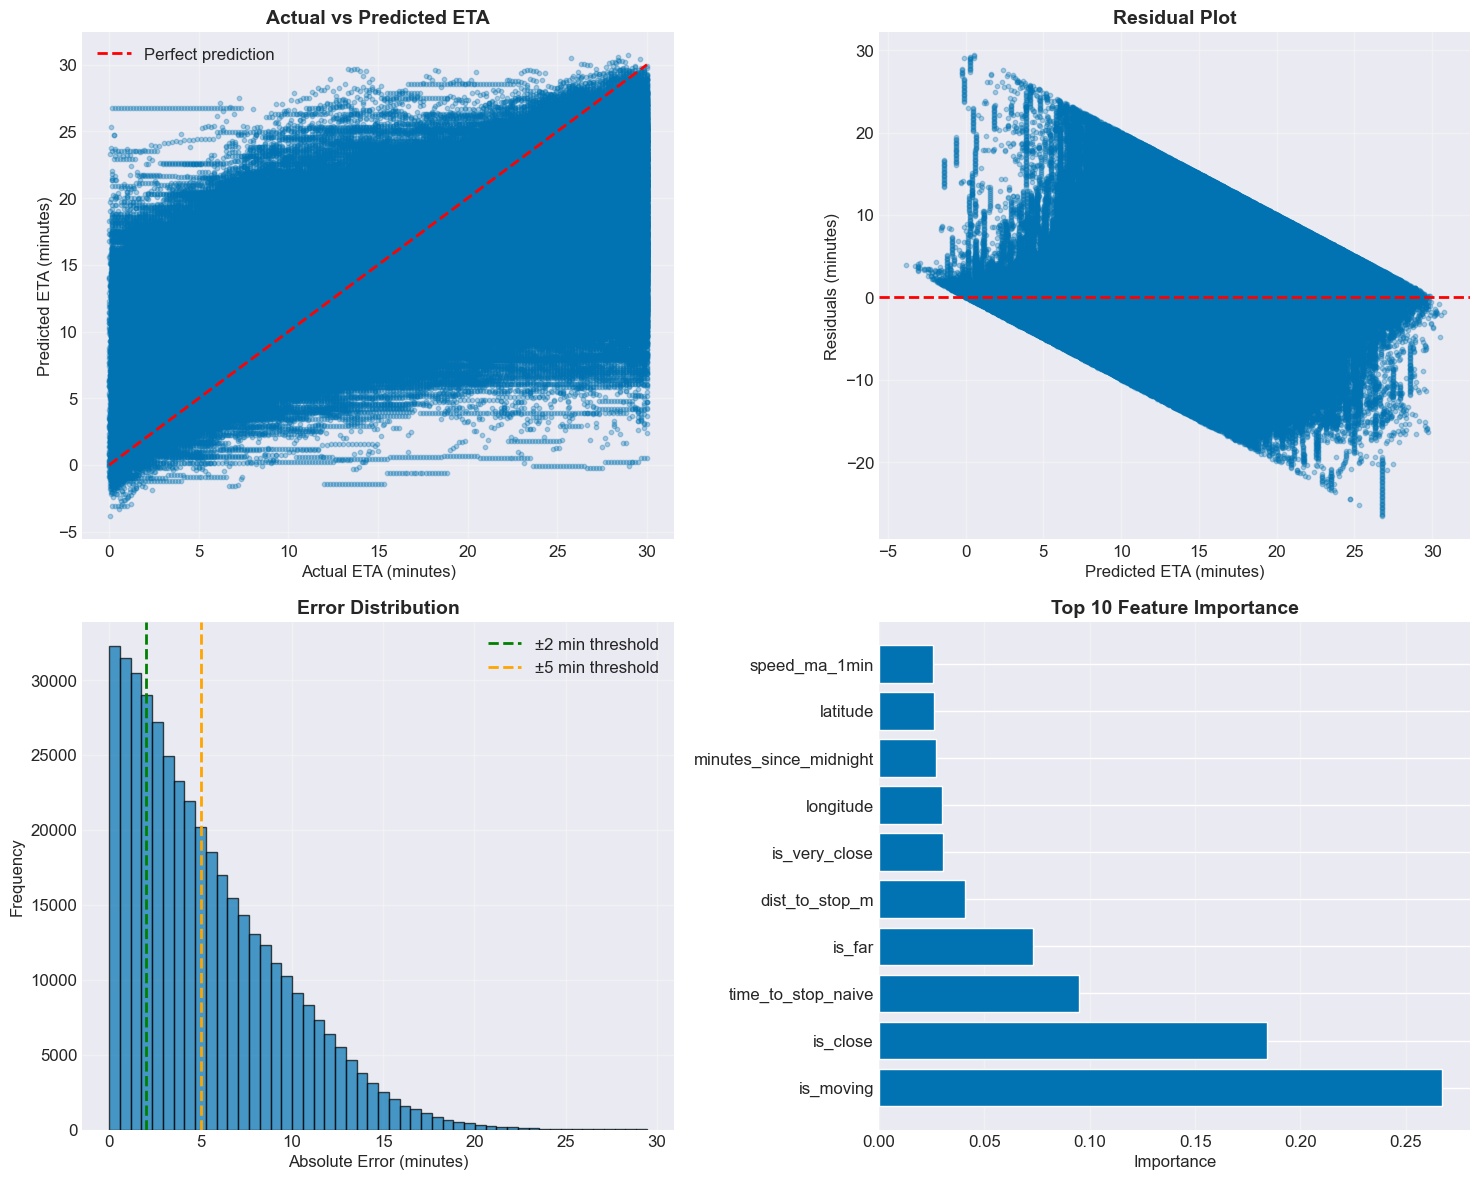


SAVING MODEL

✓ Model saved to: eta_model.pkl

✅ TRAINING COMPLETE!

📊 Model Performance Summary:
  Test MAE:  5.30 minutes
  Test RMSE: 6.74 minutes
  Test R²:   0.4040
  Accuracy ±2 min: 25.6%
  Accuracy ±5 min: 55.8%

📁 Outputs:
  - Model: eta_model.pkl
  - Plots: model_evaluation.png

End time: 2025-12-27 03:55:17


KeyError: 'test_mae'

In [536]:
import test_xgboost
importlib.reload(test_xgboost)
from test_xgboost import train_and_evaluate_xgboost

df = pd.read_csv('training_full_18days_parallel.csv')
model, metrics, encoders = train_and_evaluate_xgboost(df)
print(f"MAE: {metrics['test_mae']:.2f} min")
print(f"Overfitting: {abs(metrics['train_mae'] - metrics['test_mae']) / metrics['test_mae'] * 100:.1f}%")

In [550]:
import train_parallel
import importlib
importlib.reload(train_parallel)
from train_parallel import train_parallel
import multiprocessing as mp

mp.set_start_method('spawn', force=True)
model, metrics, encoders = train_parallel()

🚀 PARALLEL FULL DATASET TRAINING (18 DAYS)
Workers: 12
Dates: 18
Output: training_full_18days_parallel.csv
Start: 10:18:21

📊 Processing 18 days with 12 workers...
💪 M4 Pro Mode: Using 12/14 cores
ℹ️  Press Ctrl+C to stop gracefully


[20251103] Starting...

[20251106] Starting...

[20251113] Starting...

[20251111] Starting...

[20251110] Starting...
[20251107] Starting...


[20251104] Starting...
[20251115] Starting...

[20251109] Starting...

[20251112] Starting...
[20251108] Starting...

[20251114] Starting...


  ⚠ Removed 28 duplicates from IMEI_864454076837016_20251110.csv


Loading 20251108:   1%|          | 1/87 [00:00<00:16,  5.16it/s]

  ⚠ Removed 15 duplicates from IMEI_864454076846363_20251112.csv
  ⚠ Removed 41 duplicates from IMEI_863738070627303_20251114.csv
  ⚠ Removed 17 duplicates from IMEI_866069068704723_20251112.csv


Loading 20251112:   3%|▎         | 3/90 [00:00<00:13,  6.56it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076689318_20251114.csv
  ⚠ Removed 32 duplicates from IMEI_866069068910205_20251108.csv
  ⚠ Removed 86 duplicates from IMEI_864454076983182_20251112.csv


Loading 20251104:   1%|          | 1/86 [00:00<01:05,  1.30it/s]

  ⚠ Removed 27 duplicates from IMEI_866069068697901_20251104.csv


Loading 20251106:   3%|▎         | 3/86 [00:01<00:29,  2.78it/s]

  ⚠ Removed 14 duplicates from IMEI_864454076846413_20251114.csv


Loading 20251106:   5%|▍         | 4/86 [00:01<00:26,  3.07it/s]

  ⚠ Removed 87 duplicates from IMEI_864454076983182_20251106.csv


Loading 20251106:   7%|▋         | 6/86 [00:01<00:17,  4.47it/s]

  ⚠ Removed 14 duplicates from IMEI_866069068697901_20251110.csv
  ⚠ Removed 12 duplicates from IMEI_864454074195425_20251106.csv
  ⚠ Removed 27 duplicates from IMEI_866069068697810_20251109.csv


Loading 20251109:   4%|▎         | 3/81 [00:01<00:50,  1.54it/s]

  ⚠ Removed 16 duplicates from IMEI_866069068697935_20251109.csv


Loading 20251103:   3%|▎         | 3/86 [00:02<00:51,  1.60it/s]

  ⚠ Removed 18 duplicates from IMEI_864454070660463_20251112.csv
  ⚠ Removed 12 duplicates from IMEI_863738070812137_20251115.csv
  ⚠ Removed 21 duplicates from IMEI_866069068703907_20251106.csv
  ⚠ Removed 33 duplicates from IMEI_866069068910213_20251115.csv


Loading 20251107:   3%|▎         | 3/88 [00:02<01:25,  1.01s/it]

  ⚠ Removed 65 duplicates from IMEI_866069068703907_20251107.csv
  ⚠ Removed 12 duplicates from IMEI_863738070810966_20251115.csv
  ⚠ Removed 17 duplicates from IMEI_866069068703907_20251113.csv
  ⚠ Removed 43 duplicates from IMEI_864454074240254_20251111.csv
  ⚠ Removed 44 duplicates from IMEI_863738070627303_20251115.csv
  ⚠ Removed 16 duplicates from IMEI_864454076992191_20251104.csv
  ⚠ Removed 14 duplicates from IMEI_864454074195425_20251113.csv


Loading 20251106:   9%|▉         | 8/86 [00:02<00:27,  2.79it/s]

  ⚠ Removed 177 duplicates from IMEI_864454076983182_20251113.csv
  ⚠ Removed 34 duplicates from IMEI_864454074240254_20251110.csv


Loading 20251109:   6%|▌         | 5/81 [00:03<00:59,  1.28it/s]]

  ⚠ Removed 13 duplicates from IMEI_864454076977861_20251114.csv
  ⚠ Removed 37 duplicates from IMEI_866069068703907_20251104.csv
  ⚠ Removed 21 duplicates from IMEI_866069068703907_20251112.csv


Loading 20251113:   8%|▊         | 7/91 [00:04<00:46,  1.81it/s]

  ⚠ Removed 46 duplicates from IMEI_864454070660463_20251113.csv
  ⚠ Removed 25 duplicates from IMEI_866069068697901_20251111.csv
  ⚠ Removed 14 duplicates from IMEI_866069068704723_20251113.csv


Loading 20251103:   6%|▌         | 5/86 [00:04<01:04,  1.25it/s]]

  ⚠ Removed 21 duplicates from IMEI_864454074240254_20251106.csv
  ⚠ Removed 16 duplicates from IMEI_864454074195425_20251104.csv
  ⚠ Removed 85 duplicates from IMEI_866069068697901_20251106.csv
  ⚠ Removed 37 duplicates from IMEI_864454074195425_20251107.csv


Loading 20251107:   8%|▊         | 7/88 [00:04<00:42,  1.90it/s]]

  ⚠ Removed 81 duplicates from IMEI_864454076983182_20251107.csv
  ⚠ Removed 13 duplicates from IMEI_866069068704723_20251107.csv


Loading 20251115:  10%|█         | 9/87 [00:05<00:47,  1.65it/s]]

  ⚠ Removed 87 duplicates from IMEI_864454070922137_20251115.csv
  ⚠ Removed 15 duplicates from IMEI_863738070810867_20251114.csv
  ⚠ Removed 11 duplicates from IMEI_864454076846363_20251113.csv


Loading 20251113:  11%|█         | 10/91 [00:05<00:39,  2.03it/s]

  ⚠ Removed 11 duplicates from IMEI_864454070922137_20251104.csv
  ⚠ Removed 42 duplicates from IMEI_864454070922137_20251114.csv
  ⚠ Removed 13 duplicates from IMEI_864454076846363_20251111.csv


Loading 20251111:   8%|▊         | 7/88 [00:05<00:57,  1.41it/s]]

  ⚠ Removed 12 duplicates from IMEI_863738070627303_20251106.csv
  ⚠ Removed 50 duplicates from IMEI_864454076663446_20251108.csv


Loading 20251108:   8%|▊         | 7/87 [00:06<01:18,  1.02it/s]]

  ⚠ Removed 258 duplicates from IMEI_864454076983182_20251111.csv
  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251108.csv
  ⚠ Removed 12 duplicates from IMEI_863738070811410_20251103.csv
  ⚠ Removed 22 duplicates from IMEI_864454074195425_20251111.csv


Loading 20251111:  14%|█▎        | 12/88 [00:06<00:18,  4.10it/s]

  ⚠ Removed 21 duplicates from IMEI_864454070922137_20251103.csv
  ⚠ Removed 11 duplicates from IMEI_866069068704723_20251114.csv


Loading 20251107:  10%|█         | 9/88 [00:06<00:56,  1.39it/s]]

  ⚠ Removed 30 duplicates from IMEI_864454076983182_20251114.csv
  ⚠ Removed 25 duplicates from IMEI_866069068703907_20251110.csv
  ⚠ Removed 44 duplicates from IMEI_864454074240254_20251112.csv


Loading 20251106:  23%|██▎       | 20/86 [00:06<00:25,  2.55it/s]

  ⚠ Removed 24 duplicates from IMEI_866069068910213_20251106.csv
  ⚠ Removed 17 duplicates from IMEI_864454074195425_20251110.csv
  ⚠ Removed 40 duplicates from IMEI_864454070660463_20251114.csv
  ⚠ Removed 13 duplicates from IMEI_864454070660463_20251110.csv


Loading 20251110:  12%|█▏        | 11/89 [00:07<00:33,  2.30it/s]

  ⚠ Removed 46 duplicates from IMEI_866069068697901_20251113.csv
  ⚠ Removed 31 duplicates from IMEI_866069068910205_20251109.csv
  ⚠ Removed 42 duplicates from IMEI_864454074240254_20251113.csv


Loading 20251106:  26%|██▌       | 22/86 [00:07<00:23,  2.71it/s]

  ⚠ Removed 33 duplicates from IMEI_863738070627303_20251103.csv
  ⚠ Removed 14 duplicates from IMEI_866069068703907_20251114.csv
  ⚠ Removed 20 duplicates from IMEI_866069068703907_20251111.csv


Loading 20251108:   9%|▉         | 8/87 [00:07<01:32,  1.18s/it]]

  ⚠ Removed 38 duplicates from IMEI_866069068697810_20251108.csv
  ⚠ Removed 11 duplicates from IMEI_864454076846363_20251107.csv


Loading 20251108:  10%|█         | 9/87 [00:07<01:06,  1.17it/s]]

  ⚠ Removed 14 duplicates from IMEI_864454076837016_20251107.csv


Loading 20251113:  18%|█▊        | 16/91 [00:08<00:26,  2.78it/s]

  ⚠ Removed 22 duplicates from IMEI_866069068697901_20251112.csv
  ⚠ Removed 15 duplicates from IMEI_864454076846413_20251103.csv
  ⚠ Removed 42 duplicates from IMEI_864454074240254_20251114.csv


Loading 20251112:  17%|█▋        | 15/90 [00:08<00:49,  1.53it/s]

  ⚠ Removed 21 duplicates from IMEI_866069068910213_20251103.csv
  ⚠ Removed 43 duplicates from IMEI_866069068697901_20251114.csv
  ⚠ Removed 35 duplicates from IMEI_866069068698057_20251109.csv
  ⚠ Removed 22 duplicates from IMEI_864454076837016_20251114.csv
  ⚠ Removed 70 duplicates from IMEI_864454076983182_20251110.csv


Loading 20251106:  29%|██▉       | 25/86 [00:08<00:27,  2.24it/s]

  ⚠ Removed 23 duplicates from IMEI_864454076846470_20251104.csv
  ⚠ Removed 20 duplicates from IMEI_864454074240254_20251107.csv


Loading 20251107:  18%|█▊        | 16/88 [00:09<00:23,  3.12it/s]

  ⚠ Removed 24 duplicates from IMEI_866069068910213_20251107.csv
  ⚠ Removed 43 duplicates from IMEI_863738070627303_20251112.csv
  ⚠ Removed 12 duplicates from IMEI_863738070810966_20251112.csv


Loading 20251106:  30%|███       | 26/86 [00:09<00:30,  1.97it/s]

  ⚠ Removed 37 duplicates from IMEI_864454076689318_20251112.csv


Loading 20251114:  38%|███▊      | 34/89 [00:09<00:18,  3.05it/s]

  ⚠ Removed 11 duplicates from IMEI_866069068910213_20251104.csv
  ⚠ Removed 22 duplicates from IMEI_866069068697919_20251114.csv
  ⚠ Removed 24 duplicates from IMEI_864454076977861_20251115.csv


Loading 20251107:  19%|█▉        | 17/88 [00:10<00:39,  1.80it/s]

  ⚠ Removed 56 duplicates from IMEI_864454076846470_20251115.csv
  ⚠ Removed 15 duplicates from IMEI_864454076846413_20251113.csv
  ⚠ Removed 24 duplicates from IMEI_863738070627303_20251113.csv


Loading 20251109:  22%|██▏       | 18/81 [00:10<00:22,  2.75it/s]

  ⚠ Removed 18 duplicates from IMEI_864454076961824_20251109.csv
  ⚠ Removed 16 duplicates from IMEI_864454074309208_20251108.csv
  ⚠ Removed 24 duplicates from IMEI_864454074234281_20251109.csv


Loading 20251106:  37%|███▋      | 32/86 [00:11<00:21,  2.56it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076977861_20251111.csv


Loading 20251109:  23%|██▎       | 19/81 [00:11<00:26,  2.30it/s]

  ⚠ Removed 11 duplicates from IMEI_864454076846413_20251104.csv
  ⚠ Removed 26 duplicates from IMEI_863738070627303_20251104.csv


Loading 20251107:  20%|██        | 18/88 [00:11<00:56,  1.24it/s]

  ⚠ Removed 20 duplicates from IMEI_864454076821747_20251109.csv
  ⚠ Removed 17 duplicates from IMEI_863738070458055_20251103.csv
  ⚠ Removed 31 duplicates from IMEI_864454076846413_20251107.csv
  ⚠ Removed 15 duplicates from IMEI_864454070936426_20251114.csv


Loading 20251108:  16%|█▌        | 14/87 [00:12<01:00,  1.21it/s]

  ⚠ Removed 40 duplicates from IMEI_864454074240254_20251103.csv
  ⚠ Removed 37 duplicates from IMEI_866069068698057_20251108.csv
  ⚠ Removed 14 duplicates from IMEI_864454070814060_20251106.csv


Loading 20251106:  42%|████▏     | 36/86 [00:12<00:12,  4.07it/s]

  ⚠ Removed 18 duplicates from IMEI_864454070799683_20251106.csv
  ⚠ Removed 41 duplicates from IMEI_864454076961824_20251108.csv
  ⚠ Removed 16 duplicates from IMEI_863738070450771_20251115.csv
  ⚠ Removed 30 duplicates from IMEI_864454074309315_20251106.csv
  ⚠ Removed 11 duplicates from IMEI_864454070738160_20251108.csv


Loading 20251115:  21%|██        | 18/87 [00:12<00:49,  1.40it/s]

  ⚠ Removed 17 duplicates from IMEI_864454070922137_20251110.csv
  ⚠ Removed 13 duplicates from IMEI_864454078004284_20251106.csv
  ⚠ Removed 25 duplicates from IMEI_864454070922137_20251113.csv


Loading 20251107:  25%|██▌       | 22/88 [00:13<00:33,  2.00it/s]

  ⚠ Removed 20 duplicates from IMEI_864454070814060_20251114.csv
  ⚠ Removed 12 duplicates from IMEI_864454076837016_20251103.csv


Loading 20251106:  47%|████▋     | 40/86 [00:13<00:11,  4.08it/s]

  ⚠ Removed 25 duplicates from IMEI_864454074309315_20251104.csv


Loading 20251112:  29%|██▉       | 26/90 [00:13<00:32,  1.97it/s]

  ⚠ Removed 11 duplicates from IMEI_864454077980401_20251114.csv
  ⚠ Removed 30 duplicates from IMEI_864454070799683_20251114.csv
  ⚠ Removed 60 duplicates from IMEI_864454078004284_20251114.csv


Loading 20251114:  56%|█████▌    | 50/89 [00:14<00:07,  5.24it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076782642_20251106.csv
  ⚠ Removed 19 duplicates from IMEI_864454076962509_20251114.csv


Loading 20251106:  52%|█████▏    | 45/86 [00:14<00:11,  3.45it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076821747_20251108.csv
  ⚠ Removed 14 duplicates from IMEI_864454070936426_20251104.csv
  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251107.csv
  ⚠ Removed 19 duplicates from IMEI_864454070738160_20251109.csv


Loading 20251109:  32%|███▏      | 26/81 [00:15<00:21,  2.61it/s]

  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251111.csv
  ⚠ Removed 18 duplicates from IMEI_864454074276084_20251109.csv


Loading 20251109:  33%|███▎      | 27/81 [00:15<00:18,  3.00it/s]

  ⚠ Removed 16 duplicates from IMEI_864454076977861_20251112.csv
  ⚠ Removed 13 duplicates from IMEI_864454076689516_20251114.csv


Loading 20251111:  28%|██▊       | 25/88 [00:15<00:33,  1.89it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068703907_20251115.csv
  ⚠ Removed 14 duplicates from IMEI_864454076962509_20251108.csv


Loading 20251103:  31%|███▏      | 27/86 [00:15<00:24,  2.39it/s]

  ⚠ Removed 57 duplicates from IMEI_864454076983182_20251103.csv
  ⚠ Removed 37 duplicates from IMEI_864454074195425_20251115.csv
  ⚠ Removed 34 duplicates from IMEI_864454074276084_20251108.csv
  ⚠ Removed 25 duplicates from IMEI_864454074195425_20251103.csv
  ⚠ Removed 17 duplicates from IMEI_864454076983182_20251115.csv


Loading 20251111:  31%|███       | 27/88 [00:16<00:27,  2.22it/s]

  ⚠ Removed 23 duplicates from IMEI_863738070627303_20251111.csv


Loading 20251106:  58%|█████▊    | 50/86 [00:16<00:12,  2.84it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068703907_20251103.csv


Loading 20251113:  32%|███▏      | 29/91 [00:17<00:59,  1.05it/s]

  ⚠ Removed 27 duplicates from IMEI_864454076977861_20251113.csv


Loading 20251104:  56%|█████▌    | 48/86 [00:17<00:14,  2.59it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076782642_20251103.csv
  ⚠ Removed 29 duplicates from IMEI_864454076846413_20251111.csv
  ⚠ Removed 17 duplicates from IMEI_866069069062493_20251106.csv


Loading 20251115:  29%|██▊       | 25/87 [00:17<00:35,  1.73it/s]

  ⚠ Removed 21 duplicates from IMEI_866069069062493_20251114.csv
  ⚠ Removed 33 duplicates from IMEI_866069068704723_20251115.csv


Loading 20251106:  66%|██████▋   | 57/86 [00:18<00:05,  5.58it/s]

  ⚠ Removed 22 duplicates from IMEI_864454076983174_20251106.csv


Loading 20251103:  37%|███▋      | 32/86 [00:18<00:25,  2.13it/s]

  ⚠ Removed 20 duplicates from IMEI_864454076977861_20251110.csv
  ⚠ Removed 13 duplicates from IMEI_866069068697810_20251114.csv
  ⚠ Removed 25 duplicates from IMEI_866069068697935_20251114.csv


Loading 20251112:  32%|███▏      | 29/90 [00:18<01:11,  1.17s/it]

  ⚠ Removed 33 duplicates from IMEI_864454076663446_20251114.csv
  ⚠ Removed 15 duplicates from IMEI_864454076689516_20251108.csv
  ⚠ Removed 22 duplicates from IMEI_864454076689516_20251106.csv


Loading 20251109:  38%|███▊      | 31/81 [00:19<00:48,  1.04it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076983174_20251108.csv


Loading 20251104:  62%|██████▏   | 53/86 [00:19<00:13,  2.44it/s]

  ⚠ Removed 23 duplicates from IMEI_866069068703915_20251115.csv
  ⚠ Removed 17 duplicates from IMEI_863738070803409_20251114.csv
  ⚠ Removed 22 duplicates from IMEI_864454076961824_20251106.csv
  ⚠ Removed 26 duplicates from IMEI_866069068910205_20251114.csv
  ⚠ Removed 28 duplicates from IMEI_864454074309315_20251111.csv


Loading 20251111:  38%|███▊      | 33/88 [00:19<00:36,  1.52it/s]

  ⚠ Removed 24 duplicates from IMEI_864454070799683_20251113.csv
  ⚠ Removed 24 duplicates from IMEI_864454070922137_20251112.csv
  ⚠ Removed 18 duplicates from IMEI_864454077980401_20251113.csv


Loading 20251104:  64%|██████▍   | 55/86 [00:20<00:11,  2.66it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068698057_20251114.csv
  ⚠ Removed 20 duplicates from IMEI_864454074309208_20251114.csv


Loading 20251106:  73%|███████▎  | 63/86 [00:20<00:06,  3.34it/s]

  ⚠ Removed 11 duplicates from IMEI_863738070450771_20251110.csv


Loading 20251114:  87%|████████▋ | 77/89 [00:20<00:01,  6.14it/s]

  ⚠ Removed 24 duplicates from IMEI_864454076846363_20251115.csv
  ⚠ Removed 14 duplicates from IMEI_864454074310594_20251114.csv
  ⚠ Removed 16 duplicates from IMEI_864454076837016_20251115.csv
  ⚠ Removed 42 duplicates from IMEI_864454076961824_20251114.csv


Loading 20251109:  42%|████▏     | 34/81 [00:20<00:35,  1.32it/s]

  ⚠ Removed 25 duplicates from IMEI_864454078004284_20251111.csv
  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251107.csv


Loading 20251114:  93%|█████████▎| 83/89 [00:21<00:00,  7.62it/s]

  ⚠ Removed 21 duplicates from IMEI_864454070814060_20251113.csv
  ⚠ Removed 17 duplicates from IMEI_864454070936426_20251112.csv
  ⚠ Removed 38 duplicates from IMEI_864454076821747_20251114.csv


Loading 20251110:  34%|███▎      | 30/89 [00:22<00:19,  3.02it/s]

  ⚠ Removed 30 duplicates from IMEI_863738070627303_20251110.csv
  ⚠ Removed 17 duplicates from IMEI_866069068697919_20251103.csv
  ⚠ Removed 16 duplicates from IMEI_864454070814060_20251107.csv


Loading 20251106:  83%|████████▎ | 71/86 [00:22<00:03,  4.65it/s]

  ⚠ Removed 19 duplicates from IMEI_864454076983174_20251104.csv


Loading 20251111:  41%|████      | 36/88 [00:22<00:45,  1.15it/s]

  ⚠ Removed 15 duplicates from IMEI_864454070738160_20251104.csv
  ⚠ Removed 11 duplicates from IMEI_864454074309331_20251111.csv


Loading 20251113:  44%|████▍     | 40/91 [00:23<00:29,  1.72it/s]

  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251113.csv
  ⚠ Removed 17 duplicates from IMEI_866069069062493_20251109.csv


Loading 20251104:  77%|███████▋  | 66/86 [00:23<00:04,  4.02it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251106.csv
  ⚠ Removed 15 duplicates from IMEI_864454076821747_20251104.csv


Loading 20251104:  80%|████████  | 69/86 [00:23<00:02,  6.10it/s]

  ⚠ Removed 17 duplicates from IMEI_864454070814060_20251112.csv
  ⚠ Removed 36 duplicates from IMEI_864454076663446_20251106.csv


Loading 20251112:  42%|████▏     | 38/90 [00:23<00:30,  1.68it/s]

  ⚠ Removed 104 duplicates from IMEI_864454074240254_20251115.csv
  ⚠ Removed 19 duplicates from IMEI_864454070814060_20251111.csv


Loading 20251104:  83%|████████▎ | 71/86 [00:24<00:03,  4.69it/s]

  ⚠ Removed 25 duplicates from IMEI_864454078004284_20251103.csv
  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251111.csv
  ⚠ Removed 12 duplicates from IMEI_864454076961824_20251104.csv
  ⚠ Removed 27 duplicates from IMEI_864454074309315_20251103.csv


Loading 20251115:  36%|███▌      | 31/87 [00:24<00:51,  1.09it/s]

  ⚠ Removed 18 duplicates from IMEI_864454078004284_20251113.csv
  ⚠ Removed 24 duplicates from IMEI_864454074309315_20251113.csv


Loading 20251104:  85%|████████▍ | 73/86 [00:25<00:03,  3.56it/s]

  ⚠ Removed 16 duplicates from IMEI_864454077980401_20251112.csv
  ⚠ Removed 19 duplicates from IMEI_864454070799683_20251112.csv


Loading 20251112:  44%|████▍     | 40/90 [00:25<00:30,  1.67it/s]

  ⚠ Removed 27 duplicates from IMEI_864454078004284_20251110.csv
  ⚠ Removed 40 duplicates from IMEI_864454070936426_20251103.csv


Loading 20251106:  93%|█████████▎| 80/86 [00:25<00:02,  2.55it/s]

  ⚠ Removed 17 duplicates from IMEI_866069068697919_20251109.csv


Loading 20251106:  95%|█████████▌| 82/86 [00:26<00:01,  3.07it/s]

  ⚠ Removed 17 duplicates from IMEI_866069068698057_20251104.csv
  ⚠ Removed 21 duplicates from IMEI_866069068698057_20251106.csv
  ⚠ Removed 14 duplicates from IMEI_864454074309208_20251106.csv


Loading 20251112:  46%|████▌     | 41/90 [00:26<00:42,  1.14it/s]

  ⚠ Removed 19 duplicates from IMEI_866069068697919_20251115.csv


Loading 20251103:  48%|████▊     | 41/86 [00:26<00:32,  1.37it/s]

  ⚠ Removed 13 duplicates from IMEI_864454070936426_20251107.csv
  ⚠ Removed 22 duplicates from IMEI_864454074309315_20251110.csv
  ⚠ Removed 37 duplicates from IMEI_864454078004284_20251107.csv


Loading 20251107:  47%|████▋     | 41/88 [00:27<00:26,  1.75it/s]

  ⚠ Removed 19 duplicates from IMEI_864454074309315_20251107.csv
  ⚠ Removed 18 duplicates from IMEI_866069068697919_20251113.csv


Loading 20251111:  51%|█████     | 45/88 [00:27<00:28,  1.53it/s]

  ⚠ Removed 16 duplicates from IMEI_866069068697919_20251111.csv


Loading 20251109:  53%|█████▎    | 43/81 [00:28<00:34,  1.10it/s]

  ⚠ Removed 16 duplicates from IMEI_866069068910205_20251104.csv
  ⚠ Removed 19 duplicates from IMEI_864454078004284_20251112.csv


Loading 20251110:  39%|███▉      | 35/89 [00:28<01:02,  1.15s/it]

✓ Loaded 89 buses for 20251114
  Total records: 3,656,302
  ⚠ Removed 16 duplicates from IMEI_864454070799683_20251110.csv
  Unique IMEI: 90


Loading 20251112:  49%|████▉     | 44/90 [00:29<00:33,  1.39it/s]

  ⚠ Removed 23 duplicates from IMEI_864454070814060_20251103.csv


Loading 20251107:  49%|████▉     | 43/88 [00:29<00:31,  1.42it/s]

  ⚠ Removed 29 duplicates from IMEI_866069068697919_20251107.csv


Loading 20251107:  51%|█████     | 45/88 [00:29<00:18,  2.35it/s]

  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251109.csv
✓ Loaded 86 buses for 20251106
  Total records: 2,033,300
  Unique IMEI: 86


Loading 20251107:  52%|█████▏    | 46/88 [00:29<00:19,  2.14it/s]

  ⚠ Removed 25 duplicates from IMEI_864454070814060_20251110.csv
  ⚠ Removed 18 duplicates from IMEI_866069068697919_20251112.csv


Loading 20251103:  52%|█████▏    | 45/86 [00:30<00:31,  1.30it/s]

  ⚠ Removed 26 duplicates from IMEI_864454077980401_20251103.csv
  Memory usage: 685.43 MB
[20251106] Loaded 2,033,300 records

STEP 1: DATA CLEANING
  ⚠ Removed 21 duplicates from IMEI_864454076663446_20251104.csv
  ⚠ Removed 25 duplicates from IMEI_864454070799683_20251103.csv


Loading 20251113:  52%|█████▏    | 47/91 [00:30<00:54,  1.24s/it]

✓ Removed 1,611,254 out-of-bounds points
✓ Remaining: 422,046 GPS records

STEP 2: TRIP DETECTION


Loading 20251108:  53%|█████▎    | 46/87 [00:30<00:36,  1.11it/s]

  ⚠ Removed 24 duplicates from IMEI_864454076782642_20251108.csv


Loading 20251109:  58%|█████▊    | 47/81 [00:31<00:28,  1.19it/s]

  Memory usage: 2156.78 MB


Loading 20251111:  59%|█████▉    | 52/88 [00:31<00:14,  2.51it/s]

[20251114] Loaded 3,656,302 records

STEP 1: DATA CLEANING
  ⚠ Removed 20 duplicates from IMEI_864454076983174_20251103.csv


Loading 20251107:  55%|█████▍    | 48/88 [00:31<00:25,  1.58it/s]

  ⚠ Removed 29 duplicates from IMEI_864454076782642_20251107.csv
  ⚠ Removed 19 duplicates from IMEI_864454076782642_20251113.csv


Loading 20251113:  55%|█████▍    | 50/91 [00:32<00:29,  1.39it/s]

✓ Loaded 86 buses for 20251104
  Total records: 1,888,627
  Unique IMEI: 86
  ⚠ Removed 14 duplicates from IMEI_864454070814060_20251108.csv


Loading 20251111:  62%|██████▎   | 55/88 [00:32<00:14,  2.33it/s]

  Memory usage: 636.85 MB
[20251104] Loaded 1,888,627 records

STEP 1: DATA CLEANING
  ⚠ Removed 11 duplicates from IMEI_864454070799683_20251115.csv


Loading 20251103:  56%|█████▌    | 48/86 [00:33<00:37,  1.01it/s]

✓ Removed 1,383,084 out-of-bounds points
✓ Remaining: 505,543 GPS records

STEP 2: TRIP DETECTION
  ⚠ Removed 23 duplicates from IMEI_864454077980401_20251115.csv


Loading 20251115:  48%|████▊     | 42/87 [00:33<00:14,  3.19it/s]

  ⚠ Removed 11 duplicates from IMEI_864454076689516_20251103.csv
  ⚠ Removed 20 duplicates from IMEI_864454070814060_20251115.csv
  ⚠ Removed 13 duplicates from IMEI_866069069062493_20251113.csv


Loading 20251107:  60%|██████    | 53/88 [00:34<00:12,  2.73it/s]

  ⚠ Removed 40 duplicates from IMEI_864454070936426_20251110.csv


Loading 20251112:  56%|█████▌    | 50/90 [00:34<00:30,  1.32it/s]

  ⚠ Removed 14 duplicates from IMEI_864454070799683_20251109.csv
  ⚠ Removed 21 duplicates from IMEI_864454074309315_20251109.csv


Loading 20251115:  49%|████▉     | 43/87 [00:35<00:30,  1.42it/s]

  ⚠ Removed 12 duplicates from IMEI_866069068704087_20251103.csv
  ⚠ Removed 44 duplicates from IMEI_864454078004284_20251109.csv


Loading 20251115:  52%|█████▏    | 45/87 [00:35<00:18,  2.33it/s]

  ⚠ Removed 18 duplicates from IMEI_864454074309331_20251115.csv


Loading 20251109:  67%|██████▋   | 54/81 [00:35<00:15,  1.74it/s]

  ⚠ Removed 22 duplicates from IMEI_864454070936426_20251108.csv


Loading 20251110:  49%|████▉     | 44/89 [00:36<00:45,  1.01s/it]

  ⚠ Removed 20 duplicates from IMEI_864454076962509_20251113.csv
  ⚠ Removed 13 duplicates from IMEI_864454076782642_20251110.csv
  ⚠ Removed 20 duplicates from IMEI_864454074276084_20251113.csv
  ⚠ Removed 46 duplicates from IMEI_864454074276084_20251111.csv


Loading 20251107:  65%|██████▍   | 57/88 [00:36<00:17,  1.78it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076962509_20251111.csv
  ⚠ Removed 18 duplicates from IMEI_864454076962509_20251107.csv


Loading 20251115:  53%|█████▎    | 46/87 [00:36<00:30,  1.37it/s]

  ⚠ Removed 33 duplicates from IMEI_864454070936426_20251115.csv
  ⚠ Removed 23 duplicates from IMEI_864454076689318_20251109.csv


Loading 20251107:  67%|██████▋   | 59/88 [00:37<00:12,  2.37it/s]

  ⚠ Removed 14 duplicates from IMEI_864454074276084_20251107.csv
  ⚠ Removed 15 duplicates from IMEI_866069069062493_20251103.csv
  ⚠ Removed 12 duplicates from IMEI_864454078004284_20251108.csv
  ⚠ Removed 16 duplicates from IMEI_864454074309315_20251108.csv


Loading 20251113:  69%|██████▉   | 63/91 [00:38<00:15,  1.86it/s]

  ⚠ Removed 23 duplicates from IMEI_864454076821747_20251111.csv


Loading 20251112:  60%|██████    | 54/90 [00:38<00:29,  1.24it/s]

  ⚠ Removed 20 duplicates from IMEI_866069068697919_20251110.csv
  ⚠ Removed 39 duplicates from IMEI_864454074309315_20251115.csv


Loading 20251108:  67%|██████▋   | 58/87 [00:38<00:26,  1.09it/s]

  ⚠ Removed 16 duplicates from IMEI_866069068910213_20251108.csv
  ⚠ Removed 14 duplicates from IMEI_863738070456042_20251103.csv
  ⚠ Removed 17 duplicates from IMEI_864454074234281_20251113.csv


Loading 20251107:  69%|██████▉   | 61/88 [00:39<00:16,  1.62it/s]

  ⚠ Removed 28 duplicates from IMEI_864454076961824_20251113.csv
  ⚠ Removed 11 duplicates from IMEI_864454076689516_20251107.csv


Loading 20251109:  75%|███████▌  | 61/81 [00:39<00:15,  1.27it/s]

  ⚠ Removed 11 duplicates from IMEI_866069069062493_20251112.csv
  ⚠ Removed 12 duplicates from IMEI_863738070450771_20251109.csv
  ⚠ Removed 34 duplicates from IMEI_864454076846413_20251108.csv
  ⚠ Removed 17 duplicates from IMEI_864454074276084_20251112.csv
  ⚠ Removed 12 duplicates from IMEI_864454076846470_20251109.csv


Loading 20251115:  55%|█████▌    | 48/87 [00:40<00:46,  1.20s/it]

  ⚠ Removed 15 duplicates from IMEI_864454076977861_20251109.csv
  ⚠ Removed 55 duplicates from IMEI_864454078004284_20251115.csv
  ⚠ Removed 25 duplicates from IMEI_864454070738160_20251113.csv
  ⚠ Removed 31 duplicates from IMEI_864454076983174_20251107.csv


Loading 20251115:  56%|█████▋    | 49/87 [00:40<00:33,  1.12it/s]

  ⚠ Removed 60 duplicates from IMEI_864454074276084_20251115.csv
  ⚠ Removed 40 duplicates from IMEI_864454076962509_20251115.csv
  ⚠ Removed 51 duplicates from IMEI_864454076961824_20251107.csv
  ⚠ Removed 12 duplicates from IMEI_866069068698057_20251103.csv


Loading 20251103:  73%|███████▎  | 63/86 [00:40<00:12,  1.85it/s]

  ⚠ Removed 19 duplicates from IMEI_864454074309208_20251103.csv


Loading 20251103:  76%|███████▌  | 65/86 [00:41<00:07,  2.71it/s]

  ⚠ Removed 16 duplicates from IMEI_864454076689318_20251108.csv
  ⚠ Removed 32 duplicates from IMEI_863738070627303_20251108.csv


Loading 20251107:  76%|███████▌  | 67/88 [00:41<00:08,  2.38it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076689516_20251112.csv


Loading 20251107:  77%|███████▋  | 68/88 [00:42<00:12,  1.57it/s]

  ⚠ Removed 19 duplicates from IMEI_864454076689516_20251115.csv
  ⚠ Removed 16 duplicates from IMEI_864454076961824_20251111.csv


Loading 20251112:  72%|███████▏  | 65/90 [00:43<00:14,  1.77it/s]

  ⚠ Removed 24 duplicates from IMEI_864454076961824_20251112.csv
  ⚠ Removed 26 duplicates from IMEI_864454070922137_20251108.csv


Loading 20251112:  76%|███████▌  | 68/90 [00:44<00:08,  2.48it/s]

  ⚠ Removed 32 duplicates from IMEI_864454070922137_20251109.csv
  ⚠ Removed 11 duplicates from IMEI_864454076821747_20251112.csv


Loading 20251107:  78%|███████▊  | 69/88 [00:44<00:16,  1.14it/s]

  ⚠ Removed 37 duplicates from IMEI_866069068697810_20251103.csv
  ⚠ Removed 13 duplicates from IMEI_863738070534061_20251107.csv


Loading 20251103:  83%|████████▎ | 71/86 [00:44<00:07,  2.12it/s]

  ⚠ Removed 17 duplicates from IMEI_864454076663446_20251103.csv


Loading 20251111:  85%|████████▌ | 75/88 [00:45<00:09,  1.33it/s]

  ⚠ Removed 12 duplicates from IMEI_866069068698057_20251111.csv
  ⚠ Removed 21 duplicates from IMEI_864454076846363_20251109.csv


Loading 20251113:  86%|████████▌ | 78/91 [00:45<00:06,  2.03it/s]

  ⚠ Removed 14 duplicates from IMEI_863738070534061_20251112.csv


Loading 20251109:  90%|█████████ | 73/81 [00:46<00:03,  2.10it/s]

  ⚠ Removed 70 duplicates from IMEI_864454076983182_20251109.csv
  ⚠ Removed 12 duplicates from IMEI_864454074195425_20251109.csv


Loading 20251113:  87%|████████▋ | 79/91 [00:47<00:08,  1.43it/s]

  ⚠ Removed 19 duplicates from IMEI_866069068910205_20251113.csv


Loading 20251112:  80%|████████  | 72/90 [00:47<00:12,  1.45it/s]

  ⚠ Removed 15 duplicates from IMEI_863738070627741_20251115.csv


Loading 20251107:  86%|████████▋ | 76/88 [00:47<00:08,  1.40it/s]

  ⚠ Removed 13 duplicates from IMEI_866069068910205_20251107.csv


Loading 20251103:  86%|████████▌ | 74/86 [00:48<00:09,  1.27it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076983174_20251110.csv
  ⚠ Removed 13 duplicates from IMEI_864454074310594_20251111.csv
  ⚠ Removed 22 duplicates from IMEI_864454076962509_20251110.csv


Loading 20251111:  91%|█████████ | 80/88 [00:48<00:04,  1.61it/s]

  ⚠ Removed 46 duplicates from IMEI_864454074276084_20251110.csv
  ⚠ Removed 14 duplicates from IMEI_864454076977861_20251108.csv


Loading 20251109:  93%|█████████▎| 75/81 [00:48<00:05,  1.17it/s]

  ⚠ Removed 28 duplicates from IMEI_866069068703907_20251109.csv
  ⚠ Removed 15 duplicates from IMEI_866069068697810_20251111.csv


Loading 20251115:  75%|███████▍  | 65/87 [00:49<00:16,  1.34it/s]

  ⚠ Removed 69 duplicates from IMEI_866069068910205_20251115.csv
  ⚠ Removed 16 duplicates from IMEI_864454076663446_20251107.csv


Loading 20251109:  95%|█████████▌| 77/81 [00:50<00:02,  1.44it/s]

  ⚠ Removed 16 duplicates from IMEI_866069068697935_20251113.csv
  ⚠ Removed 19 duplicates from IMEI_864454070738160_20251112.csv


Loading 20251112:  84%|████████▍ | 76/90 [00:50<00:07,  1.75it/s]

  ⚠ Removed 18 duplicates from IMEI_864454076821747_20251103.csv
  ⚠ Removed 16 duplicates from IMEI_864454076663446_20251111.csv


Loading 20251112:  86%|████████▌ | 77/90 [00:50<00:07,  1.67it/s]

  ⚠ Removed 26 duplicates from IMEI_864454070738160_20251110.csv


Loading 20251113:  91%|█████████ | 83/91 [00:51<00:06,  1.20it/s]

  ⚠ Removed 12 duplicates from IMEI_864454076663446_20251112.csv
  ⚠ Removed 13 duplicates from IMEI_864454076663446_20251113.csv
  ⚠ Removed 33 duplicates from IMEI_866069068697810_20251113.csv
  ⚠ Removed 21 duplicates from IMEI_866069068697810_20251107.csv


Loading 20251103:  99%|█████████▉| 85/86 [00:51<00:00,  3.84it/s]

  ⚠ Removed 26 duplicates from IMEI_864454074309208_20251107.csv
  ⚠ Removed 44 duplicates from IMEI_864454076961824_20251103.csv


Loading 20251109:  98%|█████████▊| 79/81 [00:52<00:01,  1.04it/s]

  ⚠ Removed 13 duplicates from IMEI_866069068697935_20251112.csv
  ⚠ Removed 35 duplicates from IMEI_864454074240254_20251109.csv
  ⚠ Removed 18 duplicates from IMEI_866069068697901_20251109.csv
  ⚠ Removed 54 duplicates from IMEI_866069068703907_20251108.csv


Loading 20251113:  97%|█████████▋| 88/91 [00:52<00:01,  1.93it/s]

  ⚠ Removed 42 duplicates from IMEI_866069068698057_20251113.csv


Loading 20251112:  89%|████████▉ | 80/90 [00:53<00:09,  1.10it/s]

  ⚠ Removed 62 duplicates from IMEI_864454076663446_20251115.csv


Loading 20251111:  98%|█████████▊| 86/88 [00:54<00:01,  1.19it/s]

  ⚠ Removed 19 duplicates from IMEI_864454074195425_20251108.csv
  ⚠ Removed 18 duplicates from IMEI_866069068910205_20251111.csv


  ⚠ Removed 16 duplicates from IMEI_864454076821747_20251110.csv
✓ Detected 193 valid trips

STEP 4: DISTANCE FEATURES


Loading 20251110:  80%|███████▉  | 71/89 [00:54<00:09,  1.86it/s]

  ⚠ Removed 22 duplicates from IMEI_866069068697935_20251115.csv
  ⚠ Removed 154 duplicates from IMEI_864454076983182_20251108.csv


Loading 20251110:  81%|████████  | 72/89 [00:55<00:11,  1.44it/s]

  ⚠ Removed 25 duplicates from IMEI_866069068697810_20251115.csv


Calculating distances:   1%|          | 1/193 [00:01<06:11,  1.94s/it]

✓ Loaded 86 buses for 20251103
  Total records: 3,398,572
  Unique IMEI: 86
✓ Loaded 91 buses for 20251113
  Total records: 3,221,450
  Unique IMEI: 91
  ⚠ Removed 12 duplicates from IMEI_866069068704723_20251108.csv
  ⚠ Removed 14 duplicates from IMEI_866069068910205_20251112.csv


Loading 20251110:  83%|████████▎ | 74/89 [00:57<00:11,  1.26it/s]

✓ Loaded 81 buses for 20251109
  Total records: 3,392,124
  Unique IMEI: 81
  ⚠ Removed 26 duplicates from IMEI_864454074310594_20251115.csv
  ⚠ Removed 29 duplicates from IMEI_864454076961824_20251110.csv
  ⚠ Removed 15 duplicates from IMEI_864454074310594_20251110.csv
  ⚠ Removed 29 duplicates from IMEI_866069068698057_20251112.csv


Loading 20251112:  97%|█████████▋| 87/90 [00:57<00:01,  2.64it/s]

✓ Loaded 88 buses for 20251107
  Total records: 3,345,586
  Unique IMEI: 88


Loading 20251112:  98%|█████████▊| 88/90 [00:57<00:00,  3.11it/s]

  Memory usage: 1145.63 MB
  ⚠ Removed 15 duplicates from IMEI_866069068703915_20251108.csv
  Memory usage: 1088.87 MB
[20251103] Loaded 3,398,572 records

STEP 1: DATA CLEANING
  ⚠ Removed 13 duplicates from IMEI_864454076846363_20251108.csv


Loading 20251108:  95%|█████████▌| 83/87 [00:58<00:03,  1.33it/s]s/it]

[20251113] Loaded 3,221,450 records

STEP 1: DATA CLEANING
  ⚠ Removed 20 duplicates from IMEI_864454076837016_20251108.csv


Loading 20251108:  98%|█████████▊| 85/87 [00:58<00:00,  2.04it/s]

  ⚠ Removed 17 duplicates from IMEI_866069068697901_20251108.csv
  Memory usage: 1143.27 MB
✓ Removed 2,378,042 out-of-bounds points
✓ Remaining: 1,020,530 GPS records
✓ Removed 2,237,307 out-of-bounds points
✓ Remaining: 984,143 GPS records

STEP 2: TRIP DETECTION
[20251109] Loaded 3,392,124 records

STEP 1: DATA CLEANING

STEP 2: TRIP DETECTION
  Memory usage: 1127.59 MB
✓ Loaded 88 buses for 20251111
  Total records: 3,390,366
  Unique IMEI: 88


[20251107] Loaded 3,345,586 records

STEP 1: DATA CLEANING


Calculating distances:   2%|▏         | 3/193 [00:05<05:54,  1.87s/it]

  ⚠ Removed 51 duplicates from IMEI_864454074240254_20251108.csv
✓ Removed 2,444,446 out-of-bounds points
✓ Remaining: 947,678 GPS records

STEP 2: TRIP DETECTION


Calculating distances:   2%|▏         | 4/193 [00:05<03:52,  1.23s/it]

✓ Removed 2,621,838 out-of-bounds points
✓ Remaining: 723,748 GPS records

STEP 2: TRIP DETECTION


Calculating distances:   3%|▎         | 6/193 [00:06<02:04,  1.51it/s]

  Memory usage: 1146.27 MB
  ⚠ Removed 19 duplicates from IMEI_864454074309208_20251110.csv
[20251111] Loaded 3,390,366 records

STEP 1: DATA CLEANING


Calculating distances:   4%|▍         | 8/193 [00:07<01:39,  1.86it/s]

✓ Removed 2,438,870 out-of-bounds points
✓ Remaining: 951,496 GPS records

STEP 2: TRIP DETECTION


  ⚠ Removed 38 duplicates from IMEI_864454074309208_20251115.csv


Calculating distances:   0%|          | 0/107 [00:00<?, ?it/s]/s]

✓ Detected 107 valid trips

STEP 4: DISTANCE FEATURES
  ⚠ Removed 24 duplicates from IMEI_866069068698057_20251110.csv


Loading 20251115:  91%|█████████ | 79/87 [01:03<00:05,  1.54it/s]

  ⚠ Removed 55 duplicates from IMEI_864454076961824_20251115.csv


Loading 20251110:  91%|█████████ | 81/89 [01:04<00:06,  1.17it/s]it/s]

✓ Loaded 90 buses for 20251112
  Total records: 3,464,990
  Unique IMEI: 90
  ⚠ Removed 18 duplicates from IMEI_864454070738160_20251115.csv


Loading 20251115:  94%|█████████▍| 82/87 [01:04<00:02,  2.08it/s]

  ⚠ Removed 19 duplicates from IMEI_866069068910205_20251110.csv


Calculating distances:   5%|▌         | 10/193 [00:10<03:31,  1.15s/it]

  Memory usage: 1171.29 MB
[20251112] Loaded 3,464,990 records

STEP 1: DATA CLEANING


Calculating distances:   1%|          | 1/107 [00:02<05:03,  2.87s/it]

✓ Removed 2,473,550 out-of-bounds points
✓ Remaining: 991,440 GPS records

STEP 2: TRIP DETECTION
✓ Loaded 87 buses for 20251108
  Total records: 3,693,340
  Unique IMEI: 87


Calculating distances:   2%|▏         | 2/107 [00:04<03:48,  2.18s/it]]

  Memory usage: 1245.03 MB
[20251108] Loaded 3,693,340 records

STEP 1: DATA CLEANING


Calculating distances:  15%|█▌        | 29/193 [00:13<00:22,  7.16it/s]

✓ Removed 2,685,181 out-of-bounds points
✓ Remaining: 1,008,159 GPS records

STEP 2: TRIP DETECTION


  ⚠ Removed 35 duplicates from IMEI_864454076663446_20251110.csv
  ⚠ Removed 12 duplicates from IMEI_866069068697935_20251110.csv


Calculating distances:  20%|██        | 39/193 [00:19<01:19,  1.93it/s]

✓ Loaded 87 buses for 20251115
  Total records: 4,290,885
  Unique IMEI: 87


Calculating distances:  23%|██▎       | 45/193 [00:19<00:37,  4.00it/s]

  Memory usage: 1450.38 MB
[20251115] Loaded 4,290,885 records

STEP 1: DATA CLEANING
✓ Removed 3,086,668 out-of-bounds points
✓ Remaining: 1,204,217 GPS records

STEP 2: TRIP DETECTION


Calculating distances:  24%|██▍       | 47/193 [00:22<01:20,  1.81it/s]

✓ Loaded 89 buses for 20251110
  Total records: 3,976,303
  Unique IMEI: 89


Calculating distances:  15%|█▍        | 16/107 [00:15<00:40,  2.24it/s]

  Memory usage: 1344.09 MB
[20251110] Loaded 3,976,303 records

STEP 1: DATA CLEANING
✓ Removed 2,977,728 out-of-bounds points
✓ Remaining: 998,575 GPS records

STEP 2: TRIP DETECTION


Calculating speed dynamics:  15%|█▍        | 28/193 [00:00<00:00, 274.22it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating distances:  19%|█▊        | 20/107 [00:23<01:48,  1.25s/it]

✓ Added speed dynamics


Calculating distances:  21%|██        | 22/107 [00:25<01:27,  1.03s/it]

  Removed 38,410 outliers (52.8%)
  ⚠️  WARNING: Removed >53% of data - thresholds may be too strict!
[20251106] ✓ Generated 34,391 examples

[20251116] Starting...


Loading 20251116:   0%|          | 0/81 [00:00<?, ?it/s]

  ⚠ Removed 108 duplicates from IMEI_864454070922137_20251116.csv


Calculating distances:  29%|██▉       | 31/107 [00:31<00:39,  1.93it/s]

  ⚠ Removed 11 duplicates from IMEI_864454076977861_20251116.csv


Calculating distances:  39%|███▉      | 42/107 [00:34<00:16,  3.96it/s]

  ⚠ Removed 19 duplicates from IMEI_864454076846470_20251116.csv


Calculating speed dynamics:   0%|          | 0/107 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 107/107 [00:00<00:00, 364.26it/s]


✓ Added speed dynamics


Loading 20251116:  11%|█         | 9/81 [00:10<01:36,  1.35s/it]

  ⚠ Removed 15 duplicates from IMEI_866069068910213_20251116.csv


Loading 20251116:  14%|█▎        | 11/81 [00:11<01:02,  1.12it/s]

  ⚠ Removed 24 duplicates from IMEI_864454076689318_20251116.csv


Loading 20251116:  16%|█▌        | 13/81 [00:12<00:34,  1.94it/s]

  Removed 17,343 outliers (30.1%)
  ⚠️  WARNING: Removed >30% of data - thresholds may be too strict!
[20251104] ✓ Generated 40,277 examples

[20251117] Starting...


Loading 20251117:   0%|          | 0/91 [00:00<?, ?it/s]2.51it/s]

✓ Detected 142 valid trips

STEP 4: DISTANCE FEATURES


Loading 20251116:  19%|█▊        | 15/81 [00:12<00:29,  2.25it/s]

  ⚠ Removed 23 duplicates from IMEI_864454076837016_20251116.csv
  ⚠ Removed 74 duplicates from IMEI_866069068697901_20251116.csv


Loading 20251116:  21%|██        | 17/81 [00:13<00:20,  3.17it/s]

  ⚠ Removed 93 duplicates from IMEI_864454074240254_20251116.csv


Loading 20251117:   1%|          | 1/91 [00:01<02:57,  1.97s/it]]

  ⚠ Removed 18 duplicates from IMEI_864454076846470_20251117.csv


Loading 20251117:   4%|▍         | 4/91 [00:03<01:06,  1.31it/s]]

  ⚠ Removed 66 duplicates from IMEI_866069068703907_20251116.csv


Loading 20251116:  30%|██▉       | 24/81 [00:17<00:34,  1.67it/s]s/it]

  ⚠ Removed 22 duplicates from IMEI_864454074195425_20251116.csv
  ⚠ Removed 15 duplicates from IMEI_864454070660463_20251116.csv


Loading 20251116:  32%|███▏      | 26/81 [00:17<00:21,  2.50it/s]

  ⚠ Removed 396 duplicates from IMEI_864454076983182_20251116.csv


Loading 20251117:   9%|▉         | 8/91 [00:08<01:23,  1.01s/it]]

  ⚠ Removed 23 duplicates from IMEI_864454070922137_20251117.csv


Loading 20251116:  37%|███▋      | 30/81 [00:21<00:39,  1.28it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076782642_20251116.csv


Calculating distances:   2%|▏         | 3/142 [00:09<06:04,  2.62s/it]

  ⚠ Removed 40 duplicates from IMEI_863738070627303_20251117.csv
  ⚠ Removed 26 duplicates from IMEI_864454076689318_20251117.csv


Calculating distances:   4%|▎         | 5/142 [00:10<03:31,  1.54s/it]

  ⚠ Removed 21 duplicates from IMEI_864454076846413_20251117.csv


Loading 20251117:  15%|█▌        | 14/91 [00:11<00:54,  1.41it/s]

✓ Detected 148 valid trips

STEP 4: DISTANCE FEATURES
  ⚠ Removed 11 duplicates from IMEI_866069068910213_20251117.csv


Loading 20251116:  41%|████      | 33/81 [00:25<00:54,  1.14s/it]

  ⚠ Removed 19 duplicates from IMEI_866069068697919_20251116.csv
✓ Detected 163 valid trips

STEP 4: DISTANCE FEATURES
✓ Detected 172 valid trips

STEP 4: DISTANCE FEATURES
  ⚠ Removed 25 duplicates from IMEI_863738070812137_20251117.csv


Calculating distances:   5%|▍         | 7/142 [00:14<03:32,  1.57s/it]

✓ Detected 155 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/155 [00:00<?, ?it/s]

  ⚠ Removed 38 duplicates from IMEI_864454074240254_20251117.csv


Loading 20251116:  43%|████▎     | 35/81 [00:28<01:05,  1.42s/it]s/it]

  ⚠ Removed 64 duplicates from IMEI_866069068697901_20251117.csv


Calculating distances:   1%|          | 1/148 [00:04<12:12,  4.98s/it]

  ⚠ Removed 27 duplicates from IMEI_864454074309315_20251116.csv


Calculating distances:   1%|          | 1/163 [00:04<11:53,  4.40s/it]

✓ Removed 2,605,807 out-of-bounds points
✓ Remaining: 1,050,495 GPS records

STEP 2: TRIP DETECTION
  ⚠ Removed 11 duplicates from IMEI_864454076837016_20251117.csv


Loading 20251117:  23%|██▎       | 21/91 [00:19<01:28,  1.26s/it]

  ⚠ Removed 46 duplicates from IMEI_864454070799683_20251116.csv


Calculating distances:   0%|          | 0/160 [00:00<?, ?it/s]it]0s/it]

  ⚠ Removed 19 duplicates from IMEI_866069068703915_20251117.csv
✓ Detected 160 valid trips

STEP 4: DISTANCE FEATURES
  ⚠ Removed 39 duplicates from IMEI_864454076846363_20251117.csv


Loading 20251117:  25%|██▌       | 23/91 [00:21<01:10,  1.03s/it]

  ⚠ Removed 30 duplicates from IMEI_866069068704723_20251117.csv


Calculating distances:   1%|          | 2/172 [00:07<10:22,  3.66s/it]

  ⚠ Removed 26 duplicates from IMEI_864454070660463_20251117.csv
  ⚠ Removed 52 duplicates from IMEI_864454070814060_20251116.csv


Loading 20251116:  51%|█████     | 41/81 [00:34<00:33,  1.18it/s]

  ⚠ Removed 11 duplicates from IMEI_864454074309331_20251116.csv


Loading 20251117:  30%|██▉       | 27/91 [00:22<00:46,  1.38it/s]s/it]

✓ Detected 154 valid trips

STEP 4: DISTANCE FEATURES
  ⚠ Removed 284 duplicates from IMEI_864454076983182_20251117.csv
  ⚠ Removed 25 duplicates from IMEI_864454074195425_20251117.csv


Calculating distances:   2%|▏         | 3/172 [00:09<07:53,  2.80s/it]

  ⚠ Removed 50 duplicates from IMEI_864454070936426_20251116.csv


Loading 20251117:  32%|███▏      | 29/91 [00:24<00:56,  1.10it/s]s/it]

  ⚠ Removed 12 duplicates from IMEI_866069068703907_20251117.csv


Calculating distances:  12%|█▏        | 17/142 [00:25<01:03,  1.97it/s]

  ⚠ Removed 18 duplicates from IMEI_864454076992191_20251117.csv


Loading 20251117:  35%|███▌      | 32/91 [00:26<00:42,  1.39it/s]

  ⚠ Removed 14 duplicates from IMEI_864454076689516_20251116.csv


Loading 20251117:  36%|███▋      | 33/91 [00:27<00:42,  1.38it/s]s/it]

  ⚠ Removed 11 duplicates from IMEI_863738070513826_20251117.csv


Calculating distances:   3%|▎         | 5/172 [00:13<06:20,  2.28s/it]

  ⚠ Removed 16 duplicates from IMEI_864454076983174_20251116.csv
  ⚠ Removed 42 duplicates from IMEI_864454074276084_20251116.csv


Loading 20251116:  63%|██████▎   | 51/81 [00:40<00:09,  3.26it/s]s/it]

  ⚠ Removed 12 duplicates from IMEI_864454070916998_20251116.csv


Loading 20251117:  40%|███▉      | 36/91 [00:32<01:10,  1.28s/it]s/it]]

  ⚠ Removed 22 duplicates from IMEI_866069068697919_20251117.csv
  ⚠ Removed 19 duplicates from IMEI_864454074310594_20251116.csv


Calculating distances:   0%|          | 0/157 [00:00<?, ?it/s].64s/it]

✓ Detected 157 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   2%|▎         | 4/160 [00:14<09:43,  3.74s/it]]

  ⚠ Removed 20 duplicates from IMEI_864454078004284_20251117.csv


Calculating distances:   3%|▎         | 5/154 [00:14<06:01,  2.43s/it]]

  ⚠ Removed 59 duplicates from IMEI_864454074309315_20251117.csv


Loading 20251117:  46%|████▌     | 42/91 [00:37<00:38,  1.27it/s]s/it]

  ⚠ Removed 52 duplicates from IMEI_864454070936426_20251117.csv


Calculating distances:   5%|▌         | 8/148 [00:27<08:13,  3.53s/it]]

  ⚠ Removed 29 duplicates from IMEI_866069068697935_20251116.csv


Calculating distances:   8%|▊         | 13/172 [00:27<04:13,  1.59s/it]

✓ Detected 161 valid trips

STEP 4: DISTANCE FEATURES


Loading 20251116:  88%|████████▊ | 71/81 [00:54<00:06,  1.44it/s]5it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251116.csv


Loading 20251117:  54%|█████▍    | 49/91 [00:42<00:22,  1.86it/s]1it/s]

  ⚠ Removed 22 duplicates from IMEI_864454070814060_20251117.csv
  ⚠ Removed 23 duplicates from IMEI_864454077980401_20251117.csv
  ⚠ Removed 37 duplicates from IMEI_864454070799683_20251117.csv


Loading 20251116:  95%|█████████▌| 77/81 [00:57<00:02,  1.61it/s]3it/s]

  ⚠ Removed 36 duplicates from IMEI_863738070534061_20251116.csv


Calculating distances:  43%|████▎     | 61/142 [00:46<00:09,  8.87it/s]

  ⚠ Removed 36 duplicates from IMEI_864454076961824_20251116.csv


Loading 20251117:  58%|█████▊    | 53/91 [00:47<00:38,  1.03s/it]s/it]]

  ⚠ Removed 30 duplicates from IMEI_864454076689516_20251117.csv


Calculating distances:  90%|█████████ | 128/142 [00:48<00:00, 20.92it/s]

  ⚠ Removed 26 duplicates from IMEI_864454076962509_20251117.csv
  ⚠ Removed 43 duplicates from IMEI_864454074276084_20251117.csv


Calculating speed dynamics:   7%|▋         | 10/142 [00:00<00:01, 93.12it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS
✓ Loaded 81 buses for 20251116
  Total records: 3,768,119
  Unique IMEI: 81


Calculating distances:   2%|▏         | 3/161 [00:08<06:32,  2.49s/it]

✓ Added speed dynamics


Calculating distances:  12%|█▏        | 20/172 [00:37<05:01,  1.99s/it]

  Memory usage: 1273.79 MB
[20251116] Loaded 3,768,119 records

STEP 1: DATA CLEANING


Calculating distances:   6%|▌         | 9/160 [00:30<09:11,  3.65s/it]

✓ Removed 2,646,948 out-of-bounds points
✓ Remaining: 1,121,171 GPS records

STEP 2: TRIP DETECTION


Calculating distances:   9%|▉         | 15/160 [00:31<02:11,  1.10it/s]

  Removed 18,612 outliers (31.4%)
  ⚠️  WARNING: Removed >31% of data - thresholds may be too strict!
[20251107] ✓ Generated 40,728 examples

[20251118] Starting...


Loading 20251118:   1%|          | 1/92 [00:00<00:15,  5.75it/s]

  ⚠ Removed 13 duplicates from IMEI_864454076821747_20251118.csv


Loading 20251117:  68%|██████▊   | 62/91 [00:54<00:23,  1.24it/s]s/it]]

  ⚠ Removed 36 duplicates from IMEI_866069069062493_20251117.csv


Calculating distances:  13%|█▎        | 22/163 [00:43<04:08,  1.76s/it]

  ⚠ Removed 20 duplicates from IMEI_866069068698057_20251117.csv
  ⚠ Removed 44 duplicates from IMEI_864454074309208_20251117.csv


Loading 20251118:  10%|▉         | 9/92 [00:05<00:58,  1.41it/s]]2it/s]

  ⚠ Removed 27 duplicates from IMEI_864454070738160_20251118.csv


Loading 20251118:  13%|█▎        | 12/92 [00:05<00:30,  2.66it/s]5s/it]

  ⚠ Removed 17 duplicates from IMEI_866069068698057_20251118.csv


Loading 20251118:  16%|█▋        | 15/92 [00:07<00:34,  2.22it/s]s/it]]

  ⚠ Removed 18 duplicates from IMEI_864454074309208_20251118.csv
  ⚠ Removed 16 duplicates from IMEI_864454074310594_20251117.csv


Loading 20251118:  20%|█▉        | 18/92 [00:09<00:38,  1.93it/s]9s/it]

  ⚠ Removed 21 duplicates from IMEI_864454074310594_20251118.csv


Loading 20251117:  80%|████████  | 73/91 [01:03<00:21,  1.20s/it]2it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068697810_20251117.csv
  ⚠ Removed 19 duplicates from IMEI_864454076663446_20251117.csv


Calculating distances:  20%|██        | 35/172 [00:50<02:44,  1.20s/it]

  ⚠ Removed 30 duplicates from IMEI_866069068697935_20251117.csv
  ⚠ Removed 28 duplicates from IMEI_866069068697810_20251118.csv


Loading 20251118:  22%|██▏       | 20/92 [00:12<01:15,  1.05s/it]8s/it]

  ⚠ Removed 58 duplicates from IMEI_864454076663446_20251118.csv
  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251118.csv


Calculating distances:  12%|█▎        | 20/160 [00:45<05:38,  2.42s/it]

  ⚠ Removed 22 duplicates from IMEI_863738070803409_20251117.csv


Calculating distances:  21%|██        | 36/172 [00:54<04:18,  1.90s/it]

  ⚠ Removed 46 duplicates from IMEI_866069068910205_20251117.csv


Loading 20251117:  89%|████████▉ | 81/91 [01:09<00:04,  2.12it/s]8it/s]

  ⚠ Removed 47 duplicates from IMEI_864454076821747_20251117.csv


Loading 20251118:  26%|██▌       | 24/92 [00:18<01:34,  1.39s/it]0s/it]

  ⚠ Removed 30 duplicates from IMEI_863738070534061_20251117.csv


Calculating distances:  15%|█▌        | 24/157 [00:40<04:28,  2.02s/it]

  ⚠ Removed 15 duplicates from IMEI_864454070738160_20251117.csv


Calculating distances:  15%|█▍        | 22/148 [01:01<02:54,  1.39s/it]

  ⚠ Removed 12 duplicates from IMEI_864454070916998_20251118.csv


Calculating distances:  24%|██▎       | 35/148 [01:02<00:46,  2.45it/s]

  ⚠ Removed 20 duplicates from IMEI_866069069062493_20251118.csv


Calculating distances:  56%|█████▌    | 83/148 [01:03<00:01, 33.35it/s]

  ⚠ Removed 22 duplicates from IMEI_864454076961824_20251117.csv


Calculating distances:  28%|██▊       | 44/155 [01:01<00:43,  2.55it/s]

  ⚠ Removed 73 duplicates from IMEI_864454074234281_20251117.csv


Loading 20251118:  41%|████▏     | 38/92 [00:24<00:22,  2.42it/s]36it/s]

  ⚠ Removed 29 duplicates from IMEI_864454076689516_20251118.csv
✓ Detected 167 valid trips

STEP 4: DISTANCE FEATURES


Calculating speed dynamics:   0%|          | 0/148 [00:00<?, ?it/s]it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics:   0%|          | 0/163 [00:00<?, ?it/s]it/s]3it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS
✓ Added speed dynamics


Calculating distances:  21%|██▏       | 34/160 [00:58<01:43,  1.21it/s]8it/s]

  ⚠ Removed 36 duplicates from IMEI_864454076962509_20251118.csv


Calculating speed dynamics: 100%|██████████| 163/163 [00:00<00:00, 195.89it/s]


✓ Added speed dynamics
✓ Loaded 91 buses for 20251117
  Total records: 4,660,967
  Unique IMEI: 91


Calculating speed dynamics:   6%|▋         | 11/172 [00:00<00:01, 100.25it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS
  Removed 15,388 outliers (35.0%)
  ⚠️  WARNING: Removed >35% of data - thresholds may be too strict!
[20251109] ✓ Generated 28,567 examples
  ⚠ Removed 34 duplicates from IMEI_864454074309315_20251118.csv

[20251119] Starting...
  Memory usage: 1575.52 MB
[20251117] Loaded 4,660,967 records

STEP 1: DATA CLEANING


Calculating speed dynamics: 100%|██████████| 172/172 [00:00<00:00, 210.91it/s]


✓ Removed 3,397,510 out-of-bounds points
✓ Remaining: 1,263,457 GPS records

STEP 2: TRIP DETECTION
✓ Added speed dynamics


Loading 20251118:  50%|█████     | 46/92 [00:29<00:25,  1.80it/s]3s/it]

  ⚠ Removed 28 duplicates from IMEI_864454070936426_20251118.csv


Calculating distances:  56%|█████▌    | 87/155 [01:08<00:05, 11.99it/s]

  ⚠ Removed 20 duplicates from IMEI_864454074310594_20251119.csv


Loading 20251120:   0%|          | 0/90 [00:00<?, ?it/s]0:01, 25.58it/s]

  ⚠ Removed 14 duplicates from IMEI_866069068698057_20251119.csv
  Removed 28,511 outliers (27.4%)
  ⚠️  WARNING: Removed >27% of data - thresholds may be too strict!
[20251111] ✓ Generated 75,665 examples

[20251120] Starting...


Calculating distances:  77%|███████▋  | 120/155 [01:09<00:01, 28.33it/s]

  ⚠ Removed 25 duplicates from IMEI_866069068910205_20251119.csv


Calculating distances:  28%|██▊       | 45/160 [01:04<00:37,  3.07it/s]]

  ⚠ Removed 24 duplicates from IMEI_866069068697935_20251119.csv


Calculating distances: 100%|██████████| 155/155 [01:10<00:00,  2.20it/s]


✓ Added distance features

STEP 5: TEMPORAL FEATURES
  ⚠ Removed 35 duplicates from IMEI_866069068910205_20251120.csv
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Loading 20251119:  27%|██▋       | 25/91 [00:04<00:16,  3.91it/s] 200.84it/s]

  ⚠ Removed 28 duplicates from IMEI_864454070814060_20251118.csv
  Removed 30,351 outliers (28.8%)
  ⚠️  WARNING: Removed >29% of data - thresholds may be too strict!
[20251113] ✓ Generated 74,891 examples
  ⚠ Removed 14 duplicates from IMEI_866069069062493_20251119.csv


Calculating speed dynamics: 100%|██████████| 155/155 [00:00<00:00, 191.19it/s]



[20251121] Starting...
✓ Added speed dynamics


Calculating distances:  67%|██████▋   | 107/160 [01:06<00:01, 41.00it/s]

  ⚠ Removed 11 duplicates from IMEI_863738070666889_20251120.csv


Calculating distances:  21%|██▏       | 33/154 [01:05<02:52,  1.43s/it]]

  ⚠ Removed 16 duplicates from IMEI_864454076689516_20251119.csv


Calculating distances:  27%|██▋       | 41/154 [01:05<00:47,  2.40it/s]]

  ⚠ Removed 13 duplicates from IMEI_864454074234273_20251119.csv
  ⚠ Removed 13 duplicates from IMEI_864454077980401_20251118.csv
  ⚠ Removed 19 duplicates from IMEI_864454074276084_20251119.csv


Loading 20251119:  47%|████▋     | 43/91 [00:07<00:07,  6.21it/s]18it/s]

  ⚠ Removed 13 duplicates from IMEI_866069068704087_20251119.csv
  ⚠ Removed 30 duplicates from IMEI_866069068697935_20251120.csv
  ⚠ Removed 22 duplicates from IMEI_864454074309315_20251119.csv


Calculating speed dynamics:   0%|          | 0/160 [00:00<?, ?it/s]/it]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
  ⚠ Removed 14 duplicates from IMEI_864454078004284_20251119.csv
  ⚠ Removed 48 duplicates from IMEI_864454076663446_20251120.csv
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics:  12%|█▎        | 20/160 [00:00<00:01, 101.54it/s]

  ⚠ Removed 43 duplicates from IMEI_866069068697810_20251121.csv


Loading 20251119:  49%|████▉     | 45/91 [00:08<00:09,  4.71it/s]3it/s]1it/s]

  ⚠ Removed 44 duplicates from IMEI_864454076663446_20251121.csv
  ⚠ Removed 12 duplicates from IMEI_864454070799683_20251119.csv
  ⚠ Removed 32 duplicates from IMEI_864454077980401_20251119.csv


Calculating distances:  68%|██████▊   | 104/154 [01:07<00:01, 32.78it/s]

✓ Added speed dynamics


Calculating distances:  81%|████████  | 124/154 [01:07<00:00, 39.45it/s]

  ⚠ Removed 24 duplicates from IMEI_866069068697810_20251120.csv
  ⚠ Removed 17 duplicates from IMEI_864454070936426_20251119.csv
  Removed 29,555 outliers (27.8%)
  ⚠️  WARNING: Removed >28% of data - thresholds may be too strict!
[20251103] ✓ Generated 76,745 examples


Calculating distances:  89%|████████▉ | 137/154 [01:08<00:00, 28.23it/s]

  ⚠ Removed 25 duplicates from IMEI_864454076782642_20251119.csv


Loading 20251121:   6%|▌         | 5/90 [00:05<01:35,  1.12s/it]/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS
  ⚠ Removed 13 duplicates from IMEI_863738070803409_20251121.csv


Calculating speed dynamics:  43%|████▎     | 66/154 [00:00<00:00, 183.01it/s]

  ⚠ Removed 41 duplicates from IMEI_864454074310594_20251120.csv


Loading 20251119:  65%|██████▍   | 59/91 [00:11<00:09,  3.43it/s]

✓ Added speed dynamics


Loading 20251119:  67%|██████▋   | 61/91 [00:11<00:07,  4.18it/s]

  ⚠ Removed 45 duplicates from IMEI_864454074240254_20251119.csv


Loading 20251119:  71%|███████▏  | 65/91 [00:11<00:03,  6.52it/s]

  ⚠ Removed 11 duplicates from IMEI_866069068703907_20251119.csv
  ⚠ Removed 15 duplicates from IMEI_864454074195425_20251119.csv
  ⚠ Removed 194 duplicates from IMEI_864454076983182_20251119.csv


Loading 20251119:  76%|███████▌  | 69/91 [00:12<00:02,  8.62it/s]

  ⚠ Removed 37 duplicates from IMEI_864454070660463_20251119.csv


Calculating distances:   5%|▌         | 9/167 [00:16<04:21,  1.65s/it]

  ⚠ Removed 41 duplicates from IMEI_864454070922137_20251119.csv


Calculating distances:  20%|██        | 32/157 [01:01<06:15,  3.00s/it]

  Removed 31,430 outliers (29.3%)
  ⚠️  WARNING: Removed >29% of data - thresholds may be too strict!
[20251112] ✓ Generated 75,677 examples


Loading 20251119:  85%|████████▍ | 77/91 [00:12<00:01,  8.01it/s]6s/it]

  ⚠ Removed 11 duplicates from IMEI_866069068698057_20251120.csv


Loading 20251120:  19%|█▉        | 17/90 [00:10<00:22,  3.29it/s]

  ⚠ Removed 100 duplicates from IMEI_864454074234281_20251120.csv
  ⚠ Removed 21 duplicates from IMEI_864454076961824_20251120.csv


Loading 20251119:  87%|████████▋ | 79/91 [00:13<00:01,  6.13it/s]8s/it]

  ⚠ Removed 13 duplicates from IMEI_866069068910205_20251121.csv
  ⚠ Removed 21 duplicates from IMEI_864454076977861_20251119.csv


Loading 20251119:  92%|█████████▏| 84/91 [00:14<00:01,  6.27it/s]6s/it]

  ⚠ Removed 37 duplicates from IMEI_866069068910213_20251119.csv
  Removed 25,854 outliers (32.2%)
  ⚠️  WARNING: Removed >32% of data - thresholds may be too strict!
[20251108] ✓ Generated 54,554 examples
  ⚠ Removed 19 duplicates from IMEI_864454076846413_20251119.csv
  ⚠ Removed 23 duplicates from IMEI_864454076689318_20251119.csv


Loading 20251119:  99%|█████████▉| 90/91 [00:14<00:00, 10.02it/s]

  ⚠ Removed 31 duplicates from IMEI_864454070738160_20251120.csv
  ⚠ Removed 40 duplicates from IMEI_863738070627303_20251119.csv


Loading 20251118:  65%|██████▌   | 60/92 [00:43<00:40,  1.28s/it]

  ⚠ Removed 43 duplicates from IMEI_866069068697919_20251118.csv


Loading 20251120:  21%|██        | 19/90 [00:13<00:53,  1.33it/s]4s/it]

  ⚠ Removed 11 duplicates from IMEI_863738070513768_20251120.csv
  ⚠ Removed 80 duplicates from IMEI_866069068698057_20251121.csv


Loading 20251118:  68%|██████▊   | 63/92 [00:45<00:26,  1.09it/s]8it/s]

✓ Loaded 91 buses for 20251119
  Total records: 2,698,838
  Unique IMEI: 92


Loading 20251121:  17%|█▋        | 15/90 [00:13<00:51,  1.46it/s]25it/s]

  Memory usage: 1584.10 MB
  ⚠ Removed 13 duplicates from IMEI_864454074310594_20251121.csv
[20251119] Loaded 2,698,838 records

STEP 1: DATA CLEANING
  ⚠ Removed 45 duplicates from IMEI_864454074234281_20251121.csv


Calculating distances:  81%|████████  | 127/157 [01:07<00:00, 39.37it/s]

  ⚠ Removed 15 duplicates from IMEI_864454070871953_20251121.csv
  ⚠ Removed 134 duplicates from IMEI_864454074240254_20251118.csv
  ⚠ Removed 53 duplicates from IMEI_864454076821747_20251121.csv


Loading 20251120:  26%|██▌       | 23/90 [00:17<01:05,  1.02it/s]s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS
  ⚠ Removed 21 duplicates from IMEI_863738070534061_20251120.csv


Calculating speed dynamics:  19%|█▉        | 30/157 [00:00<00:00, 149.63it/s]

  ⚠ Removed 22 duplicates from IMEI_864454076821747_20251120.csv
  ⚠ Removed 13 duplicates from IMEI_864454070871953_20251120.csv


Loading 20251118:  72%|███████▏  | 66/92 [00:49<00:24,  1.06it/s]

  ⚠ Removed 53 duplicates from IMEI_866069068697901_20251118.csv
  ⚠ Removed 47 duplicates from IMEI_864454074276084_20251120.csv
✓ Added speed dynamics
  ⚠ Removed 23 duplicates from IMEI_864454076837016_20251118.csv
  ⚠ Removed 11 duplicates from IMEI_863738070534061_20251121.csv
  ⚠ Removed 13 duplicates from IMEI_864454076962509_20251120.csv


Loading 20251121:  28%|██▊       | 25/90 [00:16<00:19,  3.37it/s]9s/it]

  ⚠ Removed 20 duplicates from IMEI_863738070513768_20251121.csv
  ⚠ Removed 26 duplicates from IMEI_864454070738160_20251121.csv


Loading 20251121:  30%|███       | 27/90 [00:16<00:13,  4.61it/s]

  ⚠ Removed 23 duplicates from IMEI_864454076962509_20251121.csv
  ⚠ Removed 36 duplicates from IMEI_864454074276084_20251121.csv


Loading 20251121:  34%|███▍      | 31/90 [00:16<00:10,  5.82it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068703915_20251118.csv
  ⚠ Removed 15 duplicates from IMEI_864454076689516_20251121.csv
  ⚠ Removed 26 duplicates from IMEI_864454076846363_20251118.csv


Loading 20251120:  33%|███▎      | 30/90 [00:19<00:32,  1.83it/s]

  ⚠ Removed 18 duplicates from IMEI_866069068704723_20251118.csv


Loading 20251121:  38%|███▊      | 34/90 [00:19<00:22,  2.49it/s]

  Removed 29,158 outliers (27.3%)
  ⚠️  WARNING: Removed >27% of data - thresholds may be too strict!
[20251110] ✓ Generated 77,771 examples


Calculating distances:   9%|▉         | 15/167 [00:28<05:07,  2.02s/it]

  ⚠ Removed 204 duplicates from IMEI_864454076983182_20251118.csv


Calculating distances:  20%|█▉        | 32/161 [01:05<06:34,  3.06s/it]

  ⚠ Removed 66 duplicates from IMEI_864454070660463_20251118.csv
  ⚠ Removed 21 duplicates from IMEI_864454074195425_20251118.csv


Loading 20251118:  80%|████████  | 74/92 [00:56<00:17,  1.02it/s]

  ⚠ Removed 72 duplicates from IMEI_866069068703907_20251118.csv


Loading 20251118:  82%|████████▏ | 75/92 [00:57<00:15,  1.09it/s]

  ⚠ Removed 11 duplicates from IMEI_864454070916998_20251121.csv


Loading 20251118:  83%|████████▎ | 76/92 [00:58<00:17,  1.11s/it]2it/s]

  ⚠ Removed 26 duplicates from IMEI_866069069062493_20251121.csv
✓ Detected 129 valid trips


Loading 20251121:  46%|████▌     | 41/90 [00:25<00:40,  1.22it/s]


STEP 4: DISTANCE FEATURES


Loading 20251121:  47%|████▋     | 42/90 [00:26<00:49,  1.04s/it]1s/it]

  ⚠ Removed 17 duplicates from IMEI_864454076846470_20251118.csv


Loading 20251118:  87%|████████▋ | 80/92 [01:00<00:06,  1.82it/s]

  ⚠ Removed 21 duplicates from IMEI_864454076977861_20251118.csv
  ⚠ Removed 36 duplicates from IMEI_866069068697919_20251120.csv


Loading 20251120:  47%|████▋     | 42/90 [00:29<00:49,  1.04s/it]

  ⚠ Removed 16 duplicates from IMEI_863738070735353_20251121.csv
  ⚠ Removed 16 duplicates from IMEI_866069068697919_20251121.csv


Calculating distances:  35%|███▌      | 57/161 [01:16<00:31,  3.27it/s]

  ⚠ Removed 11 duplicates from IMEI_863738070513826_20251121.csv


Calculating distances:  53%|█████▎    | 85/161 [01:17<00:05, 13.58it/s]

  ⚠ Removed 43 duplicates from IMEI_864454070922137_20251118.csv


Calculating distances:  60%|██████    | 97/161 [01:17<00:03, 16.65it/s]

  ⚠ Removed 11 duplicates from IMEI_864454070936426_20251121.csv


Loading 20251120:  53%|█████▎    | 48/90 [00:35<00:34,  1.21it/s]40it/s]

  ⚠ Removed 21 duplicates from IMEI_864454076782642_20251120.csv


Calculating distances:  86%|████████▋ | 139/161 [01:18<00:00, 34.16it/s]

  ⚠ Removed 108 duplicates from IMEI_863738070627303_20251118.csv
  ⚠ Removed 65 duplicates from IMEI_864454076689318_20251118.csv


Loading 20251118:  98%|█████████▊| 90/92 [01:07<00:00,  2.24it/s]71it/s]

  ⚠ Removed 45 duplicates from IMEI_864454076846413_20251118.csv
  ⚠ Removed 11 duplicates from IMEI_864454074309331_20251121.csv


Calculating speed dynamics:   7%|▋         | 12/161 [00:00<00:01, 115.64it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 161/161 [00:00<00:00, 209.40it/s]


✓ Added speed dynamics
  ⚠ Removed 37 duplicates from IMEI_864454070814060_20251120.csv


Calculating distances:  16%|█▌        | 27/167 [00:46<04:22,  1.88s/it]

  ⚠ Removed 23 duplicates from IMEI_864454070814060_20251121.csv
  ⚠ Removed 16 duplicates from IMEI_864454077980401_20251121.csv


Loading 20251120:  63%|██████▎   | 57/90 [00:40<00:11,  2.99it/s]9s/it]

  ⚠ Removed 49 duplicates from IMEI_864454078004284_20251121.csv
  ⚠ Removed 21 duplicates from IMEI_864454074309315_20251121.csv
  ⚠ Removed 23 duplicates from IMEI_864454074309315_20251120.csv


Loading 20251121:  68%|██████▊   | 61/90 [00:38<00:09,  3.13it/s]

✓ Loaded 92 buses for 20251118
  Total records: 4,388,491
  Unique IMEI: 92
  Removed 27,066 outliers (28.4%)
  ⚠️  WARNING: Removed >28% of data - thresholds may be too strict!
[20251115] ✓ Generated 68,251 examples
  ⚠ Removed 71 duplicates from IMEI_863738070627303_20251121.csv


Loading 20251121:  69%|██████▉   | 62/90 [00:39<00:10,  2.74it/s]

  ⚠ Removed 64 duplicates from IMEI_864454078004284_20251120.csv


Calculating distances:   4%|▍         | 5/129 [00:14<05:48,  2.81s/it]

  Memory usage: 1483.44 MB
[20251118] Loaded 4,388,491 records

STEP 1: DATA CLEANING


Calculating distances:  19%|█▊        | 31/167 [00:49<02:50,  1.25s/it]

✓ Removed 3,209,805 out-of-bounds points
✓ Remaining: 1,178,686 GPS records

STEP 2: TRIP DETECTION
  ⚠ Removed 20 duplicates from IMEI_863738070812137_20251120.csv
  ⚠ Removed 43 duplicates from IMEI_864454076689318_20251121.csv
  ⚠ Removed 40 duplicates from IMEI_866069068910213_20251120.csv


Loading 20251120:  67%|██████▋   | 60/90 [00:43<00:16,  1.83it/s]

  ⚠ Removed 81 duplicates from IMEI_864454076846413_20251120.csv
  ⚠ Removed 17 duplicates from IMEI_864454076689318_20251120.csv


Calculating distances:  19%|█▉        | 32/167 [00:50<02:53,  1.29s/it]

  ⚠ Removed 31 duplicates from IMEI_863738070627303_20251120.csv


Loading 20251121:  72%|███████▏  | 65/90 [00:41<00:14,  1.70it/s]s/it]

  ⚠ Removed 45 duplicates from IMEI_864454076846413_20251121.csv
  ⚠ Removed 30 duplicates from IMEI_866069068910213_20251121.csv


Loading 20251120:  74%|███████▍  | 67/90 [00:45<00:09,  2.53it/s]

  ⚠ Removed 36 duplicates from IMEI_864454070922137_20251120.csv


Loading 20251121:  77%|███████▋  | 69/90 [00:46<00:22,  1.09s/it]3s/it]

  ⚠ Removed 21 duplicates from IMEI_864454076846470_20251121.csv


Loading 20251121:  79%|███████▉  | 71/90 [00:48<00:20,  1.10s/it]s/it]

  ⚠ Removed 13 duplicates from IMEI_864454076846470_20251120.csv
  ⚠ Removed 43 duplicates from IMEI_864454076977861_20251121.csv


Calculating distances:   8%|▊         | 10/129 [00:26<03:48,  1.92s/it]

  ⚠ Removed 26 duplicates from IMEI_864454070922137_20251121.csv


Loading 20251120:  87%|████████▋ | 78/90 [00:55<00:11,  1.01it/s]7it/s]

  ⚠ Removed 65 duplicates from IMEI_866069068703907_20251120.csv


Loading 20251120:  89%|████████▉ | 80/90 [00:55<00:06,  1.56it/s]9it/s]

  ⚠ Removed 12 duplicates from IMEI_864454074195425_20251120.csv
  ⚠ Removed 30 duplicates from IMEI_864454070660463_20251120.csv


Loading 20251121:  87%|████████▋ | 78/90 [00:53<00:09,  1.25it/s]3it/s]

  ⚠ Removed 11 duplicates from IMEI_866069068704723_20251120.csv
  ⚠ Removed 19 duplicates from IMEI_864454076846363_20251121.csv


Calculating distances:  49%|████▊     | 81/167 [01:03<00:05, 15.46it/s]

  ⚠ Removed 15 duplicates from IMEI_866069068704723_20251121.csv


Calculating distances:  53%|█████▎    | 89/167 [01:03<00:04, 17.73it/s]

  ⚠ Removed 45 duplicates from IMEI_864454070660463_20251121.csv
  ⚠ Removed 42 duplicates from IMEI_864454074195425_20251121.csv


Loading 20251121:  92%|█████████▏| 83/90 [00:56<00:04,  1.46it/s]34it/s]

  ⚠ Removed 60 duplicates from IMEI_866069068703907_20251121.csv
  ⚠ Removed 15 duplicates from IMEI_864454076837016_20251120.csv


Calculating speed dynamics:   0%|          | 0/167 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 167/167 [00:00<00:00, 239.12it/s]


✓ Added speed dynamics
  ⚠ Removed 60 duplicates from IMEI_866069068697901_20251120.csv


Loading 20251121:  97%|█████████▋| 87/90 [00:59<00:01,  1.54it/s]

  ⚠ Removed 70 duplicates from IMEI_864454074240254_20251120.csv


Loading 20251120:  98%|█████████▊| 88/90 [01:01<00:02,  1.08s/it]

✓ Detected 165 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/165 [00:00<?, ?it/s]

  ⚠ Removed 51 duplicates from IMEI_864454074240254_20251121.csv


  Removed 31,806 outliers (26.9%)
  ⚠️  WARNING: Removed >27% of data - thresholds may be too strict!
[20251114] ✓ Generated 86,430 examples


Loading 20251121:  99%|█████████▉| 89/90 [01:01<00:01,  1.05s/it]8s/it]

  ⚠ Removed 61 duplicates from IMEI_866069068697901_20251121.csv
  ⚠ Removed 15 duplicates from IMEI_864454076837016_20251121.csv


✓ Loaded 90 buses for 20251120
  Total records: 4,346,957
  Unique IMEI: 90


Calculating distances:   1%|          | 1/165 [00:04<13:37,  4.99s/it]

  Memory usage: 1469.64 MB
✓ Removed 1,884,261 out-of-bounds points
✓ Remaining: 814,577 GPS records
[20251120] Loaded 4,346,957 records

STEP 1: DATA CLEANING

STEP 2: TRIP DETECTION
✓ Removed 3,092,984 out-of-bounds points
✓ Remaining: 1,253,973 GPS records

STEP 2: TRIP DETECTION
✓ Loaded 90 buses for 20251121
  Total records: 4,482,932
  Unique IMEI: 90


Calculating distances:  10%|█         | 13/129 [00:41<07:37,  3.94s/it]

  Memory usage: 1515.46 MB
[20251121] Loaded 4,482,932 records

STEP 1: DATA CLEANING


Calculating distances:  12%|█▏        | 16/129 [00:41<03:25,  1.82s/it]

✓ Removed 3,259,918 out-of-bounds points
✓ Remaining: 1,223,014 GPS records

STEP 2: TRIP DETECTION


Calculating speed dynamics:   0%|          | 0/129 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 129/129 [00:00<00:00, 216.77it/s]


✓ Added speed dynamics
  Removed 20,619 outliers (35.4%)
  ⚠️  WARNING: Removed >35% of data - thresholds may be too strict!
[20251116] ✓ Generated 37,615 examples


Calculating distances:  12%|█▏        | 19/165 [00:37<05:05,  2.09s/it]

✓ Detected 141 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   1%|▏         | 2/141 [00:06<06:36,  2.85s/it]]

✓ Detected 111 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:  15%|█▍        | 21/141 [00:28<01:01,  1.95it/s]

✓ Detected 163 valid trips

STEP 4: DISTANCE FEATURES


Calculating distances:   0%|          | 0/163 [00:00<?, ?it/s]

✓ Detected 135 valid trips

STEP 4: DISTANCE FEATURES


Calculating speed dynamics:   8%|▊         | 14/165 [00:00<00:01, 135.11it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 165/165 [00:00<00:00, 216.28it/s]


✓ Added speed dynamics


Calculating distances:  35%|███▌      | 39/111 [00:37<02:14,  1.87s/it]

  Removed 36,253 outliers (24.4%)
  ⚠️  WARNING: Removed >24% of data - thresholds may be too strict!
[20251117] ✓ Generated 112,616 examples


Calculating speed dynamics:   0%|          | 0/111 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 111/111 [00:00<00:00, 291.48it/s]


✓ Added speed dynamics


Calculating distances:  10%|█         | 14/135 [00:30<02:00,  1.00it/s]

  Removed 23,283 outliers (36.5%)
  ⚠️  WARNING: Removed >36% of data - thresholds may be too strict!
[20251119] ✓ Generated 40,509 examples


Calculating distances: 100%|██████████| 141/141 [01:11<00:00,  1.98it/s]


✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 141/141 [00:00<00:00, 229.91it/s]


✓ Added speed dynamics


Calculating distances:  16%|█▋        | 22/135 [00:45<02:56,  1.56s/it]

  Removed 28,798 outliers (26.4%)
  ⚠️  WARNING: Removed >26% of data - thresholds may be too strict!
[20251118] ✓ Generated 80,194 examples


Calculating distances:  87%|████████▋ | 141/163 [01:13<00:01, 19.72it/s]it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 135/135 [00:00<00:00, 222.53it/s]


✓ Added speed dynamics


Calculating speed dynamics:   0%|          | 0/163 [00:00<?, ?it/s]

✓ Added distance features

STEP 5: TEMPORAL FEATURES
✓ Added temporal features (basic + cyclical)

STEP 6: SPEED DYNAMICS


Calculating speed dynamics: 100%|██████████| 163/163 [00:00<00:00, 211.80it/s]


✓ Added speed dynamics
  Removed 30,058 outliers (24.4%)
  ⚠️  WARNING: Removed >24% of data - thresholds may be too strict!
[20251121] ✓ Generated 92,900 examples
  Removed 31,244 outliers (26.6%)
  ⚠️  WARNING: Removed >27% of data - thresholds may be too strict!
[20251120] ✓ Generated 86,114 examples

⏱️  Processing completed in 6.6 minutes

COMBINING RESULTS
✓ Got 18/18 successful days
✓ Total training examples: 1,183,895
  Unique trips: 178
  Date range: 20251103 to 20251121
✓ Saved to training_full_18days_parallel.csv
  File size: 342.6 MB

TRAINING XGBOOST MODEL
⚠️  Model training failed: cannot import name 'train_model' from 'test_xgboost' (/Users/shreeharianbazhagan/Documents/IITM/mint/test_xgboost.py)
✓ Training data saved successfully, you can train manually


In [552]:
df18 = pd.read_csv('training_full_18days_parallel.csv')
df18.shapedf18 = pd.read_csv('training_full_18days_parallel.csv')
df18.shape

(1183895, 38)

Dataset shape: (1183895, 38)
New features: 37

🚀 BUS ETA PREDICTION - UNIFIED TRAINING PIPELINE
Start time: 2025-12-28 10:36:12

Input dataset: 1,183,895 training examples

BUS ETA PREDICTION - MODEL TRAINING
Start time: 2025-12-28 10:36:12

DATA PREPARATION

Dataset shape: (1183895, 38)
Features: 30
Target: ETA_sec

Train/Test Split (Date-Based):
  Train dates: 14 days (20251103 to 20251117)
  Test dates: 4 days (20251118 to 20251121)
  Train trips: 175 (884,178 samples)
  Test trips: 138 (299,717 samples)
  Split ratio: 74.7% / 25.3%

📊 Handling Missing Values:

Feature matrix shape:
  X_train: (884178, 30)
  X_test: (299717, 30)

TRAINING XGBOOST MODEL

Model parameters:
  n_estimators: 500
  max_depth: 8
  learning_rate: 0.05
  subsample: 0.8
  colsample_bytree: 0.8
  min_child_weight: 3
  gamma: 0.1
  reg_alpha: 0.1
  reg_lambda: 1.0
  objective: reg:squarederror
  random_state: 42
  n_jobs: -1
  early_stopping_rounds: 50
  verbosity: 1

Training model...
✓ Training complete!
  Be

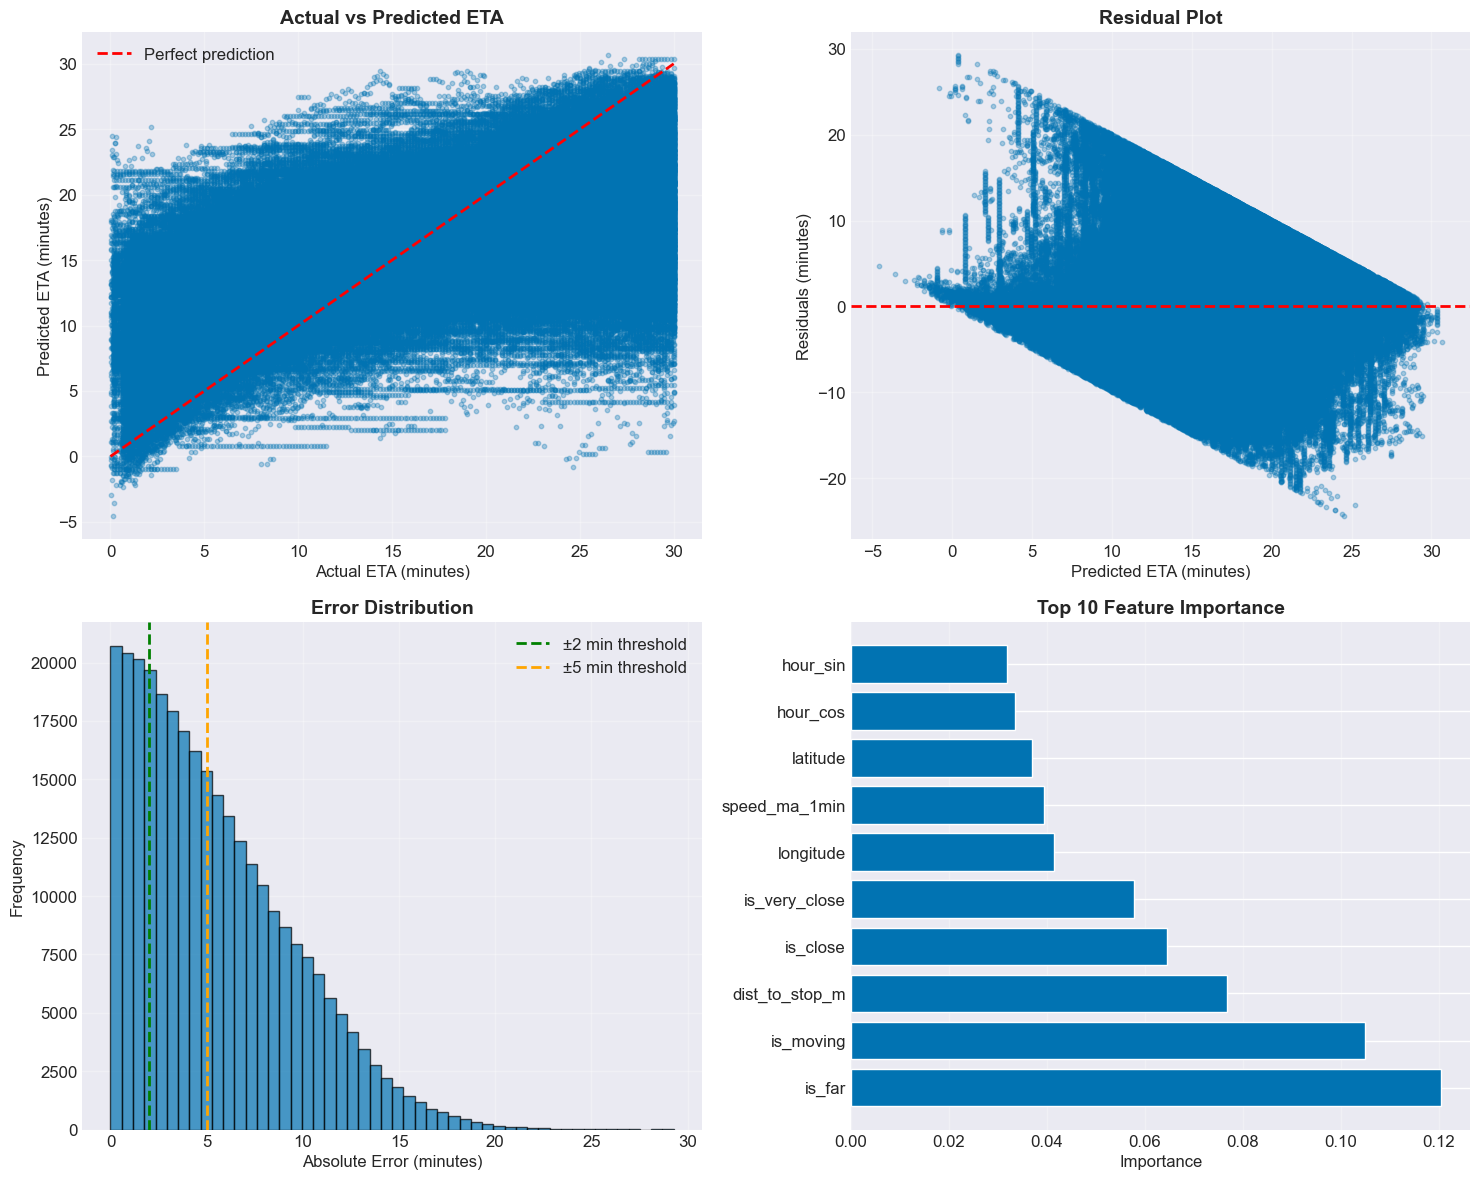


SAVING MODEL

✓ Model saved to: eta_model.pkl

✅ TRAINING COMPLETE!

📊 Model Performance Summary:
  Test MAE:  5.46 minutes
  Test RMSE: 6.81 minutes
  Test R²:   0.3424
  Accuracy ±1 min: 11.7%
  Accuracy ±2 min: 23.2%
  Accuracy ±5 min: 53.1%

📁 Outputs:
  - Model: eta_model.pkl
  - Plots: model_evaluation.png

End time: 2025-12-28 10:36:20

QUICK WINS RESULTS
MAE Test: 5.46 min (was 5.30)
R² Test: 0.342 (was 0.404)
Accuracy ±5min: 53.1% (was 55.8%)
Overfitting: 26.0% (was 23.6%)


In [553]:
import test_xgboost
importlib.reload(test_xgboost)
from test_xgboost import train_and_evaluate_xgboost

# Load new data with 38 columns (37 features + 1 target)
df = pd.read_csv('training_full_18days_parallel.csv')

print(f"Dataset shape: {df.shape}")
print(f"New features: {df.shape[1] - 1}")

# Train model with all Quick Wins features
model, metrics, encoders = train_and_evaluate_xgboost(df)

# Show comparison
print(f"\n{'='*80}")
print("QUICK WINS RESULTS")
print(f"{'='*80}")
print(f"MAE Test: {metrics['mae_test']:.2f} min (was 5.30)")
print(f"R² Test: {metrics['r2_test']:.3f} (was 0.404)")
print(f"Accuracy ±5min: {metrics['accuracy_5min']:.1f}% (was 55.8%)")
overfitting = abs(metrics['mae_train'] - metrics['mae_test']) / metrics['mae_test'] * 100
print(f"Overfitting: {overfitting:.1f}% (was 23.6%)")

## Approach GNN

In [1]:
# Regenerate graph dataset with the fix
import torch
from graph_builder import BusGraphBuilder
import pandas as pd
import importlib

# Reload to get the fix
import graph_builder
importlib.reload(graph_builder)
from graph_builder import BusGraphBuilder

# Load data
df = pd.read_csv('training_full_18days_parallel.csv')

# Create builder
builder = BusGraphBuilder(df)

# Generate graphs (~3 minutes)
graphs = builder.create_dataset()

# Save
torch.save(graphs, 'bus_graphs_full.pt')

print(f"✅ Fixed dataset: {len(graphs)} graphs")

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ Graph Builder initialized
  Stops (nodes): 824
  Stop ID range: 1 to 1962

🔨 Creating 7505 graphs...


100%|██████████| 7505/7505 [02:48<00:00, 44.65it/s] 


✓ Created 7505 valid graphs
✅ Fixed dataset: 7505 graphs


In [3]:
%run gnn_temporal_attention.py

TESTING TEMPORAL GRAPH ATTENTION NETWORK

📊 Model Statistics:
  Parameters: 3,023,713
  Layers: 3 GAT layers + prediction head
  Attention heads: 8 → 8 → 4

🧪 Test Prediction:
  Predicted ETA: 0.5 seconds (0.0 minutes)
  Actual ETA: 10.0 seconds (0.2 minutes)
  Error: 9.5 seconds (0.2 minutes)

✅ TGAT MODEL READY!

Next: Train the model on full dataset


In [4]:
%run train_tgat.py

TRAINING TEMPORAL GRAPH ATTENTION NETWORK

📂 Loading graph dataset...
  Total graphs: 7505

📊 Dataset split:
  Train: 5253 graphs (70.0%)
  Val:   1125 graphs (15.0%)
  Test:  1127 graphs (15.0%)

🔄 Batches per epoch: 165

🧠 Initializing model...
  Parameters: 3,023,713
  Device: cpu

🚀 Starting training...


Epoch 1/100: 100%|██████████| 165/165 [00:18<00:00,  9.12it/s]



Epoch 1:
  Train Loss: 2846448.30 | Train ±1min: 2.4%
  Val Loss:   2666027.26 | Val ±1min: 2.9% | Val ±5min: 6.2%
  LR: 0.001000
  ✓ New best model saved!


Epoch 2/100: 100%|██████████| 165/165 [00:17<00:00,  9.35it/s]



Epoch 2:
  Train Loss: 2196602.33 | Train ±1min: 0.9%
  Val Loss:   2462885.00 | Val ±1min: 2.7% | Val ±5min: 7.2%
  LR: 0.001000
  ✓ New best model saved!


Epoch 3/100: 100%|██████████| 165/165 [00:17<00:00,  9.40it/s]



Epoch 3:
  Train Loss: 1084562.45 | Train ±1min: 0.9%
  Val Loss:   1088106.25 | Val ±1min: 0.6% | Val ±5min: 3.6%
  LR: 0.001000
  ✓ New best model saved!


Epoch 4/100: 100%|██████████| 165/165 [00:17<00:00,  9.39it/s]



Epoch 4:
  Train Loss: 914572.04 | Train ±1min: 3.1%
  Val Loss:   58291034.67 | Val ±1min: 0.0% | Val ±5min: 0.0%
  LR: 0.001000


Epoch 5/100: 100%|██████████| 165/165 [00:17<00:00,  9.46it/s]



Epoch 5:
  Train Loss: 536659.25 | Train ±1min: 4.9%
  Val Loss:   4411206.27 | Val ±1min: 0.7% | Val ±5min: 25.3%
  LR: 0.001000


Epoch 6/100: 100%|██████████| 165/165 [00:17<00:00,  9.31it/s]



Epoch 6:
  Train Loss: 381491.47 | Train ±1min: 8.4%
  Val Loss:   11069634.04 | Val ±1min: 0.0% | Val ±5min: 0.0%
  LR: 0.001000


Epoch 7/100: 100%|██████████| 165/165 [00:17<00:00,  9.56it/s]



Epoch 7:
  Train Loss: 324633.24 | Train ±1min: 9.6%
  Val Loss:   28851317.03 | Val ±1min: 20.4% | Val ±5min: 42.6%
  LR: 0.001000


Epoch 8/100: 100%|██████████| 165/165 [00:17<00:00,  9.38it/s]



Epoch 8:
  Train Loss: 305014.52 | Train ±1min: 11.3%
  Val Loss:   2738379.69 | Val ±1min: 0.0% | Val ±5min: 20.4%
  LR: 0.001000


Epoch 9/100: 100%|██████████| 165/165 [00:17<00:00,  9.23it/s]



Epoch 9:
  Train Loss: 305815.30 | Train ±1min: 11.3%
  Val Loss:   5695213.51 | Val ±1min: 0.4% | Val ±5min: 12.7%
  LR: 0.001000


Epoch 10/100: 100%|██████████| 165/165 [00:17<00:00,  9.29it/s]



Epoch 10:
  Train Loss: 282942.70 | Train ±1min: 12.5%
  Val Loss:   1181520.88 | Val ±1min: 0.5% | Val ±5min: 46.4%
  LR: 0.001000


Epoch 11/100: 100%|██████████| 165/165 [00:17<00:00,  9.43it/s]



Epoch 11:
  Train Loss: 275454.13 | Train ±1min: 11.5%
  Val Loss:   128151186.02 | Val ±1min: 0.3% | Val ±5min: 58.1%
  LR: 0.001000


Epoch 12/100: 100%|██████████| 165/165 [00:17<00:00,  9.55it/s]



Epoch 12:
  Train Loss: 248966.85 | Train ±1min: 13.3%
  Val Loss:   1743624.87 | Val ±1min: 0.2% | Val ±5min: 42.8%
  LR: 0.001000


Epoch 13/100: 100%|██████████| 165/165 [00:17<00:00,  9.47it/s]



Epoch 13:
  Train Loss: 234406.62 | Train ±1min: 13.4%
  Val Loss:   654452.50 | Val ±1min: 0.4% | Val ±5min: 52.3%
  LR: 0.001000
  ✓ New best model saved!


Epoch 14/100: 100%|██████████| 165/165 [00:17<00:00,  9.48it/s]



Epoch 14:
  Train Loss: 214102.69 | Train ±1min: 14.3%
  Val Loss:   522492.69 | Val ±1min: 2.3% | Val ±5min: 15.7%
  LR: 0.001000
  ✓ New best model saved!


Epoch 15/100: 100%|██████████| 165/165 [00:17<00:00,  9.52it/s]



Epoch 15:
  Train Loss: 214666.28 | Train ±1min: 14.7%
  Val Loss:   605583.03 | Val ±1min: 0.2% | Val ±5min: 30.3%
  LR: 0.001000


Epoch 16/100: 100%|██████████| 165/165 [00:17<00:00,  9.59it/s]



Epoch 16:
  Train Loss: 202259.24 | Train ±1min: 15.2%
  Val Loss:   526127.88 | Val ±1min: 0.3% | Val ±5min: 15.4%
  LR: 0.001000


Epoch 17/100: 100%|██████████| 165/165 [00:17<00:00,  9.38it/s]



Epoch 17:
  Train Loss: 194311.14 | Train ±1min: 16.9%
  Val Loss:   454684.09 | Val ±1min: 0.3% | Val ±5min: 75.6%
  LR: 0.001000
  ✓ New best model saved!


Epoch 18/100: 100%|██████████| 165/165 [00:17<00:00,  9.55it/s]



Epoch 18:
  Train Loss: 190614.96 | Train ±1min: 16.4%
  Val Loss:   267397.02 | Val ±1min: 5.0% | Val ±5min: 53.5%
  LR: 0.001000
  ✓ New best model saved!


Epoch 19/100: 100%|██████████| 165/165 [00:17<00:00,  9.56it/s]



Epoch 19:
  Train Loss: 182748.86 | Train ±1min: 19.1%
  Val Loss:   262711.41 | Val ±1min: 9.9% | Val ±5min: 55.2%
  LR: 0.001000
  ✓ New best model saved!


Epoch 20/100: 100%|██████████| 165/165 [00:17<00:00,  9.55it/s]



Epoch 20:
  Train Loss: 182961.68 | Train ±1min: 18.1%
  Val Loss:   5266774.67 | Val ±1min: 0.2% | Val ±5min: 77.6%
  LR: 0.001000


Epoch 21/100: 100%|██████████| 165/165 [00:17<00:00,  9.58it/s]



Epoch 21:
  Train Loss: 186021.44 | Train ±1min: 19.0%
  Val Loss:   281259.89 | Val ±1min: 36.6% | Val ±5min: 84.9%
  LR: 0.001000


Epoch 22/100: 100%|██████████| 165/165 [00:17<00:00,  9.59it/s]



Epoch 22:
  Train Loss: 183756.17 | Train ±1min: 18.5%
  Val Loss:   203335.95 | Val ±1min: 3.1% | Val ±5min: 89.8%
  LR: 0.001000
  ✓ New best model saved!


Epoch 23/100: 100%|██████████| 165/165 [00:17<00:00,  9.45it/s]



Epoch 23:
  Train Loss: 193968.72 | Train ±1min: 20.2%
  Val Loss:   210970.98 | Val ±1min: 1.2% | Val ±5min: 87.6%
  LR: 0.001000


Epoch 24/100: 100%|██████████| 165/165 [00:17<00:00,  9.51it/s]



Epoch 24:
  Train Loss: 178592.41 | Train ±1min: 18.7%
  Val Loss:   741872.02 | Val ±1min: 0.2% | Val ±5min: 75.7%
  LR: 0.001000


Epoch 25/100: 100%|██████████| 165/165 [00:17<00:00,  9.62it/s]



Epoch 25:
  Train Loss: 183587.63 | Train ±1min: 20.5%
  Val Loss:   686827.49 | Val ±1min: 0.1% | Val ±5min: 76.0%
  LR: 0.001000


Epoch 26/100: 100%|██████████| 165/165 [00:17<00:00,  9.49it/s]



Epoch 26:
  Train Loss: 179237.18 | Train ±1min: 19.7%
  Val Loss:   2412093.58 | Val ±1min: 9.7% | Val ±5min: 56.2%
  LR: 0.001000


Epoch 27/100: 100%|██████████| 165/165 [00:17<00:00,  9.50it/s]



Epoch 27:
  Train Loss: 179307.62 | Train ±1min: 19.1%
  Val Loss:   602285.89 | Val ±1min: 0.9% | Val ±5min: 57.6%
  LR: 0.001000


Epoch 28/100: 100%|██████████| 165/165 [00:17<00:00,  9.53it/s]



Epoch 28:
  Train Loss: 180658.11 | Train ±1min: 18.8%
  Val Loss:   26372233.92 | Val ±1min: 0.3% | Val ±5min: 76.8%
  LR: 0.001000


Epoch 29/100: 100%|██████████| 165/165 [00:17<00:00,  9.37it/s]



Epoch 29:
  Train Loss: 180565.24 | Train ±1min: 19.7%
  Val Loss:   198092.70 | Val ±1min: 0.4% | Val ±5min: 78.8%
  LR: 0.001000
  ✓ New best model saved!


Epoch 30/100: 100%|██████████| 165/165 [00:17<00:00,  9.42it/s]



Epoch 30:
  Train Loss: 178537.56 | Train ±1min: 20.0%
  Val Loss:   527028.84 | Val ±1min: 0.3% | Val ±5min: 56.5%
  LR: 0.001000


Epoch 31/100: 100%|██████████| 165/165 [00:17<00:00,  9.52it/s]



Epoch 31:
  Train Loss: 176518.07 | Train ±1min: 20.6%
  Val Loss:   212018.25 | Val ±1min: 3.3% | Val ±5min: 69.2%
  LR: 0.001000


Epoch 32/100: 100%|██████████| 165/165 [00:17<00:00,  9.54it/s]



Epoch 32:
  Train Loss: 178809.13 | Train ±1min: 17.9%
  Val Loss:   971611.35 | Val ±1min: 0.2% | Val ±5min: 81.2%
  LR: 0.001000


Epoch 33/100: 100%|██████████| 165/165 [00:17<00:00,  9.50it/s]



Epoch 33:
  Train Loss: 175288.49 | Train ±1min: 20.5%
  Val Loss:   196859.30 | Val ±1min: 0.4% | Val ±5min: 78.5%
  LR: 0.001000
  ✓ New best model saved!


Epoch 34/100: 100%|██████████| 165/165 [00:17<00:00,  9.48it/s]



Epoch 34:
  Train Loss: 179703.64 | Train ±1min: 20.0%
  Val Loss:   636033.42 | Val ±1min: 20.6% | Val ±5min: 66.1%
  LR: 0.001000


Epoch 35/100: 100%|██████████| 165/165 [00:17<00:00,  9.56it/s]



Epoch 35:
  Train Loss: 177884.59 | Train ±1min: 20.8%
  Val Loss:   434964.43 | Val ±1min: 0.6% | Val ±5min: 77.8%
  LR: 0.001000


Epoch 36/100: 100%|██████████| 165/165 [00:17<00:00,  9.48it/s]



Epoch 36:
  Train Loss: 179076.19 | Train ±1min: 19.6%
  Val Loss:   196703.93 | Val ±1min: 13.0% | Val ±5min: 89.2%
  LR: 0.001000
  ✓ New best model saved!


Epoch 37/100: 100%|██████████| 165/165 [00:17<00:00,  9.50it/s]



Epoch 37:
  Train Loss: 178924.28 | Train ±1min: 20.3%
  Val Loss:   216265.80 | Val ±1min: 0.5% | Val ±5min: 78.9%
  LR: 0.001000


Epoch 38/100: 100%|██████████| 165/165 [00:17<00:00,  9.51it/s]



Epoch 38:
  Train Loss: 181981.97 | Train ±1min: 19.9%
  Val Loss:   204549.33 | Val ±1min: 8.5% | Val ±5min: 89.1%
  LR: 0.001000


Epoch 39/100: 100%|██████████| 165/165 [00:17<00:00,  9.45it/s]



Epoch 39:
  Train Loss: 174689.60 | Train ±1min: 21.5%
  Val Loss:   200826.06 | Val ±1min: 0.4% | Val ±5min: 84.4%
  LR: 0.001000


Epoch 40/100: 100%|██████████| 165/165 [00:17<00:00,  9.52it/s]



Epoch 40:
  Train Loss: 180917.21 | Train ±1min: 20.2%
  Val Loss:   282190.81 | Val ±1min: 0.4% | Val ±5min: 79.8%
  LR: 0.001000


Epoch 41/100: 100%|██████████| 165/165 [00:17<00:00,  9.57it/s]



Epoch 41:
  Train Loss: 171406.92 | Train ±1min: 21.3%
  Val Loss:   218818.71 | Val ±1min: 0.3% | Val ±5min: 81.5%
  LR: 0.001000


Epoch 42/100: 100%|██████████| 165/165 [00:17<00:00,  9.54it/s]



Epoch 42:
  Train Loss: 177601.66 | Train ±1min: 20.6%
  Val Loss:   493610.17 | Val ±1min: 11.6% | Val ±5min: 81.8%
  LR: 0.001000


Epoch 43/100: 100%|██████████| 165/165 [00:17<00:00,  9.49it/s]



Epoch 43:
  Train Loss: 170959.70 | Train ±1min: 21.7%
  Val Loss:   5825921.52 | Val ±1min: 0.2% | Val ±5min: 35.6%
  LR: 0.001000


Epoch 44/100: 100%|██████████| 165/165 [00:17<00:00,  9.62it/s]



Epoch 44:
  Train Loss: 176438.95 | Train ±1min: 20.8%
  Val Loss:   965059.83 | Val ±1min: 0.9% | Val ±5min: 66.0%
  LR: 0.001000


Epoch 45/100: 100%|██████████| 165/165 [00:17<00:00,  9.60it/s]



Epoch 45:
  Train Loss: 175860.59 | Train ±1min: 20.4%
  Val Loss:   331703.26 | Val ±1min: 20.3% | Val ±5min: 82.1%
  LR: 0.001000


Epoch 46/100: 100%|██████████| 165/165 [00:17<00:00,  9.42it/s]



Epoch 46:
  Train Loss: 177673.59 | Train ±1min: 20.5%
  Val Loss:   3802196.50 | Val ±1min: 0.6% | Val ±5min: 24.1%
  LR: 0.001000


Epoch 47/100: 100%|██████████| 165/165 [00:17<00:00,  9.55it/s]



Epoch 47:
  Train Loss: 175123.79 | Train ±1min: 19.7%
  Val Loss:   113302538.33 | Val ±1min: 10.3% | Val ±5min: 79.6%
  LR: 0.000500


Epoch 48/100: 100%|██████████| 165/165 [00:17<00:00,  9.52it/s]



Epoch 48:
  Train Loss: 179676.99 | Train ±1min: 20.6%
  Val Loss:   219504.44 | Val ±1min: 71.7% | Val ±5min: 77.9%
  LR: 0.000500


Epoch 49/100: 100%|██████████| 165/165 [00:17<00:00,  9.54it/s]



Epoch 49:
  Train Loss: 173027.02 | Train ±1min: 21.1%
  Val Loss:   562054.17 | Val ±1min: 9.7% | Val ±5min: 78.8%
  LR: 0.000500


Epoch 50/100: 100%|██████████| 165/165 [00:17<00:00,  9.58it/s]



Epoch 50:
  Train Loss: 174384.68 | Train ±1min: 20.9%
  Val Loss:   758645.77 | Val ±1min: 11.3% | Val ±5min: 68.9%
  LR: 0.000500


Epoch 51/100: 100%|██████████| 165/165 [00:17<00:00,  9.54it/s]



Epoch 51:
  Train Loss: 176057.17 | Train ±1min: 20.5%
  Val Loss:   244952.54 | Val ±1min: 21.1% | Val ±5min: 81.6%
  LR: 0.000500


Epoch 52/100: 100%|██████████| 165/165 [00:17<00:00,  9.52it/s]



Epoch 52:
  Train Loss: 173248.41 | Train ±1min: 21.1%
  Val Loss:   428967.30 | Val ±1min: 0.3% | Val ±5min: 68.8%
  LR: 0.000500


Epoch 53/100: 100%|██████████| 165/165 [00:17<00:00,  9.33it/s]



Epoch 53:
  Train Loss: 175185.30 | Train ±1min: 21.3%
  Val Loss:   330409.57 | Val ±1min: 0.4% | Val ±5min: 78.7%
  LR: 0.000500


Epoch 54/100: 100%|██████████| 165/165 [00:17<00:00,  9.48it/s]



Epoch 54:
  Train Loss: 174401.99 | Train ±1min: 20.9%
  Val Loss:   5669478.17 | Val ±1min: 0.5% | Val ±5min: 79.2%
  LR: 0.000500


Epoch 55/100: 100%|██████████| 165/165 [00:17<00:00,  9.54it/s]



Epoch 55:
  Train Loss: 173421.25 | Train ±1min: 21.2%
  Val Loss:   633643.82 | Val ±1min: 0.2% | Val ±5min: 66.4%
  LR: 0.000500


Epoch 56/100: 100%|██████████| 165/165 [00:17<00:00,  9.58it/s]



Epoch 56:
  Train Loss: 172785.26 | Train ±1min: 21.6%
  Val Loss:   5778136819.68 | Val ±1min: 15.0% | Val ±5min: 76.3%
  LR: 0.000500

⚠️  Early stopping after 56 epochs

✅ TRAINING COMPLETE!

📊 Final Evaluation on Test Set...

📈 Test Set Results:
  MAE:  4427.86 minutes
  RMSE: 10696.01 minutes
  ±1 min accuracy: 1.9%
  ±2 min accuracy: 18.1%
  ±5 min accuracy: 32.7%

💾 Model saved to: tgat_best.pt


In [5]:
%run diagnose_gnn.py

DIAGNOSING GNN FAILURE

📊 Data Statistics:
  Total graphs: 7505

🎯 Target (ETA) Distribution:
  Min: 3.0 seconds (0.1 minutes)
  Max: 1800.0 seconds (30.0 minutes)
  Mean: 1574.3 seconds (26.2 minutes)
  Std: 511.1 seconds (8.5 minutes)

📈 Feature Statistics (first graph):
  Shape: (118, 8)
  Min: 0.00
  Max: 82.87
  Mean: 15.47

⚠️  Data Quality:
  Has NaN: False
  Has Inf: False

🔮 Untrained Model Prediction:
  Predicted: -0.1 seconds
  Actual: 10.0 seconds
  Scale issue: 0.01x

🔮 Trained Model Prediction:
  Predicted: 1550.8 seconds (25.8 minutes)
  Actual: 10.0 seconds (0.2 minutes)
  Error: 1540.8 seconds



In [6]:
%run train_tgat_fixed.py

TRAINING TGAT WITH PROPER NORMALIZATION

📂 Loading graph dataset...
  Total graphs: 7505

📊 Calculating normalization statistics...

  Feature stats:
    Mean: [ 7.48797273 20.00502479 13.1003637 ]... (first 3)
    Std: [ 4.10197736 71.94127533  4.16395349]... (first 3)

  Target stats:
    Min: 4.0 seconds
    Max: 1800.0 seconds
    Range: 1796.0 seconds

🔄 Normalizing all graphs...


100%|██████████| 7505/7505 [00:00<00:00, 34406.22it/s]



📊 Dataset split:
  Train: 5253 graphs
  Val:   1125 graphs
  Test:  1127 graphs

🧠 Initializing model...
  Parameters: 3,023,713
  Device: cpu

🚀 Starting training...


Epoch 1/100: 100%|██████████| 165/165 [00:17<00:00,  9.28it/s]



Epoch 1:
  Train Loss: 0.1653 | Train ±1min: 11.3%
  Val Loss:   0.0676 | Val ±1min: 0.8% | Val ±5min: 43.6%
  LR: 0.001000
  ✓ New best model saved!


Epoch 2/100: 100%|██████████| 165/165 [00:17<00:00,  9.35it/s]



Epoch 2:
  Train Loss: 0.0702 | Train ±1min: 13.8%
  Val Loss:   0.0671 | Val ±1min: 9.1% | Val ±5min: 79.8%
  LR: 0.001000
  ✓ New best model saved!


Epoch 3/100: 100%|██████████| 165/165 [00:17<00:00,  9.17it/s]



Epoch 3:
  Train Loss: 0.0661 | Train ±1min: 14.8%
  Val Loss:   0.0649 | Val ±1min: 22.8% | Val ±5min: 89.1%
  LR: 0.001000
  ✓ New best model saved!


Epoch 4/100: 100%|██████████| 165/165 [00:17<00:00,  9.36it/s]



Epoch 4:
  Train Loss: 0.0615 | Train ±1min: 16.7%
  Val Loss:   0.1105 | Val ±1min: 0.5% | Val ±5min: 2.2%
  LR: 0.001000


Epoch 5/100: 100%|██████████| 165/165 [00:17<00:00,  9.39it/s]



Epoch 5:
  Train Loss: 0.0598 | Train ±1min: 17.7%
  Val Loss:   0.0803 | Val ±1min: 0.6% | Val ±5min: 77.9%
  LR: 0.001000


Epoch 6/100: 100%|██████████| 165/165 [00:17<00:00,  9.53it/s]



Epoch 6:
  Train Loss: 0.0585 | Train ±1min: 17.8%
  Val Loss:   0.0634 | Val ±1min: 0.3% | Val ±5min: 87.5%
  LR: 0.001000
  ✓ New best model saved!


Epoch 7/100: 100%|██████████| 165/165 [00:17<00:00,  9.39it/s]



Epoch 7:
  Train Loss: 0.0575 | Train ±1min: 18.1%
  Val Loss:   0.0773 | Val ±1min: 0.4% | Val ±5min: 78.4%
  LR: 0.001000


Epoch 8/100: 100%|██████████| 165/165 [00:17<00:00,  9.57it/s]



Epoch 8:
  Train Loss: 0.0553 | Train ±1min: 18.8%
  Val Loss:   0.1659 | Val ±1min: 0.4% | Val ±5min: 87.5%
  LR: 0.001000


Epoch 9/100: 100%|██████████| 165/165 [00:17<00:00,  9.58it/s]



Epoch 9:
  Train Loss: 0.0543 | Train ±1min: 20.0%
  Val Loss:   0.1401 | Val ±1min: 27.4% | Val ±5min: 78.0%
  LR: 0.001000


Epoch 10/100: 100%|██████████| 165/165 [00:17<00:00,  9.50it/s]



Epoch 10:
  Train Loss: 0.0528 | Train ±1min: 20.4%
  Val Loss:   0.2396 | Val ±1min: 2.8% | Val ±5min: 78.3%
  LR: 0.001000


Epoch 11/100: 100%|██████████| 165/165 [00:17<00:00,  9.48it/s]



Epoch 11:
  Train Loss: 0.0530 | Train ±1min: 20.0%
  Val Loss:   0.2358 | Val ±1min: 33.2% | Val ±5min: 87.1%
  LR: 0.001000


Epoch 12/100: 100%|██████████| 165/165 [00:17<00:00,  9.59it/s]



Epoch 12:
  Train Loss: 0.0520 | Train ±1min: 20.0%
  Val Loss:   0.1313 | Val ±1min: 7.9% | Val ±5min: 87.5%
  LR: 0.001000


Epoch 13/100: 100%|██████████| 165/165 [00:17<00:00,  9.58it/s]



Epoch 13:
  Train Loss: 0.0524 | Train ±1min: 19.9%
  Val Loss:   0.0645 | Val ±1min: 17.9% | Val ±5min: 80.0%
  LR: 0.001000


Epoch 14/100: 100%|██████████| 165/165 [00:17<00:00,  9.46it/s]



Epoch 14:
  Train Loss: 0.0525 | Train ±1min: 20.9%
  Val Loss:   0.0837 | Val ±1min: 0.1% | Val ±5min: 81.9%
  LR: 0.001000


Epoch 15/100: 100%|██████████| 165/165 [00:17<00:00,  9.59it/s]



Epoch 15:
  Train Loss: 0.0517 | Train ±1min: 20.6%
  Val Loss:   0.1075 | Val ±1min: 20.3% | Val ±5min: 77.0%
  LR: 0.001000


Epoch 16/100: 100%|██████████| 165/165 [00:17<00:00,  9.63it/s]



Epoch 16:
  Train Loss: 0.0529 | Train ±1min: 19.7%
  Val Loss:   0.2183 | Val ±1min: 0.4% | Val ±5min: 87.6%
  LR: 0.001000


Epoch 17/100: 100%|██████████| 165/165 [00:17<00:00,  9.51it/s]



Epoch 17:
  Train Loss: 0.0516 | Train ±1min: 21.8%
  Val Loss:   0.0838 | Val ±1min: 2.8% | Val ±5min: 87.6%
  LR: 0.000500


Epoch 18/100: 100%|██████████| 165/165 [00:17<00:00,  9.61it/s]



Epoch 18:
  Train Loss: 0.0499 | Train ±1min: 19.8%
  Val Loss:   0.1413 | Val ±1min: 0.6% | Val ±5min: 87.6%
  LR: 0.000500


Epoch 19/100: 100%|██████████| 165/165 [00:17<00:00,  9.60it/s]



Epoch 19:
  Train Loss: 0.0497 | Train ±1min: 21.1%
  Val Loss:   0.1704 | Val ±1min: 0.2% | Val ±5min: 87.6%
  LR: 0.000500


Epoch 20/100: 100%|██████████| 165/165 [00:17<00:00,  9.58it/s]



Epoch 20:
  Train Loss: 0.0492 | Train ±1min: 22.0%
  Val Loss:   5.9589 | Val ±1min: 0.4% | Val ±5min: 87.5%
  LR: 0.000500


Epoch 21/100: 100%|██████████| 165/165 [00:17<00:00,  9.53it/s]



Epoch 21:
  Train Loss: 0.0490 | Train ±1min: 20.8%
  Val Loss:   31.3302 | Val ±1min: 0.4% | Val ±5min: 87.3%
  LR: 0.000500


Epoch 22/100: 100%|██████████| 165/165 [00:17<00:00,  9.58it/s]



Epoch 22:
  Train Loss: 0.0492 | Train ±1min: 21.7%
  Val Loss:   5.6515 | Val ±1min: 60.9% | Val ±5min: 86.8%
  LR: 0.000500


Epoch 23/100: 100%|██████████| 165/165 [00:17<00:00,  9.59it/s]



Epoch 23:
  Train Loss: 0.0494 | Train ±1min: 19.3%
  Val Loss:   38.3324 | Val ±1min: 34.2% | Val ±5min: 87.0%
  LR: 0.000500


Epoch 24/100: 100%|██████████| 165/165 [00:17<00:00,  9.37it/s]



Epoch 24:
  Train Loss: 0.0496 | Train ±1min: 20.0%
  Val Loss:   1.5188 | Val ±1min: 0.3% | Val ±5min: 89.4%
  LR: 0.000500


Epoch 25/100: 100%|██████████| 165/165 [00:17<00:00,  9.52it/s]



Epoch 25:
  Train Loss: 0.0495 | Train ±1min: 20.3%
  Val Loss:   0.2668 | Val ±1min: 45.4% | Val ±5min: 88.9%
  LR: 0.000500


Epoch 26/100: 100%|██████████| 165/165 [00:17<00:00,  9.59it/s]



Epoch 26:
  Train Loss: 0.0490 | Train ±1min: 19.6%
  Val Loss:   0.0657 | Val ±1min: 63.0% | Val ±5min: 88.9%
  LR: 0.000500

⚠️  Early stopping after 26 epochs

✅ TRAINING COMPLETE!

📊 Final Evaluation on Test Set...

📈 Test Set Results:
  MAE:  35.66 minutes
  RMSE: 46.66 minutes
  ±1 min accuracy: 0.6%
  ±2 min accuracy: 2.3%
  ±5 min accuracy: 23.5%

💾 Model saved to: tgat_best_normalized.pt
💾 Scalers saved to: scalers.pkl


In [7]:
%run diagnose_split.py

DIAGNOSING TRAIN/VAL/TEST SPLIT ISSUE

📊 Split sizes:
  Train: 5253
  Val:   1125
  Test:  1127

🎯 Target Distribution (BEFORE normalization):
  Train: mean=1678.3s, std=392.5s
  Val:   mean=1644.0s, std=448.5s
  Test:  mean=1019.8s, std=676.8s

📅 Original Data:
  Total trips: 178
  Date range: 20251103 to 20251121

🔍 Checking graph ordering...
  First graph target: 10.0s
  Middle graph target: 1182.0s
  Last graph target: 398.0s

⚠️  PROBLEM DETECTED:
  Test set has VERY different distribution!
  Train mean: 1678.3s
  Test mean:  1019.8s
  Difference: 658.5s

  This suggests:
  - Graphs are ordered by time/date
  - Test set is from different time period
  - Need RANDOM split, not sequential!

🔨 How were graphs created?
  Graph builder used groupby(['trip_id', 'stop_id'])
  This preserves original data order
  If original data is sorted by date, graphs are too!

SOLUTION: Shuffle graphs before splitting!


In [8]:
%run train_tgat_random.py

TRAINING TGAT WITH RANDOM SPLIT (FIXED)

📂 Loading graph dataset...
  Total graphs: 7505

🔀 Shuffling graphs randomly...
  ✓ Graphs shuffled!

📊 Verifying split distributions:
  Train: mean=1574.9s, std=509.2s
  Val:   mean=1570.1s, std=517.6s
  Test:  mean=1575.4s, std=513.5s
  ✅ Distributions are now similar!

📊 Calculating normalization statistics...
  Target range: 3.0s to 1800.0s

🔄 Normalizing all graphs...


100%|██████████| 7505/7505 [00:00<00:00, 30127.00it/s]



🧠 Initializing model...
  Parameters: 3,023,713

🚀 Starting training...


Epoch 1/100: 100%|██████████| 165/165 [00:14<00:00, 11.11it/s]



Epoch 1:
  Train Loss: 0.1525 | Train ±1min: 10.3%
  Val Loss:   0.0922 | Val ±1min: 11.5% | Val ±5min: 17.2%
  LR: 0.001000
  ✓ New best model saved!


Epoch 2/100: 100%|██████████| 165/165 [00:14<00:00, 11.05it/s]



Epoch 2:
  Train Loss: 0.0797 | Train ±1min: 13.2%
  Val Loss:   0.0703 | Val ±1min: 1.2% | Val ±5min: 58.8%
  LR: 0.001000
  ✓ New best model saved!


Epoch 3/100: 100%|██████████| 165/165 [00:14<00:00, 11.03it/s]



Epoch 3:
  Train Loss: 0.0737 | Train ±1min: 14.2%
  Val Loss:   0.0823 | Val ±1min: 1.1% | Val ±5min: 72.8%
  LR: 0.001000


Epoch 4/100: 100%|██████████| 165/165 [00:14<00:00, 11.17it/s]



Epoch 4:
  Train Loss: 0.0703 | Train ±1min: 15.9%
  Val Loss:   0.0666 | Val ±1min: 4.4% | Val ±5min: 63.7%
  LR: 0.001000
  ✓ New best model saved!


Epoch 5/100: 100%|██████████| 165/165 [00:14<00:00, 11.24it/s]



Epoch 5:
  Train Loss: 0.0707 | Train ±1min: 14.9%
  Val Loss:   0.0638 | Val ±1min: 1.7% | Val ±5min: 74.3%
  LR: 0.001000
  ✓ New best model saved!


Epoch 6/100: 100%|██████████| 165/165 [00:14<00:00, 11.24it/s]



Epoch 6:
  Train Loss: 0.0675 | Train ±1min: 16.4%
  Val Loss:   0.0624 | Val ±1min: 1.6% | Val ±5min: 80.3%
  LR: 0.001000
  ✓ New best model saved!


Epoch 7/100: 100%|██████████| 165/165 [00:14<00:00, 11.00it/s]



Epoch 7:
  Train Loss: 0.0662 | Train ±1min: 16.5%
  Val Loss:   0.0645 | Val ±1min: 1.4% | Val ±5min: 75.8%
  LR: 0.001000


Epoch 8/100: 100%|██████████| 165/165 [00:14<00:00, 11.03it/s]



Epoch 8:
  Train Loss: 0.0675 | Train ±1min: 16.5%
  Val Loss:   0.0647 | Val ±1min: 1.2% | Val ±5min: 82.0%
  LR: 0.001000


Epoch 9/100: 100%|██████████| 165/165 [00:15<00:00, 10.96it/s]



Epoch 9:
  Train Loss: 0.0659 | Train ±1min: 15.2%
  Val Loss:   0.0641 | Val ±1min: 43.4% | Val ±5min: 81.3%
  LR: 0.001000


Epoch 10/100: 100%|██████████| 165/165 [00:14<00:00, 11.06it/s]



Epoch 10:
  Train Loss: 0.0651 | Train ±1min: 16.8%
  Val Loss:   0.0645 | Val ±1min: 1.0% | Val ±5min: 78.3%
  LR: 0.001000


Epoch 11/100: 100%|██████████| 165/165 [00:15<00:00, 10.59it/s]



Epoch 11:
  Train Loss: 0.0645 | Train ±1min: 16.9%
  Val Loss:   0.0617 | Val ±1min: 1.1% | Val ±5min: 79.9%
  LR: 0.001000
  ✓ New best model saved!


Epoch 12/100: 100%|██████████| 165/165 [00:15<00:00, 10.88it/s]



Epoch 12:
  Train Loss: 0.0640 | Train ±1min: 16.8%
  Val Loss:   0.0673 | Val ±1min: 23.2% | Val ±5min: 80.7%
  LR: 0.001000


Epoch 13/100: 100%|██████████| 165/165 [00:14<00:00, 11.30it/s]



Epoch 13:
  Train Loss: 0.0643 | Train ±1min: 16.6%
  Val Loss:   7.1939 | Val ±1min: 23.9% | Val ±5min: 82.4%
  LR: 0.001000


Epoch 14/100: 100%|██████████| 165/165 [00:14<00:00, 11.34it/s]



Epoch 14:
  Train Loss: 0.0655 | Train ±1min: 15.9%
  Val Loss:   24.9277 | Val ±1min: 1.5% | Val ±5min: 82.9%
  LR: 0.001000


Epoch 15/100: 100%|██████████| 165/165 [00:14<00:00, 11.32it/s]



Epoch 15:
  Train Loss: 0.0634 | Train ±1min: 15.9%
  Val Loss:   0.0823 | Val ±1min: 1.0% | Val ±5min: 65.2%
  LR: 0.001000


Epoch 16/100: 100%|██████████| 165/165 [00:14<00:00, 11.38it/s]



Epoch 16:
  Train Loss: 0.0623 | Train ±1min: 17.6%
  Val Loss:   0.3952 | Val ±1min: 1.4% | Val ±5min: 82.0%
  LR: 0.001000


Epoch 17/100: 100%|██████████| 165/165 [00:14<00:00, 11.38it/s]



Epoch 17:
  Train Loss: 0.0626 | Train ±1min: 15.8%
  Val Loss:   0.1157 | Val ±1min: 56.4% | Val ±5min: 81.4%
  LR: 0.001000


Epoch 18/100: 100%|██████████| 165/165 [00:14<00:00, 11.14it/s]



Epoch 18:
  Train Loss: 0.0632 | Train ±1min: 17.6%
  Val Loss:   1.4534 | Val ±1min: 0.8% | Val ±5min: 80.6%
  LR: 0.001000


Epoch 19/100: 100%|██████████| 165/165 [00:14<00:00, 11.39it/s]



Epoch 19:
  Train Loss: 0.0617 | Train ±1min: 15.2%
  Val Loss:   3.5901 | Val ±1min: 1.9% | Val ±5min: 78.3%
  LR: 0.001000


Epoch 20/100: 100%|██████████| 165/165 [00:14<00:00, 11.36it/s]



Epoch 20:
  Train Loss: 0.0609 | Train ±1min: 17.7%
  Val Loss:   0.1141 | Val ±1min: 1.4% | Val ±5min: 75.8%
  LR: 0.001000


Epoch 21/100: 100%|██████████| 165/165 [00:14<00:00, 11.38it/s]



Epoch 21:
  Train Loss: 0.0618 | Train ±1min: 16.4%
  Val Loss:   0.0623 | Val ±1min: 1.7% | Val ±5min: 77.6%
  LR: 0.001000


Epoch 22/100: 100%|██████████| 165/165 [00:14<00:00, 11.22it/s]



Epoch 22:
  Train Loss: 0.0623 | Train ±1min: 17.5%
  Val Loss:   0.0698 | Val ±1min: 1.7% | Val ±5min: 82.2%
  LR: 0.000500


Epoch 23/100: 100%|██████████| 165/165 [00:14<00:00, 11.33it/s]



Epoch 23:
  Train Loss: 0.0614 | Train ±1min: 17.0%
  Val Loss:   0.0649 | Val ±1min: 1.2% | Val ±5min: 74.6%
  LR: 0.000500


Epoch 24/100: 100%|██████████| 165/165 [00:14<00:00, 11.35it/s]



Epoch 24:
  Train Loss: 0.0603 | Train ±1min: 15.3%
  Val Loss:   0.1160 | Val ±1min: 1.4% | Val ±5min: 82.3%
  LR: 0.000500


Epoch 25/100: 100%|██████████| 165/165 [00:14<00:00, 11.36it/s]



Epoch 25:
  Train Loss: 0.0617 | Train ±1min: 14.8%
  Val Loss:   4.9943 | Val ±1min: 1.4% | Val ±5min: 82.0%
  LR: 0.000500


Epoch 26/100: 100%|██████████| 165/165 [00:14<00:00, 11.28it/s]



Epoch 26:
  Train Loss: 0.0610 | Train ±1min: 15.3%
  Val Loss:   0.7771 | Val ±1min: 1.6% | Val ±5min: 80.7%
  LR: 0.000500


Epoch 27/100: 100%|██████████| 165/165 [00:14<00:00, 11.26it/s]



Epoch 27:
  Train Loss: 0.0604 | Train ±1min: 17.3%
  Val Loss:   0.0622 | Val ±1min: 1.1% | Val ±5min: 82.0%
  LR: 0.000500


Epoch 28/100: 100%|██████████| 165/165 [00:14<00:00, 11.23it/s]



Epoch 28:
  Train Loss: 0.0609 | Train ±1min: 15.5%
  Val Loss:   0.0820 | Val ±1min: 1.0% | Val ±5min: 75.0%
  LR: 0.000500


Epoch 29/100: 100%|██████████| 165/165 [00:14<00:00, 11.26it/s]



Epoch 29:
  Train Loss: 0.0601 | Train ±1min: 15.2%
  Val Loss:   1.2411 | Val ±1min: 4.7% | Val ±5min: 82.2%
  LR: 0.000500


Epoch 30/100: 100%|██████████| 165/165 [00:14<00:00, 11.04it/s]



Epoch 30:
  Train Loss: 0.0602 | Train ±1min: 17.0%
  Val Loss:   0.1014 | Val ±1min: 0.9% | Val ±5min: 67.3%
  LR: 0.000500


Epoch 31/100: 100%|██████████| 165/165 [00:14<00:00, 11.31it/s]



Epoch 31:
  Train Loss: 0.0605 | Train ±1min: 15.2%
  Val Loss:   13.7356 | Val ±1min: 1.2% | Val ±5min: 55.1%
  LR: 0.000500

⚠️  Early stopping after 31 epochs

✅ TRAINING COMPLETE!

📊 Final Evaluation on Test Set...

📈 Test Set Results:
  MAE:  5.27 minutes
  RMSE: 7.54 minutes
  ±1 min accuracy: 1.6%
  ±2 min accuracy: 2.9%
  ±5 min accuracy: 80.8%

💾 Model saved to: tgat_best_random.pt
💾 Scalers saved to: scalers_random.pkl


In [9]:
%run train_xgboost_ensemble.py

TRAINING XGBOOST FOR ENSEMBLE

📂 Loading graph dataset...
  Total graphs: 7505

🔄 Converting graphs to tabular format...
  Converting graphs...
  Feature matrix: (7505, 53)
  Total features: 53

📊 Dataset split:
  Train: 5253
  Val:   1125
  Test:  1127

📊 Normalizing features...

🚀 Training XGBoost...
[0]	validation_0-rmse:485.17447
[100]	validation_0-rmse:362.18545
[200]	validation_0-rmse:342.92397
[300]	validation_0-rmse:341.03930
[400]	validation_0-rmse:340.48373
[423]	validation_0-rmse:340.41001

📊 Evaluating XGBoost...

Train Results:
  MAE:  1.27 minutes
  RMSE: 2.69 minutes
  ±1 min: 67.1%
  ±2 min: 85.4%
  ±5 min: 95.6%

Validation Results:
  MAE:  2.84 minutes
  RMSE: 5.67 minutes
  ±1 min: 55.8%
  ±2 min: 70.6%
  ±5 min: 83.2%

Test Results:
  MAE:  2.86 minutes
  RMSE: 5.76 minutes
  ±1 min: 54.7%
  ±2 min: 71.2%
  ±5 min: 83.7%

💾 Saving XGBoost model...

✅ XGBOOST TRAINING COMPLETE!

Test Performance:
  ±1 min: 54.7%
  ±2 min: 71.2%
  ±5 min: 83.7%


In [10]:
%run train_lightgbm_ensemble.py

TRAINING LIGHTGBM FOR ENSEMBLE

📂 Loading graph dataset...

🔄 Converting graphs...

🚀 Training LightGBM...
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.890253
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.139648
[LightGBM] [Debug] init for col-wise c

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [14]:
%run build_ensemble.py

BUILDING STACKING ENSEMBLE

📂 Loading trained models...
[LightGBM] [Debug] Skipped header "tree" in file lightgbm_model.txt
[LightGBM] [Debug] Skipped header "tree" in file lightgbm_model.txt
[LightGBM] [Debug] Time for loading model: 0.006229 seconds
  ✓ All models loaded!

📂 Loading graph dataset...

🔮 Generating base model predictions...
  Predicting train...
  Predicting val...
  Predicting test...

🧠 Training meta-learner...
  Meta-model weights:
    GNN:      0.000
    XGBoost:  1.522
    LightGBM: -0.507
    Intercept: -27.7

📊 Evaluating Stacking Ensemble...

COMPARISON: Individual Models vs Ensemble

🔷 GNN Only:

GNN Results:
  MAE:  185.84 minutes
  RMSE: 405.18 minutes
  ±1 min: 0.0%
  ±2 min: 0.0%
  ±5 min: 0.0%

🔶 XGBoost Only:

XGBoost Results:
  MAE:  1.74 minutes
  RMSE: 3.93 minutes
  ±1 min: 64.3%
  ±2 min: 82.3%
  ±5 min: 92.5%

🔷 LightGBM Only:

LightGBM Results:
  MAE:  2.53 minutes
  RMSE: 4.99 minutes
  ±1 min: 53.1%
  ±2 min: 71.9%
  ±5 min: 86.5%

🌟 STACKING EN

In [12]:
%run train_advanced_features.py

ADVANCED FEATURE ENGINEERING FOR 80% TARGET

🔄 Extracting advanced features...
  Feature matrix: (7505, 96)
  Total features: 96

🚀 Training XGBoost with advanced features...
[0]	validation_0-rmse:486.67380
[100]	validation_0-rmse:398.76480
[200]	validation_0-rmse:360.17814
[300]	validation_0-rmse:344.26921
[400]	validation_0-rmse:338.09401
[500]	validation_0-rmse:335.71683
[600]	validation_0-rmse:334.76959
[700]	validation_0-rmse:334.45793
[800]	validation_0-rmse:334.32921
[900]	validation_0-rmse:334.03433
[1000]	validation_0-rmse:333.91310
[1100]	validation_0-rmse:333.59345
[1200]	validation_0-rmse:333.54221
[1300]	validation_0-rmse:333.51083
[1400]	validation_0-rmse:333.56073
[1500]	validation_0-rmse:333.55035
[1600]	validation_0-rmse:333.57097
[1700]	validation_0-rmse:333.59117
[1800]	validation_0-rmse:333.56226
[1900]	validation_0-rmse:333.58213
[2000]	validation_0-rmse:333.64433
[2100]	validation_0-rmse:333.67520
[2200]	validation_0-rmse:333.68324
[2300]	validation_0-rmse:333.720

In [13]:
%run optimize_hyperparameters.py

HYPERPARAMETER OPTIMIZATION FOR 80% TARGET

🔄 Extracting features...


[I 2025-12-30 04:20:27,807] A new study created in memory with name: no-name-1384efa1-7ea0-4720-a3b3-5622bf956ee6



🔍 Running Optuna optimization (20 trials)...


Best trial: 0. Best value: 56.4444:   5%|▌         | 1/20 [00:07<02:13,  7.00s/it]

[I 2025-12-30 04:20:34,808] Trial 0 finished with value: 56.44444444444444 and parameters: {'n_estimators': 4173, 'max_depth': 11, 'learning_rate': 0.03581637604352382, 'subsample': 0.9457619956532167, 'colsample_bytree': 0.9219641910257079, 'min_child_weight': 4, 'gamma': 3.622365692754266, 'reg_alpha': 0.32512284651530776, 'reg_lambda': 1.3200137823932991}. Best is trial 0 with value: 56.44444444444444.


Best trial: 0. Best value: 56.4444:  10%|█         | 2/20 [00:12<01:49,  6.11s/it]

[I 2025-12-30 04:20:40,290] Trial 1 finished with value: 54.400000000000006 and parameters: {'n_estimators': 3032, 'max_depth': 6, 'learning_rate': 0.010692282134150735, 'subsample': 0.7858008869648615, 'colsample_bytree': 0.6087473425947562, 'min_child_weight': 6, 'gamma': 0.45806891551606943, 'reg_alpha': 0.6807248455229207, 'reg_lambda': 0.07323946100781864}. Best is trial 0 with value: 56.44444444444444.


Best trial: 2. Best value: 57.5111:  15%|█▌        | 3/20 [00:24<02:28,  8.72s/it]

[I 2025-12-30 04:20:52,126] Trial 2 finished with value: 57.51111111111111 and parameters: {'n_estimators': 2236, 'max_depth': 12, 'learning_rate': 0.012670873083526603, 'subsample': 0.6775876734888374, 'colsample_bytree': 0.9230471071561748, 'min_child_weight': 1, 'gamma': 0.2823037027139075, 'reg_alpha': 0.4972677921601125, 'reg_lambda': 0.6784047278992336}. Best is trial 2 with value: 57.51111111111111.


Best trial: 2. Best value: 57.5111:  20%|██        | 4/20 [00:33<02:23,  8.99s/it]

[I 2025-12-30 04:21:01,534] Trial 3 finished with value: 54.75555555555556 and parameters: {'n_estimators': 4530, 'max_depth': 7, 'learning_rate': 0.001370844440459138, 'subsample': 0.867389220104105, 'colsample_bytree': 0.9314697615119396, 'min_child_weight': 9, 'gamma': 4.588426983388555, 'reg_alpha': 1.4292994005009616, 'reg_lambda': 1.8408261631198641}. Best is trial 2 with value: 57.51111111111111.


Best trial: 2. Best value: 57.5111:  25%|██▌       | 5/20 [00:48<02:45, 11.04s/it]

[I 2025-12-30 04:21:16,208] Trial 4 finished with value: 55.111111111111114 and parameters: {'n_estimators': 3493, 'max_depth': 14, 'learning_rate': 0.007245950335765155, 'subsample': 0.9768833697811389, 'colsample_bytree': 0.8361580164051359, 'min_child_weight': 10, 'gamma': 3.9779612585791635, 'reg_alpha': 1.8791312143513559, 'reg_lambda': 1.9631474260159132}. Best is trial 2 with value: 57.51111111111111.


Best trial: 2. Best value: 57.5111:  30%|███       | 6/20 [00:55<02:17,  9.80s/it]

[I 2025-12-30 04:21:23,597] Trial 5 finished with value: 52.800000000000004 and parameters: {'n_estimators': 3529, 'max_depth': 7, 'learning_rate': 0.018556055330120776, 'subsample': 0.9537849919760049, 'colsample_bytree': 0.6956875712691637, 'min_child_weight': 7, 'gamma': 3.748441042985559, 'reg_alpha': 0.5460552732667208, 'reg_lambda': 0.5315191607223837}. Best is trial 2 with value: 57.51111111111111.


Best trial: 2. Best value: 57.5111:  35%|███▌      | 7/20 [01:10<02:26, 11.30s/it]

[I 2025-12-30 04:21:37,978] Trial 6 finished with value: 56.888888888888886 and parameters: {'n_estimators': 4196, 'max_depth': 11, 'learning_rate': 0.002997780571778473, 'subsample': 0.9525611527445315, 'colsample_bytree': 0.9396796370223373, 'min_child_weight': 9, 'gamma': 0.27717219498922363, 'reg_alpha': 0.9604512644679981, 'reg_lambda': 0.7987882423229202}. Best is trial 2 with value: 57.51111111111111.


Best trial: 2. Best value: 57.5111:  40%|████      | 8/20 [01:14<01:47,  8.93s/it]

[I 2025-12-30 04:21:41,830] Trial 7 finished with value: 39.28888888888889 and parameters: {'n_estimators': 1794, 'max_depth': 7, 'learning_rate': 0.0012785893009065147, 'subsample': 0.8930345584522147, 'colsample_bytree': 0.7846214899000868, 'min_child_weight': 4, 'gamma': 2.235856640788449, 'reg_alpha': 0.8878724641889784, 'reg_lambda': 0.9276678618116341}. Best is trial 2 with value: 57.51111111111111.


Best trial: 2. Best value: 57.5111:  45%|████▌     | 9/20 [01:22<01:37,  8.86s/it]

[I 2025-12-30 04:21:50,547] Trial 8 finished with value: 56.888888888888886 and parameters: {'n_estimators': 3192, 'max_depth': 9, 'learning_rate': 0.0016604808669499291, 'subsample': 0.8092238940571113, 'colsample_bytree': 0.8894070090662678, 'min_child_weight': 6, 'gamma': 4.922179900879618, 'reg_alpha': 1.761336159062945, 'reg_lambda': 1.4029804452905061}. Best is trial 2 with value: 57.51111111111111.


Best trial: 2. Best value: 57.5111:  50%|█████     | 10/20 [01:33<01:35,  9.52s/it]

[I 2025-12-30 04:22:01,536] Trial 9 finished with value: 57.24444444444444 and parameters: {'n_estimators': 4641, 'max_depth': 8, 'learning_rate': 0.0017912054731745774, 'subsample': 0.9568265739099063, 'colsample_bytree': 0.8620224586376843, 'min_child_weight': 8, 'gamma': 2.1439874560482366, 'reg_alpha': 0.9360297043728834, 'reg_lambda': 1.070656360366657}. Best is trial 2 with value: 57.51111111111111.


Best trial: 2. Best value: 57.5111:  55%|█████▌    | 11/20 [01:39<01:15,  8.41s/it]

[I 2025-12-30 04:22:07,426] Trial 10 finished with value: 56.266666666666666 and parameters: {'n_estimators': 1672, 'max_depth': 14, 'learning_rate': 0.040140542097436026, 'subsample': 0.6240041517760714, 'colsample_bytree': 0.9954122783776069, 'min_child_weight': 2, 'gamma': 1.107978397854617, 'reg_alpha': 0.1152287111606693, 'reg_lambda': 0.22385390012630024}. Best is trial 2 with value: 57.51111111111111.


Best trial: 11. Best value: 57.9556:  60%|██████    | 12/20 [01:46<01:02,  7.80s/it]

[I 2025-12-30 04:22:13,828] Trial 11 finished with value: 57.95555555555556 and parameters: {'n_estimators': 2094, 'max_depth': 9, 'learning_rate': 0.0037957308162411335, 'subsample': 0.6651996976156894, 'colsample_bytree': 0.8081945834778803, 'min_child_weight': 1, 'gamma': 1.9022900440857091, 'reg_alpha': 1.2907397957954958, 'reg_lambda': 0.5737404967964993}. Best is trial 11 with value: 57.95555555555556.


Best trial: 11. Best value: 57.9556:  65%|██████▌   | 13/20 [01:56<01:00,  8.68s/it]

[I 2025-12-30 04:22:24,538] Trial 12 finished with value: 56.35555555555556 and parameters: {'n_estimators': 2278, 'max_depth': 12, 'learning_rate': 0.0035908498615765394, 'subsample': 0.6441006739138125, 'colsample_bytree': 0.7617831345254551, 'min_child_weight': 1, 'gamma': 1.313905652062335, 'reg_alpha': 1.3733208230148832, 'reg_lambda': 0.5255191798432195}. Best is trial 11 with value: 57.95555555555556.


Best trial: 11. Best value: 57.9556:  70%|███████   | 14/20 [01:59<00:41,  6.98s/it]

[I 2025-12-30 04:22:27,593] Trial 13 finished with value: 56.177777777777784 and parameters: {'n_estimators': 1029, 'max_depth': 9, 'learning_rate': 0.016644146850104267, 'subsample': 0.7150136416797862, 'colsample_bytree': 0.7317004853017637, 'min_child_weight': 3, 'gamma': 1.3921128702668208, 'reg_alpha': 1.3429999473810426, 'reg_lambda': 0.4996327370851843}. Best is trial 11 with value: 57.95555555555556.


Best trial: 11. Best value: 57.9556:  75%|███████▌  | 15/20 [02:13<00:44,  8.98s/it]

[I 2025-12-30 04:22:41,190] Trial 14 finished with value: 57.06666666666666 and parameters: {'n_estimators': 2427, 'max_depth': 13, 'learning_rate': 0.004269851266969173, 'subsample': 0.6930794883745376, 'colsample_bytree': 0.8275462693064868, 'min_child_weight': 1, 'gamma': 2.8446724566766894, 'reg_alpha': 0.024150637716776557, 'reg_lambda': 0.7077467903565304}. Best is trial 11 with value: 57.95555555555556.


Best trial: 11. Best value: 57.9556:  80%|████████  | 16/20 [02:21<00:34,  8.60s/it]

[I 2025-12-30 04:22:48,907] Trial 15 finished with value: 55.111111111111114 and parameters: {'n_estimators': 2381, 'max_depth': 10, 'learning_rate': 0.007510546569038364, 'subsample': 0.7149338343926709, 'colsample_bytree': 0.664079799880495, 'min_child_weight': 3, 'gamma': 0.7797724392305249, 'reg_alpha': 1.1832133700175875, 'reg_lambda': 1.219005957641559}. Best is trial 11 with value: 57.95555555555556.


Best trial: 11. Best value: 57.9556:  85%|████████▌ | 17/20 [02:28<00:24,  8.28s/it]

[I 2025-12-30 04:22:56,467] Trial 16 finished with value: 57.68888888888889 and parameters: {'n_estimators': 1015, 'max_depth': 15, 'learning_rate': 0.014139824260619811, 'subsample': 0.6680596228293939, 'colsample_bytree': 0.9876499827325371, 'min_child_weight': 1, 'gamma': 0.07642630742734458, 'reg_alpha': 0.6144682784544551, 'reg_lambda': 0.26933615972494473}. Best is trial 11 with value: 57.95555555555556.


Best trial: 11. Best value: 57.9556:  90%|█████████ | 18/20 [02:34<00:14,  7.45s/it]

[I 2025-12-30 04:23:01,972] Trial 17 finished with value: 56.08888888888889 and parameters: {'n_estimators': 1002, 'max_depth': 15, 'learning_rate': 0.025813670983032198, 'subsample': 0.7638165047578426, 'colsample_bytree': 0.9903515305857646, 'min_child_weight': 4, 'gamma': 2.975749392311734, 'reg_alpha': 1.6604220263753073, 'reg_lambda': 0.2508070287277282}. Best is trial 11 with value: 57.95555555555556.


Best trial: 11. Best value: 57.9556:  95%|█████████▌| 19/20 [02:38<00:06,  6.53s/it]

[I 2025-12-30 04:23:06,368] Trial 18 finished with value: 55.91111111111111 and parameters: {'n_estimators': 1550, 'max_depth': 9, 'learning_rate': 0.005582596607237528, 'subsample': 0.6119411107576873, 'colsample_bytree': 0.6121792367383065, 'min_child_weight': 2, 'gamma': 1.8967495944129944, 'reg_alpha': 0.6942990068894528, 'reg_lambda': 0.008360569774518711}. Best is trial 11 with value: 57.95555555555556.


Best trial: 11. Best value: 57.9556: 100%|██████████| 20/20 [02:45<00:00,  8.30s/it]


[I 2025-12-30 04:23:13,752] Trial 19 finished with value: 55.46666666666666 and parameters: {'n_estimators': 1382, 'max_depth': 15, 'learning_rate': 0.0027612542126412747, 'subsample': 0.7495413775608983, 'colsample_bytree': 0.7309762965077689, 'min_child_weight': 2, 'gamma': 1.5570635038119731, 'reg_alpha': 1.086366557166978, 'reg_lambda': 0.2847676550563061}. Best is trial 11 with value: 57.95555555555556.

✅ Best ±1 min accuracy: 58.0%

📋 Best parameters:
  n_estimators: 2094
  max_depth: 9
  learning_rate: 0.0037957308162411335
  subsample: 0.6651996976156894
  colsample_bytree: 0.8081945834778803
  min_child_weight: 1
  gamma: 1.9022900440857091
  reg_alpha: 1.2907397957954958
  reg_lambda: 0.5737404967964993

🚀 Training final model with best parameters...

📈 Optimized Test Results:
  MAE:  2.76 minutes
  RMSE: 5.67 minutes
  ±1 min: 58.1%
  ±2 min: 71.8%
  ±5 min: 83.9%

✅ OPTIMIZATION COMPLETE!


In [15]:
%run build_optimized_ensemble.py

OPTIMIZED ENSEMBLE WITH HYPERPARAMETER TUNING

🔄 Extracting features...


[I 2025-12-30 04:32:14,294] A new study created in memory with name: no-name-007ba79a-4fde-4b3c-86e7-654d5b1a20a1


  Train: 5253, Val: 1125, Test: 1127

🔍 Running MAXIMUM HEAVY Optuna optimization (100 trials)...
  This will take ~60-90 minutes...
  Optimizing: XGBoost + LightGBM + CatBoost + Meta-learner
  Go grab coffee! ☕


  0%|          | 0/100 [00:00<?, ?it/s]/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 0. Best value: 54.5778:   1%|          | 1/100 [00:37<1:02:27, 37.85s/it]

[I 2025-12-30 04:32:52,144] Trial 0 finished with value: 54.57777777777778 and parameters: {'xgb_n_estimators': 4247, 'xgb_max_depth': 20, 'xgb_lr': 0.024171857265923222, 'xgb_subsample': 0.7993292420985183, 'xgb_colsample': 0.5780093202212182, 'xgb_colsample_level': 0.5779972601681014, 'xgb_min_child': 2, 'xgb_gamma': 8.661761457749352, 'xgb_alpha': 3.005575058716044, 'xgb_lambda': 3.540362888980227, 'xgb_max_delta': 0, 'lgb_n_estimators': 7820, 'lgb_num_leaves': 253, 'lgb_lr': 0.001540170026491984, 'lgb_feature_fraction': 0.5909124836035503, 'lgb_bagging_fraction': 0.5917022549267169, 'lgb_bagging_freq': 4, 'lgb_max_depth': 12, 'lgb_min_child': 46, 'lgb_min_child_weight': 2.912298489689017, 'lgb_alpha': 3.0592644736118975, 'lgb_lambda': 0.6974693032602092, 'lgb_min_split_gain': 1.4607232426760908, 'cat_iterations': 4198, 'cat_depth': 8, 'cat_lr': 0.032039331309255084, 'cat_l2': 2.7970640394252375, 'cat_border': 147, 'cat_bagging_temp': 0.5924145688620425, 'cat_random_strength': 0.464

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 0. Best value: 54.5778:   2%|▏         | 2/100 [01:18<1:04:15, 39.34s/it]

[I 2025-12-30 04:33:32,523] Trial 1 finished with value: 53.955555555555556 and parameters: {'xgb_n_estimators': 6106, 'xgb_max_depth': 11, 'xgb_lr': 0.0009545169466463477, 'xgb_subsample': 0.7475884550556351, 'xgb_colsample': 0.5171942605576092, 'xgb_colsample_level': 0.954660201039391, 'xgb_min_child': 6, 'xgb_gamma': 6.62522284353982, 'xgb_alpha': 1.5585553804470549, 'xgb_lambda': 2.600340105889054, 'xgb_max_delta': 6, 'lgb_n_estimators': 3109, 'lgb_num_leaves': 292, 'lgb_lr': 0.03037902851380819, 'lgb_feature_fraction': 0.9697494707820946, 'lgb_bagging_fraction': 0.9474136752138245, 'lgb_bagging_freq': 6, 'lgb_max_depth': 19, 'lgb_min_child': 13, 'lgb_min_child_weight': 1.9598366643628278, 'lgb_alpha': 0.22613644455269033, 'lgb_lambda': 1.6266516538163218, 'lgb_min_split_gain': 1.9433864484474102, 'cat_iterations': 3628, 'cat_depth': 11, 'cat_lr': 0.0033103210075994837, 'cat_l2': 3.5284105871864266, 'cat_border': 153, 'cat_bagging_temp': 0.14092422497476265, 'cat_random_strength': 

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 0. Best value: 54.5778:   3%|▎         | 3/100 [01:40<50:48, 31.43s/it]  

[I 2025-12-30 04:33:54,540] Trial 2 finished with value: 37.6 and parameters: {'xgb_n_estimators': 6241, 'xgb_max_depth': 16, 'xgb_lr': 0.02976365122911989, 'xgb_subsample': 0.5370223258670452, 'xgb_colsample': 0.6792328642721364, 'xgb_colsample_level': 0.5579345297625649, 'xgb_min_child': 18, 'xgb_gamma': 6.232981268275579, 'xgb_alpha': 1.654490124263246, 'xgb_lambda': 0.3177917514301182, 'xgb_max_delta': 3, 'lgb_n_estimators': 3951, 'lgb_num_leaves': 225, 'lgb_lr': 0.01465577773116458, 'lgb_feature_fraction': 0.9436063712881633, 'lgb_bagging_fraction': 0.7361074625809747, 'lgb_bagging_freq': 2, 'lgb_max_depth': 16, 'lgb_min_child': 78, 'lgb_min_child_weight': 5.612776362922987, 'lgb_alpha': 3.854835899772805, 'lgb_lambda': 2.4689779818219537, 'lgb_min_split_gain': 2.6136641469099704, 'cat_iterations': 4565, 'cat_depth': 4, 'cat_lr': 0.0008855873699887979, 'cat_l2': 1.2828626711806081, 'cat_border': 174, 'cat_bagging_temp': 0.3143559810763267, 'cat_random_strength': 5.085706911647028,

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 3. Best value: 57.6:   4%|▍         | 4/100 [03:56<1:56:37, 72.89s/it] 

[I 2025-12-30 04:36:10,999] Trial 3 finished with value: 57.599999999999994 and parameters: {'xgb_n_estimators': 3738, 'xgb_max_depth': 6, 'xgb_lr': 0.06890205727902335, 'xgb_subsample': 0.9040601897822085, 'xgb_colsample': 0.8167018782552118, 'xgb_colsample_level': 0.9357302950938589, 'xgb_min_child': 17, 'xgb_gamma': 1.8657005888603584, 'xgb_alpha': 4.462794992449889, 'xgb_lambda': 2.6967112095782535, 'xgb_max_delta': 8, 'lgb_n_estimators': 7377, 'lgb_num_leaves': 109, 'lgb_lr': 0.0008957829330190947, 'lgb_feature_fraction': 0.6139675812709708, 'lgb_bagging_fraction': 0.7135538943131281, 'lgb_bagging_freq': 9, 'lgb_max_depth': 18, 'lgb_min_child': 5, 'lgb_min_child_weight': 5.1074779183026315, 'lgb_alpha': 2.087055015743895, 'lgb_lambda': 1.1105390523536514, 'lgb_min_split_gain': 0.599326836668414, 'cat_iterations': 4026, 'cat_depth': 12, 'cat_lr': 0.002771211327854312, 'cat_l2': 5.669115595690295, 'cat_border': 189, 'cat_bagging_temp': 0.363629602379294, 'cat_random_strength': 9.717

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 3. Best value: 57.6:   5%|▌         | 5/100 [04:27<1:31:19, 57.68s/it]

[I 2025-12-30 04:36:41,707] Trial 4 finished with value: 54.04444444444444 and parameters: {'xgb_n_estimators': 5657, 'xgb_max_depth': 12, 'xgb_lr': 0.0006567864057205582, 'xgb_subsample': 0.6393232321183058, 'xgb_colsample': 0.9541329429833268, 'xgb_colsample_level': 0.6197809453334862, 'xgb_min_child': 3, 'xgb_gamma': 4.89452760277563, 'xgb_alpha': 4.928252270553004, 'xgb_lambda': 1.2102763575575022, 'xgb_max_delta': 7, 'lgb_n_estimators': 6570, 'lgb_num_leaves': 86, 'lgb_lr': 0.023692869689572224, 'lgb_feature_fraction': 0.6838915663596266, 'lgb_bagging_fraction': 0.8161529152967897, 'lgb_bagging_freq': 7, 'lgb_max_depth': 13, 'lgb_min_child': 13, 'lgb_min_child_weight': 8.353026602867423, 'lgb_alpha': 1.6039003248586792, 'lgb_lambda': 0.9325925519992712, 'lgb_min_split_gain': 0.20387570777381958, 'cat_iterations': 5545, 'cat_depth': 10, 'cat_lr': 0.0005459326849483531, 'cat_l2': 5.608837524693529, 'cat_border': 82, 'cat_bagging_temp': 0.6451727904094499, 'cat_random_strength': 1.74

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:   6%|▌         | 6/100 [04:53<1:13:41, 47.04s/it]

[I 2025-12-30 04:37:08,081] Trial 5 finished with value: 72.71111111111111 and parameters: {'xgb_n_estimators': 7264, 'xgb_max_depth': 8, 'xgb_lr': 0.01650490735575449, 'xgb_subsample': 0.9086111001006079, 'xgb_colsample': 0.7776004057997312, 'xgb_colsample_level': 0.7648252891780032, 'xgb_min_child': 5, 'xgb_gamma': 0.9310276780589921, 'xgb_alpha': 4.486078789766633, 'xgb_lambda': 4.502090285816652, 'xgb_max_delta': 6, 'lgb_n_estimators': 4034, 'lgb_num_leaves': 118, 'lgb_lr': 0.023410775320191615, 'lgb_feature_fraction': 0.9485551299762885, 'lgb_bagging_fraction': 0.9435432121325587, 'lgb_bagging_freq': 8, 'lgb_max_depth': 14, 'lgb_min_child': 13, 'lgb_min_child_weight': 1.6162955246589967, 'lgb_alpha': 4.492770942635397, 'lgb_lambda': 3.0321452982979498, 'lgb_min_split_gain': 0.04598525808314824, 'cat_iterations': 2608, 'cat_depth': 9, 'cat_lr': 0.0005135903565526036, 'cat_l2': 2.4472724627574878, 'cat_border': 154, 'cat_bagging_temp': 0.6918951976926933, 'cat_random_strength': 6.51

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:   7%|▋         | 7/100 [06:01<1:23:19, 53.76s/it]

[I 2025-12-30 04:38:15,675] Trial 6 finished with value: 51.2 and parameters: {'xgb_n_estimators': 5410, 'xgb_max_depth': 5, 'xgb_lr': 0.003508286861709341, 'xgb_subsample': 0.6326011838408627, 'xgb_colsample': 0.6219948216895418, 'xgb_colsample_level': 0.9865052773762228, 'xgb_min_child': 8, 'xgb_gamma': 8.920465551771134, 'xgb_alpha': 3.1556931299863145, 'xgb_lambda': 3.974056517708242, 'xgb_max_delta': 5, 'lgb_n_estimators': 5462, 'lgb_num_leaves': 158, 'lgb_lr': 0.001406792277771685, 'lgb_feature_fraction': 0.8612260576307527, 'lgb_bagging_fraction': 0.6403861812204279, 'lgb_bagging_freq': 1, 'lgb_max_depth': 14, 'lgb_min_child': 22, 'lgb_min_child_weight': 9.4045864389433, 'lgb_alpha': 4.769642885012937, 'lgb_lambda': 4.574321951102243, 'lgb_min_split_gain': 1.8507935012772219, 'cat_iterations': 2092, 'cat_depth': 12, 'cat_lr': 0.004833197846226251, 'cat_l2': 9.699893371393026, 'cat_border': 247, 'cat_bagging_temp': 0.8530094554673601, 'cat_random_strength': 2.944488920695857, 'me

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:   8%|▊         | 8/100 [06:21<1:06:01, 43.06s/it]

[I 2025-12-30 04:38:35,837] Trial 7 finished with value: 48.266666666666666 and parameters: {'xgb_n_estimators': 6176, 'xgb_max_depth': 13, 'xgb_lr': 0.0008367120650387228, 'xgb_subsample': 0.8075036133495849, 'xgb_colsample': 0.9950269250521316, 'xgb_colsample_level': 0.570042007618262, 'xgb_min_child': 11, 'xgb_gamma': 8.773730719279554, 'xgb_alpha': 3.703843088771022, 'xgb_lambda': 3.48507870497634, 'xgb_max_delta': 7, 'lgb_n_estimators': 4157, 'lgb_num_leaves': 102, 'lgb_lr': 0.03641952694448577, 'lgb_feature_fraction': 0.9050566973395904, 'lgb_bagging_fraction': 0.9335361592900518, 'lgb_bagging_freq': 10, 'lgb_max_depth': 12, 'lgb_min_child': 53, 'lgb_min_child_weight': 7.982953806715962, 'lgb_alpha': 3.2498196538888258, 'lgb_lambda': 3.509834386288517, 'lgb_min_split_gain': 3.978963347180505, 'cat_iterations': 7340, 'cat_depth': 7, 'cat_lr': 0.0036576120897533785, 'cat_l2': 1.845837458567821, 'cat_border': 161, 'cat_bagging_temp': 0.035942273796742086, 'cat_random_strength': 4.65

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:   9%|▉         | 9/100 [06:38<52:43, 34.77s/it]  

[I 2025-12-30 04:38:52,368] Trial 8 finished with value: 52.17777777777778 and parameters: {'xgb_n_estimators': 2762, 'xgb_max_depth': 12, 'xgb_lr': 0.0295629838741001, 'xgb_subsample': 0.6079105137484215, 'xgb_colsample': 0.8114452379095001, 'xgb_colsample_level': 0.542673732496884, 'xgb_min_child': 2, 'xgb_gamma': 5.31354631568148, 'xgb_alpha': 2.7031756080505325, 'xgb_lambda': 3.187149507491033, 'xgb_max_delta': 7, 'lgb_n_estimators': 7856, 'lgb_num_leaves': 165, 'lgb_lr': 0.0027675949907073182, 'lgb_feature_fraction': 0.8975930973843518, 'lgb_bagging_fraction': 0.6354161256310371, 'lgb_bagging_freq': 5, 'lgb_max_depth': 5, 'lgb_min_child': 7, 'lgb_min_child_weight': 9.626484520295104, 'lgb_alpha': 4.1799006025610295, 'lgb_lambda': 3.47987103046849, 'lgb_min_split_gain': 2.044764722071349, 'cat_iterations': 3039, 'cat_depth': 5, 'cat_lr': 0.0018827229613464752, 'cat_l2': 5.943039982355084, 'cat_border': 192, 'cat_bagging_temp': 0.6601973767177313, 'cat_random_strength': 2.7993389694

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  10%|█         | 10/100 [06:48<41:01, 27.35s/it]

[I 2025-12-30 04:39:03,107] Trial 9 finished with value: 63.288888888888884 and parameters: {'xgb_n_estimators': 4136, 'xgb_max_depth': 16, 'xgb_lr': 0.0005396222561858817, 'xgb_subsample': 0.5580363202534582, 'xgb_colsample': 0.5230013210108764, 'xgb_colsample_level': 0.520364401159485, 'xgb_min_child': 18, 'xgb_gamma': 7.036578593800237, 'xgb_alpha': 2.370869145436626, 'xgb_lambda': 0.4891708032550074, 'xgb_max_delta': 5, 'lgb_n_estimators': 4841, 'lgb_num_leaves': 68, 'lgb_lr': 0.0049805311755374785, 'lgb_feature_fraction': 0.6992523671986868, 'lgb_bagging_fraction': 0.8079250490261083, 'lgb_bagging_freq': 7, 'lgb_max_depth': 4, 'lgb_min_child': 40, 'lgb_min_child_weight': 6.258602898543207, 'lgb_alpha': 2.5156812929004384, 'lgb_lambda': 4.282449205941611, 'lgb_min_split_gain': 3.293468158094725, 'cat_iterations': 2977, 'cat_depth': 4, 'cat_lr': 0.015038206124421383, 'cat_l2': 1.2386017948745964, 'cat_border': 163, 'cat_bagging_temp': 0.9402302414249576, 'cat_random_strength': 5.754

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  11%|█         | 11/100 [07:08<37:10, 25.07s/it]

[I 2025-12-30 04:39:22,996] Trial 10 finished with value: 70.22222222222221 and parameters: {'xgb_n_estimators': 7875, 'xgb_max_depth': 8, 'xgb_lr': 0.0061988895257639445, 'xgb_subsample': 0.9752981490026056, 'xgb_colsample': 0.7512656088373982, 'xgb_colsample_level': 0.7876040334076363, 'xgb_min_child': 12, 'xgb_gamma': 0.1098644768646524, 'xgb_alpha': 0.48484389874139877, 'xgb_lambda': 4.961813327301686, 'xgb_max_delta': 10, 'lgb_n_estimators': 2098, 'lgb_num_leaves': 32, 'lgb_lr': 0.09377143024641858, 'lgb_feature_fraction': 0.7937991506820438, 'lgb_bagging_fraction': 0.8773233048862263, 'lgb_bagging_freq': 8, 'lgb_max_depth': 9, 'lgb_min_child': 90, 'lgb_min_child_weight': 0.07042745585729349, 'lgb_alpha': 4.850229842681331, 'lgb_lambda': 2.638894465150159, 'lgb_min_split_gain': 4.833337235345612, 'cat_iterations': 5916, 'cat_depth': 9, 'cat_lr': 0.08338005726814231, 'cat_l2': 7.947366253841741, 'cat_border': 82, 'cat_bagging_temp': 0.7655826501347817, 'cat_random_strength': 7.4306

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  12%|█▏        | 12/100 [07:28<34:33, 23.56s/it]

[I 2025-12-30 04:39:43,124] Trial 11 finished with value: 68.08888888888889 and parameters: {'xgb_n_estimators': 7994, 'xgb_max_depth': 8, 'xgb_lr': 0.006616329898811837, 'xgb_subsample': 0.9971737188556927, 'xgb_colsample': 0.7584153426516521, 'xgb_colsample_level': 0.7843445858258878, 'xgb_min_child': 13, 'xgb_gamma': 0.37269993346713565, 'xgb_alpha': 0.59914148453791, 'xgb_lambda': 4.719225248463384, 'xgb_max_delta': 10, 'lgb_n_estimators': 2229, 'lgb_num_leaves': 20, 'lgb_lr': 0.07183338874804984, 'lgb_feature_fraction': 0.8097508544252257, 'lgb_bagging_fraction': 0.9913430783889022, 'lgb_bagging_freq': 8, 'lgb_max_depth': 8, 'lgb_min_child': 98, 'lgb_min_child_weight': 0.047411149129699126, 'lgb_alpha': 4.672156876084377, 'lgb_lambda': 2.423578866620044, 'lgb_min_split_gain': 4.898232498406144, 'cat_iterations': 5964, 'cat_depth': 9, 'cat_lr': 0.09532405256947632, 'cat_l2': 8.290811956246891, 'cat_border': 75, 'cat_bagging_temp': 0.775246832653734, 'cat_random_strength': 7.5879343

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  13%|█▎        | 13/100 [07:50<33:15, 22.94s/it]

[I 2025-12-30 04:40:04,629] Trial 12 finished with value: 69.24444444444444 and parameters: {'xgb_n_estimators': 7996, 'xgb_max_depth': 8, 'xgb_lr': 0.0039531847064365865, 'xgb_subsample': 0.9826162589395973, 'xgb_colsample': 0.877057735750974, 'xgb_colsample_level': 0.7590001937014949, 'xgb_min_child': 14, 'xgb_gamma': 2.693206969461285, 'xgb_alpha': 0.03268404705661976, 'xgb_lambda': 4.801212961947678, 'xgb_max_delta': 10, 'lgb_n_estimators': 2016, 'lgb_num_leaves': 23, 'lgb_lr': 0.06342330025207064, 'lgb_feature_fraction': 0.7861983638172064, 'lgb_bagging_fraction': 0.8506945329000486, 'lgb_bagging_freq': 10, 'lgb_max_depth': 9, 'lgb_min_child': 68, 'lgb_min_child_weight': 0.2584451825081617, 'lgb_alpha': 3.821438886440598, 'lgb_lambda': 3.3732076511720535, 'lgb_min_split_gain': 4.981126922026226, 'cat_iterations': 6730, 'cat_depth': 7, 'cat_lr': 0.014272545824457994, 'cat_l2': 7.609519599303882, 'cat_border': 34, 'cat_bagging_temp': 0.9938427850497087, 'cat_random_strength': 6.9179

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  14%|█▍        | 14/100 [08:07<30:31, 21.29s/it]

[I 2025-12-30 04:40:22,117] Trial 13 finished with value: 1.4222222222222223 and parameters: {'xgb_n_estimators': 7066, 'xgb_max_depth': 9, 'xgb_lr': 0.012184191707364194, 'xgb_subsample': 0.88803435057446, 'xgb_colsample': 0.7029736681338149, 'xgb_colsample_level': 0.6929525945411078, 'xgb_min_child': 7, 'xgb_gamma': 0.2958825751540255, 'xgb_alpha': 1.2471690508069546, 'xgb_lambda': 4.3117364946149115, 'xgb_max_delta': 3, 'lgb_n_estimators': 3185, 'lgb_num_leaves': 154, 'lgb_lr': 0.00982294924891458, 'lgb_feature_fraction': 0.9978474284899731, 'lgb_bagging_fraction': 0.8935799846908667, 'lgb_bagging_freq': 8, 'lgb_max_depth': 9, 'lgb_min_child': 94, 'lgb_min_child_weight': 2.4479128996025468, 'lgb_alpha': 4.782854998294168, 'lgb_lambda': 1.9099980589532441, 'lgb_min_split_gain': 0.8655363400957311, 'cat_iterations': 5323, 'cat_depth': 9, 'cat_lr': 0.09429420856692172, 'cat_l2': 4.11583708008152, 'cat_border': 109, 'cat_bagging_temp': 0.46279732455554956, 'cat_random_strength': 9.46517

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  15%|█▌        | 15/100 [08:21<26:50, 18.95s/it]

[I 2025-12-30 04:40:35,630] Trial 14 finished with value: 72.62222222222222 and parameters: {'xgb_n_estimators': 7111, 'xgb_max_depth': 4, 'xgb_lr': 0.002162409085345235, 'xgb_subsample': 0.9040786628160961, 'xgb_colsample': 0.8788228248585177, 'xgb_colsample_level': 0.8482638140273385, 'xgb_min_child': 10, 'xgb_gamma': 2.117918770570654, 'xgb_alpha': 3.8873488562754357, 'xgb_lambda': 4.954888318934102, 'xgb_max_delta': 9, 'lgb_n_estimators': 5519, 'lgb_num_leaves': 52, 'lgb_lr': 0.09376902053851363, 'lgb_feature_fraction': 0.838150213222951, 'lgb_bagging_fraction': 0.8810873175907633, 'lgb_bagging_freq': 4, 'lgb_max_depth': 7, 'lgb_min_child': 33, 'lgb_min_child_weight': 1.1807481530635955, 'lgb_alpha': 0.7349440533732641, 'lgb_lambda': 3.0474673510374766, 'lgb_min_split_gain': 3.5611563158372497, 'cat_iterations': 6461, 'cat_depth': 10, 'cat_lr': 0.0345735459858948, 'cat_l2': 7.417220597433446, 'cat_border': 114, 'cat_bagging_temp': 0.7557141703935585, 'cat_random_strength': 6.312454

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  16%|█▌        | 16/100 [08:43<27:51, 19.90s/it]

[I 2025-12-30 04:40:57,743] Trial 15 finished with value: 72.26666666666667 and parameters: {'xgb_n_estimators': 6948, 'xgb_max_depth': 4, 'xgb_lr': 0.0017779998364958194, 'xgb_subsample': 0.8867145515959478, 'xgb_colsample': 0.8975963640796171, 'xgb_colsample_level': 0.8833101152652301, 'xgb_min_child': 5, 'xgb_gamma': 2.9287024426086385, 'xgb_alpha': 3.9878806962484403, 'xgb_lambda': 1.7594938503683624, 'xgb_max_delta': 3, 'lgb_n_estimators': 5825, 'lgb_num_leaves': 136, 'lgb_lr': 0.017366471291065163, 'lgb_feature_fraction': 0.5219445786989945, 'lgb_bagging_fraction': 0.9924104261647311, 'lgb_bagging_freq': 3, 'lgb_max_depth': 16, 'lgb_min_child': 28, 'lgb_min_child_weight': 3.5683702916681845, 'lgb_alpha': 0.5945978031058321, 'lgb_lambda': 3.0681724647693422, 'lgb_min_split_gain': 3.1073711687520005, 'cat_iterations': 7717, 'cat_depth': 10, 'cat_lr': 0.01171103988896129, 'cat_l2': 6.929707697543172, 'cat_border': 120, 'cat_bagging_temp': 0.5035884164906468, 'cat_random_strength': 6

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  17%|█▋        | 17/100 [08:57<24:56, 18.03s/it]

[I 2025-12-30 04:41:11,427] Trial 16 finished with value: 69.15555555555557 and parameters: {'xgb_n_estimators': 7059, 'xgb_max_depth': 6, 'xgb_lr': 0.0019520699356347041, 'xgb_subsample': 0.7296608602343859, 'xgb_colsample': 0.8588837623812291, 'xgb_colsample_level': 0.8461068047792799, 'xgb_min_child': 15, 'xgb_gamma': 1.7947924383043528, 'xgb_alpha': 3.8863198199582603, 'xgb_lambda': 4.187195581106718, 'xgb_max_delta': 9, 'lgb_n_estimators': 4683, 'lgb_num_leaves': 61, 'lgb_lr': 0.04441795004434091, 'lgb_feature_fraction': 0.8418253650645818, 'lgb_bagging_fraction': 0.7913391552040122, 'lgb_bagging_freq': 5, 'lgb_max_depth': 6, 'lgb_min_child': 29, 'lgb_min_child_weight': 1.370882139351595, 'lgb_alpha': 1.0127580412915094, 'lgb_lambda': 0.013339806386407638, 'lgb_min_split_gain': 3.5561575089554633, 'cat_iterations': 6607, 'cat_depth': 7, 'cat_lr': 0.034723671667688374, 'cat_l2': 4.26564997258747, 'cat_border': 231, 'cat_bagging_temp': 0.7515921018649888, 'cat_random_strength': 4.05

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  18%|█▊        | 18/100 [09:11<23:08, 16.94s/it]

[I 2025-12-30 04:41:25,815] Trial 17 finished with value: 70.31111111111112 and parameters: {'xgb_n_estimators': 5040, 'xgb_max_depth': 4, 'xgb_lr': 0.01326608857938237, 'xgb_subsample': 0.8302694699391311, 'xgb_colsample': 0.9283000576432754, 'xgb_colsample_level': 0.6964953831815079, 'xgb_min_child': 9, 'xgb_gamma': 3.958870631717474, 'xgb_alpha': 4.9092703157319075, 'xgb_lambda': 4.235778873297043, 'xgb_max_delta': 8, 'lgb_n_estimators': 6228, 'lgb_num_leaves': 194, 'lgb_lr': 0.009231180836063953, 'lgb_feature_fraction': 0.7316755354678387, 'lgb_bagging_fraction': 0.9166351674343776, 'lgb_bagging_freq': 4, 'lgb_max_depth': 7, 'lgb_min_child': 35, 'lgb_min_child_weight': 3.8764910538516775, 'lgb_alpha': 1.3430578042297463, 'lgb_lambda': 4.141184163336938, 'lgb_min_split_gain': 4.350864128239697, 'cat_iterations': 2183, 'cat_depth': 11, 'cat_lr': 0.03876225287141246, 'cat_l2': 9.600552582763461, 'cat_border': 122, 'cat_bagging_temp': 0.8795110868353653, 'cat_random_strength': 8.319875

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  19%|█▉        | 19/100 [09:32<24:30, 18.15s/it]

[I 2025-12-30 04:41:46,805] Trial 18 finished with value: 66.93333333333334 and parameters: {'xgb_n_estimators': 2008, 'xgb_max_depth': 10, 'xgb_lr': 0.056789500603925576, 'xgb_subsample': 0.9307759362811011, 'xgb_colsample': 0.8061308684135872, 'xgb_colsample_level': 0.8412323108355907, 'xgb_min_child': 10, 'xgb_gamma': 1.3409970325304517, 'xgb_alpha': 3.4380270494187566, 'xgb_lambda': 3.720555733558232, 'xgb_max_delta': 4, 'lgb_n_estimators': 3914, 'lgb_num_leaves': 118, 'lgb_lr': 0.004617757241202234, 'lgb_feature_fraction': 0.9076639056757771, 'lgb_bagging_fraction': 0.8638832805076746, 'lgb_bagging_freq': 6, 'lgb_max_depth': 11, 'lgb_min_child': 58, 'lgb_min_child_weight': 1.3071807894504086, 'lgb_alpha': 2.10396173973197, 'lgb_lambda': 3.947916610370627, 'lgb_min_split_gain': 2.762101317143099, 'cat_iterations': 6729, 'cat_depth': 8, 'cat_lr': 0.0015844360922317037, 'cat_l2': 6.827268612445069, 'cat_border': 204, 'cat_bagging_temp': 0.5596512099390357, 'cat_random_strength': 6.41

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  20%|██        | 20/100 [09:49<23:40, 17.75s/it]

[I 2025-12-30 04:42:03,625] Trial 19 finished with value: 71.37777777777778 and parameters: {'xgb_n_estimators': 7289, 'xgb_max_depth': 6, 'xgb_lr': 0.002040729289702651, 'xgb_subsample': 0.8439633103705894, 'xgb_colsample': 0.6839038524862042, 'xgb_colsample_level': 0.7115017461567142, 'xgb_min_child': 4, 'xgb_gamma': 3.3903301264236068, 'xgb_alpha': 4.348028906763932, 'xgb_lambda': 1.8348692184297484, 'xgb_max_delta': 1, 'lgb_n_estimators': 6738, 'lgb_num_leaves': 69, 'lgb_lr': 0.05166170599162967, 'lgb_feature_fraction': 0.8678165858921848, 'lgb_bagging_fraction': 0.5140733513709843, 'lgb_bagging_freq': 3, 'lgb_max_depth': 15, 'lgb_min_child': 20, 'lgb_min_child_weight': 4.452956345921549, 'lgb_alpha': 0.05243099536025664, 'lgb_lambda': 2.0498344881023556, 'lgb_min_split_gain': 1.177748734057841, 'cat_iterations': 4970, 'cat_depth': 6, 'cat_lr': 0.008069788827242982, 'cat_l2': 4.569935198697784, 'cat_border': 50, 'cat_bagging_temp': 0.7033241191186445, 'cat_random_strength': 8.85293

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  21%|██        | 21/100 [10:41<36:53, 28.02s/it]

[I 2025-12-30 04:42:55,588] Trial 20 finished with value: 68.53333333333333 and parameters: {'xgb_n_estimators': 6505, 'xgb_max_depth': 14, 'xgb_lr': 0.013917471270376021, 'xgb_subsample': 0.7192918099176984, 'xgb_colsample': 0.8529063079455502, 'xgb_colsample_level': 0.6336477006306714, 'xgb_min_child': 1, 'xgb_gamma': 1.4427208577776414, 'xgb_alpha': 2.328422347956831, 'xgb_lambda': 2.9576105170180456, 'xgb_max_delta': 8, 'lgb_n_estimators': 5313, 'lgb_num_leaves': 191, 'lgb_lr': 0.09505955238987858, 'lgb_feature_fraction': 0.9449638606608196, 'lgb_bagging_fraction': 0.9475328049094104, 'lgb_bagging_freq': 7, 'lgb_max_depth': 11, 'lgb_min_child': 43, 'lgb_min_child_weight': 1.414328199510326, 'lgb_alpha': 2.717047516591609, 'lgb_lambda': 4.785739368257362, 'lgb_min_split_gain': 3.872542827831211, 'cat_iterations': 7973, 'cat_depth': 10, 'cat_lr': 0.0005379399853564104, 'cat_l2': 2.4876621098720615, 'cat_border': 131, 'cat_bagging_temp': 0.41573017540168794, 'cat_random_strength': 3.7

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 5. Best value: 72.7111:  22%|██▏       | 22/100 [11:02<33:53, 26.07s/it]

[I 2025-12-30 04:43:17,098] Trial 21 finished with value: 71.64444444444445 and parameters: {'xgb_n_estimators': 6826, 'xgb_max_depth': 4, 'xgb_lr': 0.0016853608978117352, 'xgb_subsample': 0.8680084753265029, 'xgb_colsample': 0.9116043037048261, 'xgb_colsample_level': 0.872361666233491, 'xgb_min_child': 5, 'xgb_gamma': 3.0617540556788008, 'xgb_alpha': 4.178343521147435, 'xgb_lambda': 2.064243679049514, 'xgb_max_delta': 1, 'lgb_n_estimators': 5877, 'lgb_num_leaves': 132, 'lgb_lr': 0.018840021705620692, 'lgb_feature_fraction': 0.5307514913377237, 'lgb_bagging_fraction': 0.9920827302978761, 'lgb_bagging_freq': 3, 'lgb_max_depth': 17, 'lgb_min_child': 29, 'lgb_min_child_weight': 3.4117406139258386, 'lgb_alpha': 0.7155975556934452, 'lgb_lambda': 3.0572297767903027, 'lgb_min_split_gain': 3.0572842089226913, 'cat_iterations': 7978, 'cat_depth': 10, 'cat_lr': 0.011599177361405616, 'cat_l2': 6.8046123676717105, 'cat_border': 106, 'cat_bagging_temp': 0.5570647329610743, 'cat_random_strength': 5.

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  23%|██▎       | 23/100 [11:26<32:38, 25.43s/it]  

[I 2025-12-30 04:43:41,044] Trial 22 finished with value: 73.6 and parameters: {'xgb_n_estimators': 7408, 'xgb_max_depth': 4, 'xgb_lr': 0.0035127053251087855, 'xgb_subsample': 0.9427084653257143, 'xgb_colsample': 0.9009758665266883, 'xgb_colsample_level': 0.8957090771543987, 'xgb_min_child': 6, 'xgb_gamma': 2.2684706454709342, 'xgb_alpha': 3.9127857880553463, 'xgb_lambda': 1.2521822750549703, 'xgb_max_delta': 2, 'lgb_n_estimators': 5643, 'lgb_num_leaves': 138, 'lgb_lr': 0.015027042762414636, 'lgb_feature_fraction': 0.5261649784427219, 'lgb_bagging_fraction': 0.9952081670733998, 'lgb_bagging_freq': 3, 'lgb_max_depth': 20, 'lgb_min_child': 25, 'lgb_min_child_weight': 2.3984011925701307, 'lgb_alpha': 0.7199333349272936, 'lgb_lambda': 2.9574514203777866, 'lgb_min_split_gain': 2.9893133374645817, 'cat_iterations': 7349, 'cat_depth': 11, 'cat_lr': 0.029251193500648656, 'cat_l2': 8.820784629317021, 'cat_border': 132, 'cat_bagging_temp': 0.27848710551516764, 'cat_random_strength': 5.5609861048

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  24%|██▍       | 24/100 [11:50<31:36, 24.96s/it]

[I 2025-12-30 04:44:04,902] Trial 23 finished with value: 68.88888888888889 and parameters: {'xgb_n_estimators': 7564, 'xgb_max_depth': 5, 'xgb_lr': 0.0033817870570648743, 'xgb_subsample': 0.9256942812901197, 'xgb_colsample': 0.9683394608484898, 'xgb_colsample_level': 0.8109612505482149, 'xgb_min_child': 8, 'xgb_gamma': 4.220515677710587, 'xgb_alpha': 4.590843822367147, 'xgb_lambda': 0.9509900091965506, 'xgb_max_delta': 2, 'lgb_n_estimators': 4617, 'lgb_num_leaves': 48, 'lgb_lr': 0.012437883814395532, 'lgb_feature_fraction': 0.6137185026120346, 'lgb_bagging_fraction': 0.9519870596937478, 'lgb_bagging_freq': 1, 'lgb_max_depth': 20, 'lgb_min_child': 19, 'lgb_min_child_weight': 2.3161854830862154, 'lgb_alpha': 1.7161035771307807, 'lgb_lambda': 2.8182930741054757, 'lgb_min_split_gain': 2.292966696321476, 'cat_iterations': 7184, 'cat_depth': 11, 'cat_lr': 0.023280445502117046, 'cat_l2': 9.002460705778137, 'cat_border': 99, 'cat_bagging_temp': 0.2645776131849109, 'cat_random_strength': 6.788

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  25%|██▌       | 25/100 [12:22<33:47, 27.03s/it]

[I 2025-12-30 04:44:36,770] Trial 24 finished with value: 72.26666666666667 and parameters: {'xgb_n_estimators': 7432, 'xgb_max_depth': 7, 'xgb_lr': 0.008110941883640047, 'xgb_subsample': 0.9393295430891052, 'xgb_colsample': 0.7804407409916577, 'xgb_colsample_level': 0.9085253707577169, 'xgb_min_child': 7, 'xgb_gamma': 2.337742347057398, 'xgb_alpha': 3.455165224356186, 'xgb_lambda': 1.2401162512008668, 'xgb_max_delta': 6, 'lgb_n_estimators': 3291, 'lgb_num_leaves': 82, 'lgb_lr': 0.006302239814996144, 'lgb_feature_fraction': 0.754163222810489, 'lgb_bagging_fraction': 0.9008410068526399, 'lgb_bagging_freq': 4, 'lgb_max_depth': 20, 'lgb_min_child': 35, 'lgb_min_child_weight': 0.902142587481733, 'lgb_alpha': 1.0783270305655477, 'lgb_lambda': 3.806170172717822, 'lgb_min_split_gain': 3.6315287799054996, 'cat_iterations': 6254, 'cat_depth': 11, 'cat_lr': 0.022889276452467227, 'cat_l2': 8.733397032511665, 'cat_border': 136, 'cat_bagging_temp': 0.22114687689794177, 'cat_random_strength': 5.0102

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  26%|██▌       | 26/100 [12:39<29:37, 24.01s/it]

[I 2025-12-30 04:44:53,743] Trial 25 finished with value: 52.62222222222223 and parameters: {'xgb_n_estimators': 5744, 'xgb_max_depth': 7, 'xgb_lr': 0.004478138009339437, 'xgb_subsample': 0.7794829747702119, 'xgb_colsample': 0.8487886110627985, 'xgb_colsample_level': 0.8229080007059115, 'xgb_min_child': 10, 'xgb_gamma': 1.3887931953080677, 'xgb_alpha': 3.6248656570502114, 'xgb_lambda': 4.486097017047894, 'xgb_max_delta': 6, 'lgb_n_estimators': 5234, 'lgb_num_leaves': 180, 'lgb_lr': 0.025011860393719318, 'lgb_feature_fraction': 0.6844536265006118, 'lgb_bagging_fraction': 0.8446895601527378, 'lgb_bagging_freq': 2, 'lgb_max_depth': 14, 'lgb_min_child': 14, 'lgb_min_child_weight': 2.904415869939529, 'lgb_alpha': 0.5216940086289974, 'lgb_lambda': 2.142455871847047, 'lgb_min_split_gain': 4.370088317079406, 'cat_iterations': 7276, 'cat_depth': 9, 'cat_lr': 0.05345420323004762, 'cat_l2': 7.569107851674045, 'cat_border': 216, 'cat_bagging_temp': 0.1424087296653475, 'cat_random_strength': 5.4411

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  27%|██▋       | 27/100 [13:00<28:15, 23.22s/it]

[I 2025-12-30 04:45:15,126] Trial 26 finished with value: 43.91111111111111 and parameters: {'xgb_n_estimators': 6587, 'xgb_max_depth': 10, 'xgb_lr': 0.0011621606477255385, 'xgb_subsample': 0.9424652430712456, 'xgb_colsample': 0.7167612668141509, 'xgb_colsample_level': 0.7351874722921306, 'xgb_min_child': 20, 'xgb_gamma': 0.6115727946670502, 'xgb_alpha': 4.090171422570292, 'xgb_lambda': 2.052692762628986, 'xgb_max_delta': 9, 'lgb_n_estimators': 4456, 'lgb_num_leaves': 96, 'lgb_lr': 0.03979832871028138, 'lgb_feature_fraction': 0.8301095701112734, 'lgb_bagging_fraction': 0.9670799715013646, 'lgb_bagging_freq': 5, 'lgb_max_depth': 18, 'lgb_min_child': 24, 'lgb_min_child_weight': 1.7543294483809158, 'lgb_alpha': 2.008521597958562, 'lgb_lambda': 3.0659592548228205, 'lgb_min_split_gain': 0.06507673606538411, 'cat_iterations': 2907, 'cat_depth': 12, 'cat_lr': 0.0547816674041324, 'cat_l2': 8.97134356843354, 'cat_border': 176, 'cat_bagging_temp': 0.8666130831792962, 'cat_random_strength': 4.345

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  28%|██▊       | 28/100 [13:38<32:59, 27.49s/it]

[I 2025-12-30 04:45:52,557] Trial 27 finished with value: 70.13333333333334 and parameters: {'xgb_n_estimators': 7534, 'xgb_max_depth': 5, 'xgb_lr': 0.0025947389750136107, 'xgb_subsample': 0.8623793241961772, 'xgb_colsample': 0.934690178701102, 'xgb_colsample_level': 0.8960856659245111, 'xgb_min_child': 5, 'xgb_gamma': 0.9622779421522256, 'xgb_alpha': 4.611238720171435, 'xgb_lambda': 0.8098249983561596, 'xgb_max_delta': 4, 'lgb_n_estimators': 6954, 'lgb_num_leaves': 132, 'lgb_lr': 0.0029833835475807386, 'lgb_feature_fraction': 0.5670626965206823, 'lgb_bagging_fraction': 0.7778732449760442, 'lgb_bagging_freq': 2, 'lgb_max_depth': 10, 'lgb_min_child': 35, 'lgb_min_child_weight': 0.907433948406795, 'lgb_alpha': 1.054546451300896, 'lgb_lambda': 3.6349746877729583, 'lgb_min_split_gain': 2.9003464690226326, 'cat_iterations': 4877, 'cat_depth': 10, 'cat_lr': 0.006115130269999446, 'cat_l2': 5.0214200075817965, 'cat_border': 144, 'cat_bagging_temp': 0.4328668344806288, 'cat_random_strength': 7.

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  29%|██▉       | 29/100 [14:02<31:27, 26.59s/it]

[I 2025-12-30 04:46:17,049] Trial 28 finished with value: 65.33333333333333 and parameters: {'xgb_n_estimators': 6548, 'xgb_max_depth': 7, 'xgb_lr': 0.008928459498647342, 'xgb_subsample': 0.9599721524946409, 'xgb_colsample': 0.8288335663584193, 'xgb_colsample_level': 0.999174282134232, 'xgb_min_child': 9, 'xgb_gamma': 3.671345483480607, 'xgb_alpha': 2.9433166959056956, 'xgb_lambda': 4.9991874872838125, 'xgb_max_delta': 0, 'lgb_n_estimators': 5990, 'lgb_num_leaves': 48, 'lgb_lr': 0.009176048720837337, 'lgb_feature_fraction': 0.6483514180990331, 'lgb_bagging_fraction': 0.9134997729531645, 'lgb_bagging_freq': 4, 'lgb_max_depth': 7, 'lgb_min_child': 49, 'lgb_min_child_weight': 4.298972590704508, 'lgb_alpha': 3.469695098596458, 'lgb_lambda': 2.8678869931746553, 'lgb_min_split_gain': 2.3787499931658256, 'cat_iterations': 6302, 'cat_depth': 8, 'cat_lr': 0.001097197456994229, 'cat_l2': 7.165375873839123, 'cat_border': 60, 'cat_bagging_temp': 0.02702964187583967, 'cat_random_strength': 3.291606

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  30%|███       | 30/100 [15:06<43:53, 37.62s/it]

[I 2025-12-30 04:47:20,396] Trial 29 finished with value: 55.733333333333334 and parameters: {'xgb_n_estimators': 4697, 'xgb_max_depth': 20, 'xgb_lr': 0.019824006292183123, 'xgb_subsample': 0.7888882953125785, 'xgb_colsample': 0.6416073030946464, 'xgb_colsample_level': 0.6572423890721263, 'xgb_min_child': 3, 'xgb_gamma': 2.3808838128282312, 'xgb_alpha': 3.1989779029973207, 'xgb_lambda': 0.08918663603285415, 'xgb_max_delta': 0, 'lgb_n_estimators': 5522, 'lgb_num_leaves': 232, 'lgb_lr': 0.0006082877931454963, 'lgb_feature_fraction': 0.5031129746585772, 'lgb_bagging_fraction': 0.8330987316719392, 'lgb_bagging_freq': 3, 'lgb_max_depth': 13, 'lgb_min_child': 56, 'lgb_min_child_weight': 2.558742450589904, 'lgb_alpha': 4.286268804757837, 'lgb_lambda': 1.3378832436612973, 'lgb_min_split_gain': 1.4973009379438533, 'cat_iterations': 4191, 'cat_depth': 9, 'cat_lr': 0.0226662462800626, 'cat_l2': 6.165851655726499, 'cat_border': 97, 'cat_bagging_temp': 0.6121016518474335, 'cat_random_strength': 0.0

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  31%|███       | 31/100 [15:18<34:25, 29.94s/it]

[I 2025-12-30 04:47:32,419] Trial 30 finished with value: 71.37777777777778 and parameters: {'xgb_n_estimators': 3466, 'xgb_max_depth': 9, 'xgb_lr': 0.04721678443657189, 'xgb_subsample': 0.690989849684471, 'xgb_colsample': 0.8825472641392782, 'xgb_colsample_level': 0.9317389529685473, 'xgb_min_child': 7, 'xgb_gamma': 4.548768189318983, 'xgb_alpha': 4.9806456649599244, 'xgb_lambda': 3.7990831542982333, 'xgb_max_delta': 4, 'lgb_n_estimators': 3639, 'lgb_num_leaves': 212, 'lgb_lr': 0.024682516486070845, 'lgb_feature_fraction': 0.7453802053797303, 'lgb_bagging_fraction': 0.7076637929515353, 'lgb_bagging_freq': 6, 'lgb_max_depth': 4, 'lgb_min_child': 63, 'lgb_min_child_weight': 3.037852219828765, 'lgb_alpha': 2.8354444623709445, 'lgb_lambda': 3.189587067095003, 'lgb_min_split_gain': 1.5652869294676028, 'cat_iterations': 7031, 'cat_depth': 11, 'cat_lr': 0.054678206707559476, 'cat_l2': 2.989586201069576, 'cat_border': 142, 'cat_bagging_temp': 0.5225776519885782, 'cat_random_strength': 1.38919

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  32%|███▏      | 32/100 [15:42<32:10, 28.40s/it]

[I 2025-12-30 04:47:57,218] Trial 31 finished with value: 71.02222222222223 and parameters: {'xgb_n_estimators': 6975, 'xgb_max_depth': 4, 'xgb_lr': 0.002547954280305904, 'xgb_subsample': 0.901012560183417, 'xgb_colsample': 0.8981685487562324, 'xgb_colsample_level': 0.8631093101269431, 'xgb_min_child': 4, 'xgb_gamma': 2.9614053117391164, 'xgb_alpha': 3.9472282286901734, 'xgb_lambda': 1.7220386223526778, 'xgb_max_delta': 2, 'lgb_n_estimators': 5766, 'lgb_num_leaves': 140, 'lgb_lr': 0.015034781907757307, 'lgb_feature_fraction': 0.5610797762266414, 'lgb_bagging_fraction': 0.9957849382839286, 'lgb_bagging_freq': 3, 'lgb_max_depth': 16, 'lgb_min_child': 28, 'lgb_min_child_weight': 3.648934989172286, 'lgb_alpha': 0.5267625459766333, 'lgb_lambda': 2.326725427377819, 'lgb_min_split_gain': 3.240948351338628, 'cat_iterations': 7602, 'cat_depth': 10, 'cat_lr': 0.009470090786003573, 'cat_l2': 7.09094762128557, 'cat_border': 118, 'cat_bagging_temp': 0.6975004873043272, 'cat_random_strength': 6.2917

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  33%|███▎      | 33/100 [16:06<29:55, 26.81s/it]

[I 2025-12-30 04:48:20,312] Trial 32 finished with value: 73.15555555555555 and parameters: {'xgb_n_estimators': 7579, 'xgb_max_depth': 4, 'xgb_lr': 0.0014405385875292402, 'xgb_subsample': 0.8748742064294294, 'xgb_colsample': 0.991065065738342, 'xgb_colsample_level': 0.8996342243920088, 'xgb_min_child': 6, 'xgb_gamma': 2.26967436184537, 'xgb_alpha': 4.1776513784727225, 'xgb_lambda': 1.495307303772737, 'xgb_max_delta': 3, 'lgb_n_estimators': 6262, 'lgb_num_leaves': 114, 'lgb_lr': 0.017567879947377473, 'lgb_feature_fraction': 0.5285850847433605, 'lgb_bagging_fraction': 0.9717253577280168, 'lgb_bagging_freq': 4, 'lgb_max_depth': 18, 'lgb_min_child': 15, 'lgb_min_child_weight': 2.1722489950728283, 'lgb_alpha': 0.298509057265699, 'lgb_lambda': 3.2007379533025038, 'lgb_min_split_gain': 3.484577716196184, 'cat_iterations': 7633, 'cat_depth': 10, 'cat_lr': 0.017104453756410117, 'cat_l2': 6.308863410964454, 'cat_border': 121, 'cat_bagging_temp': 0.3889348641700354, 'cat_random_strength': 6.1138

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  34%|███▍      | 34/100 [16:33<29:38, 26.95s/it]

[I 2025-12-30 04:48:47,602] Trial 33 finished with value: 49.955555555555556 and parameters: {'xgb_n_estimators': 7711, 'xgb_max_depth': 5, 'xgb_lr': 0.0014127709193147338, 'xgb_subsample': 0.8253375585828013, 'xgb_colsample': 0.9969961323121337, 'xgb_colsample_level': 0.961136762838684, 'xgb_min_child': 6, 'xgb_gamma': 5.784172587361544, 'xgb_alpha': 4.302821116516469, 'xgb_lambda': 1.3709466370881511, 'xgb_max_delta': 2, 'lgb_n_estimators': 6405, 'lgb_num_leaves': 291, 'lgb_lr': 0.03259514566034569, 'lgb_feature_fraction': 0.570040096686064, 'lgb_bagging_fraction': 0.9419508379052314, 'lgb_bagging_freq': 4, 'lgb_max_depth': 19, 'lgb_min_child': 11, 'lgb_min_child_weight': 0.802971323779537, 'lgb_alpha': 0.2801702108110969, 'lgb_lambda': 1.695937723043008, 'lgb_min_split_gain': 3.502615423637428, 'cat_iterations': 7538, 'cat_depth': 11, 'cat_lr': 0.017869077991783795, 'cat_l2': 6.40268791239361, 'cat_border': 157, 'cat_bagging_temp': 0.343965387647289, 'cat_random_strength': 8.0684215

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  35%|███▌      | 35/100 [16:55<27:36, 25.48s/it]

[I 2025-12-30 04:49:09,659] Trial 34 finished with value: 49.15555555555556 and parameters: {'xgb_n_estimators': 7312, 'xgb_max_depth': 6, 'xgb_lr': 0.0009598210640355125, 'xgb_subsample': 0.8678907900103109, 'xgb_colsample': 0.9659327400520836, 'xgb_colsample_level': 0.9196686517677624, 'xgb_min_child': 6, 'xgb_gamma': 1.9896498574668697, 'xgb_alpha': 4.649123702274177, 'xgb_lambda': 2.306771313314438, 'xgb_max_delta': 1, 'lgb_n_estimators': 5112, 'lgb_num_leaves': 112, 'lgb_lr': 0.011922472755805904, 'lgb_feature_fraction': 0.6410031770920406, 'lgb_bagging_fraction': 0.9664726051448198, 'lgb_bagging_freq': 5, 'lgb_max_depth': 18, 'lgb_min_child': 18, 'lgb_min_child_weight': 1.9000603102180673, 'lgb_alpha': 0.2255734760069817, 'lgb_lambda': 2.652867789934685, 'lgb_min_split_gain': 4.026445090379443, 'cat_iterations': 3724, 'cat_depth': 9, 'cat_lr': 0.028675954365598718, 'cat_l2': 5.187812026081477, 'cat_border': 127, 'cat_bagging_temp': 0.2076033775731202, 'cat_random_strength': 5.369

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  36%|███▌      | 36/100 [17:16<25:48, 24.20s/it]

[I 2025-12-30 04:49:30,869] Trial 35 finished with value: 70.31111111111112 and parameters: {'xgb_n_estimators': 6223, 'xgb_max_depth': 4, 'xgb_lr': 0.004762471873644787, 'xgb_subsample': 0.9107018110069661, 'xgb_colsample': 0.9395751897903688, 'xgb_colsample_level': 0.8143981908106521, 'xgb_min_child': 1, 'xgb_gamma': 9.899304338513227, 'xgb_alpha': 1.9938155024646296, 'xgb_lambda': 1.5051754385357379, 'xgb_max_delta': 3, 'lgb_n_estimators': 2816, 'lgb_num_leaves': 89, 'lgb_lr': 0.019688211716893746, 'lgb_feature_fraction': 0.9991214105762595, 'lgb_bagging_fraction': 0.8817983632286028, 'lgb_bagging_freq': 9, 'lgb_max_depth': 19, 'lgb_min_child': 6, 'lgb_min_child_weight': 2.109372010324102, 'lgb_alpha': 0.8197716523613933, 'lgb_lambda': 3.36198557668891, 'lgb_min_split_gain': 2.590647658175496, 'cat_iterations': 6985, 'cat_depth': 12, 'cat_lr': 0.04422369550204483, 'cat_l2': 8.30843216362386, 'cat_border': 149, 'cat_bagging_temp': 0.37521282208707, 'cat_random_strength': 4.8360152770

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  37%|███▋      | 37/100 [17:36<23:54, 22.77s/it]

[I 2025-12-30 04:49:50,314] Trial 36 finished with value: 52.44444444444445 and parameters: {'xgb_n_estimators': 6615, 'xgb_max_depth': 6, 'xgb_lr': 0.0028237762098927916, 'xgb_subsample': 0.9636902214409337, 'xgb_colsample': 0.9774566053262237, 'xgb_colsample_level': 0.7673244910328837, 'xgb_min_child': 8, 'xgb_gamma': 2.1330682021398943, 'xgb_alpha': 3.6526090929482935, 'xgb_lambda': 0.7992104367855541, 'xgb_max_delta': 5, 'lgb_n_estimators': 7442, 'lgb_num_leaves': 116, 'lgb_lr': 0.06049909507117218, 'lgb_feature_fraction': 0.9310274230788548, 'lgb_bagging_fraction': 0.927641649169398, 'lgb_bagging_freq': 2, 'lgb_max_depth': 17, 'lgb_min_child': 15, 'lgb_min_child_weight': 5.401188657649421, 'lgb_alpha': 1.417132090231317, 'lgb_lambda': 3.695485559128848, 'lgb_min_split_gain': 2.1199863423994847, 'cat_iterations': 5422, 'cat_depth': 10, 'cat_lr': 0.017315596718733513, 'cat_l2': 3.028546495797112, 'cat_border': 181, 'cat_bagging_temp': 0.2789414321665802, 'cat_random_strength': 6.391

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  38%|███▊      | 38/100 [17:59<23:48, 23.04s/it]

[I 2025-12-30 04:50:13,967] Trial 37 finished with value: 48.888888888888886 and parameters: {'xgb_n_estimators': 5667, 'xgb_max_depth': 5, 'xgb_lr': 0.020197348964845672, 'xgb_subsample': 0.8502524740147431, 'xgb_colsample': 0.7897867007244469, 'xgb_colsample_level': 0.9551473746075256, 'xgb_min_child': 3, 'xgb_gamma': 0.9485576389563632, 'xgb_alpha': 2.7961772905377638, 'xgb_lambda': 2.6802424386399677, 'xgb_max_delta': 4, 'lgb_n_estimators': 4297, 'lgb_num_leaves': 172, 'lgb_lr': 0.028681769045088103, 'lgb_feature_fraction': 0.6032649270229027, 'lgb_bagging_fraction': 0.9660495358014033, 'lgb_bagging_freq': 6, 'lgb_max_depth': 20, 'lgb_min_child': 24, 'lgb_min_child_weight': 2.7334392242339405, 'lgb_alpha': 1.8133445285184255, 'lgb_lambda': 2.7453304420076026, 'lgb_min_split_gain': 4.3083788700117776, 'cat_iterations': 2546, 'cat_depth': 11, 'cat_lr': 0.0058866524251895294, 'cat_l2': 3.743285331962829, 'cat_border': 88, 'cat_bagging_temp': 0.14567491201759084, 'cat_random_strength':

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  39%|███▉      | 39/100 [18:34<27:09, 26.71s/it]

[I 2025-12-30 04:50:49,256] Trial 38 finished with value: 51.733333333333334 and parameters: {'xgb_n_estimators': 5924, 'xgb_max_depth': 20, 'xgb_lr': 0.0013668534713316726, 'xgb_subsample': 0.9534588107826973, 'xgb_colsample': 0.9248652331182091, 'xgb_colsample_level': 0.8547040211359387, 'xgb_min_child': 11, 'xgb_gamma': 0.9599962458649995, 'xgb_alpha': 3.2423811604849737, 'xgb_lambda': 4.505732581474356, 'xgb_max_delta': 9, 'lgb_n_estimators': 7001, 'lgb_num_leaves': 149, 'lgb_lr': 0.007422166968612139, 'lgb_feature_fraction': 0.537551981808615, 'lgb_bagging_fraction': 0.7589765265941997, 'lgb_bagging_freq': 4, 'lgb_max_depth': 15, 'lgb_min_child': 9, 'lgb_min_child_weight': 6.395505368976027, 'lgb_alpha': 1.3652590638349476, 'lgb_lambda': 4.409373123859732, 'lgb_min_split_gain': 0.41911809840780734, 'cat_iterations': 4639, 'cat_depth': 8, 'cat_lr': 0.002505656046990872, 'cat_l2': 1.9662786700659594, 'cat_border': 159, 'cat_bagging_temp': 0.8179721633207588, 'cat_random_strength': 5

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  40%|████      | 40/100 [20:29<53:09, 53.16s/it]

[I 2025-12-30 04:52:44,135] Trial 39 finished with value: 63.288888888888884 and parameters: {'xgb_n_estimators': 5179, 'xgb_max_depth': 11, 'xgb_lr': 0.09038189937073192, 'xgb_subsample': 0.9138508735937751, 'xgb_colsample': 0.8365292413166273, 'xgb_colsample_level': 0.9015782768262156, 'xgb_min_child': 9, 'xgb_gamma': 7.518195820432605, 'xgb_alpha': 4.410706356463271, 'xgb_lambda': 3.3908296805267497, 'xgb_max_delta': 5, 'lgb_n_estimators': 4975, 'lgb_num_leaves': 80, 'lgb_lr': 0.0030891926045328887, 'lgb_feature_fraction': 0.8775312916780527, 'lgb_bagging_fraction': 0.9067511994543701, 'lgb_bagging_freq': 2, 'lgb_max_depth': 17, 'lgb_min_child': 40, 'lgb_min_child_weight': 4.606615497167445, 'lgb_alpha': 0.08677393485206561, 'lgb_lambda': 2.335086680229596, 'lgb_min_split_gain': 3.75134340291825, 'cat_iterations': 6413, 'cat_depth': 12, 'cat_lr': 0.0009002781950640786, 'cat_l2': 9.447155641762707, 'cat_border': 169, 'cat_bagging_temp': 0.6273363145516628, 'cat_random_strength': 6.88

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  41%|████      | 41/100 [21:11<48:56, 49.77s/it]

[I 2025-12-30 04:53:25,999] Trial 40 finished with value: 45.15555555555555 and parameters: {'xgb_n_estimators': 7262, 'xgb_max_depth': 7, 'xgb_lr': 0.0007366263145822644, 'xgb_subsample': 0.997706386528813, 'xgb_colsample': 0.9535352340293987, 'xgb_colsample_level': 0.7313543045459883, 'xgb_min_child': 4, 'xgb_gamma': 3.5200389900988274, 'xgb_alpha': 4.66458659590629, 'xgb_lambda': 0.4755392539759056, 'xgb_max_delta': 2, 'lgb_n_estimators': 6159, 'lgb_num_leaves': 103, 'lgb_lr': 0.0016921768861127848, 'lgb_feature_fraction': 0.9621702721701622, 'lgb_bagging_fraction': 0.7203683653559877, 'lgb_bagging_freq': 5, 'lgb_max_depth': 13, 'lgb_min_child': 14, 'lgb_min_child_weight': 0.7051829350440244, 'lgb_alpha': 3.3081368020752664, 'lgb_lambda': 4.022950154903606, 'lgb_min_split_gain': 3.382530238701397, 'cat_iterations': 5884, 'cat_depth': 10, 'cat_lr': 0.0327114376367055, 'cat_l2': 5.575109759819216, 'cat_border': 108, 'cat_bagging_temp': 0.31745068119822134, 'cat_random_strength': 7.567

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  42%|████▏     | 42/100 [21:32<39:38, 41.02s/it]

[I 2025-12-30 04:53:46,585] Trial 41 finished with value: 71.28888888888889 and parameters: {'xgb_n_estimators': 6834, 'xgb_max_depth': 4, 'xgb_lr': 0.0010863450466151708, 'xgb_subsample': 0.8859178536429505, 'xgb_colsample': 0.8880933679235724, 'xgb_colsample_level': 0.8819899979295678, 'xgb_min_child': 5, 'xgb_gamma': 1.577333229942922, 'xgb_alpha': 3.9054683175388796, 'xgb_lambda': 1.6084752366843074, 'xgb_max_delta': 3, 'lgb_n_estimators': 5644, 'lgb_num_leaves': 127, 'lgb_lr': 0.016976382813595477, 'lgb_feature_fraction': 0.5043545142100369, 'lgb_bagging_fraction': 0.9993626952582899, 'lgb_bagging_freq': 3, 'lgb_max_depth': 16, 'lgb_min_child': 31, 'lgb_min_child_weight': 3.208561330910661, 'lgb_alpha': 0.7775737447938904, 'lgb_lambda': 3.184456809115989, 'lgb_min_split_gain': 2.972530294114084, 'cat_iterations': 7585, 'cat_depth': 9, 'cat_lr': 0.009189942230278851, 'cat_l2': 7.48199723005286, 'cat_border': 117, 'cat_bagging_temp': 0.5152201221413927, 'cat_random_strength': 6.0429

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  43%|████▎     | 43/100 [22:09<37:46, 39.76s/it]

[I 2025-12-30 04:54:23,400] Trial 42 finished with value: 72.35555555555555 and parameters: {'xgb_n_estimators': 7702, 'xgb_max_depth': 4, 'xgb_lr': 0.0018359694653852642, 'xgb_subsample': 0.8102919542495285, 'xgb_colsample': 0.8714089661805848, 'xgb_colsample_level': 0.9754949777343124, 'xgb_min_child': 6, 'xgb_gamma': 2.664954490855235, 'xgb_alpha': 4.1287543146143335, 'xgb_lambda': 1.0940950487899919, 'xgb_max_delta': 3, 'lgb_n_estimators': 6520, 'lgb_num_leaves': 155, 'lgb_lr': 0.02088998802557155, 'lgb_feature_fraction': 0.5313453888853928, 'lgb_bagging_fraction': 0.9702430297350085, 'lgb_bagging_freq': 4, 'lgb_max_depth': 15, 'lgb_min_child': 24, 'lgb_min_child_weight': 1.6370083323905877, 'lgb_alpha': 0.5426728300728355, 'lgb_lambda': 2.884653087157048, 'lgb_min_split_gain': 3.171706234516847, 'cat_iterations': 7567, 'cat_depth': 10, 'cat_lr': 0.004180773451588131, 'cat_l2': 6.363859382585799, 'cat_border': 135, 'cat_bagging_temp': 0.4783293018887511, 'cat_random_strength': 4.57

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  44%|████▍     | 44/100 [22:48<36:57, 39.60s/it]

[I 2025-12-30 04:55:02,632] Trial 43 finished with value: 71.11111111111111 and parameters: {'xgb_n_estimators': 7639, 'xgb_max_depth': 5, 'xgb_lr': 0.004982087364714779, 'xgb_subsample': 0.7571289126168369, 'xgb_colsample': 0.7794347062593605, 'xgb_colsample_level': 0.9789937307533281, 'xgb_min_child': 7, 'xgb_gamma': 2.647849354695558, 'xgb_alpha': 3.7618866233384884, 'xgb_lambda': 1.0028181871111228, 'xgb_max_delta': 7, 'lgb_n_estimators': 7469, 'lgb_num_leaves': 150, 'lgb_lr': 0.013192350465889442, 'lgb_feature_fraction': 0.558789232361469, 'lgb_bagging_fraction': 0.965527903921261, 'lgb_bagging_freq': 4, 'lgb_max_depth': 14, 'lgb_min_child': 23, 'lgb_min_child_weight': 1.5283801953055578, 'lgb_alpha': 0.38881236629863747, 'lgb_lambda': 2.557334146819107, 'lgb_min_split_gain': 2.6521710443344473, 'cat_iterations': 6932, 'cat_depth': 10, 'cat_lr': 0.0037182784829244645, 'cat_l2': 6.335396568760439, 'cat_border': 133, 'cat_bagging_temp': 0.37823314092529997, 'cat_random_strength': 4.

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  45%|████▌     | 45/100 [23:58<44:38, 48.71s/it]

[I 2025-12-30 04:56:12,584] Trial 44 finished with value: 70.93333333333334 and parameters: {'xgb_n_estimators': 7763, 'xgb_max_depth': 6, 'xgb_lr': 0.0005172084183183935, 'xgb_subsample': 0.8146137617105274, 'xgb_colsample': 0.8680459140305624, 'xgb_colsample_level': 0.9405721481225249, 'xgb_min_child': 12, 'xgb_gamma': 2.0133418399831773, 'xgb_alpha': 4.251195855932601, 'xgb_lambda': 2.310494874326393, 'xgb_max_delta': 4, 'lgb_n_estimators': 6424, 'lgb_num_leaves': 206, 'lgb_lr': 0.021752487910675137, 'lgb_feature_fraction': 0.5835838274840367, 'lgb_bagging_fraction': 0.9348026485499646, 'lgb_bagging_freq': 4, 'lgb_max_depth': 12, 'lgb_min_child': 5, 'lgb_min_child_weight': 0.548806490280898, 'lgb_alpha': 0.8959158506789308, 'lgb_lambda': 3.3744043962344143, 'lgb_min_split_gain': 4.106242541566169, 'cat_iterations': 7384, 'cat_depth': 11, 'cat_lr': 0.0007124344449279878, 'cat_l2': 5.040006367662868, 'cat_border': 151, 'cat_bagging_temp': 0.4475717238179726, 'cat_random_strength': 5.0

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  46%|████▌     | 46/100 [24:13<34:44, 38.61s/it]

[I 2025-12-30 04:56:27,632] Trial 45 finished with value: 49.6 and parameters: {'xgb_n_estimators': 7208, 'xgb_max_depth': 5, 'xgb_lr': 0.003036119772925992, 'xgb_subsample': 0.8410206513252795, 'xgb_colsample': 0.5534030337549867, 'xgb_colsample_level': 0.7910628321660089, 'xgb_min_child': 2, 'xgb_gamma': 4.691186516638373, 'xgb_alpha': 3.42881049377319, 'xgb_lambda': 1.1474249716899525, 'xgb_max_delta': 2, 'lgb_n_estimators': 7103, 'lgb_num_leaves': 167, 'lgb_lr': 0.03247564365225478, 'lgb_feature_fraction': 0.6327608097896833, 'lgb_bagging_fraction': 0.974486228611844, 'lgb_bagging_freq': 6, 'lgb_max_depth': 15, 'lgb_min_child': 16, 'lgb_min_child_weight': 1.992484193677201, 'lgb_alpha': 2.356058717278943, 'lgb_lambda': 2.8969112722624617, 'lgb_min_split_gain': 3.207902240512745, 'cat_iterations': 7749, 'cat_depth': 9, 'cat_lr': 0.06779778456661201, 'cat_l2': 8.15488827481568, 'cat_border': 141, 'cat_bagging_temp': 0.7223294858256808, 'cat_random_strength': 2.3261582592522183, 'meta

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  47%|████▋     | 47/100 [24:42<31:39, 35.85s/it]

[I 2025-12-30 04:56:57,041] Trial 46 finished with value: 68.71111111111111 and parameters: {'xgb_n_estimators': 7827, 'xgb_max_depth': 15, 'xgb_lr': 0.0022724549515985674, 'xgb_subsample': 0.7731038721642647, 'xgb_colsample': 0.7274691149291823, 'xgb_colsample_level': 0.8311002156684076, 'xgb_min_child': 6, 'xgb_gamma': 0.5614435037695573, 'xgb_alpha': 4.755193061414918, 'xgb_lambda': 0.6553677883461448, 'xgb_max_delta': 6, 'lgb_n_estimators': 6555, 'lgb_num_leaves': 122, 'lgb_lr': 0.07353741801386061, 'lgb_feature_fraction': 0.536144963400961, 'lgb_bagging_fraction': 0.8750665394024347, 'lgb_bagging_freq': 5, 'lgb_max_depth': 19, 'lgb_min_child': 84, 'lgb_min_child_weight': 1.218134432499912, 'lgb_alpha': 0.3303920324321652, 'lgb_lambda': 3.5299479931957807, 'lgb_min_split_gain': 2.855967634883544, 'cat_iterations': 3333, 'cat_depth': 11, 'cat_lr': 0.027644540087519754, 'cat_l2': 5.972380358401756, 'cat_border': 189, 'cat_bagging_temp': 0.5767375922136381, 'cat_random_strength': 3.81

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  48%|████▊     | 48/100 [25:18<30:55, 35.67s/it]

[I 2025-12-30 04:57:32,309] Trial 47 finished with value: 71.2 and parameters: {'xgb_n_estimators': 7480, 'xgb_max_depth': 8, 'xgb_lr': 0.0014499342401901273, 'xgb_subsample': 0.8071852078463124, 'xgb_colsample': 0.8061237050920274, 'xgb_colsample_level': 0.9722790467366621, 'xgb_min_child': 15, 'xgb_gamma': 2.47184924013079, 'xgb_alpha': 4.081258460563225, 'xgb_lambda': 0.038027032418446405, 'xgb_max_delta': 1, 'lgb_n_estimators': 6104, 'lgb_num_leaves': 146, 'lgb_lr': 0.04029945594664651, 'lgb_feature_fraction': 0.8052053227779138, 'lgb_bagging_fraction': 0.6785910652751532, 'lgb_bagging_freq': 3, 'lgb_max_depth': 18, 'lgb_min_child': 25, 'lgb_min_child_weight': 7.090433198523291, 'lgb_alpha': 0.03943508167353549, 'lgb_lambda': 2.5135177564591964, 'lgb_min_split_gain': 4.5561352617856095, 'cat_iterations': 7218, 'cat_depth': 10, 'cat_lr': 0.001714953301111996, 'cat_l2': 6.504285149762563, 'cat_border': 95, 'cat_bagging_temp': 0.8004715719821783, 'cat_random_strength': 5.7428664175132

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  49%|████▉     | 49/100 [25:43<27:37, 32.51s/it]

[I 2025-12-30 04:57:57,424] Trial 48 finished with value: 70.66666666666667 and parameters: {'xgb_n_estimators': 6314, 'xgb_max_depth': 4, 'xgb_lr': 0.03267272530999675, 'xgb_subsample': 0.5052775652725082, 'xgb_colsample': 0.6229761971964577, 'xgb_colsample_level': 0.9296028478054713, 'xgb_min_child': 8, 'xgb_gamma': 3.2406362253317975, 'xgb_alpha': 4.467213953737794, 'xgb_lambda': 4.64042999976858, 'xgb_max_delta': 3, 'lgb_n_estimators': 5413, 'lgb_num_leaves': 100, 'lgb_lr': 0.006386265485245771, 'lgb_feature_fraction': 0.7706079455505108, 'lgb_bagging_fraction': 0.9227986840424427, 'lgb_bagging_freq': 9, 'lgb_max_depth': 14, 'lgb_min_child': 39, 'lgb_min_child_weight': 0.32517133744166227, 'lgb_alpha': 1.2070554427285796, 'lgb_lambda': 3.3267287597844533, 'lgb_min_split_gain': 3.4385805738865645, 'cat_iterations': 5755, 'cat_depth': 9, 'cat_lr': 0.004413805201536284, 'cat_l2': 7.910916931113841, 'cat_border': 69, 'cat_bagging_temp': 0.09431563488119943, 'cat_random_strength': 6.591

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  50%|█████     | 50/100 [26:15<27:03, 32.47s/it]

[I 2025-12-30 04:58:29,797] Trial 49 finished with value: 61.86666666666667 and parameters: {'xgb_n_estimators': 7890, 'xgb_max_depth': 9, 'xgb_lr': 0.006062111818402373, 'xgb_subsample': 0.8879483481148087, 'xgb_colsample': 0.912301344042293, 'xgb_colsample_level': 0.9472203111184045, 'xgb_min_child': 3, 'xgb_gamma': 3.959513580476553, 'xgb_alpha': 3.5744850431779547, 'xgb_lambda': 1.4070224368655344, 'xgb_max_delta': 5, 'lgb_n_estimators': 4946, 'lgb_num_leaves': 178, 'lgb_lr': 0.004650091281957951, 'lgb_feature_fraction': 0.7121497187758634, 'lgb_bagging_fraction': 0.9766422620182152, 'lgb_bagging_freq': 7, 'lgb_max_depth': 5, 'lgb_min_child': 48, 'lgb_min_child_weight': 2.3056314188687503, 'lgb_alpha': 1.5291216982353577, 'lgb_lambda': 2.2179721389837352, 'lgb_min_split_gain': 1.843721558878217, 'cat_iterations': 6604, 'cat_depth': 8, 'cat_lr': 0.0021367161057577453, 'cat_l2': 8.615624267079948, 'cat_border': 167, 'cat_bagging_temp': 0.4747181275391088, 'cat_random_strength': 7.288

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  51%|█████     | 51/100 [28:01<44:31, 54.52s/it]

[I 2025-12-30 05:00:15,765] Trial 50 finished with value: 72.8 and parameters: {'xgb_n_estimators': 6791, 'xgb_max_depth': 18, 'xgb_lr': 0.010604216491081096, 'xgb_subsample': 0.8731436902995529, 'xgb_colsample': 0.836857953303519, 'xgb_colsample_level': 0.8012545032987265, 'xgb_min_child': 12, 'xgb_gamma': 0.04918717115020754, 'xgb_alpha': 1.1771241636966778, 'xgb_lambda': 2.8977245198249766, 'xgb_max_delta': 8, 'lgb_n_estimators': 6786, 'lgb_num_leaves': 162, 'lgb_lr': 0.010448768421108846, 'lgb_feature_fraction': 0.8383832376763638, 'lgb_bagging_fraction': 0.9480407492343986, 'lgb_bagging_freq': 10, 'lgb_max_depth': 13, 'lgb_min_child': 11, 'lgb_min_child_weight': 1.7030919965466256, 'lgb_alpha': 4.307844725966393, 'lgb_lambda': 1.8153027690838859, 'lgb_min_split_gain': 3.714068435292843, 'cat_iterations': 7814, 'cat_depth': 12, 'cat_lr': 0.001243242692923129, 'cat_l2': 9.876542521226815, 'cat_border': 113, 'cat_bagging_temp': 0.6656782411769651, 'cat_random_strength': 7.88371171967

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  52%|█████▏    | 52/100 [29:46<55:39, 69.57s/it]

[I 2025-12-30 05:02:00,452] Trial 51 finished with value: 69.86666666666666 and parameters: {'xgb_n_estimators': 6790, 'xgb_max_depth': 18, 'xgb_lr': 0.010694394633700503, 'xgb_subsample': 0.9204660606275668, 'xgb_colsample': 0.8280100537630418, 'xgb_colsample_level': 0.7902733449535408, 'xgb_min_child': 13, 'xgb_gamma': 0.13384117542344695, 'xgb_alpha': 0.7066771140837647, 'xgb_lambda': 3.07363491595292, 'xgb_max_delta': 8, 'lgb_n_estimators': 6703, 'lgb_num_leaves': 161, 'lgb_lr': 0.010259768127792297, 'lgb_feature_fraction': 0.8338484601429751, 'lgb_bagging_fraction': 0.9491321081312787, 'lgb_bagging_freq': 10, 'lgb_max_depth': 11, 'lgb_min_child': 10, 'lgb_min_child_weight': 1.7069720229847192, 'lgb_alpha': 4.6158511392460895, 'lgb_lambda': 1.3914566367157952, 'lgb_min_split_gain': 3.766869609696858, 'cat_iterations': 7829, 'cat_depth': 12, 'cat_lr': 0.0007408595907414129, 'cat_l2': 8.965210204471688, 'cat_border': 113, 'cat_bagging_temp': 0.9214143628086005, 'cat_random_strength':

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  53%|█████▎    | 53/100 [31:45<1:06:18, 84.65s/it]

[I 2025-12-30 05:04:00,280] Trial 52 finished with value: 71.55555555555554 and parameters: {'xgb_n_estimators': 7163, 'xgb_max_depth': 18, 'xgb_lr': 0.02211547560616527, 'xgb_subsample': 0.8707751059406243, 'xgb_colsample': 0.7640214179096477, 'xgb_colsample_level': 0.8024467783399741, 'xgb_min_child': 13, 'xgb_gamma': 1.0658805330030796, 'xgb_alpha': 1.1275769166049818, 'xgb_lambda': 1.990425202954425, 'xgb_max_delta': 9, 'lgb_n_estimators': 7956, 'lgb_num_leaves': 162, 'lgb_lr': 0.00810871052179492, 'lgb_feature_fraction': 0.9010990592087127, 'lgb_bagging_fraction': 0.8942551485298506, 'lgb_bagging_freq': 8, 'lgb_max_depth': 12, 'lgb_min_child': 20, 'lgb_min_child_weight': 2.634260948843685, 'lgb_alpha': 4.36549238631004, 'lgb_lambda': 0.634526442220491, 'lgb_min_split_gain': 3.6282384823932996, 'cat_iterations': 7446, 'cat_depth': 12, 'cat_lr': 0.0006521208694680853, 'cat_l2': 9.798888214619208, 'cat_border': 130, 'cat_bagging_temp': 0.38857877610375857, 'cat_random_strength': 9.96

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  54%|█████▍    | 54/100 [32:36<56:58, 74.32s/it]  

[I 2025-12-30 05:04:50,508] Trial 53 finished with value: 71.73333333333333 and parameters: {'xgb_n_estimators': 7069, 'xgb_max_depth': 13, 'xgb_lr': 0.016536384093243463, 'xgb_subsample': 0.9013437753401801, 'xgb_colsample': 0.8666919160880229, 'xgb_colsample_level': 0.7700581263909212, 'xgb_min_child': 10, 'xgb_gamma': 0.005774067880664369, 'xgb_alpha': 1.8287029128225227, 'xgb_lambda': 3.995476051523469, 'xgb_max_delta': 10, 'lgb_n_estimators': 6804, 'lgb_num_leaves': 143, 'lgb_lr': 0.01580589403122238, 'lgb_feature_fraction': 0.8875634450138752, 'lgb_bagging_fraction': 0.93142258725868, 'lgb_bagging_freq': 9, 'lgb_max_depth': 13, 'lgb_min_child': 32, 'lgb_min_child_weight': 1.0990760149085297, 'lgb_alpha': 4.103968367541792, 'lgb_lambda': 1.865383273390973, 'lgb_min_split_gain': 3.1283579912014217, 'cat_iterations': 6941, 'cat_depth': 10, 'cat_lr': 0.0012085681129437758, 'cat_l2': 9.944447194368177, 'cat_border': 126, 'cat_bagging_temp': 0.693881953405934, 'cat_random_strength': 5.

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  55%|█████▌    | 55/100 [34:24<1:03:28, 84.63s/it]

[I 2025-12-30 05:06:39,179] Trial 54 finished with value: 68.44444444444444 and parameters: {'xgb_n_estimators': 7994, 'xgb_max_depth': 18, 'xgb_lr': 0.01035248135710458, 'xgb_subsample': 0.9781532809280159, 'xgb_colsample': 0.8443290018342913, 'xgb_colsample_level': 0.8392213857120352, 'xgb_min_child': 11, 'xgb_gamma': 1.7190228893439723, 'xgb_alpha': 2.4366454150384733, 'xgb_lambda': 4.796576744697415, 'xgb_max_delta': 8, 'lgb_n_estimators': 7228, 'lgb_num_leaves': 191, 'lgb_lr': 0.01105797261146004, 'lgb_feature_fraction': 0.9250436490073993, 'lgb_bagging_fraction': 0.5641673182336295, 'lgb_bagging_freq': 10, 'lgb_max_depth': 15, 'lgb_min_child': 12, 'lgb_min_child_weight': 1.726452317913875, 'lgb_alpha': 3.741289206958115, 'lgb_lambda': 2.953621836953585, 'lgb_min_split_gain': 0.9576813069490533, 'cat_iterations': 7981, 'cat_depth': 12, 'cat_lr': 0.001302465555215016, 'cat_l2': 9.472079521719426, 'cat_border': 103, 'cat_bagging_temp': 0.651525118464866, 'cat_random_strength': 9.186

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  56%|█████▌    | 56/100 [35:09<53:12, 72.56s/it]  

[I 2025-12-30 05:07:23,578] Trial 55 finished with value: 73.51111111111112 and parameters: {'xgb_n_estimators': 7371, 'xgb_max_depth': 17, 'xgb_lr': 0.003765485422760904, 'xgb_subsample': 0.8237849100099853, 'xgb_colsample': 0.8128953852883595, 'xgb_colsample_level': 0.7451644084610785, 'xgb_min_child': 16, 'xgb_gamma': 0.542797064733537, 'xgb_alpha': 1.308110299286367, 'xgb_lambda': 2.8977169234099707, 'xgb_max_delta': 7, 'lgb_n_estimators': 6312, 'lgb_num_leaves': 52, 'lgb_lr': 0.0487438492174712, 'lgb_feature_fraction': 0.8580307825600707, 'lgb_bagging_fraction': 0.9830544740992462, 'lgb_bagging_freq': 8, 'lgb_max_depth': 10, 'lgb_min_child': 17, 'lgb_min_child_weight': 2.161369658948865, 'lgb_alpha': 4.900427073531459, 'lgb_lambda': 3.186263329795453, 'lgb_min_split_gain': 3.8488249140512427, 'cat_iterations': 7732, 'cat_depth': 11, 'cat_lr': 0.0027665947381650523, 'cat_l2': 5.829382446658681, 'cat_border': 89, 'cat_bagging_temp': 0.7506012323811474, 'cat_random_strength': 5.22097

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  57%|█████▋    | 57/100 [36:02<47:53, 66.84s/it]

[I 2025-12-30 05:08:17,063] Trial 56 finished with value: 50.577777777777776 and parameters: {'xgb_n_estimators': 7398, 'xgb_max_depth': 16, 'xgb_lr': 0.0037277499551050014, 'xgb_subsample': 0.8777151841283234, 'xgb_colsample': 0.7406798348255464, 'xgb_colsample_level': 0.7134393589319196, 'xgb_min_child': 17, 'xgb_gamma': 0.5347999080434092, 'xgb_alpha': 1.0283888835597081, 'xgb_lambda': 3.54034994190618, 'xgb_max_delta': 7, 'lgb_n_estimators': 7678, 'lgb_num_leaves': 42, 'lgb_lr': 0.04765242911346329, 'lgb_feature_fraction': 0.847452238489492, 'lgb_bagging_fraction': 0.9499580470089893, 'lgb_bagging_freq': 8, 'lgb_max_depth': 10, 'lgb_min_child': 17, 'lgb_min_child_weight': 3.9777990823097333, 'lgb_alpha': 4.963241071391223, 'lgb_lambda': 3.1901970462203724, 'lgb_min_split_gain': 4.170517786143165, 'cat_iterations': 7209, 'cat_depth': 11, 'cat_lr': 0.002821931609963282, 'cat_l2': 4.520984870180563, 'cat_border': 83, 'cat_bagging_temp': 0.7463035668512623, 'cat_random_strength': 7.604

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  58%|█████▊    | 58/100 [37:06<46:02, 65.76s/it]

[I 2025-12-30 05:09:20,322] Trial 57 finished with value: 71.91111111111111 and parameters: {'xgb_n_estimators': 6745, 'xgb_max_depth': 17, 'xgb_lr': 0.006319143274191136, 'xgb_subsample': 0.8496592982513138, 'xgb_colsample': 0.8062406068648053, 'xgb_colsample_level': 0.7468134728024698, 'xgb_min_child': 16, 'xgb_gamma': 1.2278037560455348, 'xgb_alpha': 1.5019817668975628, 'xgb_lambda': 2.8407447497046174, 'xgb_max_delta': 7, 'lgb_n_estimators': 6343, 'lgb_num_leaves': 63, 'lgb_lr': 0.09941408489065814, 'lgb_feature_fraction': 0.8181858648698992, 'lgb_bagging_fraction': 0.9875483774055054, 'lgb_bagging_freq': 7, 'lgb_max_depth': 7, 'lgb_min_child': 7, 'lgb_min_child_weight': 9.057793886774903, 'lgb_alpha': 4.643095038282605, 'lgb_lambda': 3.828183274431175, 'lgb_min_split_gain': 4.658551122482244, 'cat_iterations': 6122, 'cat_depth': 12, 'cat_lr': 0.0014654979463900512, 'cat_l2': 5.776195994322216, 'cat_border': 72, 'cat_bagging_temp': 0.809475851029584, 'cat_random_strength': 6.180506

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  59%|█████▉    | 59/100 [37:25<35:28, 51.92s/it]

[I 2025-12-30 05:09:39,957] Trial 58 finished with value: 70.57777777777777 and parameters: {'xgb_n_estimators': 6415, 'xgb_max_depth': 19, 'xgb_lr': 0.008490795542118835, 'xgb_subsample': 0.9383394677897332, 'xgb_colsample': 0.793584579844047, 'xgb_colsample_level': 0.670633781490675, 'xgb_min_child': 19, 'xgb_gamma': 0.6091205340918886, 'xgb_alpha': 0.1250153467515127, 'xgb_lambda': 3.2886980421575123, 'xgb_max_delta': 6, 'lgb_n_estimators': 5580, 'lgb_num_leaves': 74, 'lgb_lr': 0.07398084358098671, 'lgb_feature_fraction': 0.8571971517515812, 'lgb_bagging_fraction': 0.8608198916218854, 'lgb_bagging_freq': 10, 'lgb_max_depth': 8, 'lgb_min_child': 21, 'lgb_min_child_weight': 2.2561653720163735, 'lgb_alpha': 4.446825497543091, 'lgb_lambda': 2.709697047881317, 'lgb_min_split_gain': 3.752587683721021, 'cat_iterations': 7772, 'cat_depth': 11, 'cat_lr': 0.04376076984910381, 'cat_l2': 5.343366984374685, 'cat_border': 92, 'cat_bagging_temp': 0.8428607895523591, 'cat_random_strength': 5.190948

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  60%|██████    | 60/100 [37:52<29:36, 44.41s/it]

[I 2025-12-30 05:10:06,843] Trial 59 finished with value: 73.51111111111112 and parameters: {'xgb_n_estimators': 6074, 'xgb_max_depth': 15, 'xgb_lr': 0.014703392090841967, 'xgb_subsample': 0.8979480118041173, 'xgb_colsample': 0.9025416528773779, 'xgb_colsample_level': 0.8713669462587612, 'xgb_min_child': 14, 'xgb_gamma': 1.6518011256701666, 'xgb_alpha': 0.8559160427538008, 'xgb_lambda': 2.430924199793353, 'xgb_max_delta': 8, 'lgb_n_estimators': 5942, 'lgb_num_leaves': 57, 'lgb_lr': 0.04993475991382471, 'lgb_feature_fraction': 0.7855509830392376, 'lgb_bagging_fraction': 0.8112049369415132, 'lgb_bagging_freq': 9, 'lgb_max_depth': 8, 'lgb_min_child': 10, 'lgb_min_child_weight': 0.04185339461442972, 'lgb_alpha': 4.015565048279121, 'lgb_lambda': 0.8076556764852714, 'lgb_min_split_gain': 3.9005626494669396, 'cat_iterations': 6754, 'cat_depth': 5, 'cat_lr': 0.0010354340452478298, 'cat_l2': 9.223378029350085, 'cat_border': 109, 'cat_bagging_temp': 0.7656337870724806, 'cat_random_strength': 6.7

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  61%|██████    | 61/100 [38:16<24:48, 38.16s/it]

[I 2025-12-30 05:10:30,428] Trial 60 finished with value: 52.97777777777778 and parameters: {'xgb_n_estimators': 6012, 'xgb_max_depth': 15, 'xgb_lr': 0.015372287544414692, 'xgb_subsample': 0.8314312570882482, 'xgb_colsample': 0.9087183352468293, 'xgb_colsample_level': 0.8870874444728145, 'xgb_min_child': 14, 'xgb_gamma': 0.38252114132456355, 'xgb_alpha': 0.784821504070852, 'xgb_lambda': 2.37684150831332, 'xgb_max_delta': 7, 'lgb_n_estimators': 5877, 'lgb_num_leaves': 90, 'lgb_lr': 0.05990041519571939, 'lgb_feature_fraction': 0.7638199243241809, 'lgb_bagging_fraction': 0.8307444570100991, 'lgb_bagging_freq': 9, 'lgb_max_depth': 8, 'lgb_min_child': 11, 'lgb_min_child_weight': 0.08806778023368095, 'lgb_alpha': 4.001503562272336, 'lgb_lambda': 0.6385439190662383, 'lgb_min_split_gain': 4.54458999257063, 'cat_iterations': 7372, 'cat_depth': 4, 'cat_lr': 0.0010589441139459744, 'cat_l2': 9.251298948691337, 'cat_border': 63, 'cat_bagging_temp': 0.66724989932849, 'cat_random_strength': 7.0695345

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  62%|██████▏   | 62/100 [38:53<24:02, 37.96s/it]

[I 2025-12-30 05:11:07,898] Trial 61 finished with value: 62.044444444444444 and parameters: {'xgb_n_estimators': 7034, 'xgb_max_depth': 16, 'xgb_lr': 0.03704328500262735, 'xgb_subsample': 0.9007782964887326, 'xgb_colsample': 0.7680663206711011, 'xgb_colsample_level': 0.8620147525937005, 'xgb_min_child': 12, 'xgb_gamma': 1.6573724829179555, 'xgb_alpha': 1.5822501906416753, 'xgb_lambda': 2.497629968222566, 'xgb_max_delta': 9, 'lgb_n_estimators': 6048, 'lgb_num_leaves': 35, 'lgb_lr': 0.026951883131646585, 'lgb_feature_fraction': 0.7860353516694232, 'lgb_bagging_fraction': 0.913994900567474, 'lgb_bagging_freq': 8, 'lgb_max_depth': 10, 'lgb_min_child': 8, 'lgb_min_child_weight': 0.5713289319807242, 'lgb_alpha': 4.9573743789343885, 'lgb_lambda': 0.8314590871765879, 'lgb_min_split_gain': 3.874470681794699, 'cat_iterations': 6614, 'cat_depth': 6, 'cat_lr': 0.0005448530444097003, 'cat_l2': 8.574045264859485, 'cat_border': 114, 'cat_bagging_temp': 0.7427448633456083, 'cat_random_strength': 6.64

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  63%|██████▎   | 63/100 [39:24<22:03, 35.77s/it]

[I 2025-12-30 05:11:38,582] Trial 62 finished with value: 69.86666666666666 and parameters: {'xgb_n_estimators': 7469, 'xgb_max_depth': 17, 'xgb_lr': 0.011633102643610357, 'xgb_subsample': 0.9238762414372381, 'xgb_colsample': 0.8255962588271373, 'xgb_colsample_level': 0.8271709968088784, 'xgb_min_child': 15, 'xgb_gamma': 1.1566013582308838, 'xgb_alpha': 0.2749851113620977, 'xgb_lambda': 2.8293130822064367, 'xgb_max_delta': 8, 'lgb_n_estimators': 5210, 'lgb_num_leaves': 56, 'lgb_lr': 0.08377241541720663, 'lgb_feature_fraction': 0.822451061765598, 'lgb_bagging_fraction': 0.8081100740109283, 'lgb_bagging_freq': 9, 'lgb_max_depth': 6, 'lgb_min_child': 17, 'lgb_min_child_weight': 1.1520183011616973, 'lgb_alpha': 3.65882773421919, 'lgb_lambda': 0.35498073557268195, 'lgb_min_split_gain': 3.407750481248709, 'cat_iterations': 6814, 'cat_depth': 6, 'cat_lr': 0.0008685938618405445, 'cat_l2': 9.212482130465277, 'cat_border': 101, 'cat_bagging_temp': 0.7754195941108273, 'cat_random_strength': 8.033

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  64%|██████▍   | 64/100 [39:58<21:09, 35.26s/it]

[I 2025-12-30 05:12:12,648] Trial 63 finished with value: 71.11111111111111 and parameters: {'xgb_n_estimators': 6711, 'xgb_max_depth': 19, 'xgb_lr': 0.02830046614623528, 'xgb_subsample': 0.8581120068952209, 'xgb_colsample': 0.8538363959895591, 'xgb_colsample_level': 0.7720020520433086, 'xgb_min_child': 16, 'xgb_gamma': 0.7523153723418554, 'xgb_alpha': 1.3690511912622307, 'xgb_lambda': 3.8214676466920903, 'xgb_max_delta': 8, 'lgb_n_estimators': 6281, 'lgb_num_leaves': 27, 'lgb_lr': 0.049684614547881756, 'lgb_feature_fraction': 0.7966984108670168, 'lgb_bagging_fraction': 0.8931155091038141, 'lgb_bagging_freq': 10, 'lgb_max_depth': 9, 'lgb_min_child': 27, 'lgb_min_child_weight': 3.2526096080334104, 'lgb_alpha': 4.553349211278244, 'lgb_lambda': 1.0465466230757545, 'lgb_min_split_gain': 3.9148071512874925, 'cat_iterations': 7769, 'cat_depth': 5, 'cat_lr': 0.0020325239533988716, 'cat_l2': 9.982187147823252, 'cat_border': 82, 'cat_bagging_temp': 0.9080745709724549, 'cat_random_strength': 5.8

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  65%|██████▌   | 65/100 [40:18<18:00, 30.87s/it]

[I 2025-12-30 05:12:33,257] Trial 64 finished with value: 68.8 and parameters: {'xgb_n_estimators': 5326, 'xgb_max_depth': 17, 'xgb_lr': 0.017544641586605247, 'xgb_subsample': 0.945023384139721, 'xgb_colsample': 0.8921240992678865, 'xgb_colsample_level': 0.7485392660239288, 'xgb_min_child': 14, 'xgb_gamma': 2.129990043066684, 'xgb_alpha': 0.9835252275857823, 'xgb_lambda': 3.1982997432872575, 'xgb_max_delta': 7, 'lgb_n_estimators': 5707, 'lgb_num_leaves': 56, 'lgb_lr': 0.03463289184541283, 'lgb_feature_fraction': 0.8578640599456496, 'lgb_bagging_fraction': 0.7906981754170346, 'lgb_bagging_freq': 8, 'lgb_max_depth': 6, 'lgb_min_child': 13, 'lgb_min_child_weight': 0.35133566044430015, 'lgb_alpha': 3.9716636015751376, 'lgb_lambda': 0.13410503662448958, 'lgb_min_split_gain': 4.267253870769396, 'cat_iterations': 5180, 'cat_depth': 7, 'cat_lr': 0.013115432865179435, 'cat_l2': 7.676269949901341, 'cat_border': 122, 'cat_bagging_temp': 0.683558654260659, 'cat_random_strength': 6.6914573417993735

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  66%|██████▌   | 66/100 [40:47<17:05, 30.17s/it]

[I 2025-12-30 05:13:01,808] Trial 65 finished with value: 72.53333333333333 and parameters: {'xgb_n_estimators': 6923, 'xgb_max_depth': 11, 'xgb_lr': 0.005129692426787252, 'xgb_subsample': 0.8965830276923046, 'xgb_colsample': 0.9482378464306053, 'xgb_colsample_level': 0.9148340208020145, 'xgb_min_child': 13, 'xgb_gamma': 1.4554303281390886, 'xgb_alpha': 1.8026331636376347, 'xgb_lambda': 2.1397890603070127, 'xgb_max_delta': 9, 'lgb_n_estimators': 4739, 'lgb_num_leaves': 39, 'lgb_lr': 0.013812502267146417, 'lgb_feature_fraction': 0.9572171920997263, 'lgb_bagging_fraction': 0.952824450297033, 'lgb_bagging_freq': 9, 'lgb_max_depth': 9, 'lgb_min_child': 21, 'lgb_min_child_weight': 1.0237269674426854, 'lgb_alpha': 4.236396134715438, 'lgb_lambda': 1.3413651251612135, 'lgb_min_split_gain': 3.6245028773241943, 'cat_iterations': 7122, 'cat_depth': 5, 'cat_lr': 0.000946505308365636, 'cat_l2': 6.728664674229437, 'cat_border': 110, 'cat_bagging_temp': 0.6117644206239943, 'cat_random_strength': 7.28

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  67%|██████▋   | 67/100 [41:12<15:47, 28.72s/it]

[I 2025-12-30 05:13:27,151] Trial 66 finished with value: 68.17777777777778 and parameters: {'xgb_n_estimators': 7191, 'xgb_max_depth': 13, 'xgb_lr': 0.0075890461916337144, 'xgb_subsample': 0.9675101365244139, 'xgb_colsample': 0.9796182119803016, 'xgb_colsample_level': 0.5947721264392478, 'xgb_min_child': 17, 'xgb_gamma': 0.2833242582452342, 'xgb_alpha': 0.587271202346203, 'xgb_lambda': 1.8402726198411403, 'xgb_max_delta': 6, 'lgb_n_estimators': 5957, 'lgb_num_leaves': 79, 'lgb_lr': 0.055204494016577704, 'lgb_feature_fraction': 0.7272881981018073, 'lgb_bagging_fraction': 0.9828079717179579, 'lgb_bagging_freq': 10, 'lgb_max_depth': 11, 'lgb_min_child': 17, 'lgb_min_child_weight': 1.407536058107541, 'lgb_alpha': 4.7923056637297154, 'lgb_lambda': 3.025602921978666, 'lgb_min_split_gain': 4.017902773438068, 'cat_iterations': 3995, 'cat_depth': 11, 'cat_lr': 0.019583680600188762, 'cat_l2': 1.003665837342255, 'cat_border': 123, 'cat_bagging_temp': 0.726648111307447, 'cat_random_strength': 6.3

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  68%|██████▊   | 68/100 [41:45<15:52, 29.76s/it]

[I 2025-12-30 05:13:59,330] Trial 67 finished with value: 72.88888888888889 and parameters: {'xgb_n_estimators': 6487, 'xgb_max_depth': 14, 'xgb_lr': 0.002161322541552764, 'xgb_subsample': 0.5777295235872149, 'xgb_colsample': 0.9229119014235138, 'xgb_colsample_level': 0.8790364258941965, 'xgb_min_child': 12, 'xgb_gamma': 0.8298540464923017, 'xgb_alpha': 2.0981491759580044, 'xgb_lambda': 3.022864324392682, 'xgb_max_delta': 8, 'lgb_n_estimators': 3522, 'lgb_num_leaves': 110, 'lgb_lr': 0.03814059759603005, 'lgb_feature_fraction': 0.9779552586319076, 'lgb_bagging_fraction': 0.827616079119444, 'lgb_bagging_freq': 7, 'lgb_max_depth': 8, 'lgb_min_child': 5, 'lgb_min_child_weight': 2.9367479740650486, 'lgb_alpha': 3.042970526445268, 'lgb_lambda': 3.543818941176924, 'lgb_min_split_gain': 3.330530702261041, 'cat_iterations': 7372, 'cat_depth': 9, 'cat_lr': 0.0006512050197513556, 'cat_l2': 7.4014960833702785, 'cat_border': 91, 'cat_bagging_temp': 0.965285876458176, 'cat_random_strength': 8.485924

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  69%|██████▉   | 69/100 [42:10<14:44, 28.54s/it]

[I 2025-12-30 05:14:25,014] Trial 68 finished with value: 57.42222222222222 and parameters: {'xgb_n_estimators': 6440, 'xgb_max_depth': 15, 'xgb_lr': 0.0034483431758865583, 'xgb_subsample': 0.6367951480617096, 'xgb_colsample': 0.9830043425902625, 'xgb_colsample_level': 0.8768171762176623, 'xgb_min_child': 12, 'xgb_gamma': 0.8207144813801274, 'xgb_alpha': 1.3013393176152008, 'xgb_lambda': 2.5514173994372547, 'xgb_max_delta': 6, 'lgb_n_estimators': 3655, 'lgb_num_leaves': 107, 'lgb_lr': 0.04270971845756184, 'lgb_feature_fraction': 0.9191702707703455, 'lgb_bagging_fraction': 0.7615516771920506, 'lgb_bagging_freq': 7, 'lgb_max_depth': 8, 'lgb_min_child': 5, 'lgb_min_child_weight': 2.8606912542205096, 'lgb_alpha': 3.042920110689737, 'lgb_lambda': 3.5683319399993794, 'lgb_min_split_gain': 2.757705114181908, 'cat_iterations': 7384, 'cat_depth': 8, 'cat_lr': 0.0007862170825936648, 'cat_l2': 7.2336321144310585, 'cat_border': 86, 'cat_bagging_temp': 0.9018877245202392, 'cat_random_strength': 8.8

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  70%|███████   | 70/100 [42:35<13:46, 27.54s/it]

[I 2025-12-30 05:14:50,222] Trial 69 finished with value: 68.53333333333333 and parameters: {'xgb_n_estimators': 5863, 'xgb_max_depth': 13, 'xgb_lr': 0.0042853148450167616, 'xgb_subsample': 0.5463722938294415, 'xgb_colsample': 0.9224898002300427, 'xgb_colsample_level': 0.8056953552815681, 'xgb_min_child': 14, 'xgb_gamma': 1.2212014026584188, 'xgb_alpha': 2.065486963790371, 'xgb_lambda': 2.683718349825483, 'xgb_max_delta': 8, 'lgb_n_estimators': 2895, 'lgb_num_leaves': 127, 'lgb_lr': 0.0267184680140925, 'lgb_feature_fraction': 0.989341669971558, 'lgb_bagging_fraction': 0.8222498584544934, 'lgb_bagging_freq': 8, 'lgb_max_depth': 10, 'lgb_min_child': 70, 'lgb_min_child_weight': 3.7084205534315036, 'lgb_alpha': 3.4931238417852435, 'lgb_lambda': 3.267433423671903, 'lgb_min_split_gain': 2.432160360249738, 'cat_iterations': 7907, 'cat_depth': 9, 'cat_lr': 0.0005038333442158287, 'cat_l2': 4.743762076189682, 'cat_border': 45, 'cat_bagging_temp': 0.9775025925069373, 'cat_random_strength': 8.5877

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  71%|███████   | 71/100 [43:04<13:24, 27.73s/it]

[I 2025-12-30 05:15:18,404] Trial 70 finished with value: 2.2222222222222223 and parameters: {'xgb_n_estimators': 4852, 'xgb_max_depth': 14, 'xgb_lr': 0.024743597982887874, 'xgb_subsample': 0.5926258324814148, 'xgb_colsample': 0.9041357743673439, 'xgb_colsample_level': 0.898254770052772, 'xgb_min_child': 11, 'xgb_gamma': 0.0401228754606634, 'xgb_alpha': 0.8241688409350135, 'xgb_lambda': 2.9872863059658696, 'xgb_max_delta': 8, 'lgb_n_estimators': 3950, 'lgb_num_leaves': 95, 'lgb_lr': 0.023251773798453324, 'lgb_feature_fraction': 0.9643465896475211, 'lgb_bagging_fraction': 0.8470845035890499, 'lgb_bagging_freq': 9, 'lgb_max_depth': 12, 'lgb_min_child': 11, 'lgb_min_child_weight': 2.441622644750032, 'lgb_alpha': 2.335143855697518, 'lgb_lambda': 3.8295496272853176, 'lgb_min_split_gain': 3.279620282210087, 'cat_iterations': 7627, 'cat_depth': 8, 'cat_lr': 0.00066344985141838, 'cat_l2': 8.034745665055341, 'cat_border': 78, 'cat_bagging_temp': 0.9527447772885855, 'cat_random_strength': 7.8676

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  72%|███████▏  | 72/100 [43:47<15:06, 32.39s/it]

[I 2025-12-30 05:16:01,657] Trial 71 finished with value: 64.53333333333333 and parameters: {'xgb_n_estimators': 6265, 'xgb_max_depth': 14, 'xgb_lr': 0.0022427995273190623, 'xgb_subsample': 0.7193735914756658, 'xgb_colsample': 0.8856563102130994, 'xgb_colsample_level': 0.8517336979568375, 'xgb_min_child': 16, 'xgb_gamma': 1.8324906537312693, 'xgb_alpha': 2.2628927355066044, 'xgb_lambda': 4.292457747284003, 'xgb_max_delta': 10, 'lgb_n_estimators': 2492, 'lgb_num_leaves': 49, 'lgb_lr': 0.019149658217860386, 'lgb_feature_fraction': 0.976231992042088, 'lgb_bagging_fraction': 0.9578661105330037, 'lgb_bagging_freq': 7, 'lgb_max_depth': 7, 'lgb_min_child': 8, 'lgb_min_child_weight': 2.098477108462017, 'lgb_alpha': 4.400615238426183, 'lgb_lambda': 3.0055093033847204, 'lgb_min_split_gain': 3.0252273269182313, 'cat_iterations': 6415, 'cat_depth': 10, 'cat_lr': 0.0006049366625755188, 'cat_l2': 8.365493925672125, 'cat_border': 253, 'cat_bagging_temp': 0.779622818964813, 'cat_random_strength': 8.36

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  73%|███████▎  | 73/100 [44:16<14:04, 31.29s/it]

[I 2025-12-30 05:16:30,395] Trial 72 finished with value: 71.91111111111111 and parameters: {'xgb_n_estimators': 7594, 'xgb_max_depth': 14, 'xgb_lr': 0.003151784142076967, 'xgb_subsample': 0.6743158232608699, 'xgb_colsample': 0.816300801742797, 'xgb_colsample_level': 0.8582800462825955, 'xgb_min_child': 10, 'xgb_gamma': 2.222881168677208, 'xgb_alpha': 0.4811620653408486, 'xgb_lambda': 4.0864530368136, 'xgb_max_delta': 9, 'lgb_n_estimators': 3450, 'lgb_num_leaves': 71, 'lgb_lr': 0.037290223755695746, 'lgb_feature_fraction': 0.8735869804634324, 'lgb_bagging_fraction': 0.8650185696004558, 'lgb_bagging_freq': 8, 'lgb_max_depth': 8, 'lgb_min_child': 14, 'lgb_min_child_weight': 1.9332949813671574, 'lgb_alpha': 2.9397986856319442, 'lgb_lambda': 3.440370907376744, 'lgb_min_split_gain': 3.541959506005608, 'cat_iterations': 6757, 'cat_depth': 11, 'cat_lr': 0.0266639899455738, 'cat_l2': 9.119340844567644, 'cat_border': 92, 'cat_bagging_temp': 0.2530587092714921, 'cat_random_strength': 5.470152287

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  74%|███████▍  | 74/100 [44:35<12:01, 27.74s/it]

[I 2025-12-30 05:16:49,856] Trial 73 finished with value: 70.84444444444445 and parameters: {'xgb_n_estimators': 4382, 'xgb_max_depth': 12, 'xgb_lr': 0.013249483509279946, 'xgb_subsample': 0.6112122377976179, 'xgb_colsample': 0.9382714435677377, 'xgb_colsample_level': 0.8366516540143321, 'xgb_min_child': 9, 'xgb_gamma': 0.7855840544194899, 'xgb_alpha': 1.1377757037626806, 'xgb_lambda': 3.6419512168808996, 'xgb_max_delta': 7, 'lgb_n_estimators': 6806, 'lgb_num_leaves': 131, 'lgb_lr': 0.0683673546717606, 'lgb_feature_fraction': 0.948130550255777, 'lgb_bagging_fraction': 0.9333932845594349, 'lgb_bagging_freq': 9, 'lgb_max_depth': 6, 'lgb_min_child': 10, 'lgb_min_child_weight': 2.989179227363723, 'lgb_alpha': 2.6932425010429326, 'lgb_lambda': 2.761444662344286, 'lgb_min_split_gain': 3.350411220072164, 'cat_iterations': 2005, 'cat_depth': 10, 'cat_lr': 0.0013888373540499892, 'cat_l2': 1.7532276907994166, 'cat_border': 105, 'cat_bagging_temp': 0.8390325369323881, 'cat_random_strength': 6.040

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  75%|███████▌  | 75/100 [44:56<10:42, 25.68s/it]

[I 2025-12-30 05:17:10,722] Trial 74 finished with value: 70.31111111111112 and parameters: {'xgb_n_estimators': 6149, 'xgb_max_depth': 19, 'xgb_lr': 0.001536886997575515, 'xgb_subsample': 0.9127215533426263, 'xgb_colsample': 0.9643970332237756, 'xgb_colsample_level': 0.8747220639673643, 'xgb_min_child': 4, 'xgb_gamma': 2.8251381123887045, 'xgb_alpha': 3.8310581734074023, 'xgb_lambda': 4.637784576042843, 'xgb_max_delta': 9, 'lgb_n_estimators': 4189, 'lgb_num_leaves': 119, 'lgb_lr': 0.030892238986521943, 'lgb_feature_fraction': 0.6692712082647766, 'lgb_bagging_fraction': 0.786078678666007, 'lgb_bagging_freq': 8, 'lgb_max_depth': 9, 'lgb_min_child': 20, 'lgb_min_child_weight': 2.5762517961256792, 'lgb_alpha': 4.179664581493595, 'lgb_lambda': 3.6727177761872776, 'lgb_min_split_gain': 3.789465994122462, 'cat_iterations': 2398, 'cat_depth': 9, 'cat_lr': 0.03633314481101753, 'cat_l2': 6.006139130594827, 'cat_border': 146, 'cat_bagging_temp': 0.8811575854087526, 'cat_random_strength': 4.26612

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  76%|███████▌  | 76/100 [45:19<09:55, 24.83s/it]

[I 2025-12-30 05:17:33,574] Trial 75 finished with value: 71.73333333333333 and parameters: {'xgb_n_estimators': 7344, 'xgb_max_depth': 16, 'xgb_lr': 0.0012163093328202048, 'xgb_subsample': 0.8781286451073218, 'xgb_colsample': 0.8437202047181933, 'xgb_colsample_level': 0.8183827422704203, 'xgb_min_child': 12, 'xgb_gamma': 1.4847877328961068, 'xgb_alpha': 4.8017848007730475, 'xgb_lambda': 2.8470110475399304, 'xgb_max_delta': 8, 'lgb_n_estimators': 3779, 'lgb_num_leaves': 109, 'lgb_lr': 0.016727411975968377, 'lgb_feature_fraction': 0.7780590049092261, 'lgb_bagging_fraction': 0.885825357773184, 'lgb_bagging_freq': 1, 'lgb_max_depth': 20, 'lgb_min_child': 26, 'lgb_min_child_weight': 1.4613901123896524, 'lgb_alpha': 4.505271799963212, 'lgb_lambda': 3.1471666391350093, 'lgb_min_split_gain': 3.5162802058779157, 'cat_iterations': 7081, 'cat_depth': 4, 'cat_lr': 0.0010858970491577026, 'cat_l2': 7.416943575210298, 'cat_border': 139, 'cat_bagging_temp': 0.542574423165687, 'cat_random_strength': 4

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  77%|███████▋  | 77/100 [45:49<10:09, 26.49s/it]

[I 2025-12-30 05:18:03,950] Trial 76 finished with value: 53.24444444444445 and parameters: {'xgb_n_estimators': 6621, 'xgb_max_depth': 17, 'xgb_lr': 0.0021288026219661188, 'xgb_subsample': 0.8592438089595678, 'xgb_colsample': 0.920517484526156, 'xgb_colsample_level': 0.5078622090275182, 'xgb_min_child': 7, 'xgb_gamma': 0.3641377355623796, 'xgb_alpha': 2.5419415815497466, 'xgb_lambda': 4.46063100520963, 'xgb_max_delta': 7, 'lgb_n_estimators': 5469, 'lgb_num_leaves': 26, 'lgb_lr': 0.08285174262456418, 'lgb_feature_fraction': 0.8900365871901239, 'lgb_bagging_fraction': 0.9830449664156101, 'lgb_bagging_freq': 3, 'lgb_max_depth': 13, 'lgb_min_child': 32, 'lgb_min_child_weight': 0.813551538248046, 'lgb_alpha': 0.6539183457498702, 'lgb_lambda': 4.096746698316357, 'lgb_min_split_gain': 3.673689043278337, 'cat_iterations': 7450, 'cat_depth': 9, 'cat_lr': 0.0006186303407714178, 'cat_l2': 8.82681850426421, 'cat_border': 98, 'cat_bagging_temp': 0.321161607029659, 'cat_random_strength': 9.43850577

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  78%|███████▊  | 78/100 [46:06<08:36, 23.49s/it]

[I 2025-12-30 05:18:20,413] Trial 77 finished with value: 66.22222222222223 and parameters: {'xgb_n_estimators': 5461, 'xgb_max_depth': 15, 'xgb_lr': 0.0026214100057670615, 'xgb_subsample': 0.6658215667681834, 'xgb_colsample': 0.859900296450971, 'xgb_colsample_level': 0.919800417973607, 'xgb_min_child': 13, 'xgb_gamma': 7.698628698902601, 'xgb_alpha': 1.4319815025070528, 'xgb_lambda': 4.849122564479947, 'xgb_max_delta': 8, 'lgb_n_estimators': 4461, 'lgb_num_leaves': 87, 'lgb_lr': 0.046430636264240106, 'lgb_feature_fraction': 0.915264297663809, 'lgb_bagging_fraction': 0.9065034417052011, 'lgb_bagging_freq': 6, 'lgb_max_depth': 5, 'lgb_min_child': 15, 'lgb_min_child_weight': 1.9948588794494344, 'lgb_alpha': 4.748832627088374, 'lgb_lambda': 2.5628947916817797, 'lgb_min_split_gain': 0.4430520220221856, 'cat_iterations': 7661, 'cat_depth': 7, 'cat_lr': 0.0056560729346655765, 'cat_l2': 7.784186462137771, 'cat_border': 117, 'cat_bagging_temp': 0.5888320225687939, 'cat_random_strength': 7.0608

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  79%|███████▉  | 79/100 [46:37<09:05, 25.98s/it]

[I 2025-12-30 05:18:52,223] Trial 78 finished with value: 56.888888888888886 and parameters: {'xgb_n_estimators': 6897, 'xgb_max_depth': 6, 'xgb_lr': 0.001652537312346299, 'xgb_subsample': 0.7904610453628594, 'xgb_colsample': 0.8793156001309526, 'xgb_colsample_level': 0.7253829098096807, 'xgb_min_child': 5, 'xgb_gamma': 1.8027626322197448, 'xgb_alpha': 3.0751389413792696, 'xgb_lambda': 3.1227485747786456, 'xgb_max_delta': 7, 'lgb_n_estimators': 6220, 'lgb_num_leaves': 64, 'lgb_lr': 0.055933503415481145, 'lgb_feature_fraction': 0.9812261675954858, 'lgb_bagging_fraction': 0.8101800784292044, 'lgb_bagging_freq': 5, 'lgb_max_depth': 8, 'lgb_min_child': 5, 'lgb_min_child_weight': 2.282346319857619, 'lgb_alpha': 0.9253241575735691, 'lgb_lambda': 2.334912118783855, 'lgb_min_split_gain': 4.116150271003663, 'cat_iterations': 4601, 'cat_depth': 10, 'cat_lr': 0.0008218094584872505, 'cat_l2': 6.69346287867104, 'cat_border': 154, 'cat_bagging_temp': 0.6350361699169886, 'cat_random_strength': 7.7511

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  80%|████████  | 80/100 [47:37<12:01, 36.08s/it]

[I 2025-12-30 05:19:51,877] Trial 79 finished with value: 70.75555555555556 and parameters: {'xgb_n_estimators': 7086, 'xgb_max_depth': 5, 'xgb_lr': 0.0009141800200380987, 'xgb_subsample': 0.9524387864389953, 'xgb_colsample': 0.7974831670235488, 'xgb_colsample_level': 0.9014728435309232, 'xgb_min_child': 15, 'xgb_gamma': 2.4688018409333066, 'xgb_alpha': 1.707529902816694, 'xgb_lambda': 3.3939460690150645, 'xgb_max_delta': 10, 'lgb_n_estimators': 5327, 'lgb_num_leaves': 138, 'lgb_lr': 0.008474360773016233, 'lgb_feature_fraction': 0.9368058049860095, 'lgb_bagging_fraction': 0.9990742867646994, 'lgb_bagging_freq': 9, 'lgb_max_depth': 19, 'lgb_min_child': 13, 'lgb_min_child_weight': 3.3303663616935286, 'lgb_alpha': 3.3216199347158257, 'lgb_lambda': 1.617468704253476, 'lgb_min_split_gain': 2.90363335817605, 'cat_iterations': 7240, 'cat_depth': 11, 'cat_lr': 0.0024072496023044804, 'cat_l2': 9.701201711659202, 'cat_border': 110, 'cat_bagging_temp': 0.18655092586787514, 'cat_random_strength': 

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  81%|████████  | 81/100 [47:59<10:02, 31.69s/it]

[I 2025-12-30 05:20:13,313] Trial 80 finished with value: 71.02222222222223 and parameters: {'xgb_n_estimators': 7608, 'xgb_max_depth': 12, 'xgb_lr': 0.001884202981249016, 'xgb_subsample': 0.9329430809559146, 'xgb_colsample': 0.7765986870133822, 'xgb_colsample_level': 0.8853315521048813, 'xgb_min_child': 18, 'xgb_gamma': 3.1609809905495245, 'xgb_alpha': 4.441676948065581, 'xgb_lambda': 2.1513811037885406, 'xgb_max_delta': 5, 'lgb_n_estimators': 5828, 'lgb_num_leaves': 113, 'lgb_lr': 0.0368720614226755, 'lgb_feature_fraction': 0.8446515108643301, 'lgb_bagging_fraction': 0.9610154005502614, 'lgb_bagging_freq': 7, 'lgb_max_depth': 7, 'lgb_min_child': 8, 'lgb_min_child_weight': 0.5123354274570961, 'lgb_alpha': 3.9295630531926213, 'lgb_lambda': 4.980572470984161, 'lgb_min_split_gain': 3.9959576415639684, 'cat_iterations': 6894, 'cat_depth': 12, 'cat_lr': 0.06810208706331719, 'cat_l2': 6.997952782955472, 'cat_border': 126, 'cat_bagging_temp': 0.7974833267959032, 'cat_random_strength': 6.4806

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  82%|████████▏ | 82/100 [48:22<08:46, 29.25s/it]

[I 2025-12-30 05:20:36,873] Trial 81 finished with value: 67.11111111111111 and parameters: {'xgb_n_estimators': 6921, 'xgb_max_depth': 10, 'xgb_lr': 0.004276760389483659, 'xgb_subsample': 0.8893448075482352, 'xgb_colsample': 0.952448499644205, 'xgb_colsample_level': 0.9300380777886527, 'xgb_min_child': 13, 'xgb_gamma': 1.314723330238939, 'xgb_alpha': 1.9132433868196634, 'xgb_lambda': 2.140989882265518, 'xgb_max_delta': 9, 'lgb_n_estimators': 5098, 'lgb_num_leaves': 39, 'lgb_lr': 0.013613121021767602, 'lgb_feature_fraction': 0.9471629951420047, 'lgb_bagging_fraction': 0.9432129305795309, 'lgb_bagging_freq': 9, 'lgb_max_depth': 9, 'lgb_min_child': 21, 'lgb_min_child_weight': 1.0133842492407443, 'lgb_alpha': 4.115590865089353, 'lgb_lambda': 1.5402164549901955, 'lgb_min_split_gain': 3.6031351352253704, 'cat_iterations': 7127, 'cat_depth': 5, 'cat_lr': 0.0009756980376549736, 'cat_l2': 6.672105939137502, 'cat_border': 107, 'cat_bagging_temp': 0.6105600334293166, 'cat_random_strength': 7.423

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  83%|████████▎ | 83/100 [48:47<07:55, 27.96s/it]

[I 2025-12-30 05:21:01,837] Trial 82 finished with value: 68.26666666666667 and parameters: {'xgb_n_estimators': 7308, 'xgb_max_depth': 11, 'xgb_lr': 0.004927314701334723, 'xgb_subsample': 0.899442933851697, 'xgb_colsample': 0.9999334725630059, 'xgb_colsample_level': 0.9104120311519333, 'xgb_min_child': 14, 'xgb_gamma': 1.499870924204, 'xgb_alpha': 2.1755944179237074, 'xgb_lambda': 1.3134526761417822, 'xgb_max_delta': 9, 'lgb_n_estimators': 6626, 'lgb_num_leaves': 44, 'lgb_lr': 0.014224292293602617, 'lgb_feature_fraction': 0.9559773671136754, 'lgb_bagging_fraction': 0.9412888126314255, 'lgb_bagging_freq': 2, 'lgb_max_depth': 10, 'lgb_min_child': 18, 'lgb_min_child_weight': 1.6286856098482998, 'lgb_alpha': 4.288584010213092, 'lgb_lambda': 1.2402402452181729, 'lgb_min_split_gain': 3.867820498353364, 'cat_iterations': 6590, 'cat_depth': 5, 'cat_lr': 0.0016642997317119087, 'cat_l2': 6.165014814607714, 'cat_border': 90, 'cat_bagging_temp': 0.7108179755320866, 'cat_random_strength': 7.290982

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  84%|████████▍ | 84/100 [49:10<07:01, 26.34s/it]

[I 2025-12-30 05:21:24,380] Trial 83 finished with value: 66.57777777777778 and parameters: {'xgb_n_estimators': 6640, 'xgb_max_depth': 10, 'xgb_lr': 0.005997867483854069, 'xgb_subsample': 0.9234643089242363, 'xgb_colsample': 0.9461786865597697, 'xgb_colsample_level': 0.8686671243733399, 'xgb_min_child': 11, 'xgb_gamma': 0.9753535555675725, 'xgb_alpha': 1.8530678935620406, 'xgb_lambda': 1.8961066091170964, 'xgb_max_delta': 8, 'lgb_n_estimators': 4688, 'lgb_num_leaves': 33, 'lgb_lr': 0.018127806126985856, 'lgb_feature_fraction': 0.8115815411082081, 'lgb_bagging_fraction': 0.9584976934892241, 'lgb_bagging_freq': 9, 'lgb_max_depth': 9, 'lgb_min_child': 22, 'lgb_min_child_weight': 0.05664445984023339, 'lgb_alpha': 0.4402261696327806, 'lgb_lambda': 1.8654519142802664, 'lgb_min_split_gain': 3.280761972786292, 'cat_iterations': 7516, 'cat_depth': 5, 'cat_lr': 0.0009365387650672026, 'cat_l2': 7.258975843284576, 'cat_border': 113, 'cat_bagging_temp': 0.7627679566875756, 'cat_random_strength': 6

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  85%|████████▌ | 85/100 [49:32<06:19, 25.30s/it]

[I 2025-12-30 05:21:47,271] Trial 84 finished with value: 64.0 and parameters: {'xgb_n_estimators': 6955, 'xgb_max_depth': 8, 'xgb_lr': 0.007229376925478181, 'xgb_subsample': 0.8382220009768862, 'xgb_colsample': 0.9337196334759533, 'xgb_colsample_level': 0.911170375175202, 'xgb_min_child': 12, 'xgb_gamma': 5.417493414495686, 'xgb_alpha': 1.6646354963357253, 'xgb_lambda': 1.6502768677947754, 'xgb_max_delta': 9, 'lgb_n_estimators': 4102, 'lgb_num_leaves': 54, 'lgb_lr': 0.012056436231834281, 'lgb_feature_fraction': 0.5119967287440306, 'lgb_bagging_fraction': 0.9816585820960168, 'lgb_bagging_freq': 8, 'lgb_max_depth': 7, 'lgb_min_child': 30, 'lgb_min_child_weight': 1.2725535569897666, 'lgb_alpha': 4.266025982468094, 'lgb_lambda': 1.1173476740944084, 'lgb_min_split_gain': 3.4460052049766396, 'cat_iterations': 7104, 'cat_depth': 6, 'cat_lr': 0.0012495693606223764, 'cat_l2': 5.460845125462081, 'cat_border': 99, 'cat_bagging_temp': 0.669014955405892, 'cat_random_strength': 8.28812428835941, 'm

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  86%|████████▌ | 86/100 [49:46<05:03, 21.70s/it]

[I 2025-12-30 05:22:00,550] Trial 85 finished with value: 47.733333333333334 and parameters: {'xgb_n_estimators': 6463, 'xgb_max_depth': 4, 'xgb_lr': 0.009739766554219226, 'xgb_subsample': 0.8933485905173713, 'xgb_colsample': 0.8980731241432223, 'xgb_colsample_level': 0.7836643015900465, 'xgb_min_child': 15, 'xgb_gamma': 1.976143183239525, 'xgb_alpha': 2.5608350236124906, 'xgb_lambda': 1.5519081456229062, 'xgb_max_delta': 8, 'lgb_n_estimators': 3444, 'lgb_num_leaves': 124, 'lgb_lr': 0.02217311132888244, 'lgb_feature_fraction': 0.5492309910873416, 'lgb_bagging_fraction': 0.9206036753346919, 'lgb_bagging_freq': 10, 'lgb_max_depth': 18, 'lgb_min_child': 19, 'lgb_min_child_weight': 0.925038679847475, 'lgb_alpha': 0.18980401208796482, 'lgb_lambda': 3.489358777943691, 'lgb_min_split_gain': 3.6459760518435047, 'cat_iterations': 7310, 'cat_depth': 4, 'cat_lr': 0.04189020677530657, 'cat_l2': 5.703565396695364, 'cat_border': 136, 'cat_bagging_temp': 0.6054398990962093, 'cat_random_strength': 5.2

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  87%|████████▋ | 87/100 [49:58<04:06, 18.95s/it]

[I 2025-12-30 05:22:13,096] Trial 86 finished with value: 71.28888888888889 and parameters: {'xgb_n_estimators': 2628, 'xgb_max_depth': 16, 'xgb_lr': 0.005470210733309142, 'xgb_subsample': 0.8788547221615632, 'xgb_colsample': 0.966576919755981, 'xgb_colsample_level': 0.8494669397979785, 'xgb_min_child': 13, 'xgb_gamma': 0.6680969312473732, 'xgb_alpha': 4.004585306672843, 'xgb_lambda': 2.467241390298798, 'xgb_max_delta': 9, 'lgb_n_estimators': 4796, 'lgb_num_leaves': 244, 'lgb_lr': 0.027911084390639523, 'lgb_feature_fraction': 0.8325994991805451, 'lgb_bagging_fraction': 0.7357799774885656, 'lgb_bagging_freq': 9, 'lgb_max_depth': 11, 'lgb_min_child': 37, 'lgb_min_child_weight': 1.8296501340198288, 'lgb_alpha': 4.873176431842923, 'lgb_lambda': 2.069677328244005, 'lgb_min_split_gain': 3.0986621986623923, 'cat_iterations': 5626, 'cat_depth': 5, 'cat_lr': 0.0007989151023412732, 'cat_l2': 6.9033817021882395, 'cat_border': 131, 'cat_bagging_temp': 0.29492646618466617, 'cat_random_strength': 5.

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  88%|████████▊ | 88/100 [50:34<04:47, 23.93s/it]

[I 2025-12-30 05:22:48,633] Trial 87 finished with value: 69.77777777777779 and parameters: {'xgb_n_estimators': 7171, 'xgb_max_depth': 11, 'xgb_lr': 0.0024843280782906613, 'xgb_subsample': 0.8225281075225737, 'xgb_colsample': 0.7502630502717154, 'xgb_colsample_level': 0.7599908352548386, 'xgb_min_child': 8, 'xgb_gamma': 1.537327885229887, 'xgb_alpha': 1.1635076464098324, 'xgb_lambda': 2.1900922958203473, 'xgb_max_delta': 2, 'lgb_n_estimators': 3069, 'lgb_num_leaves': 76, 'lgb_lr': 0.011367333887089708, 'lgb_feature_fraction': 0.9738488350665064, 'lgb_bagging_fraction': 0.8344594958727884, 'lgb_bagging_freq': 10, 'lgb_max_depth': 17, 'lgb_min_child': 15, 'lgb_min_child_weight': 2.7096310913107793, 'lgb_alpha': 3.6077206128093837, 'lgb_lambda': 3.2524187468364905, 'lgb_min_split_gain': 4.435701926568854, 'cat_iterations': 7864, 'cat_depth': 11, 'cat_lr': 0.007446005119226119, 'cat_l2': 9.451444543438006, 'cat_border': 77, 'cat_bagging_temp': 0.41021475803854396, 'cat_random_strength': 7

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  89%|████████▉ | 89/100 [50:50<03:58, 21.69s/it]

[I 2025-12-30 05:23:05,087] Trial 88 finished with value: 71.28888888888889 and parameters: {'xgb_n_estimators': 7436, 'xgb_max_depth': 5, 'xgb_lr': 0.003787070232025102, 'xgb_subsample': 0.9077850819861363, 'xgb_colsample': 0.9857589820541216, 'xgb_colsample_level': 0.8918187174587296, 'xgb_min_child': 4, 'xgb_gamma': 0.229500874544039, 'xgb_alpha': 0.9399980953447011, 'xgb_lambda': 2.620821474873919, 'xgb_max_delta': 10, 'lgb_n_estimators': 5652, 'lgb_num_leaves': 174, 'lgb_lr': 0.015579606893052845, 'lgb_feature_fraction': 0.8846279399303634, 'lgb_bagging_fraction': 0.974350484559584, 'lgb_bagging_freq': 4, 'lgb_max_depth': 9, 'lgb_min_child': 12, 'lgb_min_child_weight': 0.7126032858233402, 'lgb_alpha': 4.689769223253679, 'lgb_lambda': 0.8346647228405137, 'lgb_min_split_gain': 2.2339124371803214, 'cat_iterations': 3242, 'cat_depth': 9, 'cat_lr': 0.030696956355033743, 'cat_l2': 3.7286112833445086, 'cat_border': 120, 'cat_bagging_temp': 0.34736634325598914, 'cat_random_strength': 9.12

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  90%|█████████ | 90/100 [51:31<04:33, 27.40s/it]

[I 2025-12-30 05:23:45,805] Trial 89 finished with value: 70.22222222222221 and parameters: {'xgb_n_estimators': 7799, 'xgb_max_depth': 7, 'xgb_lr': 0.0031464241465693154, 'xgb_subsample': 0.9468991313672819, 'xgb_colsample': 0.910103336613374, 'xgb_colsample_level': 0.9201481705644148, 'xgb_min_child': 5, 'xgb_gamma': 1.0740912887739786, 'xgb_alpha': 4.231805983276635, 'xgb_lambda': 4.919626410424228, 'xgb_max_delta': 1, 'lgb_n_estimators': 6432, 'lgb_num_leaves': 21, 'lgb_lr': 0.02023229012961399, 'lgb_feature_fraction': 0.9352641722114627, 'lgb_bagging_fraction': 0.7697610926557206, 'lgb_bagging_freq': 3, 'lgb_max_depth': 14, 'lgb_min_child': 23, 'lgb_min_child_weight': 1.3476947381863122, 'lgb_alpha': 3.8292899176313604, 'lgb_lambda': 0.44179834759122283, 'lgb_min_split_gain': 1.249767339764079, 'cat_iterations': 7001, 'cat_depth': 10, 'cat_lr': 0.0032016219582197123, 'cat_l2': 8.52378023411573, 'cat_border': 111, 'cat_bagging_temp': 0.6364481031956475, 'cat_random_strength': 6.170

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  91%|█████████ | 91/100 [52:19<05:01, 33.54s/it]

[I 2025-12-30 05:24:33,681] Trial 90 finished with value: 54.666666666666664 and parameters: {'xgb_n_estimators': 6768, 'xgb_max_depth': 18, 'xgb_lr': 0.015200622053466631, 'xgb_subsample': 0.9883513262163832, 'xgb_colsample': 0.8339545723636625, 'xgb_colsample_level': 0.701654572914248, 'xgb_min_child': 6, 'xgb_gamma': 1.8977953487446821, 'xgb_alpha': 1.732238256941852, 'xgb_lambda': 2.9373526683493076, 'xgb_max_delta': 6, 'lgb_n_estimators': 4467, 'lgb_num_leaves': 296, 'lgb_lr': 0.010386306891693738, 'lgb_feature_fraction': 0.9048606003088441, 'lgb_bagging_fraction': 0.8731963560116898, 'lgb_bagging_freq': 7, 'lgb_max_depth': 7, 'lgb_min_child': 28, 'lgb_min_child_weight': 2.113835223503677, 'lgb_alpha': 1.252652087270509, 'lgb_lambda': 2.899777355431329, 'lgb_min_split_gain': 4.184048006202634, 'cat_iterations': 6093, 'cat_depth': 10, 'cat_lr': 0.000576378772896776, 'cat_l2': 6.668297154307795, 'cat_border': 163, 'cat_bagging_temp': 0.5527318038171526, 'cat_random_strength': 6.8089

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  92%|█████████▏| 92/100 [52:35<03:47, 28.45s/it]

[I 2025-12-30 05:24:50,263] Trial 91 finished with value: 71.28888888888889 and parameters: {'xgb_n_estimators': 7767, 'xgb_max_depth': 4, 'xgb_lr': 0.0017867249384981277, 'xgb_subsample': 0.7525239291037522, 'xgb_colsample': 0.8681900341213613, 'xgb_colsample_level': 0.9994682534633841, 'xgb_min_child': 6, 'xgb_gamma': 2.796103249031145, 'xgb_alpha': 2.119148210155007, 'xgb_lambda': 1.181485613229443, 'xgb_max_delta': 3, 'lgb_n_estimators': 6506, 'lgb_num_leaves': 152, 'lgb_lr': 0.0236001852289685, 'lgb_feature_fraction': 0.575916858606515, 'lgb_bagging_fraction': 0.9707145466400976, 'lgb_bagging_freq': 4, 'lgb_max_depth': 16, 'lgb_min_child': 44, 'lgb_min_child_weight': 1.6127350812440917, 'lgb_alpha': 0.5456243481732549, 'lgb_lambda': 2.827847559554278, 'lgb_min_split_gain': 3.1790947637151152, 'cat_iterations': 7537, 'cat_depth': 10, 'cat_lr': 0.05014691944608212, 'cat_l2': 6.3236636706795295, 'cat_border': 135, 'cat_bagging_temp': 0.4784963966936059, 'cat_random_strength': 3.58809

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 22. Best value: 73.6:  93%|█████████▎| 93/100 [53:11<03:33, 30.47s/it]

[I 2025-12-30 05:25:25,454] Trial 92 finished with value: 73.06666666666666 and parameters: {'xgb_n_estimators': 7540, 'xgb_max_depth': 4, 'xgb_lr': 0.012488878625627227, 'xgb_subsample': 0.7743498591794645, 'xgb_colsample': 0.8752600869100136, 'xgb_colsample_level': 0.9546669843465794, 'xgb_min_child': 7, 'xgb_gamma': 2.252045655356907, 'xgb_alpha': 4.562299347026875, 'xgb_lambda': 0.9924770828798581, 'xgb_max_delta': 4, 'lgb_n_estimators': 5991, 'lgb_num_leaves': 138, 'lgb_lr': 0.02080051362324726, 'lgb_feature_fraction': 0.5226093299718876, 'lgb_bagging_fraction': 0.9555622409871548, 'lgb_bagging_freq': 5, 'lgb_max_depth': 14, 'lgb_min_child': 25, 'lgb_min_child_weight': 1.0488475310587961, 'lgb_alpha': 0.7648228972035762, 'lgb_lambda': 2.622721900550994, 'lgb_min_split_gain': 3.323152088487972, 'cat_iterations': 7603, 'cat_depth': 10, 'cat_lr': 0.0045274423678195305, 'cat_l2': 6.476558788150221, 'cat_border': 146, 'cat_bagging_temp': 0.730610085659069, 'cat_random_strength': 4.7009

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 93. Best value: 73.8667:  94%|█████████▍| 94/100 [54:22<04:16, 42.82s/it]

[I 2025-12-30 05:26:37,096] Trial 93 finished with value: 73.86666666666667 and parameters: {'xgb_n_estimators': 7523, 'xgb_max_depth': 9, 'xgb_lr': 0.01882132721988871, 'xgb_subsample': 0.8538409465996234, 'xgb_colsample': 0.8788827093116781, 'xgb_colsample_level': 0.9464440839108191, 'xgb_min_child': 7, 'xgb_gamma': 2.4110236038326267, 'xgb_alpha': 4.507667974266617, 'xgb_lambda': 0.870908061791885, 'xgb_max_delta': 4, 'lgb_n_estimators': 6149, 'lgb_num_leaves': 136, 'lgb_lr': 0.031106648456580017, 'lgb_feature_fraction': 0.5243185548521466, 'lgb_bagging_fraction': 0.9546727993128601, 'lgb_bagging_freq': 5, 'lgb_max_depth': 14, 'lgb_min_child': 25, 'lgb_min_child_weight': 1.0342168204388154, 'lgb_alpha': 0.6959410485500287, 'lgb_lambda': 2.410710036920474, 'lgb_min_split_gain': 3.4878858339069345, 'cat_iterations': 7696, 'cat_depth': 11, 'cat_lr': 0.0006940578168169412, 'cat_l2': 6.074045850583007, 'cat_border': 147, 'cat_bagging_temp': 0.7274381985583205, 'cat_random_strength': 4.81

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 93. Best value: 73.8667:  95%|█████████▌| 95/100 [55:07<03:37, 43.52s/it]

[I 2025-12-30 05:27:22,252] Trial 94 finished with value: 70.93333333333334 and parameters: {'xgb_n_estimators': 7904, 'xgb_max_depth': 5, 'xgb_lr': 0.012174904456751755, 'xgb_subsample': 0.77258857027117, 'xgb_colsample': 0.8838653941254699, 'xgb_colsample_level': 0.9441186021559048, 'xgb_min_child': 7, 'xgb_gamma': 2.389776559225176, 'xgb_alpha': 4.32052870212393, 'xgb_lambda': 0.8565511639451172, 'xgb_max_delta': 4, 'lgb_n_estimators': 6066, 'lgb_num_leaves': 138, 'lgb_lr': 0.030969446090659013, 'lgb_feature_fraction': 0.5227659250015662, 'lgb_bagging_fraction': 0.9913785168354855, 'lgb_bagging_freq': 5, 'lgb_max_depth': 13, 'lgb_min_child': 26, 'lgb_min_child_weight': 0.3438590672105073, 'lgb_alpha': 0.7319323963267205, 'lgb_lambda': 3.1054366042198125, 'lgb_min_split_gain': 3.471154586955722, 'cat_iterations': 7726, 'cat_depth': 11, 'cat_lr': 0.004841172372663319, 'cat_l2': 5.170167573894937, 'cat_border': 145, 'cat_bagging_temp': 0.7402789864516384, 'cat_random_strength': 4.76359

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 93. Best value: 73.8667:  96%|█████████▌| 96/100 [55:35<02:35, 38.83s/it]

[I 2025-12-30 05:27:50,130] Trial 95 finished with value: 71.55555555555554 and parameters: {'xgb_n_estimators': 7556, 'xgb_max_depth': 9, 'xgb_lr': 0.018994915248531478, 'xgb_subsample': 0.8013114133197863, 'xgb_colsample': 0.8608279211671572, 'xgb_colsample_level': 0.7380027916246243, 'xgb_min_child': 8, 'xgb_gamma': 2.6094216566415613, 'xgb_alpha': 4.514675502780895, 'xgb_lambda': 0.29485364976893635, 'xgb_max_delta': 4, 'lgb_n_estimators': 5949, 'lgb_num_leaves': 133, 'lgb_lr': 0.044170717419814126, 'lgb_feature_fraction': 0.5479926150123263, 'lgb_bagging_fraction': 0.9289926548029984, 'lgb_bagging_freq': 5, 'lgb_max_depth': 14, 'lgb_min_child': 10, 'lgb_min_child_weight': 2.4191913398200877, 'lgb_alpha': 1.1328058077799334, 'lgb_lambda': 2.666965942346238, 'lgb_min_split_gain': 3.28786128443916, 'cat_iterations': 7989, 'cat_depth': 11, 'cat_lr': 0.019398124889202138, 'cat_l2': 5.843326863412298, 'cat_border': 156, 'cat_bagging_temp': 0.715392842898266, 'cat_random_strength': 3.965

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 93. Best value: 73.8667:  97%|█████████▋| 97/100 [57:28<03:02, 60.97s/it]

[I 2025-12-30 05:29:42,775] Trial 96 finished with value: 71.46666666666667 and parameters: {'xgb_n_estimators': 7388, 'xgb_max_depth': 4, 'xgb_lr': 0.02470050866603402, 'xgb_subsample': 0.8514323754504982, 'xgb_colsample': 0.875151996460528, 'xgb_colsample_level': 0.9635220553097644, 'xgb_min_child': 9, 'xgb_gamma': 2.1879779583551846, 'xgb_alpha': 4.8743950748756335, 'xgb_lambda': 0.5769721055809875, 'xgb_max_delta': 4, 'lgb_n_estimators': 6926, 'lgb_num_leaves': 157, 'lgb_lr': 0.06581526913031667, 'lgb_feature_fraction': 0.5165850305979325, 'lgb_bagging_fraction': 0.9023491556630929, 'lgb_bagging_freq': 6, 'lgb_max_depth': 14, 'lgb_min_child': 33, 'lgb_min_child_weight': 1.1925487284847693, 'lgb_alpha': 0.9215249722174588, 'lgb_lambda': 2.4511842422652412, 'lgb_min_split_gain': 2.750665721354789, 'cat_iterations': 7685, 'cat_depth': 12, 'cat_lr': 0.0007254519836978925, 'cat_l2': 6.133347266776316, 'cat_border': 174, 'cat_bagging_temp': 0.8199890486220048, 'cat_random_strength': 4.46

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 93. Best value: 73.8667:  98%|█████████▊| 98/100 [57:58<01:43, 51.63s/it]

[I 2025-12-30 05:30:12,586] Trial 97 finished with value: 72.88888888888889 and parameters: {'xgb_n_estimators': 7248, 'xgb_max_depth': 6, 'xgb_lr': 0.013755933409951727, 'xgb_subsample': 0.7352372066708369, 'xgb_colsample': 0.843418486843359, 'xgb_colsample_level': 0.9863736242103264, 'xgb_min_child': 6, 'xgb_gamma': 3.4393050068675497, 'xgb_alpha': 4.572616408772165, 'xgb_lambda': 1.1012204537248167, 'xgb_max_delta': 3, 'lgb_n_estimators': 6179, 'lgb_num_leaves': 168, 'lgb_lr': 0.025311024081094514, 'lgb_feature_fraction': 0.5009756884618611, 'lgb_bagging_fraction': 0.9437916221793504, 'lgb_bagging_freq': 5, 'lgb_max_depth': 15, 'lgb_min_child': 24, 'lgb_min_child_weight': 1.8636489016203006, 'lgb_alpha': 0.44929159895593795, 'lgb_lambda': 3.362841900130033, 'lgb_min_split_gain': 3.7783299525267457, 'cat_iterations': 7344, 'cat_depth': 10, 'cat_lr': 0.009467515347690417, 'cat_l2': 6.527328466434254, 'cat_border': 150, 'cat_bagging_temp': 0.678695226239408, 'cat_random_strength': 4.94

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 93. Best value: 73.8667:  99%|█████████▉| 99/100 [58:29<00:45, 45.45s/it]

[I 2025-12-30 05:30:43,621] Trial 98 finished with value: 52.62222222222223 and parameters: {'xgb_n_estimators': 7278, 'xgb_max_depth': 6, 'xgb_lr': 0.013573865522824977, 'xgb_subsample': 0.5075373136621129, 'xgb_colsample': 0.8198179946706711, 'xgb_colsample_level': 0.9853154302169679, 'xgb_min_child': 7, 'xgb_gamma': 3.75130521707438, 'xgb_alpha': 4.561150781180905, 'xgb_lambda': 0.7427298698173554, 'xgb_max_delta': 3, 'lgb_n_estimators': 6186, 'lgb_num_leaves': 167, 'lgb_lr': 0.02519417118672309, 'lgb_feature_fraction': 0.5122408717290929, 'lgb_bagging_fraction': 0.9420487541449075, 'lgb_bagging_freq': 5, 'lgb_max_depth': 15, 'lgb_min_child': 7, 'lgb_min_child_weight': 1.8107423214353155, 'lgb_alpha': 0.4299256766945619, 'lgb_lambda': 3.3520750920709403, 'lgb_min_split_gain': 3.937406001586513, 'cat_iterations': 7850, 'cat_depth': 11, 'cat_lr': 0.013261203905978475, 'cat_l2': 5.430225513908068, 'cat_border': 150, 'cat_bagging_temp': 0.7816880514478287, 'cat_random_strength': 4.85999

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Best trial: 93. Best value: 73.8667: 100%|██████████| 100/100 [58:53<00:00, 35.34s/it]


[I 2025-12-30 05:31:08,133] Trial 99 finished with value: 70.4888888888889 and parameters: {'xgb_n_estimators': 7662, 'xgb_max_depth': 7, 'xgb_lr': 0.02221730396616834, 'xgb_subsample': 0.7290871013567171, 'xgb_colsample': 0.838269230505901, 'xgb_colsample_level': 0.9883484105597268, 'xgb_min_child': 5, 'xgb_gamma': 2.9125707915391152, 'xgb_alpha': 4.136213659250793, 'xgb_lambda': 0.9977912716883051, 'xgb_max_delta': 3, 'lgb_n_estimators': 6353, 'lgb_num_leaves': 144, 'lgb_lr': 0.033483910034262473, 'lgb_feature_fraction': 0.5013041122445298, 'lgb_bagging_fraction': 0.9162309074798833, 'lgb_bagging_freq': 5, 'lgb_max_depth': 12, 'lgb_min_child': 16, 'lgb_min_child_weight': 2.156967395752131, 'lgb_alpha': 0.16036421635757858, 'lgb_lambda': 2.2335178541291603, 'lgb_min_split_gain': 3.7040630378393056, 'cat_iterations': 7343, 'cat_depth': 9, 'cat_lr': 0.010875330681372837, 'cat_l2': 6.46594877721895, 'cat_border': 180, 'cat_bagging_temp': 0.6833720388213411, 'cat_random_strength': 4.23615

/Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


KeyError: 'gbm_n_estimators'

FINAL OPTIMIZED ENSEMBLE + VISUALIZATION

📂 Loading data...
🔄 Extracting features...
  Train: 5253, Val: 1125, Test: 1127

🚀 Training final optimized ensemble...
  Training XGBoost...
  Training LightGBM...
  Training CatBoost...
  Training meta-learner (XGBoost)...

📊 Generating predictions...

FINAL OPTIMIZED ENSEMBLE RESULTS

📈 Test Set Performance:
  MAE:  2.56 minutes
  RMSE: 6.08 minutes
  ±1 min: 72.5%
  ±2 min: 77.2%
  ±5 min: 83.3%

📊 All Sets Comparison:
Metric          Train        Val          Test        
---------------------------------------------------
MAE (min)       0.28         2.63         2.56        
±1 min (%)      91.7         73.6         72.5        
±2 min (%)      96.8         77.6         77.2        
±5 min (%)      99.8         83.7         83.3        

🎨 Creating visualizations...
  Saved: optimized_ensemble_results.png

💾 Saving models...

✅ COMPLETE!


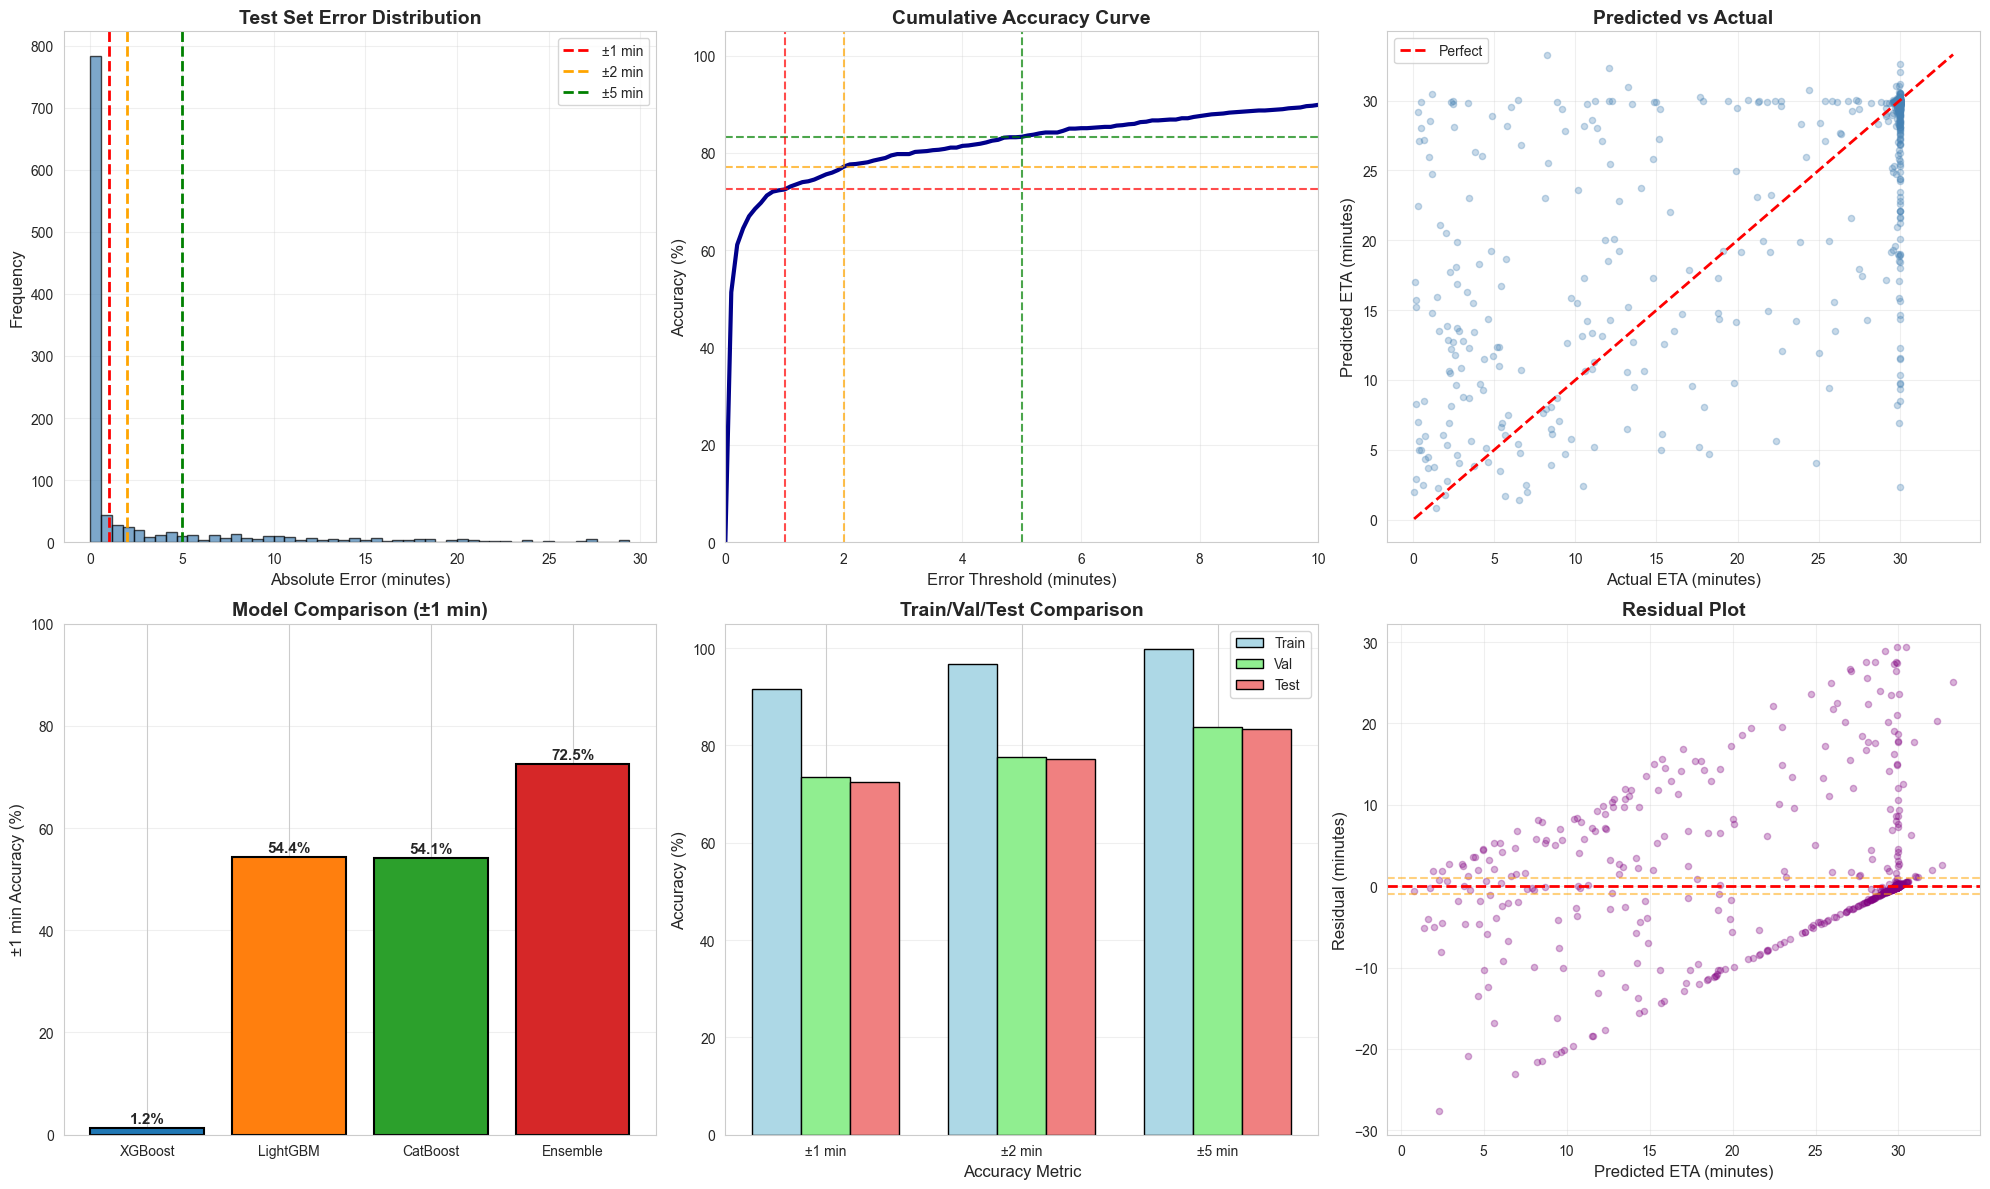

In [16]:
%run final_ensemble_with_viz.py

In [21]:
%run ray_tune_heavy_optimization.py

(train_ensemble pid=21835) /Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
(train_ensemble pid=21835)   warnings.warn(
(train_ensemble pid=21835) /Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
(train_ensemble pid=21835)   warnings.warn(
(train_ensemble pid=21823) [2025-12-30 06:53:42,306 E 21823 4437906] core_worker_process.cc:842: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(train_ensemble pid=21900) /Users/shreeharianbazhagan/Documents/IITM/mint/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:27


BEST CONFIGURATION FOUND

✅ Best multi-objective score: 79.56

📊 Best trial metrics:
  ±1 min: 74.0%
  ±2 min: 78.2%
  ±5 min: 84.7%

📋 Top 10 trials:
Rank   ±1min    ±2min    ±5min    Score   
------------------------------------------
1      74.0     78.2     84.7     79.56   
2      73.1     78.7     84.9     79.48   
3      73.3     78.3     84.6     79.34   
4      73.8     77.7     84.7     79.32   
5      72.9     77.5     85.3     79.25   
6      72.2     78.5     84.5     79.01   
7      72.8     77.3     84.9     79.00   
8      73.0     77.7     84.4     78.98   
9      72.4     77.2     85.0     78.90   
10     73.4     77.2     84.2     78.87   

💾 Saving results...

📋 Best configuration:
  xgb_n_estimators: 5818
  xgb_max_depth: 12
  xgb_lr: 0.002696
  xgb_subsample: 0.978357
  xgb_colsample: 0.780228
  xgb_colsample_level: 0.939794
  xgb_min_child: 19
  xgb_gamma: 7.046800
  xgb_alpha: 4.077149
  xgb_lambda: 2.098258
  xgb_max_delta: 9
  lgb_n_estimators: 4482
  lgb_num